In [1]:
import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import shap
import spacy
import anchor
from anchor import anchor_text
import alibi
from alibi.utils.download import spacy_model
from alibi.explainers import AnchorText
import statistics
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from numpy import array
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from pickle import load
from keras import utils
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Embedding
from keras.layers.convolutional import AveragePooling1D
from keras.layers.merge import concatenate
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from lime.lime_text import LimeTextExplainer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

Using TensorFlow backend.


In [2]:
datapath="C:/Users/Regina Eckhardt/Documents/Uni/Masterarbeit/"
filepath=datapath+"spam-flat3.csv"
mydata = pd.read_csv(filepath)
mydata['bodyHtml'] = mydata['bodyHtml'].fillna("Ignore")
mydata.loc[mydata['phishing'].astype(str) == 'False','phishing'] = 0
mydata.loc[mydata['phishing'].astype(str) == 'True','phishing'] = 1
texts = mydata['bodyHtml'].tolist()
label = mydata['phishing'].astype(int).tolist()
X = texts
y = label
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [3]:
#nltk.download('punkt')
# information found at https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
porter = PorterStemmer()
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
        return "".join(stem_sentence)
X_train_1 = [stemSentence(x) for x in X_train]
X_test_1 = [stemSentence(x) for x in X_test]

In [19]:
vocab_size = 10000
encoded_train_texts = [one_hot(t,vocab_size) for t in X_train_1]
encoded_test_texts = [one_hot(t,vocab_size) for t in X_test_1]
# originally we used a maximum length of 70 for the emails, which might be too short
# a length of 100 should be more appropriate for most of the emails
#max_length = 70
#trainX =pad_sequences(encoded_train_texts,maxlen=max_length,padding="post",truncating="post")
#testX =pad_sequences(encoded_test_texts,maxlen=max_length,padding="post",truncating="post")

In [5]:
y_train1 =[]
for x in y_train:
    if x==0:
        y_train1.append([1,0])
    else:
        y_train1.append([0,1])
y_test1 =[]
for x in y_test:
    if x==0:
        y_test1.append([1,0])
    else:
        y_test1.append([0,1])
y_train1 = np.vstack(y_train1)
y_test1 = np.vstack(y_test1)

In [6]:
model = 'en_core_web_md'
spacy_model(model=model)
nlp = spacy.load(model)
class_names = ['Spam','Phishing']

Insert: Results of the Networks when including the subject of the email

In [17]:
with_subject = mydata["subject"] + " " + mydata["bodyHtml"]
print(with_subject[:2])
with_subject = with_subject.fillna("Ignore")
texts_ws = with_subject.tolist()
X_ws = texts_ws
y = label
X_ws_train,X_ws_test,y_train,y_test = train_test_split(X_ws,y,test_size=0.3,random_state=42)
X_train_2 = [stemSentence(x) for x in X_ws_train]
X_test_2 = [stemSentence(x) for x in X_ws_test]
encoded_train_texts_ws = [one_hot(t,vocab_size) for t in X_train_2]
encoded_test_texts_ws = [one_hot(t,vocab_size) for t in X_test_2]
# originally we used a maximum length of 70 for the emails, which might be too short
# a length of 350 showed the best accuracy compared to various email lengths
#max_length = 70
#trainX_ws =pad_sequences(encoded_train_texts_ws,maxlen=max_length,padding="post",truncating="post")
#testX_ws =pad_sequences(encoded_test_texts_ws,maxlen=max_length,padding="post",truncating="post")

0    Re: be my f#ckbuddy Send me a F#ckFriends requ...
1                  Choose the greatest improver Ignore
dtype: object


Convolutional Neural Network

In [25]:
# load Convolutional Neural Network
%run CNN.ipynb

Train on 12813 samples, validate on 5492 samples
Epoch 1/25


 3248/12813 [======>.......................] - ETA: 35:35 - loss: 0.6895 - acc: 0.56 - ETA: 19:06 - loss: 0.6002 - acc: 0.71 - ETA: 13:26 - loss: 0.5592 - acc: 0.75 - ETA: 10:45 - loss: 0.5947 - acc: 0.75 - ETA: 9:00 - loss: 0.5795 - acc: 0.7625 - ETA: 7:49 - loss: 0.5454 - acc: 0.781 - ETA: 7:14 - loss: 0.4948 - acc: 0.812 - ETA: 6:37 - loss: 0.4799 - acc: 0.820 - ETA: 6:09 - loss: 0.4844 - acc: 0.819 - ETA: 5:48 - loss: 0.4880 - acc: 0.818 - ETA: 5:28 - loss: 0.4878 - acc: 0.818 - ETA: 5:12 - loss: 0.5099 - acc: 0.802 - ETA: 4:59 - loss: 0.5101 - acc: 0.802 - ETA: 4:55 - loss: 0.5101 - acc: 0.808 - ETA: 4:52 - loss: 0.5207 - acc: 0.795 - ETA: 4:45 - loss: 0.5271 - acc: 0.789 - ETA: 4:36 - loss: 0.5283 - acc: 0.790 - ETA: 4:29 - loss: 0.5310 - acc: 0.788 - ETA: 4:24 - loss: 0.5211 - acc: 0.799 - ETA: 4:19 - loss: 0.5195 - acc: 0.800 - ETA: 4:13 - loss: 0.5180 - acc: 0.800 - ETA: 4:07 - loss: 0.5233 - acc: 0.798 - ETA: 4:05 - loss: 0.5411 - acc: 0.790 - ETA: 4:03 - loss: 0.5489 - acc: 

 6512/12813 [==============>...............] - ETA: 2:02 - loss: 0.4870 - acc: 0.817 - ETA: 2:02 - loss: 0.4860 - acc: 0.817 - ETA: 2:02 - loss: 0.4852 - acc: 0.818 - ETA: 2:01 - loss: 0.4853 - acc: 0.817 - ETA: 2:01 - loss: 0.4859 - acc: 0.817 - ETA: 2:01 - loss: 0.4856 - acc: 0.817 - ETA: 2:00 - loss: 0.4854 - acc: 0.817 - ETA: 2:00 - loss: 0.4847 - acc: 0.817 - ETA: 2:00 - loss: 0.4844 - acc: 0.817 - ETA: 2:00 - loss: 0.4841 - acc: 0.817 - ETA: 1:59 - loss: 0.4836 - acc: 0.817 - ETA: 1:59 - loss: 0.4833 - acc: 0.817 - ETA: 1:59 - loss: 0.4832 - acc: 0.817 - ETA: 1:58 - loss: 0.4826 - acc: 0.818 - ETA: 1:58 - loss: 0.4823 - acc: 0.817 - ETA: 1:58 - loss: 0.4832 - acc: 0.817 - ETA: 1:57 - loss: 0.4828 - acc: 0.817 - ETA: 1:57 - loss: 0.4834 - acc: 0.816 - ETA: 1:57 - loss: 0.4830 - acc: 0.816 - ETA: 1:56 - loss: 0.4821 - acc: 0.817 - ETA: 1:56 - loss: 0.4822 - acc: 0.817 - ETA: 1:56 - loss: 0.4818 - acc: 0.816 - ETA: 1:56 - loss: 0.4815 - acc: 0.816 - ETA: 1:55 - loss: 0.4810 - acc: 0

 9888/12813 [======================>.......] - ETA: 1:14 - loss: 0.4290 - acc: 0.820 - ETA: 1:14 - loss: 0.4286 - acc: 0.820 - ETA: 1:13 - loss: 0.4283 - acc: 0.821 - ETA: 1:13 - loss: 0.4274 - acc: 0.821 - ETA: 1:13 - loss: 0.4271 - acc: 0.821 - ETA: 1:13 - loss: 0.4265 - acc: 0.822 - ETA: 1:13 - loss: 0.4275 - acc: 0.821 - ETA: 1:12 - loss: 0.4275 - acc: 0.822 - ETA: 1:12 - loss: 0.4268 - acc: 0.822 - ETA: 1:12 - loss: 0.4263 - acc: 0.822 - ETA: 1:12 - loss: 0.4257 - acc: 0.823 - ETA: 1:11 - loss: 0.4256 - acc: 0.823 - ETA: 1:11 - loss: 0.4261 - acc: 0.822 - ETA: 1:11 - loss: 0.4258 - acc: 0.822 - ETA: 1:11 - loss: 0.4257 - acc: 0.823 - ETA: 1:11 - loss: 0.4254 - acc: 0.823 - ETA: 1:10 - loss: 0.4254 - acc: 0.823 - ETA: 1:10 - loss: 0.4250 - acc: 0.823 - ETA: 1:10 - loss: 0.4251 - acc: 0.823 - ETA: 1:10 - loss: 0.4251 - acc: 0.823 - ETA: 1:10 - loss: 0.4247 - acc: 0.823 - ETA: 1:09 - loss: 0.4244 - acc: 0.823 - ETA: 1:09 - loss: 0.4241 - acc: 0.823 - ETA: 1:09 - loss: 0.4240 - acc: 0

12813/12813 [==============================] - ETA: 32s - loss: 0.4009 - acc: 0.84 - ETA: 32s - loss: 0.4008 - acc: 0.84 - ETA: 32s - loss: 0.4004 - acc: 0.84 - ETA: 32s - loss: 0.4003 - acc: 0.84 - ETA: 32s - loss: 0.4001 - acc: 0.84 - ETA: 32s - loss: 0.3998 - acc: 0.84 - ETA: 31s - loss: 0.3997 - acc: 0.84 - ETA: 31s - loss: 0.3995 - acc: 0.84 - ETA: 31s - loss: 0.3993 - acc: 0.84 - ETA: 31s - loss: 0.3989 - acc: 0.84 - ETA: 31s - loss: 0.3989 - acc: 0.84 - ETA: 30s - loss: 0.3988 - acc: 0.84 - ETA: 30s - loss: 0.3983 - acc: 0.84 - ETA: 30s - loss: 0.3983 - acc: 0.84 - ETA: 30s - loss: 0.3985 - acc: 0.84 - ETA: 30s - loss: 0.3981 - acc: 0.84 - ETA: 29s - loss: 0.3979 - acc: 0.84 - ETA: 29s - loss: 0.3974 - acc: 0.84 - ETA: 29s - loss: 0.3971 - acc: 0.84 - ETA: 29s - loss: 0.3971 - acc: 0.84 - ETA: 29s - loss: 0.3968 - acc: 0.84 - ETA: 29s - loss: 0.3966 - acc: 0.84 - ETA: 28s - loss: 0.3966 - acc: 0.84 - ETA: 28s - loss: 0.3965 - acc: 0.84 - ETA: 28s - loss: 0.3962 - acc: 0.84 - ETA

 3264/12813 [======>.......................] - ETA: 2:00 - loss: 0.4596 - acc: 0.812 - ETA: 1:58 - loss: 0.2930 - acc: 0.906 - ETA: 2:01 - loss: 0.2456 - acc: 0.916 - ETA: 2:02 - loss: 0.2493 - acc: 0.906 - ETA: 2:03 - loss: 0.2736 - acc: 0.887 - ETA: 2:02 - loss: 0.2609 - acc: 0.895 - ETA: 2:01 - loss: 0.2653 - acc: 0.901 - ETA: 2:00 - loss: 0.2667 - acc: 0.906 - ETA: 2:00 - loss: 0.2762 - acc: 0.895 - ETA: 2:03 - loss: 0.2678 - acc: 0.900 - ETA: 2:02 - loss: 0.2654 - acc: 0.903 - ETA: 2:02 - loss: 0.2575 - acc: 0.906 - ETA: 2:03 - loss: 0.2556 - acc: 0.908 - ETA: 2:02 - loss: 0.2579 - acc: 0.906 - ETA: 2:02 - loss: 0.2613 - acc: 0.904 - ETA: 2:02 - loss: 0.2598 - acc: 0.906 - ETA: 2:02 - loss: 0.2599 - acc: 0.904 - ETA: 2:01 - loss: 0.2642 - acc: 0.906 - ETA: 2:02 - loss: 0.2540 - acc: 0.911 - ETA: 2:02 - loss: 0.2543 - acc: 0.912 - ETA: 2:02 - loss: 0.2597 - acc: 0.910 - ETA: 2:02 - loss: 0.2623 - acc: 0.911 - ETA: 2:02 - loss: 0.2597 - acc: 0.910 - ETA: 2:02 - loss: 0.2551 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:35 - loss: 0.2797 - acc: 0.908 - ETA: 1:35 - loss: 0.2797 - acc: 0.908 - ETA: 1:34 - loss: 0.2791 - acc: 0.908 - ETA: 1:34 - loss: 0.2803 - acc: 0.908 - ETA: 1:34 - loss: 0.2801 - acc: 0.908 - ETA: 1:34 - loss: 0.2793 - acc: 0.908 - ETA: 1:34 - loss: 0.2789 - acc: 0.909 - ETA: 1:34 - loss: 0.2782 - acc: 0.909 - ETA: 1:34 - loss: 0.2779 - acc: 0.909 - ETA: 1:33 - loss: 0.2782 - acc: 0.909 - ETA: 1:33 - loss: 0.2803 - acc: 0.907 - ETA: 1:33 - loss: 0.2797 - acc: 0.908 - ETA: 1:33 - loss: 0.2792 - acc: 0.908 - ETA: 1:33 - loss: 0.2793 - acc: 0.908 - ETA: 1:33 - loss: 0.2790 - acc: 0.908 - ETA: 1:32 - loss: 0.2782 - acc: 0.908 - ETA: 1:32 - loss: 0.2796 - acc: 0.908 - ETA: 1:32 - loss: 0.2795 - acc: 0.908 - ETA: 1:32 - loss: 0.2783 - acc: 0.908 - ETA: 1:32 - loss: 0.2775 - acc: 0.909 - ETA: 1:32 - loss: 0.2772 - acc: 0.909 - ETA: 1:31 - loss: 0.2778 - acc: 0.909 - ETA: 1:31 - loss: 0.2775 - acc: 0.909 - ETA: 1:31 - loss: 0.2798 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:03 - loss: 0.2803 - acc: 0.904 - ETA: 1:03 - loss: 0.2798 - acc: 0.904 - ETA: 1:02 - loss: 0.2793 - acc: 0.904 - ETA: 1:02 - loss: 0.2794 - acc: 0.904 - ETA: 1:02 - loss: 0.2790 - acc: 0.904 - ETA: 1:02 - loss: 0.2792 - acc: 0.904 - ETA: 1:02 - loss: 0.2788 - acc: 0.904 - ETA: 1:02 - loss: 0.2787 - acc: 0.904 - ETA: 1:01 - loss: 0.2786 - acc: 0.904 - ETA: 1:01 - loss: 0.2784 - acc: 0.904 - ETA: 1:01 - loss: 0.2781 - acc: 0.905 - ETA: 1:01 - loss: 0.2784 - acc: 0.904 - ETA: 1:01 - loss: 0.2787 - acc: 0.904 - ETA: 1:01 - loss: 0.2790 - acc: 0.904 - ETA: 1:00 - loss: 0.2788 - acc: 0.904 - ETA: 1:00 - loss: 0.2788 - acc: 0.904 - ETA: 1:00 - loss: 0.2790 - acc: 0.904 - ETA: 1:00 - loss: 0.2789 - acc: 0.904 - ETA: 1:00 - loss: 0.2788 - acc: 0.904 - ETA: 1:00 - loss: 0.2789 - acc: 0.904 - ETA: 59s - loss: 0.2789 - acc: 0.904 - ETA: 59s - loss: 0.2789 - acc: 0.90 - ETA: 59s - loss: 0.2791 - acc: 0.90 - ETA: 59s - loss: 0.2793 - acc: 0.90 - 

12813/12813 [==============================] - ETA: 28s - loss: 0.2781 - acc: 0.90 - ETA: 28s - loss: 0.2783 - acc: 0.90 - ETA: 28s - loss: 0.2786 - acc: 0.90 - ETA: 28s - loss: 0.2784 - acc: 0.90 - ETA: 28s - loss: 0.2790 - acc: 0.90 - ETA: 28s - loss: 0.2787 - acc: 0.90 - ETA: 27s - loss: 0.2787 - acc: 0.90 - ETA: 27s - loss: 0.2786 - acc: 0.90 - ETA: 27s - loss: 0.2786 - acc: 0.90 - ETA: 27s - loss: 0.2784 - acc: 0.90 - ETA: 27s - loss: 0.2784 - acc: 0.90 - ETA: 27s - loss: 0.2786 - acc: 0.90 - ETA: 26s - loss: 0.2785 - acc: 0.90 - ETA: 26s - loss: 0.2788 - acc: 0.90 - ETA: 26s - loss: 0.2794 - acc: 0.90 - ETA: 26s - loss: 0.2794 - acc: 0.90 - ETA: 26s - loss: 0.2792 - acc: 0.90 - ETA: 26s - loss: 0.2792 - acc: 0.90 - ETA: 25s - loss: 0.2790 - acc: 0.90 - ETA: 25s - loss: 0.2790 - acc: 0.90 - ETA: 25s - loss: 0.2790 - acc: 0.90 - ETA: 25s - loss: 0.2790 - acc: 0.90 - ETA: 25s - loss: 0.2788 - acc: 0.90 - ETA: 25s - loss: 0.2785 - acc: 0.90 - ETA: 24s - loss: 0.2786 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 2:45 - loss: 0.3523 - acc: 0.812 - ETA: 2:27 - loss: 0.2875 - acc: 0.875 - ETA: 2:35 - loss: 0.2567 - acc: 0.895 - ETA: 2:30 - loss: 0.2469 - acc: 0.906 - ETA: 2:26 - loss: 0.2512 - acc: 0.912 - ETA: 2:24 - loss: 0.2246 - acc: 0.927 - ETA: 2:20 - loss: 0.2400 - acc: 0.919 - ETA: 2:18 - loss: 0.2386 - acc: 0.914 - ETA: 2:16 - loss: 0.2392 - acc: 0.909 - ETA: 2:15 - loss: 0.2474 - acc: 0.900 - ETA: 2:14 - loss: 0.2657 - acc: 0.892 - ETA: 2:16 - loss: 0.2611 - acc: 0.890 - ETA: 2:14 - loss: 0.2528 - acc: 0.899 - ETA: 2:13 - loss: 0.2452 - acc: 0.901 - ETA: 2:11 - loss: 0.2378 - acc: 0.908 - ETA: 2:11 - loss: 0.2388 - acc: 0.906 - ETA: 2:10 - loss: 0.2362 - acc: 0.908 - ETA: 2:10 - loss: 0.2293 - acc: 0.909 - ETA: 2:10 - loss: 0.2481 - acc: 0.907 - ETA: 2:10 - loss: 0.2468 - acc: 0.909 - ETA: 2:10 - loss: 0.2506 - acc: 0.907 - ETA: 2:09 - loss: 0.2488 - acc: 0.909 - ETA: 2:08 - loss: 0.2425 - acc: 0.913 - ETA: 2:08 - loss: 0.2428 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:37 - loss: 0.2477 - acc: 0.906 - ETA: 1:37 - loss: 0.2469 - acc: 0.906 - ETA: 1:36 - loss: 0.2473 - acc: 0.906 - ETA: 1:36 - loss: 0.2468 - acc: 0.906 - ETA: 1:36 - loss: 0.2470 - acc: 0.907 - ETA: 1:36 - loss: 0.2464 - acc: 0.907 - ETA: 1:36 - loss: 0.2463 - acc: 0.907 - ETA: 1:35 - loss: 0.2469 - acc: 0.907 - ETA: 1:35 - loss: 0.2461 - acc: 0.907 - ETA: 1:35 - loss: 0.2467 - acc: 0.907 - ETA: 1:35 - loss: 0.2465 - acc: 0.907 - ETA: 1:35 - loss: 0.2462 - acc: 0.907 - ETA: 1:35 - loss: 0.2464 - acc: 0.907 - ETA: 1:35 - loss: 0.2469 - acc: 0.907 - ETA: 1:34 - loss: 0.2471 - acc: 0.907 - ETA: 1:34 - loss: 0.2470 - acc: 0.907 - ETA: 1:34 - loss: 0.2467 - acc: 0.907 - ETA: 1:34 - loss: 0.2478 - acc: 0.907 - ETA: 1:34 - loss: 0.2479 - acc: 0.907 - ETA: 1:34 - loss: 0.2477 - acc: 0.907 - ETA: 1:34 - loss: 0.2476 - acc: 0.907 - ETA: 1:33 - loss: 0.2473 - acc: 0.907 - ETA: 1:33 - loss: 0.2481 - acc: 0.907 - ETA: 1:33 - loss: 0.2478 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:03 - loss: 0.2497 - acc: 0.906 - ETA: 1:03 - loss: 0.2495 - acc: 0.906 - ETA: 1:03 - loss: 0.2494 - acc: 0.906 - ETA: 1:03 - loss: 0.2494 - acc: 0.906 - ETA: 1:03 - loss: 0.2493 - acc: 0.906 - ETA: 1:03 - loss: 0.2489 - acc: 0.906 - ETA: 1:02 - loss: 0.2486 - acc: 0.906 - ETA: 1:02 - loss: 0.2489 - acc: 0.906 - ETA: 1:02 - loss: 0.2492 - acc: 0.906 - ETA: 1:02 - loss: 0.2490 - acc: 0.906 - ETA: 1:02 - loss: 0.2492 - acc: 0.906 - ETA: 1:02 - loss: 0.2493 - acc: 0.906 - ETA: 1:01 - loss: 0.2492 - acc: 0.906 - ETA: 1:01 - loss: 0.2495 - acc: 0.906 - ETA: 1:01 - loss: 0.2492 - acc: 0.906 - ETA: 1:01 - loss: 0.2489 - acc: 0.906 - ETA: 1:01 - loss: 0.2489 - acc: 0.906 - ETA: 1:00 - loss: 0.2485 - acc: 0.906 - ETA: 1:00 - loss: 0.2483 - acc: 0.906 - ETA: 1:00 - loss: 0.2481 - acc: 0.906 - ETA: 1:00 - loss: 0.2481 - acc: 0.906 - ETA: 1:00 - loss: 0.2481 - acc: 0.907 - ETA: 1:00 - loss: 0.2482 - acc: 0.906 - ETA: 59s - loss: 0.2485 - acc: 0.

12813/12813 [==============================] - ETA: 28s - loss: 0.2503 - acc: 0.90 - ETA: 28s - loss: 0.2504 - acc: 0.90 - ETA: 28s - loss: 0.2503 - acc: 0.90 - ETA: 28s - loss: 0.2504 - acc: 0.90 - ETA: 28s - loss: 0.2506 - acc: 0.90 - ETA: 27s - loss: 0.2505 - acc: 0.90 - ETA: 27s - loss: 0.2506 - acc: 0.90 - ETA: 27s - loss: 0.2506 - acc: 0.90 - ETA: 27s - loss: 0.2504 - acc: 0.90 - ETA: 27s - loss: 0.2508 - acc: 0.90 - ETA: 27s - loss: 0.2514 - acc: 0.90 - ETA: 26s - loss: 0.2512 - acc: 0.90 - ETA: 26s - loss: 0.2510 - acc: 0.90 - ETA: 26s - loss: 0.2507 - acc: 0.90 - ETA: 26s - loss: 0.2506 - acc: 0.90 - ETA: 26s - loss: 0.2505 - acc: 0.90 - ETA: 26s - loss: 0.2504 - acc: 0.90 - ETA: 25s - loss: 0.2508 - acc: 0.90 - ETA: 25s - loss: 0.2511 - acc: 0.90 - ETA: 25s - loss: 0.2510 - acc: 0.90 - ETA: 25s - loss: 0.2510 - acc: 0.90 - ETA: 25s - loss: 0.2508 - acc: 0.90 - ETA: 25s - loss: 0.2506 - acc: 0.90 - ETA: 25s - loss: 0.2507 - acc: 0.90 - ETA: 24s - loss: 0.2509 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 1:47 - loss: 0.1321 - acc: 1.000 - ETA: 1:55 - loss: 0.0895 - acc: 1.000 - ETA: 2:08 - loss: 0.1539 - acc: 0.958 - ETA: 2:09 - loss: 0.1448 - acc: 0.953 - ETA: 2:06 - loss: 0.1364 - acc: 0.962 - ETA: 2:04 - loss: 0.1666 - acc: 0.947 - ETA: 2:04 - loss: 0.1704 - acc: 0.946 - ETA: 2:08 - loss: 0.1783 - acc: 0.945 - ETA: 2:10 - loss: 0.1706 - acc: 0.944 - ETA: 2:10 - loss: 0.1897 - acc: 0.937 - ETA: 2:13 - loss: 0.1873 - acc: 0.937 - ETA: 2:16 - loss: 0.2041 - acc: 0.932 - ETA: 2:16 - loss: 0.2010 - acc: 0.932 - ETA: 2:16 - loss: 0.1951 - acc: 0.933 - ETA: 2:16 - loss: 0.1960 - acc: 0.929 - ETA: 2:15 - loss: 0.1914 - acc: 0.933 - ETA: 2:15 - loss: 0.1974 - acc: 0.933 - ETA: 2:17 - loss: 0.1938 - acc: 0.937 - ETA: 2:18 - loss: 0.1880 - acc: 0.940 - ETA: 2:19 - loss: 0.1826 - acc: 0.940 - ETA: 2:19 - loss: 0.1950 - acc: 0.937 - ETA: 2:20 - loss: 0.1919 - acc: 0.937 - ETA: 2:20 - loss: 0.1842 - acc: 0.940 - ETA: 2:20 - loss: 0.1836 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:37 - loss: 0.2308 - acc: 0.916 - ETA: 1:37 - loss: 0.2311 - acc: 0.916 - ETA: 1:37 - loss: 0.2313 - acc: 0.916 - ETA: 1:37 - loss: 0.2320 - acc: 0.915 - ETA: 1:37 - loss: 0.2323 - acc: 0.915 - ETA: 1:37 - loss: 0.2321 - acc: 0.915 - ETA: 1:37 - loss: 0.2321 - acc: 0.915 - ETA: 1:36 - loss: 0.2318 - acc: 0.915 - ETA: 1:36 - loss: 0.2313 - acc: 0.915 - ETA: 1:36 - loss: 0.2308 - acc: 0.915 - ETA: 1:36 - loss: 0.2307 - acc: 0.915 - ETA: 1:36 - loss: 0.2308 - acc: 0.915 - ETA: 1:36 - loss: 0.2307 - acc: 0.915 - ETA: 1:36 - loss: 0.2311 - acc: 0.915 - ETA: 1:35 - loss: 0.2309 - acc: 0.915 - ETA: 1:35 - loss: 0.2305 - acc: 0.915 - ETA: 1:35 - loss: 0.2314 - acc: 0.915 - ETA: 1:35 - loss: 0.2325 - acc: 0.914 - ETA: 1:35 - loss: 0.2323 - acc: 0.914 - ETA: 1:34 - loss: 0.2323 - acc: 0.914 - ETA: 1:34 - loss: 0.2318 - acc: 0.914 - ETA: 1:34 - loss: 0.2315 - acc: 0.914 - ETA: 1:34 - loss: 0.2313 - acc: 0.914 - ETA: 1:34 - loss: 0.2309 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:04 - loss: 0.2372 - acc: 0.911 - ETA: 1:03 - loss: 0.2372 - acc: 0.911 - ETA: 1:03 - loss: 0.2376 - acc: 0.911 - ETA: 1:03 - loss: 0.2373 - acc: 0.911 - ETA: 1:03 - loss: 0.2374 - acc: 0.911 - ETA: 1:03 - loss: 0.2375 - acc: 0.911 - ETA: 1:03 - loss: 0.2378 - acc: 0.911 - ETA: 1:03 - loss: 0.2378 - acc: 0.911 - ETA: 1:02 - loss: 0.2378 - acc: 0.911 - ETA: 1:02 - loss: 0.2379 - acc: 0.911 - ETA: 1:02 - loss: 0.2380 - acc: 0.911 - ETA: 1:02 - loss: 0.2381 - acc: 0.911 - ETA: 1:02 - loss: 0.2379 - acc: 0.911 - ETA: 1:02 - loss: 0.2375 - acc: 0.911 - ETA: 1:01 - loss: 0.2374 - acc: 0.911 - ETA: 1:01 - loss: 0.2374 - acc: 0.911 - ETA: 1:01 - loss: 0.2374 - acc: 0.911 - ETA: 1:01 - loss: 0.2373 - acc: 0.911 - ETA: 1:01 - loss: 0.2370 - acc: 0.911 - ETA: 1:01 - loss: 0.2371 - acc: 0.911 - ETA: 1:00 - loss: 0.2376 - acc: 0.911 - ETA: 1:00 - loss: 0.2378 - acc: 0.911 - ETA: 1:00 - loss: 0.2374 - acc: 0.911 - ETA: 1:00 - loss: 0.2382 - acc: 0

12813/12813 [==============================] - ETA: 29s - loss: 0.2344 - acc: 0.91 - ETA: 29s - loss: 0.2342 - acc: 0.91 - ETA: 28s - loss: 0.2341 - acc: 0.91 - ETA: 28s - loss: 0.2340 - acc: 0.91 - ETA: 28s - loss: 0.2339 - acc: 0.91 - ETA: 28s - loss: 0.2336 - acc: 0.91 - ETA: 28s - loss: 0.2337 - acc: 0.91 - ETA: 28s - loss: 0.2338 - acc: 0.91 - ETA: 27s - loss: 0.2337 - acc: 0.91 - ETA: 27s - loss: 0.2337 - acc: 0.91 - ETA: 27s - loss: 0.2336 - acc: 0.91 - ETA: 27s - loss: 0.2336 - acc: 0.91 - ETA: 27s - loss: 0.2334 - acc: 0.91 - ETA: 27s - loss: 0.2334 - acc: 0.91 - ETA: 26s - loss: 0.2332 - acc: 0.91 - ETA: 26s - loss: 0.2333 - acc: 0.91 - ETA: 26s - loss: 0.2331 - acc: 0.91 - ETA: 26s - loss: 0.2332 - acc: 0.91 - ETA: 26s - loss: 0.2331 - acc: 0.91 - ETA: 26s - loss: 0.2331 - acc: 0.91 - ETA: 25s - loss: 0.2333 - acc: 0.91 - ETA: 25s - loss: 0.2337 - acc: 0.91 - ETA: 25s - loss: 0.2335 - acc: 0.91 - ETA: 25s - loss: 0.2332 - acc: 0.91 - ETA: 25s - loss: 0.2333 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 1:54 - loss: 0.2199 - acc: 0.875 - ETA: 1:57 - loss: 0.1397 - acc: 0.937 - ETA: 2:07 - loss: 0.1761 - acc: 0.937 - ETA: 2:11 - loss: 0.1457 - acc: 0.953 - ETA: 2:11 - loss: 0.1376 - acc: 0.962 - ETA: 2:14 - loss: 0.1483 - acc: 0.947 - ETA: 2:16 - loss: 0.1460 - acc: 0.955 - ETA: 2:13 - loss: 0.1470 - acc: 0.953 - ETA: 2:13 - loss: 0.1580 - acc: 0.944 - ETA: 2:11 - loss: 0.1667 - acc: 0.943 - ETA: 2:12 - loss: 0.1754 - acc: 0.937 - ETA: 2:13 - loss: 0.1768 - acc: 0.937 - ETA: 2:12 - loss: 0.1847 - acc: 0.937 - ETA: 2:10 - loss: 0.2121 - acc: 0.919 - ETA: 2:10 - loss: 0.2331 - acc: 0.912 - ETA: 2:09 - loss: 0.2377 - acc: 0.910 - ETA: 2:09 - loss: 0.2352 - acc: 0.911 - ETA: 2:09 - loss: 0.2362 - acc: 0.909 - ETA: 2:09 - loss: 0.2303 - acc: 0.914 - ETA: 2:08 - loss: 0.2298 - acc: 0.915 - ETA: 2:08 - loss: 0.2245 - acc: 0.919 - ETA: 2:08 - loss: 0.2201 - acc: 0.923 - ETA: 2:08 - loss: 0.2226 - acc: 0.921 - ETA: 2:08 - loss: 0.2320 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:36 - loss: 0.2312 - acc: 0.909 - ETA: 1:36 - loss: 0.2309 - acc: 0.909 - ETA: 1:36 - loss: 0.2309 - acc: 0.909 - ETA: 1:36 - loss: 0.2317 - acc: 0.909 - ETA: 1:35 - loss: 0.2320 - acc: 0.909 - ETA: 1:35 - loss: 0.2319 - acc: 0.909 - ETA: 1:35 - loss: 0.2318 - acc: 0.909 - ETA: 1:35 - loss: 0.2320 - acc: 0.909 - ETA: 1:35 - loss: 0.2314 - acc: 0.909 - ETA: 1:34 - loss: 0.2317 - acc: 0.909 - ETA: 1:34 - loss: 0.2322 - acc: 0.909 - ETA: 1:34 - loss: 0.2317 - acc: 0.909 - ETA: 1:34 - loss: 0.2317 - acc: 0.909 - ETA: 1:34 - loss: 0.2315 - acc: 0.908 - ETA: 1:33 - loss: 0.2311 - acc: 0.909 - ETA: 1:33 - loss: 0.2312 - acc: 0.908 - ETA: 1:33 - loss: 0.2307 - acc: 0.908 - ETA: 1:33 - loss: 0.2300 - acc: 0.909 - ETA: 1:33 - loss: 0.2312 - acc: 0.909 - ETA: 1:33 - loss: 0.2307 - acc: 0.909 - ETA: 1:33 - loss: 0.2306 - acc: 0.909 - ETA: 1:32 - loss: 0.2313 - acc: 0.909 - ETA: 1:32 - loss: 0.2308 - acc: 0.909 - ETA: 1:32 - loss: 0.2303 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:03 - loss: 0.2309 - acc: 0.907 - ETA: 1:02 - loss: 0.2305 - acc: 0.907 - ETA: 1:02 - loss: 0.2314 - acc: 0.907 - ETA: 1:02 - loss: 0.2311 - acc: 0.907 - ETA: 1:02 - loss: 0.2319 - acc: 0.906 - ETA: 1:02 - loss: 0.2314 - acc: 0.907 - ETA: 1:02 - loss: 0.2310 - acc: 0.907 - ETA: 1:01 - loss: 0.2308 - acc: 0.907 - ETA: 1:01 - loss: 0.2308 - acc: 0.907 - ETA: 1:01 - loss: 0.2308 - acc: 0.907 - ETA: 1:01 - loss: 0.2314 - acc: 0.907 - ETA: 1:01 - loss: 0.2312 - acc: 0.907 - ETA: 1:01 - loss: 0.2311 - acc: 0.907 - ETA: 1:00 - loss: 0.2311 - acc: 0.907 - ETA: 1:00 - loss: 0.2309 - acc: 0.907 - ETA: 1:00 - loss: 0.2311 - acc: 0.907 - ETA: 1:00 - loss: 0.2315 - acc: 0.906 - ETA: 1:00 - loss: 0.2315 - acc: 0.906 - ETA: 1:00 - loss: 0.2312 - acc: 0.906 - ETA: 1:00 - loss: 0.2315 - acc: 0.906 - ETA: 59s - loss: 0.2312 - acc: 0.906 - ETA: 59s - loss: 0.2316 - acc: 0.90 - ETA: 59s - loss: 0.2312 - acc: 0.90 - ETA: 59s - loss: 0.2317 - acc: 0.90 - 

12813/12813 [==============================] - ETA: 28s - loss: 0.2266 - acc: 0.91 - ETA: 28s - loss: 0.2265 - acc: 0.91 - ETA: 28s - loss: 0.2266 - acc: 0.91 - ETA: 28s - loss: 0.2265 - acc: 0.91 - ETA: 28s - loss: 0.2264 - acc: 0.91 - ETA: 27s - loss: 0.2264 - acc: 0.91 - ETA: 27s - loss: 0.2265 - acc: 0.91 - ETA: 27s - loss: 0.2263 - acc: 0.91 - ETA: 27s - loss: 0.2260 - acc: 0.91 - ETA: 27s - loss: 0.2265 - acc: 0.91 - ETA: 27s - loss: 0.2263 - acc: 0.91 - ETA: 26s - loss: 0.2263 - acc: 0.91 - ETA: 26s - loss: 0.2260 - acc: 0.91 - ETA: 26s - loss: 0.2262 - acc: 0.91 - ETA: 26s - loss: 0.2262 - acc: 0.91 - ETA: 26s - loss: 0.2263 - acc: 0.91 - ETA: 26s - loss: 0.2267 - acc: 0.91 - ETA: 25s - loss: 0.2265 - acc: 0.91 - ETA: 25s - loss: 0.2264 - acc: 0.91 - ETA: 25s - loss: 0.2263 - acc: 0.91 - ETA: 25s - loss: 0.2264 - acc: 0.91 - ETA: 25s - loss: 0.2263 - acc: 0.91 - ETA: 25s - loss: 0.2261 - acc: 0.91 - ETA: 24s - loss: 0.2265 - acc: 0.91 - ETA: 24s - loss: 0.2265 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 1:53 - loss: 0.0726 - acc: 1.000 - ETA: 1:58 - loss: 0.1432 - acc: 0.968 - ETA: 2:07 - loss: 0.1454 - acc: 0.958 - ETA: 2:06 - loss: 0.1626 - acc: 0.953 - ETA: 2:05 - loss: 0.1697 - acc: 0.937 - ETA: 2:04 - loss: 0.1826 - acc: 0.927 - ETA: 2:04 - loss: 0.1819 - acc: 0.928 - ETA: 2:04 - loss: 0.1818 - acc: 0.929 - ETA: 2:02 - loss: 0.1896 - acc: 0.930 - ETA: 2:02 - loss: 0.1840 - acc: 0.931 - ETA: 2:02 - loss: 0.2132 - acc: 0.920 - ETA: 2:04 - loss: 0.2042 - acc: 0.927 - ETA: 2:05 - loss: 0.1972 - acc: 0.932 - ETA: 2:04 - loss: 0.2018 - acc: 0.924 - ETA: 2:05 - loss: 0.2138 - acc: 0.916 - ETA: 2:05 - loss: 0.2230 - acc: 0.910 - ETA: 2:04 - loss: 0.2170 - acc: 0.911 - ETA: 2:04 - loss: 0.2297 - acc: 0.906 - ETA: 2:04 - loss: 0.2214 - acc: 0.911 - ETA: 2:04 - loss: 0.2221 - acc: 0.909 - ETA: 2:04 - loss: 0.2167 - acc: 0.913 - ETA: 2:04 - loss: 0.2224 - acc: 0.909 - ETA: 2:04 - loss: 0.2314 - acc: 0.904 - ETA: 2:03 - loss: 0.2319 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:36 - loss: 0.2252 - acc: 0.914 - ETA: 1:36 - loss: 0.2254 - acc: 0.914 - ETA: 1:35 - loss: 0.2250 - acc: 0.914 - ETA: 1:35 - loss: 0.2265 - acc: 0.913 - ETA: 1:35 - loss: 0.2259 - acc: 0.914 - ETA: 1:35 - loss: 0.2254 - acc: 0.914 - ETA: 1:35 - loss: 0.2251 - acc: 0.914 - ETA: 1:34 - loss: 0.2246 - acc: 0.914 - ETA: 1:34 - loss: 0.2238 - acc: 0.915 - ETA: 1:34 - loss: 0.2236 - acc: 0.915 - ETA: 1:34 - loss: 0.2235 - acc: 0.915 - ETA: 1:34 - loss: 0.2238 - acc: 0.915 - ETA: 1:34 - loss: 0.2243 - acc: 0.914 - ETA: 1:33 - loss: 0.2239 - acc: 0.914 - ETA: 1:33 - loss: 0.2236 - acc: 0.915 - ETA: 1:33 - loss: 0.2246 - acc: 0.914 - ETA: 1:33 - loss: 0.2258 - acc: 0.914 - ETA: 1:33 - loss: 0.2265 - acc: 0.913 - ETA: 1:33 - loss: 0.2257 - acc: 0.914 - ETA: 1:32 - loss: 0.2264 - acc: 0.913 - ETA: 1:32 - loss: 0.2267 - acc: 0.913 - ETA: 1:32 - loss: 0.2261 - acc: 0.914 - ETA: 1:32 - loss: 0.2257 - acc: 0.914 - ETA: 1:32 - loss: 0.2255 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:03 - loss: 0.2183 - acc: 0.915 - ETA: 1:02 - loss: 0.2183 - acc: 0.915 - ETA: 1:02 - loss: 0.2178 - acc: 0.915 - ETA: 1:02 - loss: 0.2177 - acc: 0.915 - ETA: 1:02 - loss: 0.2177 - acc: 0.915 - ETA: 1:02 - loss: 0.2183 - acc: 0.915 - ETA: 1:02 - loss: 0.2189 - acc: 0.915 - ETA: 1:01 - loss: 0.2190 - acc: 0.915 - ETA: 1:01 - loss: 0.2189 - acc: 0.915 - ETA: 1:01 - loss: 0.2187 - acc: 0.915 - ETA: 1:01 - loss: 0.2185 - acc: 0.915 - ETA: 1:01 - loss: 0.2183 - acc: 0.915 - ETA: 1:01 - loss: 0.2178 - acc: 0.915 - ETA: 1:00 - loss: 0.2178 - acc: 0.915 - ETA: 1:00 - loss: 0.2181 - acc: 0.915 - ETA: 1:00 - loss: 0.2178 - acc: 0.915 - ETA: 1:00 - loss: 0.2179 - acc: 0.915 - ETA: 1:00 - loss: 0.2191 - acc: 0.915 - ETA: 1:00 - loss: 0.2191 - acc: 0.915 - ETA: 59s - loss: 0.2189 - acc: 0.915 - ETA: 59s - loss: 0.2185 - acc: 0.91 - ETA: 59s - loss: 0.2183 - acc: 0.91 - ETA: 59s - loss: 0.2182 - acc: 0.91 - ETA: 59s - loss: 0.2184 - acc: 0.91 - ET

12813/12813 [==============================] - ETA: 28s - loss: 0.2212 - acc: 0.91 - ETA: 28s - loss: 0.2215 - acc: 0.91 - ETA: 28s - loss: 0.2217 - acc: 0.91 - ETA: 28s - loss: 0.2217 - acc: 0.91 - ETA: 27s - loss: 0.2214 - acc: 0.91 - ETA: 27s - loss: 0.2216 - acc: 0.91 - ETA: 27s - loss: 0.2216 - acc: 0.91 - ETA: 27s - loss: 0.2220 - acc: 0.91 - ETA: 27s - loss: 0.2222 - acc: 0.91 - ETA: 27s - loss: 0.2222 - acc: 0.91 - ETA: 26s - loss: 0.2224 - acc: 0.91 - ETA: 26s - loss: 0.2223 - acc: 0.91 - ETA: 26s - loss: 0.2222 - acc: 0.91 - ETA: 26s - loss: 0.2223 - acc: 0.91 - ETA: 26s - loss: 0.2226 - acc: 0.91 - ETA: 26s - loss: 0.2226 - acc: 0.91 - ETA: 25s - loss: 0.2225 - acc: 0.91 - ETA: 25s - loss: 0.2226 - acc: 0.91 - ETA: 25s - loss: 0.2228 - acc: 0.91 - ETA: 25s - loss: 0.2228 - acc: 0.91 - ETA: 25s - loss: 0.2228 - acc: 0.91 - ETA: 25s - loss: 0.2231 - acc: 0.91 - ETA: 25s - loss: 0.2235 - acc: 0.91 - ETA: 24s - loss: 0.2234 - acc: 0.91 - ETA: 24s - loss: 0.2233 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 1:49 - loss: 0.0981 - acc: 1.000 - ETA: 1:53 - loss: 0.1143 - acc: 0.968 - ETA: 2:04 - loss: 0.1648 - acc: 0.958 - ETA: 2:05 - loss: 0.1524 - acc: 0.953 - ETA: 2:03 - loss: 0.1450 - acc: 0.950 - ETA: 2:03 - loss: 0.2009 - acc: 0.927 - ETA: 2:03 - loss: 0.2156 - acc: 0.919 - ETA: 2:01 - loss: 0.2092 - acc: 0.914 - ETA: 2:01 - loss: 0.2452 - acc: 0.895 - ETA: 2:01 - loss: 0.2253 - acc: 0.906 - ETA: 2:00 - loss: 0.2117 - acc: 0.914 - ETA: 2:01 - loss: 0.2400 - acc: 0.906 - ETA: 2:01 - loss: 0.2411 - acc: 0.899 - ETA: 2:01 - loss: 0.2405 - acc: 0.892 - ETA: 2:01 - loss: 0.2446 - acc: 0.891 - ETA: 2:01 - loss: 0.2434 - acc: 0.894 - ETA: 2:00 - loss: 0.2352 - acc: 0.900 - ETA: 2:01 - loss: 0.2284 - acc: 0.906 - ETA: 2:00 - loss: 0.2240 - acc: 0.904 - ETA: 2:00 - loss: 0.2207 - acc: 0.906 - ETA: 2:01 - loss: 0.2214 - acc: 0.901 - ETA: 2:00 - loss: 0.2153 - acc: 0.906 - ETA: 2:00 - loss: 0.2130 - acc: 0.907 - ETA: 2:00 - loss: 0.2181 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:35 - loss: 0.2098 - acc: 0.916 - ETA: 1:35 - loss: 0.2101 - acc: 0.915 - ETA: 1:35 - loss: 0.2116 - acc: 0.915 - ETA: 1:34 - loss: 0.2114 - acc: 0.915 - ETA: 1:34 - loss: 0.2113 - acc: 0.915 - ETA: 1:34 - loss: 0.2115 - acc: 0.915 - ETA: 1:34 - loss: 0.2118 - acc: 0.915 - ETA: 1:34 - loss: 0.2118 - acc: 0.914 - ETA: 1:34 - loss: 0.2120 - acc: 0.914 - ETA: 1:33 - loss: 0.2118 - acc: 0.914 - ETA: 1:33 - loss: 0.2113 - acc: 0.915 - ETA: 1:33 - loss: 0.2117 - acc: 0.914 - ETA: 1:33 - loss: 0.2113 - acc: 0.915 - ETA: 1:33 - loss: 0.2108 - acc: 0.915 - ETA: 1:33 - loss: 0.2109 - acc: 0.915 - ETA: 1:32 - loss: 0.2106 - acc: 0.915 - ETA: 1:32 - loss: 0.2107 - acc: 0.915 - ETA: 1:32 - loss: 0.2108 - acc: 0.915 - ETA: 1:32 - loss: 0.2112 - acc: 0.914 - ETA: 1:32 - loss: 0.2110 - acc: 0.914 - ETA: 1:31 - loss: 0.2112 - acc: 0.915 - ETA: 1:31 - loss: 0.2113 - acc: 0.914 - ETA: 1:31 - loss: 0.2116 - acc: 0.914 - ETA: 1:31 - loss: 0.2113 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:03 - loss: 0.2155 - acc: 0.912 - ETA: 1:02 - loss: 0.2153 - acc: 0.913 - ETA: 1:02 - loss: 0.2152 - acc: 0.913 - ETA: 1:02 - loss: 0.2156 - acc: 0.912 - ETA: 1:02 - loss: 0.2165 - acc: 0.912 - ETA: 1:02 - loss: 0.2162 - acc: 0.912 - ETA: 1:02 - loss: 0.2164 - acc: 0.912 - ETA: 1:01 - loss: 0.2168 - acc: 0.912 - ETA: 1:01 - loss: 0.2168 - acc: 0.911 - ETA: 1:01 - loss: 0.2173 - acc: 0.911 - ETA: 1:01 - loss: 0.2184 - acc: 0.910 - ETA: 1:01 - loss: 0.2182 - acc: 0.910 - ETA: 1:01 - loss: 0.2184 - acc: 0.910 - ETA: 1:00 - loss: 0.2182 - acc: 0.911 - ETA: 1:00 - loss: 0.2182 - acc: 0.911 - ETA: 1:00 - loss: 0.2180 - acc: 0.911 - ETA: 1:00 - loss: 0.2179 - acc: 0.911 - ETA: 1:00 - loss: 0.2182 - acc: 0.910 - ETA: 1:00 - loss: 0.2180 - acc: 0.911 - ETA: 59s - loss: 0.2177 - acc: 0.911 - ETA: 59s - loss: 0.2176 - acc: 0.91 - ETA: 59s - loss: 0.2174 - acc: 0.91 - ETA: 59s - loss: 0.2174 - acc: 0.91 - ETA: 59s - loss: 0.2176 - acc: 0.91 - ET

12813/12813 [==============================] - ETA: 28s - loss: 0.2175 - acc: 0.91 - ETA: 28s - loss: 0.2173 - acc: 0.91 - ETA: 28s - loss: 0.2177 - acc: 0.91 - ETA: 28s - loss: 0.2175 - acc: 0.91 - ETA: 27s - loss: 0.2175 - acc: 0.91 - ETA: 27s - loss: 0.2173 - acc: 0.91 - ETA: 27s - loss: 0.2172 - acc: 0.91 - ETA: 27s - loss: 0.2176 - acc: 0.91 - ETA: 27s - loss: 0.2174 - acc: 0.91 - ETA: 27s - loss: 0.2178 - acc: 0.91 - ETA: 26s - loss: 0.2180 - acc: 0.91 - ETA: 26s - loss: 0.2179 - acc: 0.91 - ETA: 26s - loss: 0.2180 - acc: 0.91 - ETA: 26s - loss: 0.2179 - acc: 0.91 - ETA: 26s - loss: 0.2182 - acc: 0.91 - ETA: 26s - loss: 0.2181 - acc: 0.91 - ETA: 25s - loss: 0.2181 - acc: 0.91 - ETA: 25s - loss: 0.2186 - acc: 0.91 - ETA: 25s - loss: 0.2188 - acc: 0.91 - ETA: 25s - loss: 0.2190 - acc: 0.91 - ETA: 25s - loss: 0.2192 - acc: 0.91 - ETA: 25s - loss: 0.2197 - acc: 0.91 - ETA: 25s - loss: 0.2197 - acc: 0.91 - ETA: 24s - loss: 0.2200 - acc: 0.91 - ETA: 24s - loss: 0.2199 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 1:39 - loss: 0.1740 - acc: 0.937 - ETA: 1:52 - loss: 0.1523 - acc: 0.937 - ETA: 2:03 - loss: 0.1342 - acc: 0.937 - ETA: 2:06 - loss: 0.1674 - acc: 0.921 - ETA: 2:04 - loss: 0.1699 - acc: 0.925 - ETA: 2:06 - loss: 0.1761 - acc: 0.916 - ETA: 2:04 - loss: 0.1633 - acc: 0.928 - ETA: 2:03 - loss: 0.1673 - acc: 0.929 - ETA: 2:04 - loss: 0.1598 - acc: 0.930 - ETA: 2:03 - loss: 0.1719 - acc: 0.925 - ETA: 2:03 - loss: 0.1850 - acc: 0.920 - ETA: 2:04 - loss: 0.2011 - acc: 0.911 - ETA: 2:03 - loss: 0.2151 - acc: 0.899 - ETA: 2:04 - loss: 0.2114 - acc: 0.901 - ETA: 2:04 - loss: 0.2208 - acc: 0.900 - ETA: 2:04 - loss: 0.2278 - acc: 0.898 - ETA: 2:04 - loss: 0.2269 - acc: 0.897 - ETA: 2:04 - loss: 0.2200 - acc: 0.902 - ETA: 2:04 - loss: 0.2235 - acc: 0.904 - ETA: 2:03 - loss: 0.2189 - acc: 0.906 - ETA: 2:05 - loss: 0.2147 - acc: 0.907 - ETA: 2:04 - loss: 0.2183 - acc: 0.903 - ETA: 2:04 - loss: 0.2128 - acc: 0.907 - ETA: 2:04 - loss: 0.2181 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:36 - loss: 0.2066 - acc: 0.919 - ETA: 1:36 - loss: 0.2060 - acc: 0.919 - ETA: 1:35 - loss: 0.2059 - acc: 0.919 - ETA: 1:35 - loss: 0.2072 - acc: 0.919 - ETA: 1:35 - loss: 0.2079 - acc: 0.918 - ETA: 1:35 - loss: 0.2086 - acc: 0.918 - ETA: 1:35 - loss: 0.2082 - acc: 0.918 - ETA: 1:34 - loss: 0.2076 - acc: 0.918 - ETA: 1:34 - loss: 0.2078 - acc: 0.918 - ETA: 1:34 - loss: 0.2073 - acc: 0.918 - ETA: 1:34 - loss: 0.2070 - acc: 0.919 - ETA: 1:34 - loss: 0.2065 - acc: 0.919 - ETA: 1:34 - loss: 0.2061 - acc: 0.919 - ETA: 1:33 - loss: 0.2059 - acc: 0.919 - ETA: 1:33 - loss: 0.2070 - acc: 0.918 - ETA: 1:33 - loss: 0.2065 - acc: 0.919 - ETA: 1:33 - loss: 0.2073 - acc: 0.918 - ETA: 1:33 - loss: 0.2073 - acc: 0.918 - ETA: 1:32 - loss: 0.2067 - acc: 0.919 - ETA: 1:32 - loss: 0.2072 - acc: 0.918 - ETA: 1:32 - loss: 0.2071 - acc: 0.918 - ETA: 1:32 - loss: 0.2067 - acc: 0.918 - ETA: 1:32 - loss: 0.2066 - acc: 0.918 - ETA: 1:31 - loss: 0.2065 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:03 - loss: 0.2113 - acc: 0.914 - ETA: 1:02 - loss: 0.2110 - acc: 0.914 - ETA: 1:02 - loss: 0.2108 - acc: 0.914 - ETA: 1:02 - loss: 0.2110 - acc: 0.914 - ETA: 1:02 - loss: 0.2106 - acc: 0.914 - ETA: 1:02 - loss: 0.2112 - acc: 0.914 - ETA: 1:02 - loss: 0.2112 - acc: 0.914 - ETA: 1:01 - loss: 0.2110 - acc: 0.914 - ETA: 1:01 - loss: 0.2109 - acc: 0.914 - ETA: 1:01 - loss: 0.2105 - acc: 0.914 - ETA: 1:01 - loss: 0.2104 - acc: 0.914 - ETA: 1:01 - loss: 0.2106 - acc: 0.914 - ETA: 1:01 - loss: 0.2105 - acc: 0.914 - ETA: 1:00 - loss: 0.2108 - acc: 0.914 - ETA: 1:00 - loss: 0.2106 - acc: 0.914 - ETA: 1:00 - loss: 0.2104 - acc: 0.914 - ETA: 1:00 - loss: 0.2103 - acc: 0.914 - ETA: 1:00 - loss: 0.2101 - acc: 0.914 - ETA: 1:00 - loss: 0.2100 - acc: 0.914 - ETA: 59s - loss: 0.2095 - acc: 0.915 - ETA: 59s - loss: 0.2099 - acc: 0.91 - ETA: 59s - loss: 0.2096 - acc: 0.91 - ETA: 59s - loss: 0.2094 - acc: 0.91 - ETA: 59s - loss: 0.2096 - acc: 0.91 - ET

12813/12813 [==============================] - ETA: 28s - loss: 0.2150 - acc: 0.91 - ETA: 28s - loss: 0.2147 - acc: 0.91 - ETA: 28s - loss: 0.2148 - acc: 0.91 - ETA: 28s - loss: 0.2147 - acc: 0.91 - ETA: 27s - loss: 0.2146 - acc: 0.91 - ETA: 27s - loss: 0.2144 - acc: 0.91 - ETA: 27s - loss: 0.2146 - acc: 0.91 - ETA: 27s - loss: 0.2148 - acc: 0.91 - ETA: 27s - loss: 0.2153 - acc: 0.91 - ETA: 27s - loss: 0.2152 - acc: 0.91 - ETA: 26s - loss: 0.2150 - acc: 0.91 - ETA: 26s - loss: 0.2150 - acc: 0.91 - ETA: 26s - loss: 0.2150 - acc: 0.91 - ETA: 26s - loss: 0.2151 - acc: 0.91 - ETA: 26s - loss: 0.2148 - acc: 0.91 - ETA: 26s - loss: 0.2147 - acc: 0.91 - ETA: 25s - loss: 0.2145 - acc: 0.91 - ETA: 25s - loss: 0.2148 - acc: 0.91 - ETA: 25s - loss: 0.2150 - acc: 0.91 - ETA: 25s - loss: 0.2150 - acc: 0.91 - ETA: 25s - loss: 0.2148 - acc: 0.91 - ETA: 25s - loss: 0.2147 - acc: 0.91 - ETA: 24s - loss: 0.2147 - acc: 0.91 - ETA: 24s - loss: 0.2146 - acc: 0.91 - ETA: 24s - loss: 0.2146 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 1:53 - loss: 0.1164 - acc: 0.937 - ETA: 1:58 - loss: 0.1010 - acc: 0.968 - ETA: 2:01 - loss: 0.1056 - acc: 0.979 - ETA: 2:02 - loss: 0.1766 - acc: 0.937 - ETA: 2:03 - loss: 0.1571 - acc: 0.950 - ETA: 2:04 - loss: 0.1897 - acc: 0.937 - ETA: 2:02 - loss: 0.1816 - acc: 0.937 - ETA: 2:03 - loss: 0.1752 - acc: 0.937 - ETA: 2:02 - loss: 0.1747 - acc: 0.937 - ETA: 2:03 - loss: 0.1689 - acc: 0.937 - ETA: 2:03 - loss: 0.1763 - acc: 0.926 - ETA: 2:03 - loss: 0.1848 - acc: 0.921 - ETA: 2:05 - loss: 0.1883 - acc: 0.923 - ETA: 2:05 - loss: 0.1944 - acc: 0.919 - ETA: 2:07 - loss: 0.2090 - acc: 0.912 - ETA: 2:06 - loss: 0.2045 - acc: 0.918 - ETA: 2:09 - loss: 0.2133 - acc: 0.915 - ETA: 2:10 - loss: 0.2103 - acc: 0.913 - ETA: 2:10 - loss: 0.2055 - acc: 0.914 - ETA: 2:10 - loss: 0.2060 - acc: 0.915 - ETA: 2:10 - loss: 0.2124 - acc: 0.913 - ETA: 2:10 - loss: 0.2137 - acc: 0.914 - ETA: 2:10 - loss: 0.2102 - acc: 0.915 - ETA: 2:10 - loss: 0.2063 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:36 - loss: 0.2148 - acc: 0.910 - ETA: 1:35 - loss: 0.2150 - acc: 0.910 - ETA: 1:35 - loss: 0.2149 - acc: 0.910 - ETA: 1:35 - loss: 0.2151 - acc: 0.910 - ETA: 1:35 - loss: 0.2156 - acc: 0.910 - ETA: 1:35 - loss: 0.2150 - acc: 0.910 - ETA: 1:34 - loss: 0.2147 - acc: 0.910 - ETA: 1:34 - loss: 0.2142 - acc: 0.910 - ETA: 1:34 - loss: 0.2143 - acc: 0.910 - ETA: 1:34 - loss: 0.2138 - acc: 0.910 - ETA: 1:34 - loss: 0.2142 - acc: 0.910 - ETA: 1:34 - loss: 0.2147 - acc: 0.910 - ETA: 1:34 - loss: 0.2141 - acc: 0.910 - ETA: 1:34 - loss: 0.2135 - acc: 0.910 - ETA: 1:34 - loss: 0.2134 - acc: 0.911 - ETA: 1:34 - loss: 0.2127 - acc: 0.911 - ETA: 1:33 - loss: 0.2123 - acc: 0.911 - ETA: 1:33 - loss: 0.2123 - acc: 0.911 - ETA: 1:33 - loss: 0.2124 - acc: 0.911 - ETA: 1:33 - loss: 0.2120 - acc: 0.911 - ETA: 1:33 - loss: 0.2115 - acc: 0.911 - ETA: 1:33 - loss: 0.2110 - acc: 0.912 - ETA: 1:33 - loss: 0.2105 - acc: 0.912 - ETA: 1:32 - loss: 0.2107 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:02 - loss: 0.2113 - acc: 0.911 - ETA: 1:02 - loss: 0.2110 - acc: 0.911 - ETA: 1:02 - loss: 0.2106 - acc: 0.912 - ETA: 1:02 - loss: 0.2110 - acc: 0.911 - ETA: 1:02 - loss: 0.2112 - acc: 0.911 - ETA: 1:02 - loss: 0.2114 - acc: 0.911 - ETA: 1:01 - loss: 0.2121 - acc: 0.911 - ETA: 1:01 - loss: 0.2120 - acc: 0.911 - ETA: 1:01 - loss: 0.2122 - acc: 0.911 - ETA: 1:01 - loss: 0.2129 - acc: 0.910 - ETA: 1:01 - loss: 0.2129 - acc: 0.910 - ETA: 1:01 - loss: 0.2133 - acc: 0.910 - ETA: 1:01 - loss: 0.2133 - acc: 0.910 - ETA: 1:00 - loss: 0.2134 - acc: 0.910 - ETA: 1:00 - loss: 0.2132 - acc: 0.910 - ETA: 1:00 - loss: 0.2137 - acc: 0.910 - ETA: 1:00 - loss: 0.2135 - acc: 0.910 - ETA: 1:00 - loss: 0.2138 - acc: 0.910 - ETA: 1:00 - loss: 0.2149 - acc: 0.909 - ETA: 1:00 - loss: 0.2146 - acc: 0.910 - ETA: 59s - loss: 0.2146 - acc: 0.910 - ETA: 59s - loss: 0.2143 - acc: 0.91 - ETA: 59s - loss: 0.2143 - acc: 0.91 - ETA: 59s - loss: 0.2140 - acc: 0.91 - 

12813/12813 [==============================] - ETA: 28s - loss: 0.2148 - acc: 0.91 - ETA: 28s - loss: 0.2149 - acc: 0.91 - ETA: 28s - loss: 0.2157 - acc: 0.91 - ETA: 28s - loss: 0.2160 - acc: 0.91 - ETA: 27s - loss: 0.2157 - acc: 0.91 - ETA: 27s - loss: 0.2157 - acc: 0.91 - ETA: 27s - loss: 0.2159 - acc: 0.91 - ETA: 27s - loss: 0.2159 - acc: 0.91 - ETA: 27s - loss: 0.2159 - acc: 0.91 - ETA: 27s - loss: 0.2159 - acc: 0.91 - ETA: 26s - loss: 0.2157 - acc: 0.91 - ETA: 26s - loss: 0.2159 - acc: 0.91 - ETA: 26s - loss: 0.2157 - acc: 0.91 - ETA: 26s - loss: 0.2154 - acc: 0.91 - ETA: 26s - loss: 0.2155 - acc: 0.91 - ETA: 26s - loss: 0.2154 - acc: 0.91 - ETA: 25s - loss: 0.2153 - acc: 0.91 - ETA: 25s - loss: 0.2152 - acc: 0.91 - ETA: 25s - loss: 0.2151 - acc: 0.91 - ETA: 25s - loss: 0.2152 - acc: 0.91 - ETA: 25s - loss: 0.2151 - acc: 0.91 - ETA: 25s - loss: 0.2150 - acc: 0.91 - ETA: 25s - loss: 0.2153 - acc: 0.91 - ETA: 24s - loss: 0.2154 - acc: 0.91 - ETA: 24s - loss: 0.2153 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 1:46 - loss: 0.1603 - acc: 0.937 - ETA: 1:54 - loss: 0.1994 - acc: 0.906 - ETA: 2:10 - loss: 0.2091 - acc: 0.895 - ETA: 2:05 - loss: 0.2476 - acc: 0.890 - ETA: 2:05 - loss: 0.2275 - acc: 0.912 - ETA: 2:03 - loss: 0.2275 - acc: 0.895 - ETA: 2:05 - loss: 0.2100 - acc: 0.901 - ETA: 2:04 - loss: 0.2013 - acc: 0.914 - ETA: 2:04 - loss: 0.2023 - acc: 0.909 - ETA: 2:03 - loss: 0.1984 - acc: 0.918 - ETA: 2:04 - loss: 0.1914 - acc: 0.920 - ETA: 2:04 - loss: 0.1945 - acc: 0.911 - ETA: 2:04 - loss: 0.1975 - acc: 0.908 - ETA: 2:03 - loss: 0.2043 - acc: 0.906 - ETA: 2:05 - loss: 0.2008 - acc: 0.908 - ETA: 2:04 - loss: 0.2028 - acc: 0.906 - ETA: 2:04 - loss: 0.2024 - acc: 0.908 - ETA: 2:03 - loss: 0.2012 - acc: 0.906 - ETA: 2:03 - loss: 0.1975 - acc: 0.911 - ETA: 2:04 - loss: 0.1945 - acc: 0.912 - ETA: 2:04 - loss: 0.1920 - acc: 0.913 - ETA: 2:03 - loss: 0.1909 - acc: 0.911 - ETA: 2:03 - loss: 0.1870 - acc: 0.913 - ETA: 2:03 - loss: 0.1841 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:35 - loss: 0.1982 - acc: 0.918 - ETA: 1:35 - loss: 0.1980 - acc: 0.918 - ETA: 1:35 - loss: 0.1977 - acc: 0.918 - ETA: 1:35 - loss: 0.1983 - acc: 0.918 - ETA: 1:35 - loss: 0.1978 - acc: 0.918 - ETA: 1:35 - loss: 0.1973 - acc: 0.918 - ETA: 1:34 - loss: 0.1972 - acc: 0.918 - ETA: 1:34 - loss: 0.1972 - acc: 0.918 - ETA: 1:34 - loss: 0.1965 - acc: 0.919 - ETA: 1:34 - loss: 0.1960 - acc: 0.919 - ETA: 1:34 - loss: 0.1962 - acc: 0.918 - ETA: 1:33 - loss: 0.1964 - acc: 0.918 - ETA: 1:33 - loss: 0.1966 - acc: 0.918 - ETA: 1:33 - loss: 0.1958 - acc: 0.919 - ETA: 1:33 - loss: 0.1952 - acc: 0.919 - ETA: 1:33 - loss: 0.1948 - acc: 0.919 - ETA: 1:32 - loss: 0.1946 - acc: 0.919 - ETA: 1:32 - loss: 0.1951 - acc: 0.919 - ETA: 1:32 - loss: 0.1953 - acc: 0.919 - ETA: 1:32 - loss: 0.1952 - acc: 0.919 - ETA: 1:32 - loss: 0.1947 - acc: 0.920 - ETA: 1:32 - loss: 0.1952 - acc: 0.919 - ETA: 1:31 - loss: 0.1952 - acc: 0.919 - ETA: 1:31 - loss: 0.1964 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:03 - loss: 0.2046 - acc: 0.917 - ETA: 1:03 - loss: 0.2048 - acc: 0.917 - ETA: 1:02 - loss: 0.2044 - acc: 0.917 - ETA: 1:02 - loss: 0.2042 - acc: 0.917 - ETA: 1:02 - loss: 0.2043 - acc: 0.917 - ETA: 1:02 - loss: 0.2044 - acc: 0.917 - ETA: 1:02 - loss: 0.2044 - acc: 0.917 - ETA: 1:02 - loss: 0.2045 - acc: 0.917 - ETA: 1:01 - loss: 0.2041 - acc: 0.917 - ETA: 1:01 - loss: 0.2036 - acc: 0.917 - ETA: 1:01 - loss: 0.2035 - acc: 0.918 - ETA: 1:01 - loss: 0.2040 - acc: 0.917 - ETA: 1:01 - loss: 0.2041 - acc: 0.917 - ETA: 1:01 - loss: 0.2041 - acc: 0.917 - ETA: 1:00 - loss: 0.2048 - acc: 0.917 - ETA: 1:00 - loss: 0.2054 - acc: 0.917 - ETA: 1:00 - loss: 0.2053 - acc: 0.917 - ETA: 1:00 - loss: 0.2054 - acc: 0.917 - ETA: 1:00 - loss: 0.2055 - acc: 0.917 - ETA: 1:00 - loss: 0.2051 - acc: 0.917 - ETA: 59s - loss: 0.2054 - acc: 0.917 - ETA: 59s - loss: 0.2059 - acc: 0.91 - ETA: 59s - loss: 0.2059 - acc: 0.91 - ETA: 59s - loss: 0.2061 - acc: 0.91 - 

12813/12813 [==============================] - ETA: 28s - loss: 0.2096 - acc: 0.91 - ETA: 28s - loss: 0.2095 - acc: 0.91 - ETA: 28s - loss: 0.2098 - acc: 0.91 - ETA: 28s - loss: 0.2098 - acc: 0.91 - ETA: 28s - loss: 0.2098 - acc: 0.91 - ETA: 28s - loss: 0.2096 - acc: 0.91 - ETA: 27s - loss: 0.2097 - acc: 0.91 - ETA: 27s - loss: 0.2101 - acc: 0.91 - ETA: 27s - loss: 0.2100 - acc: 0.91 - ETA: 27s - loss: 0.2100 - acc: 0.91 - ETA: 27s - loss: 0.2098 - acc: 0.91 - ETA: 27s - loss: 0.2098 - acc: 0.91 - ETA: 26s - loss: 0.2100 - acc: 0.91 - ETA: 26s - loss: 0.2101 - acc: 0.91 - ETA: 26s - loss: 0.2104 - acc: 0.91 - ETA: 26s - loss: 0.2106 - acc: 0.91 - ETA: 26s - loss: 0.2104 - acc: 0.91 - ETA: 26s - loss: 0.2106 - acc: 0.91 - ETA: 25s - loss: 0.2106 - acc: 0.91 - ETA: 25s - loss: 0.2104 - acc: 0.91 - ETA: 25s - loss: 0.2103 - acc: 0.91 - ETA: 25s - loss: 0.2101 - acc: 0.91 - ETA: 25s - loss: 0.2102 - acc: 0.91 - ETA: 25s - loss: 0.2100 - acc: 0.91 - ETA: 25s - loss: 0.2099 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 1:41 - loss: 0.1426 - acc: 0.937 - ETA: 2:00 - loss: 0.2779 - acc: 0.875 - ETA: 2:01 - loss: 0.3040 - acc: 0.875 - ETA: 2:02 - loss: 0.3199 - acc: 0.875 - ETA: 2:04 - loss: 0.2732 - acc: 0.900 - ETA: 2:08 - loss: 0.2643 - acc: 0.895 - ETA: 2:08 - loss: 0.2436 - acc: 0.901 - ETA: 2:08 - loss: 0.2375 - acc: 0.898 - ETA: 2:08 - loss: 0.2629 - acc: 0.881 - ETA: 2:07 - loss: 0.2601 - acc: 0.887 - ETA: 2:09 - loss: 0.2825 - acc: 0.875 - ETA: 2:08 - loss: 0.2777 - acc: 0.880 - ETA: 2:09 - loss: 0.2618 - acc: 0.889 - ETA: 2:08 - loss: 0.2644 - acc: 0.888 - ETA: 2:09 - loss: 0.2664 - acc: 0.887 - ETA: 2:08 - loss: 0.2554 - acc: 0.894 - ETA: 2:07 - loss: 0.2493 - acc: 0.897 - ETA: 2:07 - loss: 0.2574 - acc: 0.888 - ETA: 2:08 - loss: 0.2658 - acc: 0.884 - ETA: 2:08 - loss: 0.2615 - acc: 0.887 - ETA: 2:09 - loss: 0.2537 - acc: 0.892 - ETA: 2:09 - loss: 0.2479 - acc: 0.897 - ETA: 2:08 - loss: 0.2430 - acc: 0.899 - ETA: 2:08 - loss: 0.2450 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:41 - loss: 0.2088 - acc: 0.912 - ETA: 1:41 - loss: 0.2083 - acc: 0.912 - ETA: 1:40 - loss: 0.2093 - acc: 0.912 - ETA: 1:40 - loss: 0.2090 - acc: 0.912 - ETA: 1:40 - loss: 0.2091 - acc: 0.912 - ETA: 1:40 - loss: 0.2103 - acc: 0.911 - ETA: 1:40 - loss: 0.2101 - acc: 0.911 - ETA: 1:39 - loss: 0.2097 - acc: 0.911 - ETA: 1:39 - loss: 0.2096 - acc: 0.911 - ETA: 1:39 - loss: 0.2091 - acc: 0.911 - ETA: 1:39 - loss: 0.2096 - acc: 0.911 - ETA: 1:39 - loss: 0.2092 - acc: 0.911 - ETA: 1:38 - loss: 0.2089 - acc: 0.911 - ETA: 1:38 - loss: 0.2082 - acc: 0.912 - ETA: 1:38 - loss: 0.2079 - acc: 0.912 - ETA: 1:38 - loss: 0.2077 - acc: 0.912 - ETA: 1:38 - loss: 0.2079 - acc: 0.912 - ETA: 1:37 - loss: 0.2078 - acc: 0.912 - ETA: 1:37 - loss: 0.2073 - acc: 0.912 - ETA: 1:37 - loss: 0.2066 - acc: 0.913 - ETA: 1:37 - loss: 0.2065 - acc: 0.913 - ETA: 1:37 - loss: 0.2058 - acc: 0.913 - ETA: 1:37 - loss: 0.2062 - acc: 0.913 - ETA: 1:37 - loss: 0.2067 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:05 - loss: 0.2123 - acc: 0.912 - ETA: 1:05 - loss: 0.2122 - acc: 0.912 - ETA: 1:05 - loss: 0.2120 - acc: 0.912 - ETA: 1:05 - loss: 0.2120 - acc: 0.912 - ETA: 1:05 - loss: 0.2119 - acc: 0.912 - ETA: 1:04 - loss: 0.2119 - acc: 0.912 - ETA: 1:04 - loss: 0.2115 - acc: 0.912 - ETA: 1:04 - loss: 0.2114 - acc: 0.912 - ETA: 1:04 - loss: 0.2110 - acc: 0.912 - ETA: 1:04 - loss: 0.2111 - acc: 0.912 - ETA: 1:04 - loss: 0.2107 - acc: 0.913 - ETA: 1:03 - loss: 0.2104 - acc: 0.913 - ETA: 1:03 - loss: 0.2099 - acc: 0.913 - ETA: 1:03 - loss: 0.2094 - acc: 0.913 - ETA: 1:03 - loss: 0.2090 - acc: 0.913 - ETA: 1:03 - loss: 0.2086 - acc: 0.913 - ETA: 1:03 - loss: 0.2092 - acc: 0.914 - ETA: 1:02 - loss: 0.2107 - acc: 0.913 - ETA: 1:02 - loss: 0.2103 - acc: 0.913 - ETA: 1:02 - loss: 0.2104 - acc: 0.913 - ETA: 1:02 - loss: 0.2103 - acc: 0.913 - ETA: 1:02 - loss: 0.2103 - acc: 0.913 - ETA: 1:02 - loss: 0.2099 - acc: 0.913 - ETA: 1:01 - loss: 0.2099 - acc: 0

12813/12813 [==============================] - ETA: 29s - loss: 0.2118 - acc: 0.91 - ETA: 29s - loss: 0.2119 - acc: 0.91 - ETA: 29s - loss: 0.2118 - acc: 0.91 - ETA: 29s - loss: 0.2117 - acc: 0.91 - ETA: 29s - loss: 0.2116 - acc: 0.91 - ETA: 28s - loss: 0.2116 - acc: 0.91 - ETA: 28s - loss: 0.2116 - acc: 0.91 - ETA: 28s - loss: 0.2116 - acc: 0.91 - ETA: 28s - loss: 0.2114 - acc: 0.91 - ETA: 28s - loss: 0.2114 - acc: 0.91 - ETA: 28s - loss: 0.2113 - acc: 0.91 - ETA: 27s - loss: 0.2114 - acc: 0.91 - ETA: 27s - loss: 0.2112 - acc: 0.91 - ETA: 27s - loss: 0.2116 - acc: 0.91 - ETA: 27s - loss: 0.2115 - acc: 0.91 - ETA: 27s - loss: 0.2115 - acc: 0.91 - ETA: 27s - loss: 0.2112 - acc: 0.91 - ETA: 26s - loss: 0.2112 - acc: 0.91 - ETA: 26s - loss: 0.2115 - acc: 0.91 - ETA: 26s - loss: 0.2114 - acc: 0.91 - ETA: 26s - loss: 0.2114 - acc: 0.91 - ETA: 26s - loss: 0.2113 - acc: 0.91 - ETA: 26s - loss: 0.2115 - acc: 0.91 - ETA: 25s - loss: 0.2114 - acc: 0.91 - ETA: 25s - loss: 0.2116 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 1:53 - loss: 0.3380 - acc: 0.750 - ETA: 1:59 - loss: 0.3540 - acc: 0.781 - ETA: 2:07 - loss: 0.3439 - acc: 0.770 - ETA: 2:07 - loss: 0.3194 - acc: 0.781 - ETA: 2:08 - loss: 0.2761 - acc: 0.825 - ETA: 2:08 - loss: 0.2815 - acc: 0.843 - ETA: 2:06 - loss: 0.2760 - acc: 0.839 - ETA: 2:05 - loss: 0.2783 - acc: 0.835 - ETA: 2:04 - loss: 0.2791 - acc: 0.833 - ETA: 2:05 - loss: 0.2652 - acc: 0.843 - ETA: 2:04 - loss: 0.2586 - acc: 0.846 - ETA: 2:05 - loss: 0.2502 - acc: 0.859 - ETA: 2:06 - loss: 0.2428 - acc: 0.865 - ETA: 2:05 - loss: 0.2429 - acc: 0.866 - ETA: 2:04 - loss: 0.2318 - acc: 0.875 - ETA: 2:04 - loss: 0.2374 - acc: 0.871 - ETA: 2:03 - loss: 0.2330 - acc: 0.875 - ETA: 2:03 - loss: 0.2440 - acc: 0.861 - ETA: 2:03 - loss: 0.2372 - acc: 0.868 - ETA: 2:03 - loss: 0.2453 - acc: 0.868 - ETA: 2:05 - loss: 0.2431 - acc: 0.869 - ETA: 2:05 - loss: 0.2401 - acc: 0.875 - ETA: 2:04 - loss: 0.2402 - acc: 0.875 - ETA: 2:04 - loss: 0.2393 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:38 - loss: 0.2128 - acc: 0.907 - ETA: 1:38 - loss: 0.2122 - acc: 0.907 - ETA: 1:37 - loss: 0.2123 - acc: 0.907 - ETA: 1:37 - loss: 0.2119 - acc: 0.907 - ETA: 1:37 - loss: 0.2122 - acc: 0.907 - ETA: 1:37 - loss: 0.2118 - acc: 0.907 - ETA: 1:37 - loss: 0.2122 - acc: 0.907 - ETA: 1:36 - loss: 0.2131 - acc: 0.906 - ETA: 1:36 - loss: 0.2134 - acc: 0.906 - ETA: 1:36 - loss: 0.2141 - acc: 0.906 - ETA: 1:36 - loss: 0.2143 - acc: 0.906 - ETA: 1:36 - loss: 0.2135 - acc: 0.906 - ETA: 1:35 - loss: 0.2153 - acc: 0.905 - ETA: 1:35 - loss: 0.2155 - acc: 0.906 - ETA: 1:35 - loss: 0.2152 - acc: 0.906 - ETA: 1:35 - loss: 0.2147 - acc: 0.906 - ETA: 1:35 - loss: 0.2146 - acc: 0.906 - ETA: 1:35 - loss: 0.2147 - acc: 0.906 - ETA: 1:34 - loss: 0.2147 - acc: 0.906 - ETA: 1:34 - loss: 0.2150 - acc: 0.906 - ETA: 1:34 - loss: 0.2145 - acc: 0.906 - ETA: 1:34 - loss: 0.2145 - acc: 0.906 - ETA: 1:34 - loss: 0.2150 - acc: 0.905 - ETA: 1:33 - loss: 0.2144 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:03 - loss: 0.2154 - acc: 0.908 - ETA: 1:03 - loss: 0.2151 - acc: 0.908 - ETA: 1:03 - loss: 0.2148 - acc: 0.908 - ETA: 1:03 - loss: 0.2144 - acc: 0.908 - ETA: 1:03 - loss: 0.2144 - acc: 0.908 - ETA: 1:03 - loss: 0.2142 - acc: 0.909 - ETA: 1:02 - loss: 0.2141 - acc: 0.909 - ETA: 1:02 - loss: 0.2141 - acc: 0.909 - ETA: 1:02 - loss: 0.2140 - acc: 0.909 - ETA: 1:02 - loss: 0.2140 - acc: 0.908 - ETA: 1:02 - loss: 0.2139 - acc: 0.909 - ETA: 1:02 - loss: 0.2139 - acc: 0.908 - ETA: 1:01 - loss: 0.2138 - acc: 0.909 - ETA: 1:01 - loss: 0.2135 - acc: 0.909 - ETA: 1:01 - loss: 0.2136 - acc: 0.909 - ETA: 1:01 - loss: 0.2132 - acc: 0.909 - ETA: 1:01 - loss: 0.2128 - acc: 0.909 - ETA: 1:01 - loss: 0.2124 - acc: 0.909 - ETA: 1:00 - loss: 0.2122 - acc: 0.910 - ETA: 1:00 - loss: 0.2119 - acc: 0.910 - ETA: 1:00 - loss: 0.2121 - acc: 0.910 - ETA: 1:00 - loss: 0.2122 - acc: 0.909 - ETA: 1:00 - loss: 0.2132 - acc: 0.909 - ETA: 1:00 - loss: 0.2130 - acc: 0

12813/12813 [==============================] - ETA: 28s - loss: 0.2096 - acc: 0.91 - ETA: 28s - loss: 0.2097 - acc: 0.91 - ETA: 28s - loss: 0.2095 - acc: 0.91 - ETA: 28s - loss: 0.2096 - acc: 0.91 - ETA: 28s - loss: 0.2094 - acc: 0.91 - ETA: 28s - loss: 0.2094 - acc: 0.91 - ETA: 27s - loss: 0.2093 - acc: 0.91 - ETA: 27s - loss: 0.2091 - acc: 0.91 - ETA: 27s - loss: 0.2090 - acc: 0.91 - ETA: 27s - loss: 0.2089 - acc: 0.91 - ETA: 27s - loss: 0.2087 - acc: 0.91 - ETA: 27s - loss: 0.2086 - acc: 0.91 - ETA: 26s - loss: 0.2091 - acc: 0.91 - ETA: 26s - loss: 0.2088 - acc: 0.91 - ETA: 26s - loss: 0.2094 - acc: 0.91 - ETA: 26s - loss: 0.2100 - acc: 0.91 - ETA: 26s - loss: 0.2100 - acc: 0.91 - ETA: 26s - loss: 0.2099 - acc: 0.91 - ETA: 25s - loss: 0.2100 - acc: 0.91 - ETA: 25s - loss: 0.2100 - acc: 0.91 - ETA: 25s - loss: 0.2099 - acc: 0.91 - ETA: 25s - loss: 0.2098 - acc: 0.91 - ETA: 25s - loss: 0.2103 - acc: 0.91 - ETA: 25s - loss: 0.2104 - acc: 0.91 - ETA: 25s - loss: 0.2104 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 1:43 - loss: 0.0942 - acc: 1.000 - ETA: 1:58 - loss: 0.2278 - acc: 0.937 - ETA: 2:05 - loss: 0.2083 - acc: 0.937 - ETA: 2:07 - loss: 0.2318 - acc: 0.890 - ETA: 2:04 - loss: 0.2438 - acc: 0.862 - ETA: 2:04 - loss: 0.2481 - acc: 0.843 - ETA: 2:02 - loss: 0.2348 - acc: 0.857 - ETA: 2:03 - loss: 0.2712 - acc: 0.835 - ETA: 2:03 - loss: 0.2438 - acc: 0.854 - ETA: 2:03 - loss: 0.2514 - acc: 0.856 - ETA: 2:04 - loss: 0.2441 - acc: 0.863 - ETA: 2:08 - loss: 0.2580 - acc: 0.854 - ETA: 2:07 - loss: 0.2440 - acc: 0.865 - ETA: 2:06 - loss: 0.2287 - acc: 0.875 - ETA: 2:05 - loss: 0.2270 - acc: 0.879 - ETA: 2:06 - loss: 0.2271 - acc: 0.882 - ETA: 2:05 - loss: 0.2218 - acc: 0.886 - ETA: 2:05 - loss: 0.2196 - acc: 0.888 - ETA: 2:04 - loss: 0.2190 - acc: 0.891 - ETA: 2:04 - loss: 0.2358 - acc: 0.881 - ETA: 2:04 - loss: 0.2256 - acc: 0.886 - ETA: 2:04 - loss: 0.2231 - acc: 0.889 - ETA: 2:04 - loss: 0.2185 - acc: 0.891 - ETA: 2:04 - loss: 0.2131 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:36 - loss: 0.2002 - acc: 0.914 - ETA: 1:36 - loss: 0.1995 - acc: 0.915 - ETA: 1:36 - loss: 0.1997 - acc: 0.915 - ETA: 1:36 - loss: 0.1993 - acc: 0.915 - ETA: 1:36 - loss: 0.1996 - acc: 0.915 - ETA: 1:35 - loss: 0.1995 - acc: 0.915 - ETA: 1:35 - loss: 0.1997 - acc: 0.915 - ETA: 1:35 - loss: 0.1997 - acc: 0.915 - ETA: 1:35 - loss: 0.1993 - acc: 0.915 - ETA: 1:35 - loss: 0.1997 - acc: 0.915 - ETA: 1:34 - loss: 0.1999 - acc: 0.914 - ETA: 1:34 - loss: 0.2004 - acc: 0.914 - ETA: 1:34 - loss: 0.2000 - acc: 0.914 - ETA: 1:34 - loss: 0.2013 - acc: 0.914 - ETA: 1:34 - loss: 0.2017 - acc: 0.914 - ETA: 1:34 - loss: 0.2024 - acc: 0.913 - ETA: 1:33 - loss: 0.2029 - acc: 0.913 - ETA: 1:33 - loss: 0.2033 - acc: 0.913 - ETA: 1:33 - loss: 0.2029 - acc: 0.913 - ETA: 1:33 - loss: 0.2038 - acc: 0.912 - ETA: 1:33 - loss: 0.2032 - acc: 0.913 - ETA: 1:33 - loss: 0.2025 - acc: 0.913 - ETA: 1:33 - loss: 0.2030 - acc: 0.913 - ETA: 1:32 - loss: 0.2031 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:03 - loss: 0.2098 - acc: 0.909 - ETA: 1:03 - loss: 0.2097 - acc: 0.909 - ETA: 1:03 - loss: 0.2100 - acc: 0.909 - ETA: 1:03 - loss: 0.2104 - acc: 0.909 - ETA: 1:03 - loss: 0.2104 - acc: 0.909 - ETA: 1:02 - loss: 0.2103 - acc: 0.909 - ETA: 1:02 - loss: 0.2101 - acc: 0.909 - ETA: 1:02 - loss: 0.2102 - acc: 0.909 - ETA: 1:02 - loss: 0.2097 - acc: 0.909 - ETA: 1:02 - loss: 0.2105 - acc: 0.909 - ETA: 1:02 - loss: 0.2107 - acc: 0.909 - ETA: 1:01 - loss: 0.2105 - acc: 0.909 - ETA: 1:01 - loss: 0.2105 - acc: 0.909 - ETA: 1:01 - loss: 0.2104 - acc: 0.909 - ETA: 1:01 - loss: 0.2103 - acc: 0.909 - ETA: 1:01 - loss: 0.2101 - acc: 0.909 - ETA: 1:01 - loss: 0.2100 - acc: 0.909 - ETA: 1:00 - loss: 0.2103 - acc: 0.909 - ETA: 1:00 - loss: 0.2099 - acc: 0.909 - ETA: 1:00 - loss: 0.2096 - acc: 0.909 - ETA: 1:00 - loss: 0.2092 - acc: 0.909 - ETA: 1:00 - loss: 0.2089 - acc: 0.909 - ETA: 1:00 - loss: 0.2091 - acc: 0.909 - ETA: 59s - loss: 0.2086 - acc: 0.

12813/12813 [==============================] - ETA: 28s - loss: 0.2080 - acc: 0.91 - ETA: 28s - loss: 0.2080 - acc: 0.91 - ETA: 28s - loss: 0.2078 - acc: 0.91 - ETA: 28s - loss: 0.2083 - acc: 0.91 - ETA: 28s - loss: 0.2081 - acc: 0.91 - ETA: 27s - loss: 0.2082 - acc: 0.91 - ETA: 27s - loss: 0.2081 - acc: 0.91 - ETA: 27s - loss: 0.2085 - acc: 0.91 - ETA: 27s - loss: 0.2083 - acc: 0.91 - ETA: 27s - loss: 0.2081 - acc: 0.91 - ETA: 27s - loss: 0.2082 - acc: 0.91 - ETA: 26s - loss: 0.2082 - acc: 0.91 - ETA: 26s - loss: 0.2084 - acc: 0.91 - ETA: 26s - loss: 0.2084 - acc: 0.91 - ETA: 26s - loss: 0.2082 - acc: 0.91 - ETA: 26s - loss: 0.2083 - acc: 0.91 - ETA: 26s - loss: 0.2083 - acc: 0.91 - ETA: 26s - loss: 0.2085 - acc: 0.91 - ETA: 25s - loss: 0.2086 - acc: 0.91 - ETA: 25s - loss: 0.2086 - acc: 0.91 - ETA: 25s - loss: 0.2085 - acc: 0.91 - ETA: 25s - loss: 0.2087 - acc: 0.91 - ETA: 25s - loss: 0.2086 - acc: 0.91 - ETA: 25s - loss: 0.2085 - acc: 0.91 - ETA: 24s - loss: 0.2085 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 2:00 - loss: 0.2882 - acc: 0.875 - ETA: 1:58 - loss: 0.1966 - acc: 0.906 - ETA: 2:06 - loss: 0.1651 - acc: 0.937 - ETA: 2:05 - loss: 0.1887 - acc: 0.921 - ETA: 2:05 - loss: 0.2095 - acc: 0.912 - ETA: 2:04 - loss: 0.1983 - acc: 0.916 - ETA: 2:05 - loss: 0.1949 - acc: 0.919 - ETA: 2:06 - loss: 0.1861 - acc: 0.929 - ETA: 2:06 - loss: 0.1871 - acc: 0.923 - ETA: 2:05 - loss: 0.1737 - acc: 0.931 - ETA: 2:05 - loss: 0.1725 - acc: 0.931 - ETA: 2:05 - loss: 0.1779 - acc: 0.927 - ETA: 2:05 - loss: 0.1769 - acc: 0.927 - ETA: 2:04 - loss: 0.1667 - acc: 0.933 - ETA: 2:04 - loss: 0.1900 - acc: 0.925 - ETA: 2:04 - loss: 0.1983 - acc: 0.921 - ETA: 2:04 - loss: 0.2213 - acc: 0.908 - ETA: 2:03 - loss: 0.2215 - acc: 0.909 - ETA: 2:04 - loss: 0.2153 - acc: 0.911 - ETA: 2:03 - loss: 0.2112 - acc: 0.912 - ETA: 2:04 - loss: 0.2085 - acc: 0.913 - ETA: 2:03 - loss: 0.2034 - acc: 0.914 - ETA: 2:03 - loss: 0.2086 - acc: 0.910 - ETA: 2:03 - loss: 0.2110 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:36 - loss: 0.2184 - acc: 0.904 - ETA: 1:36 - loss: 0.2184 - acc: 0.904 - ETA: 1:36 - loss: 0.2180 - acc: 0.904 - ETA: 1:36 - loss: 0.2175 - acc: 0.905 - ETA: 1:36 - loss: 0.2171 - acc: 0.905 - ETA: 1:35 - loss: 0.2164 - acc: 0.905 - ETA: 1:35 - loss: 0.2164 - acc: 0.905 - ETA: 1:35 - loss: 0.2162 - acc: 0.906 - ETA: 1:35 - loss: 0.2165 - acc: 0.905 - ETA: 1:35 - loss: 0.2156 - acc: 0.906 - ETA: 1:34 - loss: 0.2149 - acc: 0.906 - ETA: 1:34 - loss: 0.2144 - acc: 0.906 - ETA: 1:34 - loss: 0.2140 - acc: 0.907 - ETA: 1:34 - loss: 0.2151 - acc: 0.906 - ETA: 1:34 - loss: 0.2161 - acc: 0.906 - ETA: 1:34 - loss: 0.2155 - acc: 0.906 - ETA: 1:33 - loss: 0.2149 - acc: 0.907 - ETA: 1:33 - loss: 0.2146 - acc: 0.907 - ETA: 1:33 - loss: 0.2145 - acc: 0.907 - ETA: 1:33 - loss: 0.2140 - acc: 0.907 - ETA: 1:33 - loss: 0.2138 - acc: 0.907 - ETA: 1:32 - loss: 0.2134 - acc: 0.907 - ETA: 1:32 - loss: 0.2131 - acc: 0.907 - ETA: 1:32 - loss: 0.2125 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:03 - loss: 0.2114 - acc: 0.908 - ETA: 1:03 - loss: 0.2116 - acc: 0.908 - ETA: 1:02 - loss: 0.2117 - acc: 0.908 - ETA: 1:02 - loss: 0.2125 - acc: 0.908 - ETA: 1:02 - loss: 0.2129 - acc: 0.908 - ETA: 1:02 - loss: 0.2125 - acc: 0.908 - ETA: 1:02 - loss: 0.2123 - acc: 0.908 - ETA: 1:02 - loss: 0.2121 - acc: 0.908 - ETA: 1:01 - loss: 0.2127 - acc: 0.908 - ETA: 1:01 - loss: 0.2123 - acc: 0.908 - ETA: 1:01 - loss: 0.2126 - acc: 0.908 - ETA: 1:01 - loss: 0.2129 - acc: 0.907 - ETA: 1:01 - loss: 0.2130 - acc: 0.907 - ETA: 1:01 - loss: 0.2129 - acc: 0.907 - ETA: 1:00 - loss: 0.2131 - acc: 0.907 - ETA: 1:00 - loss: 0.2129 - acc: 0.907 - ETA: 1:00 - loss: 0.2126 - acc: 0.907 - ETA: 1:00 - loss: 0.2123 - acc: 0.907 - ETA: 1:00 - loss: 0.2121 - acc: 0.907 - ETA: 1:00 - loss: 0.2119 - acc: 0.908 - ETA: 59s - loss: 0.2115 - acc: 0.908 - ETA: 59s - loss: 0.2118 - acc: 0.90 - ETA: 59s - loss: 0.2119 - acc: 0.90 - ETA: 59s - loss: 0.2116 - acc: 0.90 - 

12813/12813 [==============================] - ETA: 28s - loss: 0.2079 - acc: 0.91 - ETA: 28s - loss: 0.2078 - acc: 0.91 - ETA: 28s - loss: 0.2078 - acc: 0.91 - ETA: 28s - loss: 0.2079 - acc: 0.91 - ETA: 27s - loss: 0.2077 - acc: 0.91 - ETA: 27s - loss: 0.2076 - acc: 0.91 - ETA: 27s - loss: 0.2075 - acc: 0.91 - ETA: 27s - loss: 0.2075 - acc: 0.91 - ETA: 27s - loss: 0.2075 - acc: 0.91 - ETA: 27s - loss: 0.2075 - acc: 0.91 - ETA: 27s - loss: 0.2073 - acc: 0.91 - ETA: 26s - loss: 0.2072 - acc: 0.91 - ETA: 26s - loss: 0.2077 - acc: 0.91 - ETA: 26s - loss: 0.2079 - acc: 0.91 - ETA: 26s - loss: 0.2078 - acc: 0.91 - ETA: 26s - loss: 0.2080 - acc: 0.91 - ETA: 26s - loss: 0.2081 - acc: 0.91 - ETA: 25s - loss: 0.2079 - acc: 0.91 - ETA: 25s - loss: 0.2078 - acc: 0.91 - ETA: 25s - loss: 0.2079 - acc: 0.91 - ETA: 25s - loss: 0.2076 - acc: 0.91 - ETA: 25s - loss: 0.2076 - acc: 0.91 - ETA: 25s - loss: 0.2075 - acc: 0.91 - ETA: 24s - loss: 0.2077 - acc: 0.91 - ETA: 24s - loss: 0.2079 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 2:04 - loss: 0.3649 - acc: 0.875 - ETA: 2:05 - loss: 0.2323 - acc: 0.937 - ETA: 2:08 - loss: 0.1799 - acc: 0.958 - ETA: 2:07 - loss: 0.1640 - acc: 0.953 - ETA: 2:08 - loss: 0.1919 - acc: 0.925 - ETA: 2:06 - loss: 0.1785 - acc: 0.937 - ETA: 2:06 - loss: 0.2271 - acc: 0.892 - ETA: 2:06 - loss: 0.2412 - acc: 0.890 - ETA: 2:05 - loss: 0.2576 - acc: 0.881 - ETA: 2:04 - loss: 0.2530 - acc: 0.887 - ETA: 2:04 - loss: 0.2419 - acc: 0.892 - ETA: 2:05 - loss: 0.2481 - acc: 0.890 - ETA: 2:04 - loss: 0.2358 - acc: 0.894 - ETA: 2:05 - loss: 0.2409 - acc: 0.888 - ETA: 2:04 - loss: 0.2383 - acc: 0.887 - ETA: 2:05 - loss: 0.2367 - acc: 0.886 - ETA: 2:05 - loss: 0.2280 - acc: 0.893 - ETA: 2:04 - loss: 0.2245 - acc: 0.892 - ETA: 2:04 - loss: 0.2235 - acc: 0.891 - ETA: 2:03 - loss: 0.2190 - acc: 0.893 - ETA: 2:04 - loss: 0.2314 - acc: 0.889 - ETA: 2:03 - loss: 0.2310 - acc: 0.892 - ETA: 2:03 - loss: 0.2333 - acc: 0.891 - ETA: 2:03 - loss: 0.2370 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:36 - loss: 0.2098 - acc: 0.909 - ETA: 1:35 - loss: 0.2092 - acc: 0.909 - ETA: 1:35 - loss: 0.2093 - acc: 0.909 - ETA: 1:35 - loss: 0.2096 - acc: 0.909 - ETA: 1:35 - loss: 0.2102 - acc: 0.909 - ETA: 1:35 - loss: 0.2112 - acc: 0.908 - ETA: 1:35 - loss: 0.2112 - acc: 0.908 - ETA: 1:34 - loss: 0.2103 - acc: 0.908 - ETA: 1:34 - loss: 0.2101 - acc: 0.908 - ETA: 1:34 - loss: 0.2101 - acc: 0.908 - ETA: 1:34 - loss: 0.2103 - acc: 0.908 - ETA: 1:34 - loss: 0.2103 - acc: 0.908 - ETA: 1:33 - loss: 0.2099 - acc: 0.908 - ETA: 1:33 - loss: 0.2096 - acc: 0.908 - ETA: 1:33 - loss: 0.2100 - acc: 0.907 - ETA: 1:33 - loss: 0.2101 - acc: 0.907 - ETA: 1:33 - loss: 0.2100 - acc: 0.907 - ETA: 1:33 - loss: 0.2099 - acc: 0.907 - ETA: 1:32 - loss: 0.2097 - acc: 0.907 - ETA: 1:32 - loss: 0.2093 - acc: 0.907 - ETA: 1:32 - loss: 0.2095 - acc: 0.907 - ETA: 1:32 - loss: 0.2092 - acc: 0.907 - ETA: 1:32 - loss: 0.2092 - acc: 0.907 - ETA: 1:31 - loss: 0.2091 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:03 - loss: 0.2039 - acc: 0.913 - ETA: 1:02 - loss: 0.2043 - acc: 0.913 - ETA: 1:02 - loss: 0.2040 - acc: 0.913 - ETA: 1:02 - loss: 0.2042 - acc: 0.913 - ETA: 1:02 - loss: 0.2040 - acc: 0.913 - ETA: 1:02 - loss: 0.2041 - acc: 0.913 - ETA: 1:02 - loss: 0.2039 - acc: 0.914 - ETA: 1:01 - loss: 0.2037 - acc: 0.914 - ETA: 1:01 - loss: 0.2038 - acc: 0.914 - ETA: 1:01 - loss: 0.2036 - acc: 0.914 - ETA: 1:01 - loss: 0.2034 - acc: 0.914 - ETA: 1:01 - loss: 0.2033 - acc: 0.914 - ETA: 1:01 - loss: 0.2031 - acc: 0.914 - ETA: 1:00 - loss: 0.2040 - acc: 0.914 - ETA: 1:00 - loss: 0.2035 - acc: 0.914 - ETA: 1:00 - loss: 0.2039 - acc: 0.914 - ETA: 1:00 - loss: 0.2036 - acc: 0.914 - ETA: 1:00 - loss: 0.2037 - acc: 0.914 - ETA: 1:00 - loss: 0.2035 - acc: 0.914 - ETA: 59s - loss: 0.2031 - acc: 0.914 - ETA: 59s - loss: 0.2031 - acc: 0.91 - ETA: 59s - loss: 0.2031 - acc: 0.91 - ETA: 59s - loss: 0.2032 - acc: 0.91 - ETA: 59s - loss: 0.2028 - acc: 0.91 - ET

12813/12813 [==============================] - ETA: 28s - loss: 0.2090 - acc: 0.91 - ETA: 28s - loss: 0.2088 - acc: 0.91 - ETA: 28s - loss: 0.2090 - acc: 0.91 - ETA: 28s - loss: 0.2090 - acc: 0.91 - ETA: 27s - loss: 0.2089 - acc: 0.91 - ETA: 27s - loss: 0.2093 - acc: 0.91 - ETA: 27s - loss: 0.2090 - acc: 0.91 - ETA: 27s - loss: 0.2094 - acc: 0.91 - ETA: 27s - loss: 0.2093 - acc: 0.91 - ETA: 27s - loss: 0.2091 - acc: 0.91 - ETA: 26s - loss: 0.2089 - acc: 0.91 - ETA: 26s - loss: 0.2087 - acc: 0.91 - ETA: 26s - loss: 0.2085 - acc: 0.91 - ETA: 26s - loss: 0.2085 - acc: 0.91 - ETA: 26s - loss: 0.2084 - acc: 0.91 - ETA: 26s - loss: 0.2085 - acc: 0.91 - ETA: 25s - loss: 0.2085 - acc: 0.91 - ETA: 25s - loss: 0.2085 - acc: 0.91 - ETA: 25s - loss: 0.2084 - acc: 0.91 - ETA: 25s - loss: 0.2084 - acc: 0.91 - ETA: 25s - loss: 0.2085 - acc: 0.91 - ETA: 25s - loss: 0.2086 - acc: 0.91 - ETA: 24s - loss: 0.2086 - acc: 0.91 - ETA: 24s - loss: 0.2084 - acc: 0.91 - ETA: 24s - loss: 0.2085 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 2:03 - loss: 0.2414 - acc: 0.812 - ETA: 1:58 - loss: 0.2198 - acc: 0.812 - ETA: 2:02 - loss: 0.2538 - acc: 0.833 - ETA: 2:04 - loss: 0.3187 - acc: 0.843 - ETA: 2:03 - loss: 0.3013 - acc: 0.837 - ETA: 2:03 - loss: 0.2614 - acc: 0.864 - ETA: 2:02 - loss: 0.2432 - acc: 0.883 - ETA: 2:02 - loss: 0.2287 - acc: 0.882 - ETA: 2:02 - loss: 0.2414 - acc: 0.881 - ETA: 2:02 - loss: 0.2451 - acc: 0.887 - ETA: 2:02 - loss: 0.2267 - acc: 0.897 - ETA: 2:05 - loss: 0.2116 - acc: 0.906 - ETA: 2:08 - loss: 0.2038 - acc: 0.913 - ETA: 2:09 - loss: 0.1952 - acc: 0.915 - ETA: 2:11 - loss: 0.1916 - acc: 0.912 - ETA: 2:11 - loss: 0.1851 - acc: 0.914 - ETA: 2:11 - loss: 0.2159 - acc: 0.904 - ETA: 2:10 - loss: 0.2098 - acc: 0.906 - ETA: 2:11 - loss: 0.2096 - acc: 0.904 - ETA: 2:12 - loss: 0.2049 - acc: 0.906 - ETA: 2:12 - loss: 0.2110 - acc: 0.904 - ETA: 2:11 - loss: 0.2038 - acc: 0.909 - ETA: 2:11 - loss: 0.2000 - acc: 0.913 - ETA: 2:11 - loss: 0.1939 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:35 - loss: 0.2005 - acc: 0.912 - ETA: 1:35 - loss: 0.2008 - acc: 0.912 - ETA: 1:35 - loss: 0.2019 - acc: 0.911 - ETA: 1:34 - loss: 0.2015 - acc: 0.912 - ETA: 1:34 - loss: 0.2008 - acc: 0.912 - ETA: 1:34 - loss: 0.2002 - acc: 0.912 - ETA: 1:34 - loss: 0.1997 - acc: 0.912 - ETA: 1:34 - loss: 0.1996 - acc: 0.913 - ETA: 1:34 - loss: 0.1990 - acc: 0.913 - ETA: 1:34 - loss: 0.1998 - acc: 0.913 - ETA: 1:33 - loss: 0.1994 - acc: 0.913 - ETA: 1:33 - loss: 0.1987 - acc: 0.913 - ETA: 1:33 - loss: 0.1980 - acc: 0.914 - ETA: 1:33 - loss: 0.1974 - acc: 0.914 - ETA: 1:33 - loss: 0.1972 - acc: 0.914 - ETA: 1:33 - loss: 0.1966 - acc: 0.914 - ETA: 1:33 - loss: 0.1969 - acc: 0.914 - ETA: 1:33 - loss: 0.1977 - acc: 0.913 - ETA: 1:32 - loss: 0.1975 - acc: 0.914 - ETA: 1:32 - loss: 0.1968 - acc: 0.914 - ETA: 1:32 - loss: 0.1979 - acc: 0.913 - ETA: 1:32 - loss: 0.1980 - acc: 0.914 - ETA: 1:32 - loss: 0.1980 - acc: 0.914 - ETA: 1:32 - loss: 0.1984 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:02 - loss: 0.2093 - acc: 0.910 - ETA: 1:02 - loss: 0.2095 - acc: 0.910 - ETA: 1:02 - loss: 0.2096 - acc: 0.910 - ETA: 1:02 - loss: 0.2098 - acc: 0.910 - ETA: 1:02 - loss: 0.2095 - acc: 0.910 - ETA: 1:01 - loss: 0.2094 - acc: 0.910 - ETA: 1:01 - loss: 0.2092 - acc: 0.910 - ETA: 1:01 - loss: 0.2089 - acc: 0.910 - ETA: 1:01 - loss: 0.2088 - acc: 0.910 - ETA: 1:01 - loss: 0.2089 - acc: 0.910 - ETA: 1:01 - loss: 0.2085 - acc: 0.911 - ETA: 1:01 - loss: 0.2085 - acc: 0.911 - ETA: 1:00 - loss: 0.2084 - acc: 0.910 - ETA: 1:00 - loss: 0.2087 - acc: 0.910 - ETA: 1:00 - loss: 0.2086 - acc: 0.910 - ETA: 1:00 - loss: 0.2087 - acc: 0.910 - ETA: 1:00 - loss: 0.2085 - acc: 0.910 - ETA: 1:00 - loss: 0.2085 - acc: 0.910 - ETA: 1:00 - loss: 0.2086 - acc: 0.910 - ETA: 59s - loss: 0.2089 - acc: 0.910 - ETA: 59s - loss: 0.2091 - acc: 0.91 - ETA: 59s - loss: 0.2090 - acc: 0.91 - ETA: 59s - loss: 0.2092 - acc: 0.91 - ETA: 59s - loss: 0.2088 - acc: 0.91 - ET

12813/12813 [==============================] - ETA: 28s - loss: 0.2037 - acc: 0.91 - ETA: 28s - loss: 0.2036 - acc: 0.91 - ETA: 28s - loss: 0.2038 - acc: 0.91 - ETA: 28s - loss: 0.2037 - acc: 0.91 - ETA: 27s - loss: 0.2038 - acc: 0.91 - ETA: 27s - loss: 0.2039 - acc: 0.91 - ETA: 27s - loss: 0.2037 - acc: 0.91 - ETA: 27s - loss: 0.2040 - acc: 0.91 - ETA: 27s - loss: 0.2041 - acc: 0.91 - ETA: 27s - loss: 0.2039 - acc: 0.91 - ETA: 26s - loss: 0.2038 - acc: 0.91 - ETA: 26s - loss: 0.2038 - acc: 0.91 - ETA: 26s - loss: 0.2037 - acc: 0.91 - ETA: 26s - loss: 0.2036 - acc: 0.91 - ETA: 26s - loss: 0.2035 - acc: 0.91 - ETA: 26s - loss: 0.2033 - acc: 0.91 - ETA: 25s - loss: 0.2035 - acc: 0.91 - ETA: 25s - loss: 0.2035 - acc: 0.91 - ETA: 25s - loss: 0.2037 - acc: 0.91 - ETA: 25s - loss: 0.2043 - acc: 0.91 - ETA: 25s - loss: 0.2047 - acc: 0.91 - ETA: 25s - loss: 0.2046 - acc: 0.91 - ETA: 24s - loss: 0.2051 - acc: 0.91 - ETA: 24s - loss: 0.2049 - acc: 0.91 - ETA: 24s - loss: 0.2047 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 2:00 - loss: 0.3784 - acc: 0.750 - ETA: 2:00 - loss: 0.2314 - acc: 0.875 - ETA: 2:04 - loss: 0.2606 - acc: 0.854 - ETA: 2:04 - loss: 0.2787 - acc: 0.843 - ETA: 2:02 - loss: 0.2458 - acc: 0.862 - ETA: 2:04 - loss: 0.2764 - acc: 0.833 - ETA: 2:03 - loss: 0.2575 - acc: 0.848 - ETA: 2:03 - loss: 0.2432 - acc: 0.867 - ETA: 2:04 - loss: 0.2263 - acc: 0.881 - ETA: 2:02 - loss: 0.2246 - acc: 0.887 - ETA: 2:03 - loss: 0.2149 - acc: 0.897 - ETA: 2:03 - loss: 0.2058 - acc: 0.906 - ETA: 2:03 - loss: 0.1972 - acc: 0.908 - ETA: 2:04 - loss: 0.1875 - acc: 0.915 - ETA: 2:04 - loss: 0.1865 - acc: 0.912 - ETA: 2:03 - loss: 0.2039 - acc: 0.906 - ETA: 2:03 - loss: 0.2208 - acc: 0.904 - ETA: 2:03 - loss: 0.2126 - acc: 0.909 - ETA: 2:03 - loss: 0.2066 - acc: 0.914 - ETA: 2:03 - loss: 0.2169 - acc: 0.909 - ETA: 2:03 - loss: 0.2166 - acc: 0.910 - ETA: 2:02 - loss: 0.2126 - acc: 0.911 - ETA: 2:03 - loss: 0.2089 - acc: 0.913 - ETA: 2:02 - loss: 0.2126 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:36 - loss: 0.2003 - acc: 0.912 - ETA: 1:36 - loss: 0.1998 - acc: 0.912 - ETA: 1:36 - loss: 0.2009 - acc: 0.911 - ETA: 1:35 - loss: 0.2003 - acc: 0.912 - ETA: 1:35 - loss: 0.1999 - acc: 0.912 - ETA: 1:35 - loss: 0.2007 - acc: 0.912 - ETA: 1:35 - loss: 0.2004 - acc: 0.912 - ETA: 1:35 - loss: 0.1999 - acc: 0.913 - ETA: 1:34 - loss: 0.2010 - acc: 0.912 - ETA: 1:34 - loss: 0.2020 - acc: 0.912 - ETA: 1:34 - loss: 0.2018 - acc: 0.912 - ETA: 1:34 - loss: 0.2017 - acc: 0.912 - ETA: 1:34 - loss: 0.2013 - acc: 0.912 - ETA: 1:34 - loss: 0.2016 - acc: 0.912 - ETA: 1:33 - loss: 0.2015 - acc: 0.912 - ETA: 1:33 - loss: 0.2011 - acc: 0.912 - ETA: 1:33 - loss: 0.2012 - acc: 0.912 - ETA: 1:33 - loss: 0.2017 - acc: 0.912 - ETA: 1:33 - loss: 0.2017 - acc: 0.912 - ETA: 1:32 - loss: 0.2020 - acc: 0.912 - ETA: 1:32 - loss: 0.2016 - acc: 0.912 - ETA: 1:32 - loss: 0.2013 - acc: 0.912 - ETA: 1:32 - loss: 0.2017 - acc: 0.912 - ETA: 1:32 - loss: 0.2013 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:02 - loss: 0.2024 - acc: 0.914 - ETA: 1:02 - loss: 0.2020 - acc: 0.914 - ETA: 1:02 - loss: 0.2025 - acc: 0.914 - ETA: 1:02 - loss: 0.2023 - acc: 0.914 - ETA: 1:02 - loss: 0.2024 - acc: 0.914 - ETA: 1:02 - loss: 0.2028 - acc: 0.914 - ETA: 1:01 - loss: 0.2026 - acc: 0.914 - ETA: 1:01 - loss: 0.2025 - acc: 0.914 - ETA: 1:01 - loss: 0.2022 - acc: 0.914 - ETA: 1:01 - loss: 0.2021 - acc: 0.914 - ETA: 1:01 - loss: 0.2033 - acc: 0.914 - ETA: 1:01 - loss: 0.2030 - acc: 0.914 - ETA: 1:00 - loss: 0.2031 - acc: 0.914 - ETA: 1:00 - loss: 0.2034 - acc: 0.914 - ETA: 1:00 - loss: 0.2033 - acc: 0.914 - ETA: 1:00 - loss: 0.2031 - acc: 0.914 - ETA: 1:00 - loss: 0.2027 - acc: 0.914 - ETA: 1:00 - loss: 0.2035 - acc: 0.914 - ETA: 59s - loss: 0.2033 - acc: 0.914 - ETA: 59s - loss: 0.2031 - acc: 0.91 - ETA: 59s - loss: 0.2030 - acc: 0.91 - ETA: 59s - loss: 0.2028 - acc: 0.91 - ETA: 59s - loss: 0.2028 - acc: 0.91 - ETA: 59s - loss: 0.2026 - acc: 0.91 - ETA:

12813/12813 [==============================] - ETA: 28s - loss: 0.2061 - acc: 0.91 - ETA: 28s - loss: 0.2066 - acc: 0.91 - ETA: 28s - loss: 0.2064 - acc: 0.91 - ETA: 28s - loss: 0.2062 - acc: 0.91 - ETA: 27s - loss: 0.2061 - acc: 0.91 - ETA: 27s - loss: 0.2065 - acc: 0.91 - ETA: 27s - loss: 0.2063 - acc: 0.91 - ETA: 27s - loss: 0.2061 - acc: 0.91 - ETA: 27s - loss: 0.2058 - acc: 0.91 - ETA: 27s - loss: 0.2060 - acc: 0.91 - ETA: 26s - loss: 0.2059 - acc: 0.91 - ETA: 26s - loss: 0.2059 - acc: 0.91 - ETA: 26s - loss: 0.2059 - acc: 0.91 - ETA: 26s - loss: 0.2060 - acc: 0.91 - ETA: 26s - loss: 0.2058 - acc: 0.91 - ETA: 26s - loss: 0.2058 - acc: 0.91 - ETA: 26s - loss: 0.2055 - acc: 0.91 - ETA: 25s - loss: 0.2053 - acc: 0.91 - ETA: 25s - loss: 0.2053 - acc: 0.91 - ETA: 25s - loss: 0.2052 - acc: 0.91 - ETA: 25s - loss: 0.2050 - acc: 0.91 - ETA: 25s - loss: 0.2048 - acc: 0.91 - ETA: 25s - loss: 0.2047 - acc: 0.91 - ETA: 24s - loss: 0.2045 - acc: 0.91 - ETA: 24s - loss: 0.2044 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 1:40 - loss: 0.1864 - acc: 0.937 - ETA: 2:03 - loss: 0.1168 - acc: 0.968 - ETA: 2:03 - loss: 0.0940 - acc: 0.979 - ETA: 2:02 - loss: 0.1664 - acc: 0.953 - ETA: 2:04 - loss: 0.1419 - acc: 0.962 - ETA: 2:03 - loss: 0.1801 - acc: 0.947 - ETA: 2:03 - loss: 0.1753 - acc: 0.937 - ETA: 2:02 - loss: 0.1578 - acc: 0.945 - ETA: 2:02 - loss: 0.1701 - acc: 0.937 - ETA: 2:03 - loss: 0.1553 - acc: 0.943 - ETA: 2:05 - loss: 0.1541 - acc: 0.943 - ETA: 2:04 - loss: 0.1444 - acc: 0.947 - ETA: 2:04 - loss: 0.1494 - acc: 0.942 - ETA: 2:04 - loss: 0.1594 - acc: 0.937 - ETA: 2:03 - loss: 0.1634 - acc: 0.937 - ETA: 2:03 - loss: 0.1630 - acc: 0.937 - ETA: 2:03 - loss: 0.1588 - acc: 0.941 - ETA: 2:03 - loss: 0.1566 - acc: 0.941 - ETA: 2:02 - loss: 0.1700 - acc: 0.934 - ETA: 2:03 - loss: 0.1819 - acc: 0.931 - ETA: 2:03 - loss: 0.1806 - acc: 0.931 - ETA: 2:03 - loss: 0.1824 - acc: 0.929 - ETA: 2:02 - loss: 0.1973 - acc: 0.923 - ETA: 2:02 - loss: 0.1915 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:35 - loss: 0.1986 - acc: 0.916 - ETA: 1:35 - loss: 0.1983 - acc: 0.916 - ETA: 1:35 - loss: 0.1987 - acc: 0.916 - ETA: 1:34 - loss: 0.1992 - acc: 0.915 - ETA: 1:34 - loss: 0.1997 - acc: 0.915 - ETA: 1:34 - loss: 0.1997 - acc: 0.915 - ETA: 1:34 - loss: 0.1998 - acc: 0.914 - ETA: 1:34 - loss: 0.1999 - acc: 0.914 - ETA: 1:34 - loss: 0.1999 - acc: 0.914 - ETA: 1:33 - loss: 0.2000 - acc: 0.914 - ETA: 1:33 - loss: 0.1999 - acc: 0.914 - ETA: 1:33 - loss: 0.1996 - acc: 0.914 - ETA: 1:33 - loss: 0.1988 - acc: 0.915 - ETA: 1:33 - loss: 0.1987 - acc: 0.914 - ETA: 1:32 - loss: 0.1991 - acc: 0.914 - ETA: 1:32 - loss: 0.1985 - acc: 0.914 - ETA: 1:32 - loss: 0.1996 - acc: 0.914 - ETA: 1:32 - loss: 0.2002 - acc: 0.914 - ETA: 1:32 - loss: 0.2005 - acc: 0.914 - ETA: 1:32 - loss: 0.2003 - acc: 0.914 - ETA: 1:31 - loss: 0.1999 - acc: 0.914 - ETA: 1:31 - loss: 0.1996 - acc: 0.914 - ETA: 1:31 - loss: 0.2007 - acc: 0.913 - ETA: 1:31 - loss: 0.2015 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:02 - loss: 0.2023 - acc: 0.913 - ETA: 1:02 - loss: 0.2024 - acc: 0.913 - ETA: 1:02 - loss: 0.2022 - acc: 0.913 - ETA: 1:02 - loss: 0.2020 - acc: 0.913 - ETA: 1:02 - loss: 0.2020 - acc: 0.913 - ETA: 1:01 - loss: 0.2017 - acc: 0.913 - ETA: 1:01 - loss: 0.2013 - acc: 0.914 - ETA: 1:01 - loss: 0.2010 - acc: 0.914 - ETA: 1:01 - loss: 0.2007 - acc: 0.914 - ETA: 1:01 - loss: 0.2008 - acc: 0.914 - ETA: 1:01 - loss: 0.2013 - acc: 0.914 - ETA: 1:00 - loss: 0.2013 - acc: 0.914 - ETA: 1:00 - loss: 0.2011 - acc: 0.914 - ETA: 1:00 - loss: 0.2012 - acc: 0.914 - ETA: 1:00 - loss: 0.2013 - acc: 0.914 - ETA: 1:00 - loss: 0.2014 - acc: 0.914 - ETA: 1:00 - loss: 0.2013 - acc: 0.914 - ETA: 59s - loss: 0.2011 - acc: 0.914 - ETA: 59s - loss: 0.2007 - acc: 0.91 - ETA: 59s - loss: 0.2009 - acc: 0.91 - ETA: 59s - loss: 0.2015 - acc: 0.91 - ETA: 59s - loss: 0.2017 - acc: 0.91 - ETA: 59s - loss: 0.2017 - acc: 0.91 - ETA: 58s - loss: 0.2019 - acc: 0.91 - ETA: 5

12813/12813 [==============================] - ETA: 28s - loss: 0.2015 - acc: 0.91 - ETA: 28s - loss: 0.2014 - acc: 0.91 - ETA: 28s - loss: 0.2015 - acc: 0.91 - ETA: 27s - loss: 0.2015 - acc: 0.91 - ETA: 27s - loss: 0.2015 - acc: 0.91 - ETA: 27s - loss: 0.2013 - acc: 0.91 - ETA: 27s - loss: 0.2013 - acc: 0.91 - ETA: 27s - loss: 0.2010 - acc: 0.91 - ETA: 27s - loss: 0.2011 - acc: 0.91 - ETA: 27s - loss: 0.2008 - acc: 0.91 - ETA: 26s - loss: 0.2010 - acc: 0.91 - ETA: 26s - loss: 0.2007 - acc: 0.91 - ETA: 26s - loss: 0.2008 - acc: 0.91 - ETA: 26s - loss: 0.2011 - acc: 0.91 - ETA: 26s - loss: 0.2009 - acc: 0.91 - ETA: 26s - loss: 0.2009 - acc: 0.91 - ETA: 25s - loss: 0.2010 - acc: 0.91 - ETA: 25s - loss: 0.2010 - acc: 0.91 - ETA: 25s - loss: 0.2010 - acc: 0.91 - ETA: 25s - loss: 0.2010 - acc: 0.91 - ETA: 25s - loss: 0.2015 - acc: 0.91 - ETA: 25s - loss: 0.2015 - acc: 0.91 - ETA: 24s - loss: 0.2014 - acc: 0.91 - ETA: 24s - loss: 0.2016 - acc: 0.91 - ETA: 24s - loss: 0.2014 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 2:08 - loss: 0.2318 - acc: 1.000 - ETA: 2:02 - loss: 0.2080 - acc: 0.937 - ETA: 2:08 - loss: 0.2250 - acc: 0.895 - ETA: 2:05 - loss: 0.2389 - acc: 0.875 - ETA: 2:06 - loss: 0.2480 - acc: 0.875 - ETA: 2:07 - loss: 0.2748 - acc: 0.864 - ETA: 2:05 - loss: 0.2470 - acc: 0.883 - ETA: 2:05 - loss: 0.2251 - acc: 0.898 - ETA: 2:03 - loss: 0.2390 - acc: 0.895 - ETA: 2:03 - loss: 0.2317 - acc: 0.906 - ETA: 2:03 - loss: 0.2355 - acc: 0.903 - ETA: 2:04 - loss: 0.2404 - acc: 0.890 - ETA: 2:03 - loss: 0.2399 - acc: 0.889 - ETA: 2:03 - loss: 0.2321 - acc: 0.892 - ETA: 2:03 - loss: 0.2403 - acc: 0.891 - ETA: 2:03 - loss: 0.2355 - acc: 0.894 - ETA: 2:02 - loss: 0.2350 - acc: 0.893 - ETA: 2:02 - loss: 0.2353 - acc: 0.895 - ETA: 2:02 - loss: 0.2369 - acc: 0.894 - ETA: 2:02 - loss: 0.2331 - acc: 0.896 - ETA: 2:03 - loss: 0.2380 - acc: 0.895 - ETA: 2:02 - loss: 0.2441 - acc: 0.894 - ETA: 2:02 - loss: 0.2393 - acc: 0.896 - ETA: 2:02 - loss: 0.2424 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:35 - loss: 0.2125 - acc: 0.909 - ETA: 1:35 - loss: 0.2132 - acc: 0.909 - ETA: 1:35 - loss: 0.2135 - acc: 0.909 - ETA: 1:35 - loss: 0.2136 - acc: 0.909 - ETA: 1:35 - loss: 0.2132 - acc: 0.909 - ETA: 1:35 - loss: 0.2125 - acc: 0.909 - ETA: 1:34 - loss: 0.2133 - acc: 0.909 - ETA: 1:34 - loss: 0.2135 - acc: 0.909 - ETA: 1:34 - loss: 0.2131 - acc: 0.909 - ETA: 1:34 - loss: 0.2128 - acc: 0.909 - ETA: 1:34 - loss: 0.2128 - acc: 0.909 - ETA: 1:34 - loss: 0.2123 - acc: 0.910 - ETA: 1:34 - loss: 0.2122 - acc: 0.910 - ETA: 1:33 - loss: 0.2119 - acc: 0.910 - ETA: 1:33 - loss: 0.2126 - acc: 0.910 - ETA: 1:33 - loss: 0.2117 - acc: 0.910 - ETA: 1:33 - loss: 0.2121 - acc: 0.910 - ETA: 1:33 - loss: 0.2121 - acc: 0.910 - ETA: 1:33 - loss: 0.2114 - acc: 0.910 - ETA: 1:32 - loss: 0.2110 - acc: 0.910 - ETA: 1:32 - loss: 0.2116 - acc: 0.910 - ETA: 1:32 - loss: 0.2109 - acc: 0.910 - ETA: 1:32 - loss: 0.2104 - acc: 0.910 - ETA: 1:32 - loss: 0.2114 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:02 - loss: 0.2104 - acc: 0.911 - ETA: 1:02 - loss: 0.2102 - acc: 0.911 - ETA: 1:02 - loss: 0.2102 - acc: 0.911 - ETA: 1:02 - loss: 0.2105 - acc: 0.910 - ETA: 1:02 - loss: 0.2102 - acc: 0.910 - ETA: 1:02 - loss: 0.2104 - acc: 0.910 - ETA: 1:02 - loss: 0.2107 - acc: 0.910 - ETA: 1:01 - loss: 0.2104 - acc: 0.910 - ETA: 1:01 - loss: 0.2105 - acc: 0.911 - ETA: 1:01 - loss: 0.2107 - acc: 0.910 - ETA: 1:01 - loss: 0.2104 - acc: 0.910 - ETA: 1:01 - loss: 0.2104 - acc: 0.910 - ETA: 1:00 - loss: 0.2100 - acc: 0.911 - ETA: 1:00 - loss: 0.2098 - acc: 0.911 - ETA: 1:00 - loss: 0.2097 - acc: 0.911 - ETA: 1:00 - loss: 0.2098 - acc: 0.911 - ETA: 1:00 - loss: 0.2101 - acc: 0.910 - ETA: 1:00 - loss: 0.2098 - acc: 0.911 - ETA: 1:00 - loss: 0.2094 - acc: 0.911 - ETA: 59s - loss: 0.2094 - acc: 0.911 - ETA: 59s - loss: 0.2093 - acc: 0.91 - ETA: 59s - loss: 0.2091 - acc: 0.91 - ETA: 59s - loss: 0.2091 - acc: 0.91 - ETA: 59s - loss: 0.2093 - acc: 0.91 - ET

12813/12813 [==============================] - ETA: 28s - loss: 0.2085 - acc: 0.90 - ETA: 28s - loss: 0.2082 - acc: 0.90 - ETA: 28s - loss: 0.2083 - acc: 0.90 - ETA: 28s - loss: 0.2084 - acc: 0.90 - ETA: 27s - loss: 0.2082 - acc: 0.90 - ETA: 27s - loss: 0.2081 - acc: 0.90 - ETA: 27s - loss: 0.2080 - acc: 0.90 - ETA: 27s - loss: 0.2083 - acc: 0.90 - ETA: 27s - loss: 0.2080 - acc: 0.90 - ETA: 27s - loss: 0.2078 - acc: 0.90 - ETA: 26s - loss: 0.2078 - acc: 0.91 - ETA: 26s - loss: 0.2076 - acc: 0.91 - ETA: 26s - loss: 0.2074 - acc: 0.91 - ETA: 26s - loss: 0.2075 - acc: 0.91 - ETA: 26s - loss: 0.2075 - acc: 0.91 - ETA: 26s - loss: 0.2073 - acc: 0.91 - ETA: 25s - loss: 0.2077 - acc: 0.91 - ETA: 25s - loss: 0.2074 - acc: 0.91 - ETA: 25s - loss: 0.2073 - acc: 0.91 - ETA: 25s - loss: 0.2073 - acc: 0.91 - ETA: 25s - loss: 0.2072 - acc: 0.91 - ETA: 25s - loss: 0.2074 - acc: 0.91 - ETA: 24s - loss: 0.2074 - acc: 0.91 - ETA: 24s - loss: 0.2073 - acc: 0.91 - ETA: 24s - loss: 0.2070 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 1:43 - loss: 0.2919 - acc: 0.875 - ETA: 1:55 - loss: 0.2431 - acc: 0.906 - ETA: 2:01 - loss: 0.1748 - acc: 0.937 - ETA: 2:02 - loss: 0.2061 - acc: 0.921 - ETA: 2:02 - loss: 0.2092 - acc: 0.925 - ETA: 2:04 - loss: 0.2401 - acc: 0.927 - ETA: 2:06 - loss: 0.2113 - acc: 0.937 - ETA: 2:07 - loss: 0.2168 - acc: 0.929 - ETA: 2:08 - loss: 0.2189 - acc: 0.916 - ETA: 2:08 - loss: 0.2084 - acc: 0.918 - ETA: 2:11 - loss: 0.2200 - acc: 0.914 - ETA: 2:14 - loss: 0.2330 - acc: 0.911 - ETA: 2:16 - loss: 0.2271 - acc: 0.913 - ETA: 2:16 - loss: 0.2136 - acc: 0.919 - ETA: 2:16 - loss: 0.2059 - acc: 0.920 - ETA: 2:15 - loss: 0.1968 - acc: 0.925 - ETA: 2:14 - loss: 0.1992 - acc: 0.926 - ETA: 2:15 - loss: 0.1970 - acc: 0.923 - ETA: 2:15 - loss: 0.1898 - acc: 0.927 - ETA: 2:15 - loss: 0.1885 - acc: 0.928 - ETA: 2:15 - loss: 0.1814 - acc: 0.931 - ETA: 2:15 - loss: 0.1849 - acc: 0.926 - ETA: 2:14 - loss: 0.1797 - acc: 0.929 - ETA: 2:14 - loss: 0.1803 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:36 - loss: 0.1978 - acc: 0.914 - ETA: 1:36 - loss: 0.1976 - acc: 0.914 - ETA: 1:36 - loss: 0.1987 - acc: 0.913 - ETA: 1:36 - loss: 0.1992 - acc: 0.913 - ETA: 1:36 - loss: 0.2000 - acc: 0.913 - ETA: 1:36 - loss: 0.1998 - acc: 0.913 - ETA: 1:36 - loss: 0.1990 - acc: 0.913 - ETA: 1:36 - loss: 0.1985 - acc: 0.913 - ETA: 1:35 - loss: 0.1985 - acc: 0.914 - ETA: 1:35 - loss: 0.1982 - acc: 0.914 - ETA: 1:35 - loss: 0.1984 - acc: 0.914 - ETA: 1:35 - loss: 0.1985 - acc: 0.914 - ETA: 1:35 - loss: 0.1984 - acc: 0.914 - ETA: 1:35 - loss: 0.1983 - acc: 0.914 - ETA: 1:35 - loss: 0.1980 - acc: 0.915 - ETA: 1:34 - loss: 0.1978 - acc: 0.914 - ETA: 1:34 - loss: 0.1981 - acc: 0.914 - ETA: 1:34 - loss: 0.1988 - acc: 0.914 - ETA: 1:34 - loss: 0.1986 - acc: 0.914 - ETA: 1:34 - loss: 0.1986 - acc: 0.914 - ETA: 1:34 - loss: 0.1988 - acc: 0.914 - ETA: 1:33 - loss: 0.1987 - acc: 0.914 - ETA: 1:33 - loss: 0.1984 - acc: 0.914 - ETA: 1:33 - loss: 0.1986 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:03 - loss: 0.1989 - acc: 0.915 - ETA: 1:03 - loss: 0.1991 - acc: 0.914 - ETA: 1:03 - loss: 0.1991 - acc: 0.915 - ETA: 1:02 - loss: 0.1990 - acc: 0.915 - ETA: 1:02 - loss: 0.1993 - acc: 0.914 - ETA: 1:02 - loss: 0.1990 - acc: 0.915 - ETA: 1:02 - loss: 0.1991 - acc: 0.915 - ETA: 1:02 - loss: 0.1991 - acc: 0.915 - ETA: 1:02 - loss: 0.1994 - acc: 0.914 - ETA: 1:02 - loss: 0.1995 - acc: 0.914 - ETA: 1:02 - loss: 0.1996 - acc: 0.914 - ETA: 1:01 - loss: 0.2004 - acc: 0.914 - ETA: 1:01 - loss: 0.2009 - acc: 0.913 - ETA: 1:01 - loss: 0.2011 - acc: 0.913 - ETA: 1:01 - loss: 0.2014 - acc: 0.913 - ETA: 1:01 - loss: 0.2013 - acc: 0.913 - ETA: 1:01 - loss: 0.2012 - acc: 0.913 - ETA: 1:00 - loss: 0.2013 - acc: 0.913 - ETA: 1:00 - loss: 0.2013 - acc: 0.913 - ETA: 1:00 - loss: 0.2010 - acc: 0.913 - ETA: 1:00 - loss: 0.2014 - acc: 0.913 - ETA: 1:00 - loss: 0.2014 - acc: 0.913 - ETA: 1:00 - loss: 0.2012 - acc: 0.914 - ETA: 59s - loss: 0.2023 - acc: 0.

12813/12813 [==============================] - ETA: 28s - loss: 0.2019 - acc: 0.91 - ETA: 28s - loss: 0.2018 - acc: 0.91 - ETA: 28s - loss: 0.2019 - acc: 0.91 - ETA: 28s - loss: 0.2018 - acc: 0.91 - ETA: 28s - loss: 0.2023 - acc: 0.91 - ETA: 28s - loss: 0.2021 - acc: 0.91 - ETA: 27s - loss: 0.2025 - acc: 0.91 - ETA: 27s - loss: 0.2023 - acc: 0.91 - ETA: 27s - loss: 0.2023 - acc: 0.91 - ETA: 27s - loss: 0.2021 - acc: 0.91 - ETA: 27s - loss: 0.2020 - acc: 0.91 - ETA: 27s - loss: 0.2019 - acc: 0.91 - ETA: 26s - loss: 0.2017 - acc: 0.91 - ETA: 26s - loss: 0.2016 - acc: 0.91 - ETA: 26s - loss: 0.2017 - acc: 0.91 - ETA: 26s - loss: 0.2015 - acc: 0.91 - ETA: 26s - loss: 0.2014 - acc: 0.91 - ETA: 26s - loss: 0.2016 - acc: 0.91 - ETA: 25s - loss: 0.2014 - acc: 0.91 - ETA: 25s - loss: 0.2013 - acc: 0.91 - ETA: 25s - loss: 0.2013 - acc: 0.91 - ETA: 25s - loss: 0.2012 - acc: 0.91 - ETA: 25s - loss: 0.2010 - acc: 0.91 - ETA: 25s - loss: 0.2008 - acc: 0.91 - ETA: 24s - loss: 0.2007 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 1:58 - loss: 0.0937 - acc: 1.000 - ETA: 1:58 - loss: 0.1159 - acc: 0.937 - ETA: 2:01 - loss: 0.1293 - acc: 0.916 - ETA: 2:02 - loss: 0.1407 - acc: 0.921 - ETA: 2:03 - loss: 0.1715 - acc: 0.900 - ETA: 2:02 - loss: 0.1840 - acc: 0.906 - ETA: 2:03 - loss: 0.1714 - acc: 0.919 - ETA: 2:03 - loss: 0.1766 - acc: 0.921 - ETA: 2:02 - loss: 0.1812 - acc: 0.916 - ETA: 2:01 - loss: 0.1745 - acc: 0.925 - ETA: 2:01 - loss: 0.1717 - acc: 0.926 - ETA: 2:03 - loss: 0.1767 - acc: 0.921 - ETA: 2:04 - loss: 0.1928 - acc: 0.918 - ETA: 2:03 - loss: 0.1825 - acc: 0.924 - ETA: 2:03 - loss: 0.1862 - acc: 0.925 - ETA: 2:03 - loss: 0.1782 - acc: 0.929 - ETA: 2:03 - loss: 0.1745 - acc: 0.933 - ETA: 2:03 - loss: 0.1724 - acc: 0.934 - ETA: 2:03 - loss: 0.1702 - acc: 0.934 - ETA: 2:03 - loss: 0.1815 - acc: 0.928 - ETA: 2:04 - loss: 0.1798 - acc: 0.925 - ETA: 2:04 - loss: 0.1796 - acc: 0.926 - ETA: 2:03 - loss: 0.1789 - acc: 0.926 - ETA: 2:03 - loss: 0.1823 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:35 - loss: 0.1886 - acc: 0.918 - ETA: 1:35 - loss: 0.1888 - acc: 0.918 - ETA: 1:35 - loss: 0.1884 - acc: 0.918 - ETA: 1:35 - loss: 0.1875 - acc: 0.918 - ETA: 1:34 - loss: 0.1870 - acc: 0.919 - ETA: 1:34 - loss: 0.1869 - acc: 0.919 - ETA: 1:34 - loss: 0.1864 - acc: 0.919 - ETA: 1:34 - loss: 0.1858 - acc: 0.919 - ETA: 1:34 - loss: 0.1855 - acc: 0.919 - ETA: 1:34 - loss: 0.1856 - acc: 0.920 - ETA: 1:33 - loss: 0.1851 - acc: 0.920 - ETA: 1:33 - loss: 0.1848 - acc: 0.920 - ETA: 1:33 - loss: 0.1848 - acc: 0.920 - ETA: 1:33 - loss: 0.1849 - acc: 0.920 - ETA: 1:33 - loss: 0.1850 - acc: 0.920 - ETA: 1:32 - loss: 0.1851 - acc: 0.920 - ETA: 1:32 - loss: 0.1845 - acc: 0.920 - ETA: 1:32 - loss: 0.1841 - acc: 0.920 - ETA: 1:32 - loss: 0.1837 - acc: 0.921 - ETA: 1:32 - loss: 0.1837 - acc: 0.920 - ETA: 1:32 - loss: 0.1830 - acc: 0.921 - ETA: 1:31 - loss: 0.1832 - acc: 0.921 - ETA: 1:31 - loss: 0.1847 - acc: 0.920 - ETA: 1:31 - loss: 0.1851 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:02 - loss: 0.1914 - acc: 0.918 - ETA: 1:02 - loss: 0.1912 - acc: 0.918 - ETA: 1:02 - loss: 0.1910 - acc: 0.918 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1923 - acc: 0.918 - ETA: 1:01 - loss: 0.1926 - acc: 0.918 - ETA: 1:01 - loss: 0.1925 - acc: 0.918 - ETA: 1:01 - loss: 0.1930 - acc: 0.917 - ETA: 1:01 - loss: 0.1929 - acc: 0.917 - ETA: 1:01 - loss: 0.1927 - acc: 0.918 - ETA: 1:01 - loss: 0.1926 - acc: 0.918 - ETA: 1:00 - loss: 0.1931 - acc: 0.917 - ETA: 1:00 - loss: 0.1928 - acc: 0.918 - ETA: 1:00 - loss: 0.1932 - acc: 0.917 - ETA: 1:00 - loss: 0.1939 - acc: 0.917 - ETA: 1:00 - loss: 0.1939 - acc: 0.917 - ETA: 1:00 - loss: 0.1943 - acc: 0.917 - ETA: 59s - loss: 0.1942 - acc: 0.917 - ETA: 59s - loss: 0.1942 - acc: 0.91 - ETA: 59s - loss: 0.1941 - acc: 0.91 - ETA: 59s - loss: 0.1943 - acc: 0.91 - ETA: 59s - loss: 0.1944 - acc: 0.91 - ETA: 59s - loss: 0.1948 - acc: 0.91 - ETA:

12813/12813 [==============================] - ETA: 28s - loss: 0.2032 - acc: 0.91 - ETA: 28s - loss: 0.2033 - acc: 0.91 - ETA: 28s - loss: 0.2033 - acc: 0.91 - ETA: 27s - loss: 0.2035 - acc: 0.91 - ETA: 27s - loss: 0.2035 - acc: 0.91 - ETA: 27s - loss: 0.2033 - acc: 0.91 - ETA: 27s - loss: 0.2034 - acc: 0.91 - ETA: 27s - loss: 0.2034 - acc: 0.91 - ETA: 27s - loss: 0.2033 - acc: 0.91 - ETA: 27s - loss: 0.2034 - acc: 0.91 - ETA: 26s - loss: 0.2035 - acc: 0.91 - ETA: 26s - loss: 0.2034 - acc: 0.91 - ETA: 26s - loss: 0.2036 - acc: 0.91 - ETA: 26s - loss: 0.2035 - acc: 0.91 - ETA: 26s - loss: 0.2035 - acc: 0.91 - ETA: 26s - loss: 0.2034 - acc: 0.91 - ETA: 25s - loss: 0.2032 - acc: 0.91 - ETA: 25s - loss: 0.2030 - acc: 0.91 - ETA: 25s - loss: 0.2030 - acc: 0.91 - ETA: 25s - loss: 0.2031 - acc: 0.91 - ETA: 25s - loss: 0.2030 - acc: 0.91 - ETA: 25s - loss: 0.2030 - acc: 0.91 - ETA: 25s - loss: 0.2027 - acc: 0.91 - ETA: 24s - loss: 0.2025 - acc: 0.91 - ETA: 24s - loss: 0.2022 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 1:52 - loss: 0.2176 - acc: 0.875 - ETA: 2:04 - loss: 0.1883 - acc: 0.906 - ETA: 2:09 - loss: 0.1983 - acc: 0.916 - ETA: 2:07 - loss: 0.1723 - acc: 0.937 - ETA: 2:04 - loss: 0.1749 - acc: 0.925 - ETA: 2:03 - loss: 0.1768 - acc: 0.927 - ETA: 2:05 - loss: 0.1822 - acc: 0.919 - ETA: 2:03 - loss: 0.1714 - acc: 0.929 - ETA: 2:04 - loss: 0.1754 - acc: 0.916 - ETA: 2:04 - loss: 0.1935 - acc: 0.906 - ETA: 2:03 - loss: 0.2047 - acc: 0.897 - ETA: 2:04 - loss: 0.2145 - acc: 0.895 - ETA: 2:04 - loss: 0.2240 - acc: 0.894 - ETA: 2:04 - loss: 0.2228 - acc: 0.892 - ETA: 2:04 - loss: 0.2164 - acc: 0.895 - ETA: 2:04 - loss: 0.2101 - acc: 0.902 - ETA: 2:04 - loss: 0.2188 - acc: 0.897 - ETA: 2:03 - loss: 0.2161 - acc: 0.902 - ETA: 2:03 - loss: 0.2103 - acc: 0.907 - ETA: 2:03 - loss: 0.2091 - acc: 0.909 - ETA: 2:03 - loss: 0.2038 - acc: 0.913 - ETA: 2:03 - loss: 0.2039 - acc: 0.914 - ETA: 2:03 - loss: 0.2118 - acc: 0.910 - ETA: 2:02 - loss: 0.2092 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:35 - loss: 0.2028 - acc: 0.915 - ETA: 1:35 - loss: 0.2028 - acc: 0.916 - ETA: 1:35 - loss: 0.2022 - acc: 0.916 - ETA: 1:35 - loss: 0.2023 - acc: 0.916 - ETA: 1:35 - loss: 0.2034 - acc: 0.915 - ETA: 1:34 - loss: 0.2031 - acc: 0.915 - ETA: 1:34 - loss: 0.2031 - acc: 0.915 - ETA: 1:34 - loss: 0.2040 - acc: 0.914 - ETA: 1:34 - loss: 0.2046 - acc: 0.914 - ETA: 1:34 - loss: 0.2055 - acc: 0.914 - ETA: 1:34 - loss: 0.2055 - acc: 0.914 - ETA: 1:33 - loss: 0.2053 - acc: 0.914 - ETA: 1:33 - loss: 0.2048 - acc: 0.914 - ETA: 1:33 - loss: 0.2047 - acc: 0.914 - ETA: 1:33 - loss: 0.2042 - acc: 0.914 - ETA: 1:33 - loss: 0.2048 - acc: 0.913 - ETA: 1:32 - loss: 0.2050 - acc: 0.913 - ETA: 1:32 - loss: 0.2056 - acc: 0.913 - ETA: 1:32 - loss: 0.2054 - acc: 0.913 - ETA: 1:32 - loss: 0.2047 - acc: 0.913 - ETA: 1:32 - loss: 0.2045 - acc: 0.913 - ETA: 1:32 - loss: 0.2049 - acc: 0.912 - ETA: 1:31 - loss: 0.2046 - acc: 0.913 - ETA: 1:31 - loss: 0.2045 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:02 - loss: 0.1985 - acc: 0.914 - ETA: 1:02 - loss: 0.1985 - acc: 0.914 - ETA: 1:02 - loss: 0.1985 - acc: 0.914 - ETA: 1:02 - loss: 0.1983 - acc: 0.914 - ETA: 1:02 - loss: 0.1982 - acc: 0.914 - ETA: 1:02 - loss: 0.1984 - acc: 0.914 - ETA: 1:01 - loss: 0.1986 - acc: 0.914 - ETA: 1:01 - loss: 0.1982 - acc: 0.914 - ETA: 1:01 - loss: 0.1981 - acc: 0.914 - ETA: 1:01 - loss: 0.1982 - acc: 0.914 - ETA: 1:01 - loss: 0.1983 - acc: 0.914 - ETA: 1:01 - loss: 0.1981 - acc: 0.914 - ETA: 1:00 - loss: 0.1990 - acc: 0.914 - ETA: 1:00 - loss: 0.1986 - acc: 0.914 - ETA: 1:00 - loss: 0.1983 - acc: 0.914 - ETA: 1:00 - loss: 0.1984 - acc: 0.914 - ETA: 1:00 - loss: 0.1982 - acc: 0.914 - ETA: 1:00 - loss: 0.1984 - acc: 0.914 - ETA: 59s - loss: 0.1982 - acc: 0.914 - ETA: 59s - loss: 0.1983 - acc: 0.91 - ETA: 59s - loss: 0.1984 - acc: 0.91 - ETA: 59s - loss: 0.1985 - acc: 0.91 - ETA: 59s - loss: 0.1983 - acc: 0.91 - ETA: 59s - loss: 0.1983 - acc: 0.91 - ETA:

12813/12813 [==============================] - ETA: 28s - loss: 0.2020 - acc: 0.91 - ETA: 28s - loss: 0.2019 - acc: 0.91 - ETA: 28s - loss: 0.2018 - acc: 0.91 - ETA: 28s - loss: 0.2017 - acc: 0.91 - ETA: 27s - loss: 0.2016 - acc: 0.91 - ETA: 27s - loss: 0.2020 - acc: 0.91 - ETA: 27s - loss: 0.2019 - acc: 0.91 - ETA: 27s - loss: 0.2018 - acc: 0.91 - ETA: 27s - loss: 0.2016 - acc: 0.91 - ETA: 27s - loss: 0.2017 - acc: 0.91 - ETA: 27s - loss: 0.2016 - acc: 0.91 - ETA: 26s - loss: 0.2014 - acc: 0.91 - ETA: 26s - loss: 0.2014 - acc: 0.91 - ETA: 26s - loss: 0.2018 - acc: 0.91 - ETA: 26s - loss: 0.2016 - acc: 0.91 - ETA: 26s - loss: 0.2019 - acc: 0.91 - ETA: 26s - loss: 0.2018 - acc: 0.91 - ETA: 25s - loss: 0.2017 - acc: 0.91 - ETA: 25s - loss: 0.2016 - acc: 0.91 - ETA: 25s - loss: 0.2019 - acc: 0.91 - ETA: 25s - loss: 0.2017 - acc: 0.91 - ETA: 25s - loss: 0.2014 - acc: 0.91 - ETA: 25s - loss: 0.2012 - acc: 0.91 - ETA: 24s - loss: 0.2014 - acc: 0.91 - ETA: 24s - loss: 0.2013 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 1:55 - loss: 0.0280 - acc: 1.000 - ETA: 1:58 - loss: 0.0656 - acc: 0.968 - ETA: 2:11 - loss: 0.0725 - acc: 0.979 - ETA: 2:08 - loss: 0.1519 - acc: 0.953 - ETA: 2:06 - loss: 0.1563 - acc: 0.937 - ETA: 2:05 - loss: 0.1619 - acc: 0.937 - ETA: 2:05 - loss: 0.1553 - acc: 0.946 - ETA: 2:04 - loss: 0.1727 - acc: 0.937 - ETA: 2:04 - loss: 0.1669 - acc: 0.937 - ETA: 2:03 - loss: 0.1699 - acc: 0.937 - ETA: 2:03 - loss: 0.1649 - acc: 0.943 - ETA: 2:05 - loss: 0.1670 - acc: 0.937 - ETA: 2:05 - loss: 0.1682 - acc: 0.937 - ETA: 2:05 - loss: 0.1695 - acc: 0.937 - ETA: 2:05 - loss: 0.1775 - acc: 0.933 - ETA: 2:05 - loss: 0.1811 - acc: 0.929 - ETA: 2:04 - loss: 0.1844 - acc: 0.926 - ETA: 2:04 - loss: 0.1785 - acc: 0.930 - ETA: 2:03 - loss: 0.1813 - acc: 0.927 - ETA: 2:05 - loss: 0.1882 - acc: 0.925 - ETA: 2:04 - loss: 0.1874 - acc: 0.928 - ETA: 2:04 - loss: 0.1861 - acc: 0.929 - ETA: 2:04 - loss: 0.1899 - acc: 0.926 - ETA: 2:04 - loss: 0.1904 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:36 - loss: 0.2060 - acc: 0.912 - ETA: 1:36 - loss: 0.2059 - acc: 0.912 - ETA: 1:36 - loss: 0.2055 - acc: 0.912 - ETA: 1:36 - loss: 0.2058 - acc: 0.912 - ETA: 1:36 - loss: 0.2051 - acc: 0.912 - ETA: 1:35 - loss: 0.2069 - acc: 0.911 - ETA: 1:35 - loss: 0.2059 - acc: 0.912 - ETA: 1:35 - loss: 0.2057 - acc: 0.912 - ETA: 1:35 - loss: 0.2064 - acc: 0.911 - ETA: 1:35 - loss: 0.2062 - acc: 0.911 - ETA: 1:34 - loss: 0.2058 - acc: 0.911 - ETA: 1:34 - loss: 0.2058 - acc: 0.912 - ETA: 1:34 - loss: 0.2056 - acc: 0.911 - ETA: 1:34 - loss: 0.2054 - acc: 0.912 - ETA: 1:34 - loss: 0.2057 - acc: 0.911 - ETA: 1:34 - loss: 0.2059 - acc: 0.911 - ETA: 1:34 - loss: 0.2066 - acc: 0.910 - ETA: 1:33 - loss: 0.2059 - acc: 0.911 - ETA: 1:33 - loss: 0.2057 - acc: 0.910 - ETA: 1:33 - loss: 0.2053 - acc: 0.911 - ETA: 1:33 - loss: 0.2053 - acc: 0.911 - ETA: 1:33 - loss: 0.2055 - acc: 0.911 - ETA: 1:33 - loss: 0.2055 - acc: 0.910 - ETA: 1:32 - loss: 0.2058 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:03 - loss: 0.2075 - acc: 0.907 - ETA: 1:03 - loss: 0.2075 - acc: 0.907 - ETA: 1:03 - loss: 0.2072 - acc: 0.908 - ETA: 1:02 - loss: 0.2078 - acc: 0.908 - ETA: 1:02 - loss: 0.2080 - acc: 0.908 - ETA: 1:02 - loss: 0.2083 - acc: 0.907 - ETA: 1:02 - loss: 0.2087 - acc: 0.907 - ETA: 1:02 - loss: 0.2089 - acc: 0.907 - ETA: 1:02 - loss: 0.2087 - acc: 0.907 - ETA: 1:01 - loss: 0.2091 - acc: 0.907 - ETA: 1:01 - loss: 0.2094 - acc: 0.907 - ETA: 1:01 - loss: 0.2093 - acc: 0.907 - ETA: 1:01 - loss: 0.2098 - acc: 0.906 - ETA: 1:01 - loss: 0.2097 - acc: 0.906 - ETA: 1:01 - loss: 0.2094 - acc: 0.907 - ETA: 1:00 - loss: 0.2092 - acc: 0.907 - ETA: 1:00 - loss: 0.2095 - acc: 0.906 - ETA: 1:00 - loss: 0.2097 - acc: 0.906 - ETA: 1:00 - loss: 0.2098 - acc: 0.906 - ETA: 1:00 - loss: 0.2098 - acc: 0.906 - ETA: 1:00 - loss: 0.2094 - acc: 0.906 - ETA: 59s - loss: 0.2095 - acc: 0.906 - ETA: 59s - loss: 0.2093 - acc: 0.90 - ETA: 59s - loss: 0.2093 - acc: 0.90 

12813/12813 [==============================] - ETA: 28s - loss: 0.2058 - acc: 0.91 - ETA: 28s - loss: 0.2059 - acc: 0.91 - ETA: 28s - loss: 0.2057 - acc: 0.91 - ETA: 28s - loss: 0.2057 - acc: 0.91 - ETA: 28s - loss: 0.2056 - acc: 0.91 - ETA: 27s - loss: 0.2053 - acc: 0.91 - ETA: 27s - loss: 0.2050 - acc: 0.91 - ETA: 27s - loss: 0.2049 - acc: 0.91 - ETA: 27s - loss: 0.2047 - acc: 0.91 - ETA: 27s - loss: 0.2050 - acc: 0.91 - ETA: 27s - loss: 0.2049 - acc: 0.91 - ETA: 26s - loss: 0.2047 - acc: 0.91 - ETA: 26s - loss: 0.2045 - acc: 0.91 - ETA: 26s - loss: 0.2045 - acc: 0.91 - ETA: 26s - loss: 0.2044 - acc: 0.91 - ETA: 26s - loss: 0.2044 - acc: 0.91 - ETA: 26s - loss: 0.2046 - acc: 0.91 - ETA: 25s - loss: 0.2050 - acc: 0.91 - ETA: 25s - loss: 0.2049 - acc: 0.91 - ETA: 25s - loss: 0.2047 - acc: 0.91 - ETA: 25s - loss: 0.2047 - acc: 0.91 - ETA: 25s - loss: 0.2049 - acc: 0.91 - ETA: 25s - loss: 0.2046 - acc: 0.91 - ETA: 25s - loss: 0.2044 - acc: 0.91 - ETA: 24s - loss: 0.2047 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 1:44 - loss: 0.0895 - acc: 1.000 - ETA: 1:51 - loss: 0.2159 - acc: 0.906 - ETA: 2:03 - loss: 0.1876 - acc: 0.895 - ETA: 2:06 - loss: 0.1559 - acc: 0.906 - ETA: 2:05 - loss: 0.1446 - acc: 0.925 - ETA: 2:06 - loss: 0.2051 - acc: 0.906 - ETA: 2:04 - loss: 0.2167 - acc: 0.901 - ETA: 2:06 - loss: 0.2079 - acc: 0.906 - ETA: 2:05 - loss: 0.1902 - acc: 0.916 - ETA: 2:05 - loss: 0.1791 - acc: 0.918 - ETA: 2:07 - loss: 0.1897 - acc: 0.903 - ETA: 2:06 - loss: 0.1775 - acc: 0.911 - ETA: 2:06 - loss: 0.1708 - acc: 0.918 - ETA: 2:06 - loss: 0.1664 - acc: 0.919 - ETA: 2:06 - loss: 0.1731 - acc: 0.912 - ETA: 2:05 - loss: 0.1795 - acc: 0.906 - ETA: 2:05 - loss: 0.1716 - acc: 0.911 - ETA: 2:05 - loss: 0.1752 - acc: 0.909 - ETA: 2:05 - loss: 0.1774 - acc: 0.904 - ETA: 2:05 - loss: 0.1731 - acc: 0.909 - ETA: 2:05 - loss: 0.1727 - acc: 0.910 - ETA: 2:04 - loss: 0.1778 - acc: 0.909 - ETA: 2:04 - loss: 0.1720 - acc: 0.913 - ETA: 2:04 - loss: 0.1668 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:36 - loss: 0.2069 - acc: 0.904 - ETA: 1:36 - loss: 0.2073 - acc: 0.903 - ETA: 1:36 - loss: 0.2074 - acc: 0.904 - ETA: 1:36 - loss: 0.2081 - acc: 0.903 - ETA: 1:36 - loss: 0.2091 - acc: 0.903 - ETA: 1:35 - loss: 0.2088 - acc: 0.903 - ETA: 1:35 - loss: 0.2122 - acc: 0.902 - ETA: 1:35 - loss: 0.2120 - acc: 0.902 - ETA: 1:35 - loss: 0.2117 - acc: 0.902 - ETA: 1:35 - loss: 0.2122 - acc: 0.901 - ETA: 1:34 - loss: 0.2118 - acc: 0.902 - ETA: 1:34 - loss: 0.2111 - acc: 0.902 - ETA: 1:34 - loss: 0.2115 - acc: 0.902 - ETA: 1:34 - loss: 0.2117 - acc: 0.902 - ETA: 1:34 - loss: 0.2118 - acc: 0.902 - ETA: 1:34 - loss: 0.2113 - acc: 0.902 - ETA: 1:33 - loss: 0.2112 - acc: 0.902 - ETA: 1:33 - loss: 0.2114 - acc: 0.902 - ETA: 1:33 - loss: 0.2111 - acc: 0.902 - ETA: 1:33 - loss: 0.2124 - acc: 0.902 - ETA: 1:33 - loss: 0.2123 - acc: 0.902 - ETA: 1:33 - loss: 0.2120 - acc: 0.902 - ETA: 1:32 - loss: 0.2125 - acc: 0.902 - ETA: 1:32 - loss: 0.2123 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:03 - loss: 0.2031 - acc: 0.913 - ETA: 1:03 - loss: 0.2031 - acc: 0.913 - ETA: 1:03 - loss: 0.2035 - acc: 0.913 - ETA: 1:03 - loss: 0.2032 - acc: 0.913 - ETA: 1:03 - loss: 0.2035 - acc: 0.913 - ETA: 1:03 - loss: 0.2031 - acc: 0.913 - ETA: 1:02 - loss: 0.2029 - acc: 0.913 - ETA: 1:02 - loss: 0.2028 - acc: 0.913 - ETA: 1:02 - loss: 0.2028 - acc: 0.913 - ETA: 1:02 - loss: 0.2024 - acc: 0.913 - ETA: 1:02 - loss: 0.2022 - acc: 0.913 - ETA: 1:02 - loss: 0.2018 - acc: 0.914 - ETA: 1:01 - loss: 0.2018 - acc: 0.913 - ETA: 1:01 - loss: 0.2016 - acc: 0.914 - ETA: 1:01 - loss: 0.2014 - acc: 0.914 - ETA: 1:01 - loss: 0.2017 - acc: 0.913 - ETA: 1:01 - loss: 0.2015 - acc: 0.914 - ETA: 1:01 - loss: 0.2016 - acc: 0.914 - ETA: 1:00 - loss: 0.2023 - acc: 0.913 - ETA: 1:00 - loss: 0.2021 - acc: 0.914 - ETA: 1:00 - loss: 0.2021 - acc: 0.913 - ETA: 1:00 - loss: 0.2023 - acc: 0.913 - ETA: 1:00 - loss: 0.2021 - acc: 0.914 - ETA: 59s - loss: 0.2019 - acc: 0.

12813/12813 [==============================] - ETA: 28s - loss: 0.2048 - acc: 0.91 - ETA: 28s - loss: 0.2046 - acc: 0.91 - ETA: 28s - loss: 0.2046 - acc: 0.91 - ETA: 28s - loss: 0.2050 - acc: 0.91 - ETA: 28s - loss: 0.2050 - acc: 0.91 - ETA: 28s - loss: 0.2050 - acc: 0.91 - ETA: 27s - loss: 0.2047 - acc: 0.91 - ETA: 27s - loss: 0.2048 - acc: 0.91 - ETA: 27s - loss: 0.2045 - acc: 0.91 - ETA: 27s - loss: 0.2046 - acc: 0.91 - ETA: 27s - loss: 0.2046 - acc: 0.91 - ETA: 27s - loss: 0.2045 - acc: 0.91 - ETA: 26s - loss: 0.2042 - acc: 0.91 - ETA: 26s - loss: 0.2040 - acc: 0.91 - ETA: 26s - loss: 0.2039 - acc: 0.91 - ETA: 26s - loss: 0.2038 - acc: 0.91 - ETA: 26s - loss: 0.2039 - acc: 0.91 - ETA: 26s - loss: 0.2037 - acc: 0.91 - ETA: 25s - loss: 0.2036 - acc: 0.91 - ETA: 25s - loss: 0.2036 - acc: 0.91 - ETA: 25s - loss: 0.2036 - acc: 0.91 - ETA: 25s - loss: 0.2038 - acc: 0.91 - ETA: 25s - loss: 0.2038 - acc: 0.91 - ETA: 25s - loss: 0.2035 - acc: 0.91 - ETA: 24s - loss: 0.2037 - acc: 0.91 - ETA

 3264/12813 [======>.......................] - ETA: 2:00 - loss: 0.1221 - acc: 0.937 - ETA: 2:14 - loss: 0.1249 - acc: 0.937 - ETA: 2:21 - loss: 0.2253 - acc: 0.875 - ETA: 2:22 - loss: 0.1979 - acc: 0.890 - ETA: 2:20 - loss: 0.1972 - acc: 0.900 - ETA: 2:20 - loss: 0.2235 - acc: 0.864 - ETA: 2:26 - loss: 0.2069 - acc: 0.875 - ETA: 2:24 - loss: 0.1905 - acc: 0.890 - ETA: 2:23 - loss: 0.1737 - acc: 0.902 - ETA: 2:21 - loss: 0.1757 - acc: 0.900 - ETA: 2:21 - loss: 0.1714 - acc: 0.903 - ETA: 2:20 - loss: 0.1639 - acc: 0.911 - ETA: 2:20 - loss: 0.1608 - acc: 0.918 - ETA: 2:19 - loss: 0.1589 - acc: 0.919 - ETA: 2:21 - loss: 0.1587 - acc: 0.920 - ETA: 2:21 - loss: 0.1534 - acc: 0.925 - ETA: 2:20 - loss: 0.1522 - acc: 0.926 - ETA: 2:19 - loss: 0.1528 - acc: 0.927 - ETA: 2:19 - loss: 0.1480 - acc: 0.930 - ETA: 2:18 - loss: 0.1518 - acc: 0.931 - ETA: 2:17 - loss: 0.1519 - acc: 0.931 - ETA: 2:17 - loss: 0.1552 - acc: 0.926 - ETA: 2:16 - loss: 0.1599 - acc: 0.923 - ETA: 2:16 - loss: 0.1537 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:37 - loss: 0.2134 - acc: 0.908 - ETA: 1:36 - loss: 0.2146 - acc: 0.908 - ETA: 1:36 - loss: 0.2141 - acc: 0.908 - ETA: 1:36 - loss: 0.2143 - acc: 0.908 - ETA: 1:36 - loss: 0.2149 - acc: 0.907 - ETA: 1:36 - loss: 0.2145 - acc: 0.908 - ETA: 1:36 - loss: 0.2154 - acc: 0.907 - ETA: 1:35 - loss: 0.2152 - acc: 0.908 - ETA: 1:35 - loss: 0.2152 - acc: 0.907 - ETA: 1:35 - loss: 0.2148 - acc: 0.908 - ETA: 1:35 - loss: 0.2142 - acc: 0.908 - ETA: 1:35 - loss: 0.2135 - acc: 0.908 - ETA: 1:35 - loss: 0.2137 - acc: 0.909 - ETA: 1:34 - loss: 0.2131 - acc: 0.909 - ETA: 1:34 - loss: 0.2135 - acc: 0.909 - ETA: 1:34 - loss: 0.2127 - acc: 0.909 - ETA: 1:34 - loss: 0.2141 - acc: 0.909 - ETA: 1:34 - loss: 0.2135 - acc: 0.909 - ETA: 1:34 - loss: 0.2134 - acc: 0.909 - ETA: 1:33 - loss: 0.2132 - acc: 0.909 - ETA: 1:33 - loss: 0.2125 - acc: 0.909 - ETA: 1:33 - loss: 0.2117 - acc: 0.910 - ETA: 1:33 - loss: 0.2113 - acc: 0.910 - ETA: 1:33 - loss: 0.2113 - acc: 0

 9952/12813 [======================>.......] - ETA: 1:03 - loss: 0.2038 - acc: 0.913 - ETA: 1:03 - loss: 0.2042 - acc: 0.913 - ETA: 1:03 - loss: 0.2048 - acc: 0.913 - ETA: 1:03 - loss: 0.2049 - acc: 0.913 - ETA: 1:02 - loss: 0.2049 - acc: 0.913 - ETA: 1:02 - loss: 0.2048 - acc: 0.913 - ETA: 1:02 - loss: 0.2046 - acc: 0.913 - ETA: 1:02 - loss: 0.2044 - acc: 0.913 - ETA: 1:02 - loss: 0.2048 - acc: 0.913 - ETA: 1:02 - loss: 0.2047 - acc: 0.913 - ETA: 1:01 - loss: 0.2045 - acc: 0.913 - ETA: 1:01 - loss: 0.2048 - acc: 0.913 - ETA: 1:01 - loss: 0.2047 - acc: 0.913 - ETA: 1:01 - loss: 0.2045 - acc: 0.913 - ETA: 1:01 - loss: 0.2045 - acc: 0.913 - ETA: 1:01 - loss: 0.2046 - acc: 0.912 - ETA: 1:00 - loss: 0.2046 - acc: 0.912 - ETA: 1:00 - loss: 0.2044 - acc: 0.913 - ETA: 1:00 - loss: 0.2045 - acc: 0.913 - ETA: 1:00 - loss: 0.2043 - acc: 0.913 - ETA: 1:00 - loss: 0.2041 - acc: 0.913 - ETA: 1:00 - loss: 0.2041 - acc: 0.913 - ETA: 59s - loss: 0.2039 - acc: 0.913 - ETA: 59s - loss: 0.2035 - acc: 0.9

12813/12813 [==============================] - ETA: 28s - loss: 0.2065 - acc: 0.91 - ETA: 28s - loss: 0.2065 - acc: 0.91 - ETA: 28s - loss: 0.2065 - acc: 0.91 - ETA: 28s - loss: 0.2065 - acc: 0.91 - ETA: 28s - loss: 0.2065 - acc: 0.91 - ETA: 28s - loss: 0.2065 - acc: 0.91 - ETA: 27s - loss: 0.2066 - acc: 0.91 - ETA: 27s - loss: 0.2065 - acc: 0.91 - ETA: 27s - loss: 0.2064 - acc: 0.91 - ETA: 27s - loss: 0.2062 - acc: 0.91 - ETA: 27s - loss: 0.2064 - acc: 0.91 - ETA: 27s - loss: 0.2062 - acc: 0.91 - ETA: 26s - loss: 0.2064 - acc: 0.91 - ETA: 26s - loss: 0.2065 - acc: 0.91 - ETA: 26s - loss: 0.2063 - acc: 0.91 - ETA: 26s - loss: 0.2061 - acc: 0.91 - ETA: 26s - loss: 0.2064 - acc: 0.91 - ETA: 26s - loss: 0.2066 - acc: 0.91 - ETA: 25s - loss: 0.2063 - acc: 0.91 - ETA: 25s - loss: 0.2065 - acc: 0.91 - ETA: 25s - loss: 0.2062 - acc: 0.91 - ETA: 25s - loss: 0.2062 - acc: 0.91 - ETA: 25s - loss: 0.2063 - acc: 0.91 - ETA: 25s - loss: 0.2061 - acc: 0.91 - ETA: 24s - loss: 0.2061 - acc: 0.91 - ETA

embedding_16 (Embedding)        (None, 350, 100)     1000000     input_15[0][0]                   
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 347, 48)      19248       embedding_14[0][0]               
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 345, 48)      28848       embedding_15[0][0]               
__________________________________________________________________________________________________
conv1d_15 (Conv1D)              (None, 343, 48)      38448       embedding_16[0][0]               
__________________________________________________________________________________________________
dropout_13 (Dropout)            (None, 347, 48)      0           conv1d_13[0][0]                  
__________________________________________________________________________________________________
dropout_14

ValueError: Error when checking input: expected input_13 to have shape (350,) but got array with shape (70,)

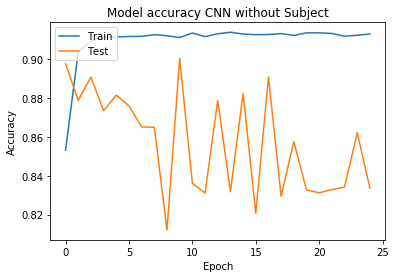

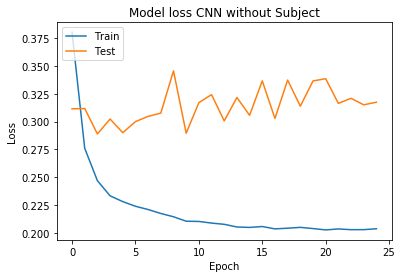

In [26]:
plt.plot(history_cnn_1.history['acc'])
plt.plot(history_cnn_1.history['val_acc'])
plt.title('Model accuracy CNN without Subject')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history_cnn_1.history['loss'])
plt.plot(history_cnn_1.history['val_loss'])
plt.title('Model loss CNN without Subject')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
# accuracy only gets slightly worse when incorporating the subject of each email -> use those for all following analyses
history_cnn_2 = model_cnn.fit([trainX_ws,trainX_ws,trainX_ws], array(y_train1), validation_data=([testX_ws,testX_ws,testX_ws],y_test1), epochs=25, batch_size=16, verbose=1)
print(model_cnn.summary())

Train on 12813 samples, validate on 5492 samples
Epoch 1/25


 3248/12813 [======>.......................] - ETA: 3:22 - loss: 0.5647 - acc: 0.750 - ETA: 3:06 - loss: 0.4383 - acc: 0.812 - ETA: 2:47 - loss: 0.4449 - acc: 0.770 - ETA: 2:49 - loss: 0.7034 - acc: 0.781 - ETA: 2:44 - loss: 0.8046 - acc: 0.787 - ETA: 2:42 - loss: 0.8925 - acc: 0.791 - ETA: 2:43 - loss: 0.9364 - acc: 0.776 - ETA: 2:40 - loss: 0.8625 - acc: 0.773 - ETA: 2:37 - loss: 0.8326 - acc: 0.770 - ETA: 2:37 - loss: 0.8310 - acc: 0.768 - ETA: 2:33 - loss: 0.8716 - acc: 0.767 - ETA: 2:32 - loss: 0.9722 - acc: 0.750 - ETA: 2:32 - loss: 0.9558 - acc: 0.740 - ETA: 2:30 - loss: 0.9442 - acc: 0.745 - ETA: 2:28 - loss: 0.9272 - acc: 0.750 - ETA: 2:28 - loss: 0.8879 - acc: 0.765 - ETA: 2:27 - loss: 0.8510 - acc: 0.768 - ETA: 2:25 - loss: 0.8350 - acc: 0.770 - ETA: 2:25 - loss: 0.8121 - acc: 0.776 - ETA: 2:26 - loss: 0.8029 - acc: 0.775 - ETA: 2:25 - loss: 0.7762 - acc: 0.785 - ETA: 2:23 - loss: 0.7586 - acc: 0.789 - ETA: 2:21 - loss: 0.7446 - acc: 0.790 - ETA: 2:20 - loss: 0.7433 - acc: 0

 6512/12813 [==============>...............] - ETA: 1:46 - loss: 0.4630 - acc: 0.829 - ETA: 1:46 - loss: 0.4648 - acc: 0.829 - ETA: 1:46 - loss: 0.4645 - acc: 0.829 - ETA: 1:46 - loss: 0.4665 - acc: 0.828 - ETA: 1:46 - loss: 0.4661 - acc: 0.828 - ETA: 1:45 - loss: 0.4656 - acc: 0.828 - ETA: 1:45 - loss: 0.4639 - acc: 0.829 - ETA: 1:45 - loss: 0.4647 - acc: 0.829 - ETA: 1:45 - loss: 0.4647 - acc: 0.829 - ETA: 1:45 - loss: 0.4642 - acc: 0.829 - ETA: 1:44 - loss: 0.4640 - acc: 0.829 - ETA: 1:44 - loss: 0.4641 - acc: 0.829 - ETA: 1:44 - loss: 0.4640 - acc: 0.829 - ETA: 1:44 - loss: 0.4639 - acc: 0.829 - ETA: 1:44 - loss: 0.4639 - acc: 0.829 - ETA: 1:43 - loss: 0.4635 - acc: 0.829 - ETA: 1:43 - loss: 0.4631 - acc: 0.829 - ETA: 1:43 - loss: 0.4619 - acc: 0.830 - ETA: 1:43 - loss: 0.4609 - acc: 0.830 - ETA: 1:43 - loss: 0.4606 - acc: 0.830 - ETA: 1:42 - loss: 0.4615 - acc: 0.829 - ETA: 1:42 - loss: 0.4609 - acc: 0.830 - ETA: 1:42 - loss: 0.4604 - acc: 0.830 - ETA: 1:42 - loss: 0.4602 - acc: 0

 9904/12813 [======================>.......] - ETA: 1:09 - loss: 0.4199 - acc: 0.843 - ETA: 1:09 - loss: 0.4193 - acc: 0.843 - ETA: 1:09 - loss: 0.4196 - acc: 0.843 - ETA: 1:09 - loss: 0.4191 - acc: 0.843 - ETA: 1:09 - loss: 0.4197 - acc: 0.843 - ETA: 1:08 - loss: 0.4191 - acc: 0.843 - ETA: 1:08 - loss: 0.4190 - acc: 0.843 - ETA: 1:08 - loss: 0.4185 - acc: 0.843 - ETA: 1:08 - loss: 0.4189 - acc: 0.843 - ETA: 1:08 - loss: 0.4185 - acc: 0.843 - ETA: 1:07 - loss: 0.4194 - acc: 0.842 - ETA: 1:07 - loss: 0.4194 - acc: 0.842 - ETA: 1:07 - loss: 0.4200 - acc: 0.842 - ETA: 1:07 - loss: 0.4198 - acc: 0.842 - ETA: 1:07 - loss: 0.4192 - acc: 0.842 - ETA: 1:07 - loss: 0.4190 - acc: 0.842 - ETA: 1:06 - loss: 0.4187 - acc: 0.842 - ETA: 1:06 - loss: 0.4185 - acc: 0.842 - ETA: 1:06 - loss: 0.4183 - acc: 0.842 - ETA: 1:06 - loss: 0.4182 - acc: 0.842 - ETA: 1:06 - loss: 0.4180 - acc: 0.842 - ETA: 1:06 - loss: 0.4176 - acc: 0.843 - ETA: 1:05 - loss: 0.4176 - acc: 0.843 - ETA: 1:05 - loss: 0.4171 - acc: 0

12813/12813 [==============================] - ETA: 31s - loss: 0.3921 - acc: 0.84 - ETA: 31s - loss: 0.3923 - acc: 0.84 - ETA: 31s - loss: 0.3926 - acc: 0.84 - ETA: 31s - loss: 0.3927 - acc: 0.84 - ETA: 31s - loss: 0.3925 - acc: 0.84 - ETA: 30s - loss: 0.3928 - acc: 0.84 - ETA: 30s - loss: 0.3925 - acc: 0.84 - ETA: 30s - loss: 0.3924 - acc: 0.84 - ETA: 30s - loss: 0.3921 - acc: 0.84 - ETA: 30s - loss: 0.3918 - acc: 0.84 - ETA: 30s - loss: 0.3918 - acc: 0.84 - ETA: 29s - loss: 0.3916 - acc: 0.84 - ETA: 29s - loss: 0.3914 - acc: 0.84 - ETA: 29s - loss: 0.3913 - acc: 0.84 - ETA: 29s - loss: 0.3913 - acc: 0.84 - ETA: 29s - loss: 0.3913 - acc: 0.84 - ETA: 28s - loss: 0.3910 - acc: 0.84 - ETA: 28s - loss: 0.3907 - acc: 0.84 - ETA: 28s - loss: 0.3906 - acc: 0.84 - ETA: 28s - loss: 0.3906 - acc: 0.84 - ETA: 28s - loss: 0.3902 - acc: 0.84 - ETA: 28s - loss: 0.3901 - acc: 0.84 - ETA: 27s - loss: 0.3901 - acc: 0.84 - ETA: 27s - loss: 0.3898 - acc: 0.84 - ETA: 27s - loss: 0.3897 - acc: 0.84 - ETA

 3264/12813 [======>.......................] - ETA: 1:54 - loss: 0.2441 - acc: 0.875 - ETA: 2:03 - loss: 0.1525 - acc: 0.937 - ETA: 2:14 - loss: 0.1937 - acc: 0.916 - ETA: 2:12 - loss: 0.2129 - acc: 0.906 - ETA: 2:11 - loss: 0.1804 - acc: 0.925 - ETA: 2:12 - loss: 0.2032 - acc: 0.906 - ETA: 2:11 - loss: 0.2186 - acc: 0.901 - ETA: 2:10 - loss: 0.2266 - acc: 0.898 - ETA: 2:10 - loss: 0.2389 - acc: 0.875 - ETA: 2:09 - loss: 0.2403 - acc: 0.875 - ETA: 2:10 - loss: 0.2518 - acc: 0.858 - ETA: 2:10 - loss: 0.2573 - acc: 0.859 - ETA: 2:09 - loss: 0.2474 - acc: 0.865 - ETA: 2:09 - loss: 0.2418 - acc: 0.870 - ETA: 2:09 - loss: 0.2516 - acc: 0.866 - ETA: 2:09 - loss: 0.2540 - acc: 0.871 - ETA: 2:09 - loss: 0.2641 - acc: 0.864 - ETA: 2:09 - loss: 0.2604 - acc: 0.864 - ETA: 2:09 - loss: 0.2575 - acc: 0.868 - ETA: 2:09 - loss: 0.2556 - acc: 0.871 - ETA: 2:09 - loss: 0.2582 - acc: 0.872 - ETA: 2:09 - loss: 0.2610 - acc: 0.872 - ETA: 2:08 - loss: 0.2619 - acc: 0.872 - ETA: 2:08 - loss: 0.2600 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:39 - loss: 0.2785 - acc: 0.876 - ETA: 1:39 - loss: 0.2784 - acc: 0.876 - ETA: 1:38 - loss: 0.2781 - acc: 0.876 - ETA: 1:38 - loss: 0.2775 - acc: 0.876 - ETA: 1:38 - loss: 0.2766 - acc: 0.877 - ETA: 1:38 - loss: 0.2772 - acc: 0.877 - ETA: 1:38 - loss: 0.2771 - acc: 0.877 - ETA: 1:38 - loss: 0.2769 - acc: 0.877 - ETA: 1:37 - loss: 0.2764 - acc: 0.877 - ETA: 1:37 - loss: 0.2756 - acc: 0.878 - ETA: 1:37 - loss: 0.2752 - acc: 0.878 - ETA: 1:37 - loss: 0.2746 - acc: 0.878 - ETA: 1:37 - loss: 0.2738 - acc: 0.879 - ETA: 1:37 - loss: 0.2739 - acc: 0.878 - ETA: 1:36 - loss: 0.2745 - acc: 0.878 - ETA: 1:36 - loss: 0.2754 - acc: 0.877 - ETA: 1:36 - loss: 0.2752 - acc: 0.877 - ETA: 1:36 - loss: 0.2743 - acc: 0.878 - ETA: 1:36 - loss: 0.2749 - acc: 0.878 - ETA: 1:35 - loss: 0.2745 - acc: 0.878 - ETA: 1:35 - loss: 0.2769 - acc: 0.877 - ETA: 1:35 - loss: 0.2767 - acc: 0.877 - ETA: 1:35 - loss: 0.2758 - acc: 0.878 - ETA: 1:35 - loss: 0.2761 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:05 - loss: 0.2761 - acc: 0.879 - ETA: 1:05 - loss: 0.2762 - acc: 0.879 - ETA: 1:05 - loss: 0.2765 - acc: 0.879 - ETA: 1:04 - loss: 0.2762 - acc: 0.879 - ETA: 1:04 - loss: 0.2761 - acc: 0.879 - ETA: 1:04 - loss: 0.2758 - acc: 0.880 - ETA: 1:04 - loss: 0.2758 - acc: 0.879 - ETA: 1:04 - loss: 0.2758 - acc: 0.879 - ETA: 1:04 - loss: 0.2757 - acc: 0.879 - ETA: 1:03 - loss: 0.2755 - acc: 0.879 - ETA: 1:03 - loss: 0.2766 - acc: 0.879 - ETA: 1:03 - loss: 0.2764 - acc: 0.879 - ETA: 1:03 - loss: 0.2762 - acc: 0.879 - ETA: 1:03 - loss: 0.2762 - acc: 0.879 - ETA: 1:02 - loss: 0.2767 - acc: 0.879 - ETA: 1:02 - loss: 0.2767 - acc: 0.879 - ETA: 1:02 - loss: 0.2770 - acc: 0.879 - ETA: 1:02 - loss: 0.2773 - acc: 0.879 - ETA: 1:02 - loss: 0.2771 - acc: 0.879 - ETA: 1:02 - loss: 0.2767 - acc: 0.879 - ETA: 1:01 - loss: 0.2763 - acc: 0.880 - ETA: 1:01 - loss: 0.2764 - acc: 0.880 - ETA: 1:01 - loss: 0.2767 - acc: 0.879 - ETA: 1:01 - loss: 0.2764 - acc: 0

12813/12813 [==============================] - ETA: 29s - loss: 0.2758 - acc: 0.88 - ETA: 29s - loss: 0.2758 - acc: 0.88 - ETA: 29s - loss: 0.2757 - acc: 0.88 - ETA: 29s - loss: 0.2753 - acc: 0.88 - ETA: 29s - loss: 0.2754 - acc: 0.88 - ETA: 29s - loss: 0.2754 - acc: 0.88 - ETA: 28s - loss: 0.2752 - acc: 0.88 - ETA: 28s - loss: 0.2752 - acc: 0.88 - ETA: 28s - loss: 0.2749 - acc: 0.88 - ETA: 28s - loss: 0.2748 - acc: 0.88 - ETA: 28s - loss: 0.2753 - acc: 0.88 - ETA: 28s - loss: 0.2750 - acc: 0.88 - ETA: 27s - loss: 0.2754 - acc: 0.88 - ETA: 27s - loss: 0.2758 - acc: 0.88 - ETA: 27s - loss: 0.2761 - acc: 0.88 - ETA: 27s - loss: 0.2762 - acc: 0.88 - ETA: 27s - loss: 0.2759 - acc: 0.88 - ETA: 27s - loss: 0.2760 - acc: 0.88 - ETA: 26s - loss: 0.2761 - acc: 0.88 - ETA: 26s - loss: 0.2760 - acc: 0.88 - ETA: 26s - loss: 0.2760 - acc: 0.88 - ETA: 26s - loss: 0.2760 - acc: 0.88 - ETA: 26s - loss: 0.2761 - acc: 0.88 - ETA: 26s - loss: 0.2761 - acc: 0.88 - ETA: 25s - loss: 0.2762 - acc: 0.88 - ETA

 3264/12813 [======>.......................] - ETA: 2:03 - loss: 0.1886 - acc: 0.937 - ETA: 2:07 - loss: 0.2538 - acc: 0.906 - ETA: 2:18 - loss: 0.2399 - acc: 0.916 - ETA: 2:13 - loss: 0.1881 - acc: 0.937 - ETA: 2:10 - loss: 0.1828 - acc: 0.925 - ETA: 2:09 - loss: 0.2150 - acc: 0.927 - ETA: 2:10 - loss: 0.2205 - acc: 0.919 - ETA: 2:08 - loss: 0.2642 - acc: 0.890 - ETA: 2:08 - loss: 0.2682 - acc: 0.888 - ETA: 2:08 - loss: 0.2599 - acc: 0.893 - ETA: 2:12 - loss: 0.2832 - acc: 0.875 - ETA: 2:11 - loss: 0.2806 - acc: 0.880 - ETA: 2:11 - loss: 0.2744 - acc: 0.879 - ETA: 2:11 - loss: 0.2638 - acc: 0.883 - ETA: 2:10 - loss: 0.2696 - acc: 0.883 - ETA: 2:10 - loss: 0.2598 - acc: 0.890 - ETA: 2:09 - loss: 0.2580 - acc: 0.889 - ETA: 2:08 - loss: 0.2606 - acc: 0.888 - ETA: 2:11 - loss: 0.2736 - acc: 0.881 - ETA: 2:10 - loss: 0.2745 - acc: 0.881 - ETA: 2:10 - loss: 0.2713 - acc: 0.883 - ETA: 2:10 - loss: 0.2778 - acc: 0.877 - ETA: 2:10 - loss: 0.2751 - acc: 0.880 - ETA: 2:10 - loss: 0.2770 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:40 - loss: 0.2463 - acc: 0.895 - ETA: 1:40 - loss: 0.2470 - acc: 0.895 - ETA: 1:40 - loss: 0.2467 - acc: 0.895 - ETA: 1:39 - loss: 0.2463 - acc: 0.895 - ETA: 1:39 - loss: 0.2457 - acc: 0.895 - ETA: 1:39 - loss: 0.2456 - acc: 0.896 - ETA: 1:39 - loss: 0.2459 - acc: 0.896 - ETA: 1:39 - loss: 0.2462 - acc: 0.895 - ETA: 1:38 - loss: 0.2460 - acc: 0.896 - ETA: 1:38 - loss: 0.2455 - acc: 0.896 - ETA: 1:38 - loss: 0.2450 - acc: 0.896 - ETA: 1:38 - loss: 0.2444 - acc: 0.897 - ETA: 1:38 - loss: 0.2442 - acc: 0.896 - ETA: 1:37 - loss: 0.2436 - acc: 0.897 - ETA: 1:37 - loss: 0.2440 - acc: 0.897 - ETA: 1:37 - loss: 0.2442 - acc: 0.896 - ETA: 1:37 - loss: 0.2437 - acc: 0.897 - ETA: 1:37 - loss: 0.2435 - acc: 0.897 - ETA: 1:37 - loss: 0.2437 - acc: 0.896 - ETA: 1:36 - loss: 0.2431 - acc: 0.897 - ETA: 1:36 - loss: 0.2431 - acc: 0.897 - ETA: 1:36 - loss: 0.2436 - acc: 0.897 - ETA: 1:36 - loss: 0.2429 - acc: 0.897 - ETA: 1:36 - loss: 0.2421 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:05 - loss: 0.2444 - acc: 0.897 - ETA: 1:05 - loss: 0.2444 - acc: 0.897 - ETA: 1:05 - loss: 0.2445 - acc: 0.897 - ETA: 1:05 - loss: 0.2443 - acc: 0.897 - ETA: 1:05 - loss: 0.2453 - acc: 0.896 - ETA: 1:04 - loss: 0.2453 - acc: 0.896 - ETA: 1:04 - loss: 0.2451 - acc: 0.897 - ETA: 1:04 - loss: 0.2452 - acc: 0.897 - ETA: 1:04 - loss: 0.2451 - acc: 0.897 - ETA: 1:04 - loss: 0.2448 - acc: 0.897 - ETA: 1:03 - loss: 0.2449 - acc: 0.897 - ETA: 1:03 - loss: 0.2448 - acc: 0.897 - ETA: 1:03 - loss: 0.2452 - acc: 0.897 - ETA: 1:03 - loss: 0.2449 - acc: 0.897 - ETA: 1:03 - loss: 0.2448 - acc: 0.897 - ETA: 1:03 - loss: 0.2447 - acc: 0.897 - ETA: 1:02 - loss: 0.2445 - acc: 0.897 - ETA: 1:02 - loss: 0.2443 - acc: 0.897 - ETA: 1:02 - loss: 0.2447 - acc: 0.897 - ETA: 1:02 - loss: 0.2446 - acc: 0.897 - ETA: 1:02 - loss: 0.2446 - acc: 0.897 - ETA: 1:02 - loss: 0.2449 - acc: 0.897 - ETA: 1:02 - loss: 0.2451 - acc: 0.897 - ETA: 1:01 - loss: 0.2448 - acc: 0

12813/12813 [==============================] - ETA: 29s - loss: 0.2491 - acc: 0.89 - ETA: 29s - loss: 0.2490 - acc: 0.89 - ETA: 29s - loss: 0.2490 - acc: 0.89 - ETA: 29s - loss: 0.2491 - acc: 0.89 - ETA: 29s - loss: 0.2491 - acc: 0.89 - ETA: 29s - loss: 0.2488 - acc: 0.89 - ETA: 28s - loss: 0.2487 - acc: 0.89 - ETA: 28s - loss: 0.2486 - acc: 0.89 - ETA: 28s - loss: 0.2484 - acc: 0.89 - ETA: 28s - loss: 0.2485 - acc: 0.89 - ETA: 28s - loss: 0.2486 - acc: 0.89 - ETA: 28s - loss: 0.2485 - acc: 0.89 - ETA: 27s - loss: 0.2484 - acc: 0.89 - ETA: 27s - loss: 0.2486 - acc: 0.89 - ETA: 27s - loss: 0.2486 - acc: 0.89 - ETA: 27s - loss: 0.2484 - acc: 0.89 - ETA: 27s - loss: 0.2484 - acc: 0.89 - ETA: 27s - loss: 0.2484 - acc: 0.89 - ETA: 26s - loss: 0.2485 - acc: 0.89 - ETA: 26s - loss: 0.2485 - acc: 0.89 - ETA: 26s - loss: 0.2483 - acc: 0.89 - ETA: 26s - loss: 0.2486 - acc: 0.89 - ETA: 26s - loss: 0.2485 - acc: 0.89 - ETA: 26s - loss: 0.2484 - acc: 0.89 - ETA: 25s - loss: 0.2481 - acc: 0.89 - ETA

 3264/12813 [======>.......................] - ETA: 2:04 - loss: 0.1303 - acc: 1.000 - ETA: 2:02 - loss: 0.2021 - acc: 0.906 - ETA: 2:10 - loss: 0.2422 - acc: 0.875 - ETA: 2:09 - loss: 0.2418 - acc: 0.875 - ETA: 2:08 - loss: 0.2516 - acc: 0.875 - ETA: 2:07 - loss: 0.2517 - acc: 0.875 - ETA: 2:08 - loss: 0.2463 - acc: 0.875 - ETA: 2:08 - loss: 0.2496 - acc: 0.882 - ETA: 2:09 - loss: 0.2599 - acc: 0.881 - ETA: 2:09 - loss: 0.2580 - acc: 0.887 - ETA: 2:08 - loss: 0.2517 - acc: 0.886 - ETA: 2:10 - loss: 0.2600 - acc: 0.885 - ETA: 2:09 - loss: 0.2524 - acc: 0.889 - ETA: 2:08 - loss: 0.2532 - acc: 0.888 - ETA: 2:08 - loss: 0.2451 - acc: 0.895 - ETA: 2:09 - loss: 0.2617 - acc: 0.886 - ETA: 2:08 - loss: 0.2595 - acc: 0.889 - ETA: 2:07 - loss: 0.2603 - acc: 0.888 - ETA: 2:07 - loss: 0.2616 - acc: 0.891 - ETA: 2:07 - loss: 0.2589 - acc: 0.890 - ETA: 2:07 - loss: 0.2614 - acc: 0.886 - ETA: 2:07 - loss: 0.2538 - acc: 0.892 - ETA: 2:07 - loss: 0.2536 - acc: 0.891 - ETA: 2:07 - loss: 0.2527 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:39 - loss: 0.2414 - acc: 0.899 - ETA: 1:39 - loss: 0.2410 - acc: 0.899 - ETA: 1:38 - loss: 0.2416 - acc: 0.899 - ETA: 1:38 - loss: 0.2414 - acc: 0.899 - ETA: 1:38 - loss: 0.2415 - acc: 0.899 - ETA: 1:38 - loss: 0.2420 - acc: 0.898 - ETA: 1:38 - loss: 0.2424 - acc: 0.898 - ETA: 1:37 - loss: 0.2418 - acc: 0.899 - ETA: 1:37 - loss: 0.2415 - acc: 0.899 - ETA: 1:37 - loss: 0.2417 - acc: 0.898 - ETA: 1:37 - loss: 0.2414 - acc: 0.899 - ETA: 1:37 - loss: 0.2425 - acc: 0.898 - ETA: 1:36 - loss: 0.2426 - acc: 0.898 - ETA: 1:36 - loss: 0.2418 - acc: 0.898 - ETA: 1:36 - loss: 0.2419 - acc: 0.898 - ETA: 1:36 - loss: 0.2417 - acc: 0.898 - ETA: 1:36 - loss: 0.2414 - acc: 0.898 - ETA: 1:36 - loss: 0.2423 - acc: 0.898 - ETA: 1:35 - loss: 0.2418 - acc: 0.898 - ETA: 1:35 - loss: 0.2419 - acc: 0.898 - ETA: 1:35 - loss: 0.2415 - acc: 0.898 - ETA: 1:35 - loss: 0.2418 - acc: 0.898 - ETA: 1:35 - loss: 0.2416 - acc: 0.898 - ETA: 1:35 - loss: 0.2412 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:05 - loss: 0.2395 - acc: 0.897 - ETA: 1:05 - loss: 0.2395 - acc: 0.898 - ETA: 1:05 - loss: 0.2395 - acc: 0.898 - ETA: 1:05 - loss: 0.2397 - acc: 0.897 - ETA: 1:04 - loss: 0.2401 - acc: 0.897 - ETA: 1:04 - loss: 0.2398 - acc: 0.897 - ETA: 1:04 - loss: 0.2401 - acc: 0.897 - ETA: 1:04 - loss: 0.2401 - acc: 0.897 - ETA: 1:04 - loss: 0.2399 - acc: 0.897 - ETA: 1:04 - loss: 0.2399 - acc: 0.897 - ETA: 1:04 - loss: 0.2404 - acc: 0.897 - ETA: 1:03 - loss: 0.2407 - acc: 0.897 - ETA: 1:03 - loss: 0.2411 - acc: 0.897 - ETA: 1:03 - loss: 0.2409 - acc: 0.897 - ETA: 1:03 - loss: 0.2406 - acc: 0.897 - ETA: 1:03 - loss: 0.2411 - acc: 0.897 - ETA: 1:03 - loss: 0.2413 - acc: 0.897 - ETA: 1:02 - loss: 0.2409 - acc: 0.897 - ETA: 1:02 - loss: 0.2405 - acc: 0.897 - ETA: 1:02 - loss: 0.2403 - acc: 0.897 - ETA: 1:02 - loss: 0.2406 - acc: 0.897 - ETA: 1:02 - loss: 0.2408 - acc: 0.897 - ETA: 1:02 - loss: 0.2407 - acc: 0.897 - ETA: 1:01 - loss: 0.2409 - acc: 0

12813/12813 [==============================] - ETA: 29s - loss: 0.2375 - acc: 0.89 - ETA: 29s - loss: 0.2374 - acc: 0.89 - ETA: 29s - loss: 0.2376 - acc: 0.89 - ETA: 29s - loss: 0.2375 - acc: 0.89 - ETA: 29s - loss: 0.2374 - acc: 0.89 - ETA: 29s - loss: 0.2371 - acc: 0.89 - ETA: 28s - loss: 0.2374 - acc: 0.89 - ETA: 28s - loss: 0.2377 - acc: 0.89 - ETA: 28s - loss: 0.2380 - acc: 0.89 - ETA: 28s - loss: 0.2378 - acc: 0.89 - ETA: 28s - loss: 0.2375 - acc: 0.89 - ETA: 28s - loss: 0.2372 - acc: 0.89 - ETA: 27s - loss: 0.2373 - acc: 0.89 - ETA: 27s - loss: 0.2373 - acc: 0.89 - ETA: 27s - loss: 0.2372 - acc: 0.89 - ETA: 27s - loss: 0.2373 - acc: 0.89 - ETA: 27s - loss: 0.2374 - acc: 0.89 - ETA: 27s - loss: 0.2378 - acc: 0.89 - ETA: 26s - loss: 0.2377 - acc: 0.89 - ETA: 26s - loss: 0.2377 - acc: 0.89 - ETA: 26s - loss: 0.2377 - acc: 0.89 - ETA: 26s - loss: 0.2375 - acc: 0.89 - ETA: 26s - loss: 0.2372 - acc: 0.89 - ETA: 26s - loss: 0.2379 - acc: 0.89 - ETA: 25s - loss: 0.2376 - acc: 0.89 - ETA

 3264/12813 [======>.......................] - ETA: 2:02 - loss: 0.4436 - acc: 0.750 - ETA: 1:59 - loss: 0.2958 - acc: 0.843 - ETA: 2:10 - loss: 0.2807 - acc: 0.854 - ETA: 2:13 - loss: 0.2631 - acc: 0.859 - ETA: 2:12 - loss: 0.2832 - acc: 0.850 - ETA: 2:11 - loss: 0.2850 - acc: 0.843 - ETA: 2:10 - loss: 0.2627 - acc: 0.857 - ETA: 2:10 - loss: 0.2588 - acc: 0.867 - ETA: 2:09 - loss: 0.2574 - acc: 0.868 - ETA: 2:09 - loss: 0.2466 - acc: 0.868 - ETA: 2:09 - loss: 0.2532 - acc: 0.858 - ETA: 2:10 - loss: 0.2492 - acc: 0.859 - ETA: 2:11 - loss: 0.2380 - acc: 0.865 - ETA: 2:12 - loss: 0.2423 - acc: 0.866 - ETA: 2:12 - loss: 0.2319 - acc: 0.875 - ETA: 2:13 - loss: 0.2326 - acc: 0.875 - ETA: 2:13 - loss: 0.2392 - acc: 0.875 - ETA: 2:12 - loss: 0.2326 - acc: 0.878 - ETA: 2:13 - loss: 0.2363 - acc: 0.878 - ETA: 2:14 - loss: 0.2445 - acc: 0.878 - ETA: 2:14 - loss: 0.2474 - acc: 0.875 - ETA: 2:14 - loss: 0.2387 - acc: 0.880 - ETA: 2:16 - loss: 0.2536 - acc: 0.869 - ETA: 2:18 - loss: 0.2624 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:41 - loss: 0.2368 - acc: 0.893 - ETA: 1:41 - loss: 0.2364 - acc: 0.893 - ETA: 1:41 - loss: 0.2366 - acc: 0.893 - ETA: 1:41 - loss: 0.2366 - acc: 0.893 - ETA: 1:40 - loss: 0.2369 - acc: 0.893 - ETA: 1:40 - loss: 0.2374 - acc: 0.893 - ETA: 1:40 - loss: 0.2364 - acc: 0.894 - ETA: 1:40 - loss: 0.2371 - acc: 0.893 - ETA: 1:40 - loss: 0.2375 - acc: 0.893 - ETA: 1:40 - loss: 0.2374 - acc: 0.893 - ETA: 1:40 - loss: 0.2376 - acc: 0.893 - ETA: 1:39 - loss: 0.2374 - acc: 0.893 - ETA: 1:39 - loss: 0.2369 - acc: 0.894 - ETA: 1:39 - loss: 0.2363 - acc: 0.894 - ETA: 1:39 - loss: 0.2371 - acc: 0.893 - ETA: 1:39 - loss: 0.2365 - acc: 0.893 - ETA: 1:39 - loss: 0.2375 - acc: 0.893 - ETA: 1:39 - loss: 0.2367 - acc: 0.894 - ETA: 1:38 - loss: 0.2365 - acc: 0.894 - ETA: 1:38 - loss: 0.2367 - acc: 0.894 - ETA: 1:38 - loss: 0.2363 - acc: 0.894 - ETA: 1:38 - loss: 0.2353 - acc: 0.894 - ETA: 1:38 - loss: 0.2350 - acc: 0.895 - ETA: 1:38 - loss: 0.2345 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:06 - loss: 0.2367 - acc: 0.897 - ETA: 1:05 - loss: 0.2370 - acc: 0.897 - ETA: 1:05 - loss: 0.2378 - acc: 0.896 - ETA: 1:05 - loss: 0.2375 - acc: 0.896 - ETA: 1:05 - loss: 0.2376 - acc: 0.896 - ETA: 1:05 - loss: 0.2375 - acc: 0.896 - ETA: 1:05 - loss: 0.2373 - acc: 0.896 - ETA: 1:05 - loss: 0.2378 - acc: 0.896 - ETA: 1:04 - loss: 0.2375 - acc: 0.896 - ETA: 1:04 - loss: 0.2375 - acc: 0.896 - ETA: 1:04 - loss: 0.2379 - acc: 0.896 - ETA: 1:04 - loss: 0.2376 - acc: 0.897 - ETA: 1:04 - loss: 0.2373 - acc: 0.897 - ETA: 1:03 - loss: 0.2372 - acc: 0.897 - ETA: 1:03 - loss: 0.2369 - acc: 0.897 - ETA: 1:03 - loss: 0.2368 - acc: 0.897 - ETA: 1:03 - loss: 0.2378 - acc: 0.897 - ETA: 1:03 - loss: 0.2374 - acc: 0.897 - ETA: 1:03 - loss: 0.2374 - acc: 0.897 - ETA: 1:02 - loss: 0.2387 - acc: 0.896 - ETA: 1:02 - loss: 0.2386 - acc: 0.896 - ETA: 1:02 - loss: 0.2386 - acc: 0.896 - ETA: 1:02 - loss: 0.2388 - acc: 0.896 - ETA: 1:02 - loss: 0.2389 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2363 - acc: 0.89 - ETA: 29s - loss: 0.2362 - acc: 0.89 - ETA: 29s - loss: 0.2362 - acc: 0.89 - ETA: 29s - loss: 0.2362 - acc: 0.89 - ETA: 29s - loss: 0.2362 - acc: 0.89 - ETA: 29s - loss: 0.2361 - acc: 0.89 - ETA: 29s - loss: 0.2359 - acc: 0.89 - ETA: 28s - loss: 0.2358 - acc: 0.89 - ETA: 28s - loss: 0.2357 - acc: 0.89 - ETA: 28s - loss: 0.2355 - acc: 0.89 - ETA: 28s - loss: 0.2359 - acc: 0.89 - ETA: 28s - loss: 0.2359 - acc: 0.89 - ETA: 28s - loss: 0.2358 - acc: 0.89 - ETA: 27s - loss: 0.2362 - acc: 0.89 - ETA: 27s - loss: 0.2361 - acc: 0.89 - ETA: 27s - loss: 0.2363 - acc: 0.89 - ETA: 27s - loss: 0.2362 - acc: 0.89 - ETA: 27s - loss: 0.2361 - acc: 0.89 - ETA: 27s - loss: 0.2362 - acc: 0.89 - ETA: 26s - loss: 0.2362 - acc: 0.89 - ETA: 26s - loss: 0.2361 - acc: 0.89 - ETA: 26s - loss: 0.2364 - acc: 0.89 - ETA: 26s - loss: 0.2363 - acc: 0.89 - ETA: 26s - loss: 0.2364 - acc: 0.89 - ETA: 26s - loss: 0.2364 - acc: 0.89 - ETA

 3264/12813 [======>.......................] - ETA: 2:05 - loss: 0.5532 - acc: 0.562 - ETA: 2:04 - loss: 0.3842 - acc: 0.750 - ETA: 2:16 - loss: 0.3456 - acc: 0.770 - ETA: 2:11 - loss: 0.3239 - acc: 0.812 - ETA: 2:14 - loss: 0.3173 - acc: 0.825 - ETA: 2:15 - loss: 0.3173 - acc: 0.822 - ETA: 2:17 - loss: 0.3139 - acc: 0.821 - ETA: 2:17 - loss: 0.2880 - acc: 0.843 - ETA: 2:17 - loss: 0.2733 - acc: 0.847 - ETA: 2:22 - loss: 0.2599 - acc: 0.856 - ETA: 2:22 - loss: 0.2552 - acc: 0.863 - ETA: 2:21 - loss: 0.2513 - acc: 0.869 - ETA: 2:20 - loss: 0.2438 - acc: 0.875 - ETA: 2:20 - loss: 0.2419 - acc: 0.879 - ETA: 2:19 - loss: 0.2467 - acc: 0.879 - ETA: 2:20 - loss: 0.2424 - acc: 0.882 - ETA: 2:20 - loss: 0.2394 - acc: 0.886 - ETA: 2:21 - loss: 0.2409 - acc: 0.885 - ETA: 2:21 - loss: 0.2400 - acc: 0.888 - ETA: 2:20 - loss: 0.2448 - acc: 0.887 - ETA: 2:20 - loss: 0.2581 - acc: 0.881 - ETA: 2:20 - loss: 0.2489 - acc: 0.886 - ETA: 2:20 - loss: 0.2475 - acc: 0.885 - ETA: 2:19 - loss: 0.2405 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:40 - loss: 0.2405 - acc: 0.897 - ETA: 1:40 - loss: 0.2396 - acc: 0.897 - ETA: 1:40 - loss: 0.2404 - acc: 0.897 - ETA: 1:40 - loss: 0.2397 - acc: 0.897 - ETA: 1:39 - loss: 0.2409 - acc: 0.897 - ETA: 1:39 - loss: 0.2414 - acc: 0.897 - ETA: 1:39 - loss: 0.2414 - acc: 0.897 - ETA: 1:39 - loss: 0.2413 - acc: 0.897 - ETA: 1:39 - loss: 0.2406 - acc: 0.898 - ETA: 1:39 - loss: 0.2416 - acc: 0.897 - ETA: 1:39 - loss: 0.2431 - acc: 0.896 - ETA: 1:38 - loss: 0.2431 - acc: 0.895 - ETA: 1:38 - loss: 0.2426 - acc: 0.896 - ETA: 1:38 - loss: 0.2421 - acc: 0.896 - ETA: 1:38 - loss: 0.2426 - acc: 0.896 - ETA: 1:38 - loss: 0.2425 - acc: 0.895 - ETA: 1:37 - loss: 0.2422 - acc: 0.895 - ETA: 1:37 - loss: 0.2418 - acc: 0.896 - ETA: 1:37 - loss: 0.2416 - acc: 0.896 - ETA: 1:37 - loss: 0.2414 - acc: 0.896 - ETA: 1:37 - loss: 0.2416 - acc: 0.896 - ETA: 1:36 - loss: 0.2418 - acc: 0.896 - ETA: 1:36 - loss: 0.2420 - acc: 0.895 - ETA: 1:36 - loss: 0.2416 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:05 - loss: 0.2344 - acc: 0.899 - ETA: 1:05 - loss: 0.2342 - acc: 0.900 - ETA: 1:05 - loss: 0.2348 - acc: 0.899 - ETA: 1:05 - loss: 0.2349 - acc: 0.899 - ETA: 1:05 - loss: 0.2349 - acc: 0.899 - ETA: 1:04 - loss: 0.2347 - acc: 0.899 - ETA: 1:04 - loss: 0.2351 - acc: 0.899 - ETA: 1:04 - loss: 0.2349 - acc: 0.899 - ETA: 1:04 - loss: 0.2348 - acc: 0.899 - ETA: 1:04 - loss: 0.2346 - acc: 0.899 - ETA: 1:04 - loss: 0.2344 - acc: 0.899 - ETA: 1:03 - loss: 0.2342 - acc: 0.899 - ETA: 1:03 - loss: 0.2343 - acc: 0.899 - ETA: 1:03 - loss: 0.2347 - acc: 0.899 - ETA: 1:03 - loss: 0.2349 - acc: 0.899 - ETA: 1:03 - loss: 0.2350 - acc: 0.899 - ETA: 1:03 - loss: 0.2349 - acc: 0.899 - ETA: 1:02 - loss: 0.2347 - acc: 0.899 - ETA: 1:02 - loss: 0.2349 - acc: 0.899 - ETA: 1:02 - loss: 0.2346 - acc: 0.899 - ETA: 1:02 - loss: 0.2343 - acc: 0.899 - ETA: 1:02 - loss: 0.2342 - acc: 0.899 - ETA: 1:02 - loss: 0.2347 - acc: 0.899 - ETA: 1:01 - loss: 0.2348 - acc: 0

12813/12813 [==============================] - ETA: 29s - loss: 0.2307 - acc: 0.90 - ETA: 29s - loss: 0.2315 - acc: 0.90 - ETA: 29s - loss: 0.2316 - acc: 0.90 - ETA: 29s - loss: 0.2315 - acc: 0.90 - ETA: 29s - loss: 0.2318 - acc: 0.89 - ETA: 29s - loss: 0.2319 - acc: 0.89 - ETA: 28s - loss: 0.2320 - acc: 0.89 - ETA: 28s - loss: 0.2317 - acc: 0.89 - ETA: 28s - loss: 0.2316 - acc: 0.89 - ETA: 28s - loss: 0.2317 - acc: 0.89 - ETA: 28s - loss: 0.2318 - acc: 0.89 - ETA: 28s - loss: 0.2322 - acc: 0.89 - ETA: 27s - loss: 0.2324 - acc: 0.89 - ETA: 27s - loss: 0.2322 - acc: 0.89 - ETA: 27s - loss: 0.2321 - acc: 0.89 - ETA: 27s - loss: 0.2319 - acc: 0.89 - ETA: 27s - loss: 0.2319 - acc: 0.89 - ETA: 27s - loss: 0.2316 - acc: 0.89 - ETA: 26s - loss: 0.2315 - acc: 0.89 - ETA: 26s - loss: 0.2314 - acc: 0.90 - ETA: 26s - loss: 0.2314 - acc: 0.90 - ETA: 26s - loss: 0.2314 - acc: 0.90 - ETA: 26s - loss: 0.2312 - acc: 0.90 - ETA: 26s - loss: 0.2311 - acc: 0.90 - ETA: 25s - loss: 0.2313 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 2:05 - loss: 0.1439 - acc: 1.000 - ETA: 2:15 - loss: 0.1512 - acc: 0.937 - ETA: 2:22 - loss: 0.1373 - acc: 0.958 - ETA: 2:23 - loss: 0.1632 - acc: 0.921 - ETA: 2:20 - loss: 0.1698 - acc: 0.900 - ETA: 2:18 - loss: 0.1680 - acc: 0.906 - ETA: 2:17 - loss: 0.1616 - acc: 0.910 - ETA: 2:15 - loss: 0.1566 - acc: 0.921 - ETA: 2:13 - loss: 0.1527 - acc: 0.923 - ETA: 2:12 - loss: 0.1934 - acc: 0.906 - ETA: 2:12 - loss: 0.2123 - acc: 0.892 - ETA: 2:12 - loss: 0.2147 - acc: 0.895 - ETA: 2:12 - loss: 0.2122 - acc: 0.894 - ETA: 2:12 - loss: 0.2140 - acc: 0.897 - ETA: 2:11 - loss: 0.2093 - acc: 0.904 - ETA: 2:11 - loss: 0.2014 - acc: 0.910 - ETA: 2:11 - loss: 0.2119 - acc: 0.904 - ETA: 2:10 - loss: 0.2072 - acc: 0.909 - ETA: 2:10 - loss: 0.2083 - acc: 0.907 - ETA: 2:10 - loss: 0.2079 - acc: 0.909 - ETA: 2:10 - loss: 0.2029 - acc: 0.913 - ETA: 2:10 - loss: 0.2054 - acc: 0.911 - ETA: 2:09 - loss: 0.2014 - acc: 0.915 - ETA: 2:09 - loss: 0.2176 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:39 - loss: 0.2333 - acc: 0.900 - ETA: 1:39 - loss: 0.2335 - acc: 0.901 - ETA: 1:39 - loss: 0.2330 - acc: 0.901 - ETA: 1:39 - loss: 0.2326 - acc: 0.901 - ETA: 1:39 - loss: 0.2335 - acc: 0.901 - ETA: 1:38 - loss: 0.2337 - acc: 0.900 - ETA: 1:38 - loss: 0.2340 - acc: 0.900 - ETA: 1:38 - loss: 0.2348 - acc: 0.900 - ETA: 1:38 - loss: 0.2353 - acc: 0.899 - ETA: 1:38 - loss: 0.2356 - acc: 0.899 - ETA: 1:38 - loss: 0.2362 - acc: 0.899 - ETA: 1:37 - loss: 0.2358 - acc: 0.899 - ETA: 1:37 - loss: 0.2363 - acc: 0.898 - ETA: 1:37 - loss: 0.2356 - acc: 0.899 - ETA: 1:37 - loss: 0.2349 - acc: 0.899 - ETA: 1:37 - loss: 0.2343 - acc: 0.900 - ETA: 1:36 - loss: 0.2338 - acc: 0.900 - ETA: 1:36 - loss: 0.2339 - acc: 0.900 - ETA: 1:36 - loss: 0.2342 - acc: 0.899 - ETA: 1:36 - loss: 0.2339 - acc: 0.899 - ETA: 1:36 - loss: 0.2348 - acc: 0.899 - ETA: 1:36 - loss: 0.2355 - acc: 0.898 - ETA: 1:35 - loss: 0.2348 - acc: 0.899 - ETA: 1:35 - loss: 0.2352 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:05 - loss: 0.2308 - acc: 0.901 - ETA: 1:05 - loss: 0.2306 - acc: 0.901 - ETA: 1:05 - loss: 0.2306 - acc: 0.901 - ETA: 1:04 - loss: 0.2303 - acc: 0.901 - ETA: 1:04 - loss: 0.2299 - acc: 0.901 - ETA: 1:04 - loss: 0.2302 - acc: 0.901 - ETA: 1:04 - loss: 0.2305 - acc: 0.901 - ETA: 1:04 - loss: 0.2310 - acc: 0.901 - ETA: 1:04 - loss: 0.2311 - acc: 0.901 - ETA: 1:03 - loss: 0.2314 - acc: 0.900 - ETA: 1:03 - loss: 0.2311 - acc: 0.901 - ETA: 1:03 - loss: 0.2314 - acc: 0.901 - ETA: 1:03 - loss: 0.2314 - acc: 0.901 - ETA: 1:03 - loss: 0.2312 - acc: 0.901 - ETA: 1:03 - loss: 0.2312 - acc: 0.901 - ETA: 1:02 - loss: 0.2310 - acc: 0.901 - ETA: 1:02 - loss: 0.2315 - acc: 0.901 - ETA: 1:02 - loss: 0.2315 - acc: 0.901 - ETA: 1:02 - loss: 0.2315 - acc: 0.901 - ETA: 1:02 - loss: 0.2322 - acc: 0.901 - ETA: 1:02 - loss: 0.2321 - acc: 0.901 - ETA: 1:01 - loss: 0.2319 - acc: 0.901 - ETA: 1:01 - loss: 0.2320 - acc: 0.901 - ETA: 1:01 - loss: 0.2320 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2297 - acc: 0.90 - ETA: 29s - loss: 0.2301 - acc: 0.90 - ETA: 29s - loss: 0.2300 - acc: 0.90 - ETA: 29s - loss: 0.2298 - acc: 0.90 - ETA: 29s - loss: 0.2297 - acc: 0.90 - ETA: 29s - loss: 0.2294 - acc: 0.90 - ETA: 28s - loss: 0.2293 - acc: 0.90 - ETA: 28s - loss: 0.2294 - acc: 0.90 - ETA: 28s - loss: 0.2294 - acc: 0.90 - ETA: 28s - loss: 0.2293 - acc: 0.90 - ETA: 28s - loss: 0.2293 - acc: 0.90 - ETA: 28s - loss: 0.2292 - acc: 0.90 - ETA: 27s - loss: 0.2290 - acc: 0.90 - ETA: 27s - loss: 0.2289 - acc: 0.90 - ETA: 27s - loss: 0.2286 - acc: 0.90 - ETA: 27s - loss: 0.2284 - acc: 0.90 - ETA: 27s - loss: 0.2283 - acc: 0.90 - ETA: 27s - loss: 0.2283 - acc: 0.90 - ETA: 26s - loss: 0.2281 - acc: 0.90 - ETA: 26s - loss: 0.2279 - acc: 0.90 - ETA: 26s - loss: 0.2278 - acc: 0.90 - ETA: 26s - loss: 0.2277 - acc: 0.90 - ETA: 26s - loss: 0.2275 - acc: 0.90 - ETA: 26s - loss: 0.2273 - acc: 0.90 - ETA: 25s - loss: 0.2273 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 1:59 - loss: 0.2998 - acc: 0.875 - ETA: 2:04 - loss: 0.2445 - acc: 0.906 - ETA: 2:09 - loss: 0.2769 - acc: 0.895 - ETA: 2:07 - loss: 0.2346 - acc: 0.921 - ETA: 2:05 - loss: 0.2136 - acc: 0.925 - ETA: 2:07 - loss: 0.2116 - acc: 0.927 - ETA: 2:06 - loss: 0.2282 - acc: 0.928 - ETA: 2:07 - loss: 0.2154 - acc: 0.929 - ETA: 2:06 - loss: 0.2181 - acc: 0.930 - ETA: 2:06 - loss: 0.2290 - acc: 0.918 - ETA: 2:05 - loss: 0.2123 - acc: 0.926 - ETA: 2:07 - loss: 0.2141 - acc: 0.927 - ETA: 2:07 - loss: 0.2093 - acc: 0.927 - ETA: 2:07 - loss: 0.2189 - acc: 0.924 - ETA: 2:07 - loss: 0.2059 - acc: 0.929 - ETA: 2:06 - loss: 0.1980 - acc: 0.933 - ETA: 2:06 - loss: 0.1952 - acc: 0.930 - ETA: 2:05 - loss: 0.1888 - acc: 0.930 - ETA: 2:05 - loss: 0.1928 - acc: 0.927 - ETA: 2:07 - loss: 0.1907 - acc: 0.928 - ETA: 2:06 - loss: 0.2091 - acc: 0.919 - ETA: 2:06 - loss: 0.2101 - acc: 0.914 - ETA: 2:06 - loss: 0.2115 - acc: 0.910 - ETA: 2:05 - loss: 0.2142 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:39 - loss: 0.2289 - acc: 0.896 - ETA: 1:39 - loss: 0.2287 - acc: 0.896 - ETA: 1:39 - loss: 0.2298 - acc: 0.895 - ETA: 1:39 - loss: 0.2296 - acc: 0.895 - ETA: 1:38 - loss: 0.2297 - acc: 0.895 - ETA: 1:38 - loss: 0.2308 - acc: 0.895 - ETA: 1:38 - loss: 0.2309 - acc: 0.895 - ETA: 1:38 - loss: 0.2310 - acc: 0.895 - ETA: 1:38 - loss: 0.2316 - acc: 0.894 - ETA: 1:38 - loss: 0.2311 - acc: 0.894 - ETA: 1:37 - loss: 0.2308 - acc: 0.895 - ETA: 1:37 - loss: 0.2312 - acc: 0.895 - ETA: 1:37 - loss: 0.2307 - acc: 0.895 - ETA: 1:37 - loss: 0.2304 - acc: 0.895 - ETA: 1:37 - loss: 0.2299 - acc: 0.896 - ETA: 1:36 - loss: 0.2301 - acc: 0.896 - ETA: 1:36 - loss: 0.2298 - acc: 0.897 - ETA: 1:36 - loss: 0.2305 - acc: 0.896 - ETA: 1:36 - loss: 0.2299 - acc: 0.896 - ETA: 1:36 - loss: 0.2294 - acc: 0.897 - ETA: 1:36 - loss: 0.2295 - acc: 0.897 - ETA: 1:35 - loss: 0.2297 - acc: 0.897 - ETA: 1:35 - loss: 0.2295 - acc: 0.897 - ETA: 1:35 - loss: 0.2289 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:05 - loss: 0.2328 - acc: 0.898 - ETA: 1:05 - loss: 0.2327 - acc: 0.898 - ETA: 1:05 - loss: 0.2333 - acc: 0.898 - ETA: 1:05 - loss: 0.2334 - acc: 0.898 - ETA: 1:05 - loss: 0.2333 - acc: 0.898 - ETA: 1:04 - loss: 0.2333 - acc: 0.898 - ETA: 1:04 - loss: 0.2329 - acc: 0.898 - ETA: 1:04 - loss: 0.2326 - acc: 0.899 - ETA: 1:04 - loss: 0.2322 - acc: 0.899 - ETA: 1:04 - loss: 0.2322 - acc: 0.899 - ETA: 1:03 - loss: 0.2325 - acc: 0.899 - ETA: 1:03 - loss: 0.2323 - acc: 0.899 - ETA: 1:03 - loss: 0.2326 - acc: 0.899 - ETA: 1:03 - loss: 0.2326 - acc: 0.899 - ETA: 1:03 - loss: 0.2327 - acc: 0.898 - ETA: 1:03 - loss: 0.2328 - acc: 0.898 - ETA: 1:02 - loss: 0.2324 - acc: 0.898 - ETA: 1:02 - loss: 0.2320 - acc: 0.899 - ETA: 1:02 - loss: 0.2317 - acc: 0.899 - ETA: 1:02 - loss: 0.2314 - acc: 0.899 - ETA: 1:02 - loss: 0.2314 - acc: 0.899 - ETA: 1:02 - loss: 0.2312 - acc: 0.899 - ETA: 1:01 - loss: 0.2311 - acc: 0.899 - ETA: 1:01 - loss: 0.2310 - acc: 0

12813/12813 [==============================] - ETA: 29s - loss: 0.2311 - acc: 0.90 - ETA: 29s - loss: 0.2312 - acc: 0.90 - ETA: 29s - loss: 0.2311 - acc: 0.90 - ETA: 29s - loss: 0.2310 - acc: 0.90 - ETA: 29s - loss: 0.2307 - acc: 0.90 - ETA: 29s - loss: 0.2308 - acc: 0.90 - ETA: 28s - loss: 0.2306 - acc: 0.90 - ETA: 28s - loss: 0.2305 - acc: 0.90 - ETA: 28s - loss: 0.2304 - acc: 0.90 - ETA: 28s - loss: 0.2304 - acc: 0.90 - ETA: 28s - loss: 0.2304 - acc: 0.90 - ETA: 28s - loss: 0.2304 - acc: 0.90 - ETA: 27s - loss: 0.2301 - acc: 0.90 - ETA: 27s - loss: 0.2299 - acc: 0.90 - ETA: 27s - loss: 0.2297 - acc: 0.90 - ETA: 27s - loss: 0.2298 - acc: 0.90 - ETA: 27s - loss: 0.2299 - acc: 0.90 - ETA: 27s - loss: 0.2302 - acc: 0.90 - ETA: 26s - loss: 0.2302 - acc: 0.90 - ETA: 26s - loss: 0.2302 - acc: 0.90 - ETA: 26s - loss: 0.2304 - acc: 0.90 - ETA: 26s - loss: 0.2303 - acc: 0.90 - ETA: 26s - loss: 0.2310 - acc: 0.90 - ETA: 26s - loss: 0.2312 - acc: 0.90 - ETA: 25s - loss: 0.2310 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 2:07 - loss: 0.1073 - acc: 0.937 - ETA: 2:05 - loss: 0.1858 - acc: 0.937 - ETA: 2:08 - loss: 0.1995 - acc: 0.916 - ETA: 2:10 - loss: 0.1976 - acc: 0.906 - ETA: 2:11 - loss: 0.1946 - acc: 0.912 - ETA: 2:12 - loss: 0.2130 - acc: 0.916 - ETA: 2:11 - loss: 0.2394 - acc: 0.910 - ETA: 2:11 - loss: 0.2493 - acc: 0.898 - ETA: 2:10 - loss: 0.2448 - acc: 0.902 - ETA: 2:10 - loss: 0.2453 - acc: 0.900 - ETA: 2:09 - loss: 0.2361 - acc: 0.903 - ETA: 2:10 - loss: 0.2503 - acc: 0.895 - ETA: 2:10 - loss: 0.2529 - acc: 0.894 - ETA: 2:10 - loss: 0.2540 - acc: 0.897 - ETA: 2:10 - loss: 0.2440 - acc: 0.904 - ETA: 2:10 - loss: 0.2505 - acc: 0.906 - ETA: 2:09 - loss: 0.2465 - acc: 0.908 - ETA: 2:09 - loss: 0.2409 - acc: 0.909 - ETA: 2:09 - loss: 0.2354 - acc: 0.911 - ETA: 2:09 - loss: 0.2343 - acc: 0.909 - ETA: 2:09 - loss: 0.2271 - acc: 0.913 - ETA: 2:09 - loss: 0.2268 - acc: 0.911 - ETA: 2:09 - loss: 0.2201 - acc: 0.915 - ETA: 2:09 - loss: 0.2168 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:41 - loss: 0.2193 - acc: 0.904 - ETA: 1:41 - loss: 0.2193 - acc: 0.905 - ETA: 1:40 - loss: 0.2191 - acc: 0.905 - ETA: 1:40 - loss: 0.2193 - acc: 0.904 - ETA: 1:40 - loss: 0.2193 - acc: 0.904 - ETA: 1:40 - loss: 0.2192 - acc: 0.904 - ETA: 1:40 - loss: 0.2196 - acc: 0.904 - ETA: 1:39 - loss: 0.2192 - acc: 0.904 - ETA: 1:39 - loss: 0.2193 - acc: 0.904 - ETA: 1:39 - loss: 0.2201 - acc: 0.903 - ETA: 1:39 - loss: 0.2204 - acc: 0.903 - ETA: 1:39 - loss: 0.2204 - acc: 0.903 - ETA: 1:38 - loss: 0.2198 - acc: 0.903 - ETA: 1:38 - loss: 0.2195 - acc: 0.903 - ETA: 1:38 - loss: 0.2194 - acc: 0.903 - ETA: 1:38 - loss: 0.2190 - acc: 0.903 - ETA: 1:38 - loss: 0.2188 - acc: 0.903 - ETA: 1:38 - loss: 0.2185 - acc: 0.904 - ETA: 1:37 - loss: 0.2182 - acc: 0.904 - ETA: 1:37 - loss: 0.2178 - acc: 0.904 - ETA: 1:37 - loss: 0.2173 - acc: 0.904 - ETA: 1:37 - loss: 0.2168 - acc: 0.904 - ETA: 1:37 - loss: 0.2171 - acc: 0.904 - ETA: 1:36 - loss: 0.2179 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:06 - loss: 0.2297 - acc: 0.900 - ETA: 1:06 - loss: 0.2296 - acc: 0.900 - ETA: 1:05 - loss: 0.2293 - acc: 0.900 - ETA: 1:05 - loss: 0.2295 - acc: 0.900 - ETA: 1:05 - loss: 0.2300 - acc: 0.900 - ETA: 1:05 - loss: 0.2300 - acc: 0.900 - ETA: 1:05 - loss: 0.2300 - acc: 0.900 - ETA: 1:04 - loss: 0.2298 - acc: 0.900 - ETA: 1:04 - loss: 0.2303 - acc: 0.900 - ETA: 1:04 - loss: 0.2301 - acc: 0.900 - ETA: 1:04 - loss: 0.2303 - acc: 0.900 - ETA: 1:04 - loss: 0.2306 - acc: 0.899 - ETA: 1:04 - loss: 0.2305 - acc: 0.899 - ETA: 1:03 - loss: 0.2303 - acc: 0.900 - ETA: 1:03 - loss: 0.2305 - acc: 0.900 - ETA: 1:03 - loss: 0.2308 - acc: 0.899 - ETA: 1:03 - loss: 0.2313 - acc: 0.899 - ETA: 1:03 - loss: 0.2315 - acc: 0.899 - ETA: 1:03 - loss: 0.2313 - acc: 0.899 - ETA: 1:02 - loss: 0.2313 - acc: 0.899 - ETA: 1:02 - loss: 0.2311 - acc: 0.899 - ETA: 1:02 - loss: 0.2309 - acc: 0.900 - ETA: 1:02 - loss: 0.2307 - acc: 0.900 - ETA: 1:02 - loss: 0.2308 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2273 - acc: 0.90 - ETA: 29s - loss: 0.2274 - acc: 0.90 - ETA: 29s - loss: 0.2273 - acc: 0.90 - ETA: 29s - loss: 0.2281 - acc: 0.90 - ETA: 29s - loss: 0.2281 - acc: 0.90 - ETA: 29s - loss: 0.2279 - acc: 0.90 - ETA: 29s - loss: 0.2282 - acc: 0.90 - ETA: 28s - loss: 0.2286 - acc: 0.90 - ETA: 28s - loss: 0.2286 - acc: 0.90 - ETA: 28s - loss: 0.2285 - acc: 0.90 - ETA: 28s - loss: 0.2283 - acc: 0.90 - ETA: 28s - loss: 0.2282 - acc: 0.90 - ETA: 28s - loss: 0.2283 - acc: 0.90 - ETA: 27s - loss: 0.2282 - acc: 0.90 - ETA: 27s - loss: 0.2280 - acc: 0.90 - ETA: 27s - loss: 0.2279 - acc: 0.90 - ETA: 27s - loss: 0.2278 - acc: 0.90 - ETA: 27s - loss: 0.2276 - acc: 0.90 - ETA: 27s - loss: 0.2276 - acc: 0.90 - ETA: 26s - loss: 0.2273 - acc: 0.90 - ETA: 26s - loss: 0.2272 - acc: 0.90 - ETA: 26s - loss: 0.2273 - acc: 0.90 - ETA: 26s - loss: 0.2272 - acc: 0.90 - ETA: 26s - loss: 0.2278 - acc: 0.90 - ETA: 26s - loss: 0.2276 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 2:00 - loss: 0.5563 - acc: 0.687 - ETA: 2:00 - loss: 0.3537 - acc: 0.812 - ETA: 2:05 - loss: 0.2833 - acc: 0.854 - ETA: 2:09 - loss: 0.2362 - acc: 0.875 - ETA: 2:07 - loss: 0.2325 - acc: 0.887 - ETA: 2:08 - loss: 0.2486 - acc: 0.875 - ETA: 2:08 - loss: 0.2397 - acc: 0.883 - ETA: 2:09 - loss: 0.2345 - acc: 0.875 - ETA: 2:08 - loss: 0.2278 - acc: 0.881 - ETA: 2:08 - loss: 0.2226 - acc: 0.881 - ETA: 2:08 - loss: 0.2457 - acc: 0.869 - ETA: 2:08 - loss: 0.2412 - acc: 0.864 - ETA: 2:09 - loss: 0.2388 - acc: 0.865 - ETA: 2:09 - loss: 0.2482 - acc: 0.861 - ETA: 2:08 - loss: 0.2393 - acc: 0.866 - ETA: 2:08 - loss: 0.2339 - acc: 0.867 - ETA: 2:08 - loss: 0.2424 - acc: 0.867 - ETA: 2:07 - loss: 0.2381 - acc: 0.868 - ETA: 2:07 - loss: 0.2286 - acc: 0.875 - ETA: 2:07 - loss: 0.2341 - acc: 0.871 - ETA: 2:10 - loss: 0.2303 - acc: 0.872 - ETA: 2:11 - loss: 0.2238 - acc: 0.877 - ETA: 2:11 - loss: 0.2216 - acc: 0.877 - ETA: 2:10 - loss: 0.2184 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:41 - loss: 0.2336 - acc: 0.894 - ETA: 1:41 - loss: 0.2332 - acc: 0.894 - ETA: 1:40 - loss: 0.2326 - acc: 0.894 - ETA: 1:40 - loss: 0.2326 - acc: 0.894 - ETA: 1:40 - loss: 0.2328 - acc: 0.894 - ETA: 1:40 - loss: 0.2325 - acc: 0.894 - ETA: 1:39 - loss: 0.2319 - acc: 0.895 - ETA: 1:39 - loss: 0.2316 - acc: 0.895 - ETA: 1:39 - loss: 0.2309 - acc: 0.895 - ETA: 1:39 - loss: 0.2310 - acc: 0.895 - ETA: 1:39 - loss: 0.2317 - acc: 0.895 - ETA: 1:39 - loss: 0.2317 - acc: 0.895 - ETA: 1:38 - loss: 0.2311 - acc: 0.895 - ETA: 1:38 - loss: 0.2313 - acc: 0.895 - ETA: 1:38 - loss: 0.2312 - acc: 0.895 - ETA: 1:38 - loss: 0.2312 - acc: 0.895 - ETA: 1:38 - loss: 0.2320 - acc: 0.894 - ETA: 1:37 - loss: 0.2312 - acc: 0.895 - ETA: 1:37 - loss: 0.2321 - acc: 0.895 - ETA: 1:37 - loss: 0.2317 - acc: 0.895 - ETA: 1:37 - loss: 0.2312 - acc: 0.895 - ETA: 1:37 - loss: 0.2312 - acc: 0.895 - ETA: 1:36 - loss: 0.2314 - acc: 0.895 - ETA: 1:36 - loss: 0.2315 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:05 - loss: 0.2259 - acc: 0.899 - ETA: 1:05 - loss: 0.2257 - acc: 0.899 - ETA: 1:05 - loss: 0.2259 - acc: 0.899 - ETA: 1:05 - loss: 0.2257 - acc: 0.899 - ETA: 1:05 - loss: 0.2257 - acc: 0.899 - ETA: 1:05 - loss: 0.2255 - acc: 0.899 - ETA: 1:04 - loss: 0.2254 - acc: 0.899 - ETA: 1:04 - loss: 0.2251 - acc: 0.899 - ETA: 1:04 - loss: 0.2248 - acc: 0.899 - ETA: 1:04 - loss: 0.2247 - acc: 0.900 - ETA: 1:04 - loss: 0.2247 - acc: 0.900 - ETA: 1:04 - loss: 0.2246 - acc: 0.900 - ETA: 1:03 - loss: 0.2245 - acc: 0.900 - ETA: 1:03 - loss: 0.2243 - acc: 0.900 - ETA: 1:03 - loss: 0.2246 - acc: 0.900 - ETA: 1:03 - loss: 0.2246 - acc: 0.900 - ETA: 1:03 - loss: 0.2245 - acc: 0.900 - ETA: 1:03 - loss: 0.2244 - acc: 0.900 - ETA: 1:02 - loss: 0.2247 - acc: 0.899 - ETA: 1:02 - loss: 0.2244 - acc: 0.900 - ETA: 1:02 - loss: 0.2243 - acc: 0.900 - ETA: 1:02 - loss: 0.2240 - acc: 0.900 - ETA: 1:02 - loss: 0.2247 - acc: 0.900 - ETA: 1:02 - loss: 0.2253 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2261 - acc: 0.90 - ETA: 30s - loss: 0.2260 - acc: 0.90 - ETA: 29s - loss: 0.2261 - acc: 0.90 - ETA: 29s - loss: 0.2259 - acc: 0.90 - ETA: 29s - loss: 0.2262 - acc: 0.90 - ETA: 29s - loss: 0.2261 - acc: 0.90 - ETA: 29s - loss: 0.2261 - acc: 0.90 - ETA: 29s - loss: 0.2263 - acc: 0.90 - ETA: 28s - loss: 0.2263 - acc: 0.90 - ETA: 28s - loss: 0.2265 - acc: 0.90 - ETA: 28s - loss: 0.2265 - acc: 0.90 - ETA: 28s - loss: 0.2265 - acc: 0.90 - ETA: 28s - loss: 0.2263 - acc: 0.90 - ETA: 28s - loss: 0.2265 - acc: 0.90 - ETA: 27s - loss: 0.2262 - acc: 0.90 - ETA: 27s - loss: 0.2261 - acc: 0.90 - ETA: 27s - loss: 0.2261 - acc: 0.90 - ETA: 27s - loss: 0.2263 - acc: 0.90 - ETA: 27s - loss: 0.2262 - acc: 0.90 - ETA: 27s - loss: 0.2263 - acc: 0.90 - ETA: 26s - loss: 0.2265 - acc: 0.90 - ETA: 26s - loss: 0.2264 - acc: 0.90 - ETA: 26s - loss: 0.2263 - acc: 0.90 - ETA: 26s - loss: 0.2263 - acc: 0.90 - ETA: 26s - loss: 0.2264 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 2:12 - loss: 0.3619 - acc: 0.812 - ETA: 2:09 - loss: 0.2710 - acc: 0.843 - ETA: 2:18 - loss: 0.2394 - acc: 0.854 - ETA: 2:20 - loss: 0.2239 - acc: 0.859 - ETA: 2:17 - loss: 0.2173 - acc: 0.875 - ETA: 2:15 - loss: 0.2037 - acc: 0.885 - ETA: 2:15 - loss: 0.2198 - acc: 0.883 - ETA: 2:13 - loss: 0.2152 - acc: 0.882 - ETA: 2:14 - loss: 0.2024 - acc: 0.895 - ETA: 2:13 - loss: 0.1937 - acc: 0.906 - ETA: 2:13 - loss: 0.2036 - acc: 0.903 - ETA: 2:13 - loss: 0.2064 - acc: 0.901 - ETA: 2:13 - loss: 0.2049 - acc: 0.899 - ETA: 2:11 - loss: 0.2026 - acc: 0.901 - ETA: 2:12 - loss: 0.1947 - acc: 0.908 - ETA: 2:11 - loss: 0.1899 - acc: 0.914 - ETA: 2:10 - loss: 0.1996 - acc: 0.908 - ETA: 2:09 - loss: 0.1965 - acc: 0.913 - ETA: 2:09 - loss: 0.2044 - acc: 0.907 - ETA: 2:10 - loss: 0.2047 - acc: 0.906 - ETA: 2:09 - loss: 0.2045 - acc: 0.907 - ETA: 2:09 - loss: 0.2029 - acc: 0.909 - ETA: 2:09 - loss: 0.2029 - acc: 0.910 - ETA: 2:09 - loss: 0.2096 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:40 - loss: 0.2296 - acc: 0.896 - ETA: 1:40 - loss: 0.2296 - acc: 0.896 - ETA: 1:39 - loss: 0.2306 - acc: 0.896 - ETA: 1:39 - loss: 0.2306 - acc: 0.896 - ETA: 1:39 - loss: 0.2309 - acc: 0.895 - ETA: 1:39 - loss: 0.2305 - acc: 0.895 - ETA: 1:39 - loss: 0.2306 - acc: 0.895 - ETA: 1:38 - loss: 0.2308 - acc: 0.895 - ETA: 1:38 - loss: 0.2305 - acc: 0.895 - ETA: 1:38 - loss: 0.2311 - acc: 0.894 - ETA: 1:38 - loss: 0.2303 - acc: 0.895 - ETA: 1:38 - loss: 0.2296 - acc: 0.895 - ETA: 1:38 - loss: 0.2294 - acc: 0.896 - ETA: 1:37 - loss: 0.2297 - acc: 0.895 - ETA: 1:37 - loss: 0.2290 - acc: 0.896 - ETA: 1:37 - loss: 0.2294 - acc: 0.896 - ETA: 1:37 - loss: 0.2302 - acc: 0.895 - ETA: 1:37 - loss: 0.2295 - acc: 0.895 - ETA: 1:37 - loss: 0.2292 - acc: 0.895 - ETA: 1:37 - loss: 0.2292 - acc: 0.895 - ETA: 1:37 - loss: 0.2297 - acc: 0.895 - ETA: 1:37 - loss: 0.2289 - acc: 0.896 - ETA: 1:36 - loss: 0.2283 - acc: 0.896 - ETA: 1:36 - loss: 0.2285 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:05 - loss: 0.2299 - acc: 0.898 - ETA: 1:05 - loss: 0.2297 - acc: 0.898 - ETA: 1:05 - loss: 0.2295 - acc: 0.898 - ETA: 1:05 - loss: 0.2297 - acc: 0.898 - ETA: 1:05 - loss: 0.2296 - acc: 0.898 - ETA: 1:05 - loss: 0.2297 - acc: 0.898 - ETA: 1:05 - loss: 0.2295 - acc: 0.898 - ETA: 1:04 - loss: 0.2297 - acc: 0.898 - ETA: 1:04 - loss: 0.2300 - acc: 0.898 - ETA: 1:04 - loss: 0.2298 - acc: 0.898 - ETA: 1:04 - loss: 0.2297 - acc: 0.898 - ETA: 1:04 - loss: 0.2297 - acc: 0.898 - ETA: 1:04 - loss: 0.2295 - acc: 0.898 - ETA: 1:03 - loss: 0.2297 - acc: 0.898 - ETA: 1:03 - loss: 0.2296 - acc: 0.898 - ETA: 1:03 - loss: 0.2297 - acc: 0.898 - ETA: 1:03 - loss: 0.2296 - acc: 0.898 - ETA: 1:03 - loss: 0.2294 - acc: 0.898 - ETA: 1:03 - loss: 0.2291 - acc: 0.898 - ETA: 1:02 - loss: 0.2291 - acc: 0.898 - ETA: 1:02 - loss: 0.2287 - acc: 0.899 - ETA: 1:02 - loss: 0.2285 - acc: 0.899 - ETA: 1:02 - loss: 0.2286 - acc: 0.899 - ETA: 1:02 - loss: 0.2288 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2270 - acc: 0.90 - ETA: 29s - loss: 0.2273 - acc: 0.90 - ETA: 29s - loss: 0.2270 - acc: 0.90 - ETA: 29s - loss: 0.2271 - acc: 0.90 - ETA: 29s - loss: 0.2270 - acc: 0.90 - ETA: 29s - loss: 0.2269 - acc: 0.90 - ETA: 29s - loss: 0.2267 - acc: 0.90 - ETA: 28s - loss: 0.2266 - acc: 0.90 - ETA: 28s - loss: 0.2267 - acc: 0.90 - ETA: 28s - loss: 0.2267 - acc: 0.90 - ETA: 28s - loss: 0.2265 - acc: 0.90 - ETA: 28s - loss: 0.2263 - acc: 0.90 - ETA: 28s - loss: 0.2263 - acc: 0.90 - ETA: 27s - loss: 0.2262 - acc: 0.90 - ETA: 27s - loss: 0.2261 - acc: 0.90 - ETA: 27s - loss: 0.2259 - acc: 0.90 - ETA: 27s - loss: 0.2259 - acc: 0.90 - ETA: 27s - loss: 0.2257 - acc: 0.90 - ETA: 27s - loss: 0.2257 - acc: 0.90 - ETA: 26s - loss: 0.2259 - acc: 0.90 - ETA: 26s - loss: 0.2258 - acc: 0.90 - ETA: 26s - loss: 0.2259 - acc: 0.90 - ETA: 26s - loss: 0.2260 - acc: 0.90 - ETA: 26s - loss: 0.2259 - acc: 0.90 - ETA: 26s - loss: 0.2257 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 2:00 - loss: 0.1534 - acc: 0.937 - ETA: 2:05 - loss: 0.1968 - acc: 0.906 - ETA: 2:12 - loss: 0.2102 - acc: 0.895 - ETA: 2:11 - loss: 0.2214 - acc: 0.890 - ETA: 2:10 - loss: 0.2157 - acc: 0.912 - ETA: 2:09 - loss: 0.1897 - acc: 0.927 - ETA: 2:08 - loss: 0.1788 - acc: 0.937 - ETA: 2:09 - loss: 0.1789 - acc: 0.937 - ETA: 2:08 - loss: 0.1728 - acc: 0.944 - ETA: 2:09 - loss: 0.1630 - acc: 0.950 - ETA: 2:09 - loss: 0.1592 - acc: 0.954 - ETA: 2:10 - loss: 0.1555 - acc: 0.953 - ETA: 2:12 - loss: 0.1549 - acc: 0.956 - ETA: 2:13 - loss: 0.1490 - acc: 0.959 - ETA: 2:14 - loss: 0.1620 - acc: 0.950 - ETA: 2:16 - loss: 0.1671 - acc: 0.945 - ETA: 2:16 - loss: 0.1780 - acc: 0.937 - ETA: 2:16 - loss: 0.1749 - acc: 0.941 - ETA: 2:16 - loss: 0.1681 - acc: 0.944 - ETA: 2:19 - loss: 0.1715 - acc: 0.937 - ETA: 2:19 - loss: 0.1662 - acc: 0.940 - ETA: 2:19 - loss: 0.1628 - acc: 0.940 - ETA: 2:19 - loss: 0.1612 - acc: 0.940 - ETA: 2:19 - loss: 0.1664 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:40 - loss: 0.2073 - acc: 0.914 - ETA: 1:40 - loss: 0.2069 - acc: 0.915 - ETA: 1:40 - loss: 0.2070 - acc: 0.915 - ETA: 1:40 - loss: 0.2064 - acc: 0.915 - ETA: 1:40 - loss: 0.2062 - acc: 0.915 - ETA: 1:40 - loss: 0.2062 - acc: 0.915 - ETA: 1:39 - loss: 0.2060 - acc: 0.915 - ETA: 1:39 - loss: 0.2057 - acc: 0.915 - ETA: 1:39 - loss: 0.2050 - acc: 0.916 - ETA: 1:39 - loss: 0.2047 - acc: 0.916 - ETA: 1:39 - loss: 0.2042 - acc: 0.916 - ETA: 1:39 - loss: 0.2048 - acc: 0.916 - ETA: 1:39 - loss: 0.2043 - acc: 0.916 - ETA: 1:39 - loss: 0.2047 - acc: 0.916 - ETA: 1:38 - loss: 0.2041 - acc: 0.916 - ETA: 1:38 - loss: 0.2039 - acc: 0.916 - ETA: 1:38 - loss: 0.2034 - acc: 0.917 - ETA: 1:38 - loss: 0.2035 - acc: 0.917 - ETA: 1:38 - loss: 0.2039 - acc: 0.917 - ETA: 1:37 - loss: 0.2034 - acc: 0.917 - ETA: 1:37 - loss: 0.2031 - acc: 0.917 - ETA: 1:37 - loss: 0.2034 - acc: 0.917 - ETA: 1:37 - loss: 0.2040 - acc: 0.916 - ETA: 1:37 - loss: 0.2045 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:06 - loss: 0.2185 - acc: 0.906 - ETA: 1:05 - loss: 0.2186 - acc: 0.906 - ETA: 1:05 - loss: 0.2189 - acc: 0.906 - ETA: 1:05 - loss: 0.2185 - acc: 0.906 - ETA: 1:05 - loss: 0.2187 - acc: 0.906 - ETA: 1:05 - loss: 0.2191 - acc: 0.906 - ETA: 1:05 - loss: 0.2191 - acc: 0.906 - ETA: 1:05 - loss: 0.2188 - acc: 0.906 - ETA: 1:04 - loss: 0.2186 - acc: 0.906 - ETA: 1:04 - loss: 0.2189 - acc: 0.906 - ETA: 1:04 - loss: 0.2186 - acc: 0.906 - ETA: 1:04 - loss: 0.2182 - acc: 0.906 - ETA: 1:04 - loss: 0.2179 - acc: 0.907 - ETA: 1:03 - loss: 0.2178 - acc: 0.907 - ETA: 1:03 - loss: 0.2185 - acc: 0.906 - ETA: 1:03 - loss: 0.2189 - acc: 0.906 - ETA: 1:03 - loss: 0.2189 - acc: 0.906 - ETA: 1:03 - loss: 0.2188 - acc: 0.906 - ETA: 1:03 - loss: 0.2187 - acc: 0.906 - ETA: 1:02 - loss: 0.2187 - acc: 0.906 - ETA: 1:02 - loss: 0.2188 - acc: 0.906 - ETA: 1:02 - loss: 0.2187 - acc: 0.906 - ETA: 1:02 - loss: 0.2187 - acc: 0.906 - ETA: 1:02 - loss: 0.2183 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2246 - acc: 0.90 - ETA: 29s - loss: 0.2246 - acc: 0.90 - ETA: 29s - loss: 0.2250 - acc: 0.90 - ETA: 29s - loss: 0.2250 - acc: 0.90 - ETA: 29s - loss: 0.2247 - acc: 0.90 - ETA: 29s - loss: 0.2249 - acc: 0.90 - ETA: 29s - loss: 0.2249 - acc: 0.90 - ETA: 28s - loss: 0.2246 - acc: 0.90 - ETA: 28s - loss: 0.2246 - acc: 0.90 - ETA: 28s - loss: 0.2252 - acc: 0.90 - ETA: 28s - loss: 0.2253 - acc: 0.90 - ETA: 28s - loss: 0.2250 - acc: 0.90 - ETA: 28s - loss: 0.2250 - acc: 0.90 - ETA: 27s - loss: 0.2248 - acc: 0.90 - ETA: 27s - loss: 0.2252 - acc: 0.90 - ETA: 27s - loss: 0.2259 - acc: 0.90 - ETA: 27s - loss: 0.2257 - acc: 0.90 - ETA: 27s - loss: 0.2256 - acc: 0.90 - ETA: 27s - loss: 0.2254 - acc: 0.90 - ETA: 26s - loss: 0.2252 - acc: 0.90 - ETA: 26s - loss: 0.2251 - acc: 0.90 - ETA: 26s - loss: 0.2251 - acc: 0.90 - ETA: 26s - loss: 0.2250 - acc: 0.90 - ETA: 26s - loss: 0.2248 - acc: 0.90 - ETA: 26s - loss: 0.2246 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 2:11 - loss: 0.2292 - acc: 0.937 - ETA: 2:26 - loss: 0.2465 - acc: 0.875 - ETA: 2:35 - loss: 0.1983 - acc: 0.916 - ETA: 2:33 - loss: 0.1991 - acc: 0.921 - ETA: 2:30 - loss: 0.2120 - acc: 0.912 - ETA: 2:27 - loss: 0.2183 - acc: 0.916 - ETA: 2:25 - loss: 0.2003 - acc: 0.928 - ETA: 2:24 - loss: 0.1890 - acc: 0.937 - ETA: 2:21 - loss: 0.1882 - acc: 0.937 - ETA: 2:20 - loss: 0.1843 - acc: 0.943 - ETA: 2:20 - loss: 0.1923 - acc: 0.931 - ETA: 2:18 - loss: 0.1938 - acc: 0.927 - ETA: 2:19 - loss: 0.2058 - acc: 0.918 - ETA: 2:18 - loss: 0.2107 - acc: 0.910 - ETA: 2:17 - loss: 0.2090 - acc: 0.908 - ETA: 2:16 - loss: 0.2064 - acc: 0.910 - ETA: 2:15 - loss: 0.2004 - acc: 0.911 - ETA: 2:14 - loss: 0.1940 - acc: 0.916 - ETA: 2:14 - loss: 0.1892 - acc: 0.921 - ETA: 2:14 - loss: 0.1817 - acc: 0.925 - ETA: 2:14 - loss: 0.1887 - acc: 0.922 - ETA: 2:13 - loss: 0.1872 - acc: 0.920 - ETA: 2:13 - loss: 0.1888 - acc: 0.918 - ETA: 2:13 - loss: 0.1882 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:40 - loss: 0.2147 - acc: 0.912 - ETA: 1:40 - loss: 0.2151 - acc: 0.912 - ETA: 1:39 - loss: 0.2154 - acc: 0.912 - ETA: 1:39 - loss: 0.2154 - acc: 0.912 - ETA: 1:39 - loss: 0.2162 - acc: 0.911 - ETA: 1:39 - loss: 0.2169 - acc: 0.910 - ETA: 1:39 - loss: 0.2171 - acc: 0.910 - ETA: 1:39 - loss: 0.2169 - acc: 0.910 - ETA: 1:38 - loss: 0.2175 - acc: 0.909 - ETA: 1:38 - loss: 0.2178 - acc: 0.909 - ETA: 1:38 - loss: 0.2182 - acc: 0.909 - ETA: 1:38 - loss: 0.2186 - acc: 0.909 - ETA: 1:38 - loss: 0.2186 - acc: 0.909 - ETA: 1:38 - loss: 0.2184 - acc: 0.909 - ETA: 1:37 - loss: 0.2180 - acc: 0.909 - ETA: 1:37 - loss: 0.2181 - acc: 0.909 - ETA: 1:37 - loss: 0.2185 - acc: 0.909 - ETA: 1:37 - loss: 0.2187 - acc: 0.909 - ETA: 1:37 - loss: 0.2182 - acc: 0.910 - ETA: 1:36 - loss: 0.2178 - acc: 0.910 - ETA: 1:36 - loss: 0.2182 - acc: 0.910 - ETA: 1:36 - loss: 0.2178 - acc: 0.910 - ETA: 1:36 - loss: 0.2176 - acc: 0.910 - ETA: 1:36 - loss: 0.2180 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:06 - loss: 0.2190 - acc: 0.907 - ETA: 1:05 - loss: 0.2191 - acc: 0.907 - ETA: 1:05 - loss: 0.2193 - acc: 0.907 - ETA: 1:05 - loss: 0.2190 - acc: 0.907 - ETA: 1:05 - loss: 0.2191 - acc: 0.908 - ETA: 1:05 - loss: 0.2193 - acc: 0.907 - ETA: 1:04 - loss: 0.2197 - acc: 0.907 - ETA: 1:04 - loss: 0.2195 - acc: 0.907 - ETA: 1:04 - loss: 0.2191 - acc: 0.908 - ETA: 1:04 - loss: 0.2189 - acc: 0.908 - ETA: 1:04 - loss: 0.2186 - acc: 0.908 - ETA: 1:04 - loss: 0.2188 - acc: 0.907 - ETA: 1:03 - loss: 0.2189 - acc: 0.907 - ETA: 1:03 - loss: 0.2186 - acc: 0.907 - ETA: 1:03 - loss: 0.2182 - acc: 0.908 - ETA: 1:03 - loss: 0.2182 - acc: 0.908 - ETA: 1:03 - loss: 0.2179 - acc: 0.908 - ETA: 1:03 - loss: 0.2176 - acc: 0.908 - ETA: 1:02 - loss: 0.2176 - acc: 0.908 - ETA: 1:02 - loss: 0.2173 - acc: 0.908 - ETA: 1:02 - loss: 0.2175 - acc: 0.908 - ETA: 1:02 - loss: 0.2172 - acc: 0.908 - ETA: 1:02 - loss: 0.2169 - acc: 0.908 - ETA: 1:02 - loss: 0.2165 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2237 - acc: 0.90 - ETA: 29s - loss: 0.2236 - acc: 0.90 - ETA: 29s - loss: 0.2236 - acc: 0.90 - ETA: 29s - loss: 0.2237 - acc: 0.90 - ETA: 29s - loss: 0.2234 - acc: 0.90 - ETA: 29s - loss: 0.2232 - acc: 0.90 - ETA: 29s - loss: 0.2235 - acc: 0.90 - ETA: 28s - loss: 0.2235 - acc: 0.90 - ETA: 28s - loss: 0.2233 - acc: 0.90 - ETA: 28s - loss: 0.2235 - acc: 0.90 - ETA: 28s - loss: 0.2237 - acc: 0.90 - ETA: 28s - loss: 0.2237 - acc: 0.90 - ETA: 28s - loss: 0.2244 - acc: 0.90 - ETA: 27s - loss: 0.2245 - acc: 0.90 - ETA: 27s - loss: 0.2243 - acc: 0.90 - ETA: 27s - loss: 0.2241 - acc: 0.90 - ETA: 27s - loss: 0.2240 - acc: 0.90 - ETA: 27s - loss: 0.2240 - acc: 0.90 - ETA: 27s - loss: 0.2238 - acc: 0.90 - ETA: 26s - loss: 0.2240 - acc: 0.90 - ETA: 26s - loss: 0.2240 - acc: 0.90 - ETA: 26s - loss: 0.2239 - acc: 0.90 - ETA: 26s - loss: 0.2239 - acc: 0.90 - ETA: 26s - loss: 0.2243 - acc: 0.90 - ETA: 25s - loss: 0.2241 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 2:14 - loss: 0.0574 - acc: 1.000 - ETA: 2:09 - loss: 0.1163 - acc: 0.968 - ETA: 2:16 - loss: 0.1404 - acc: 0.958 - ETA: 2:16 - loss: 0.1676 - acc: 0.937 - ETA: 2:15 - loss: 0.1582 - acc: 0.937 - ETA: 2:11 - loss: 0.1689 - acc: 0.916 - ETA: 2:12 - loss: 0.1579 - acc: 0.928 - ETA: 2:11 - loss: 0.1561 - acc: 0.921 - ETA: 2:11 - loss: 0.1749 - acc: 0.916 - ETA: 2:11 - loss: 0.1673 - acc: 0.925 - ETA: 2:11 - loss: 0.1612 - acc: 0.926 - ETA: 2:11 - loss: 0.1618 - acc: 0.927 - ETA: 2:12 - loss: 0.1792 - acc: 0.927 - ETA: 2:11 - loss: 0.1915 - acc: 0.919 - ETA: 2:11 - loss: 0.1877 - acc: 0.920 - ETA: 2:11 - loss: 0.1879 - acc: 0.918 - ETA: 2:10 - loss: 0.1804 - acc: 0.922 - ETA: 2:10 - loss: 0.1831 - acc: 0.920 - ETA: 2:09 - loss: 0.1911 - acc: 0.911 - ETA: 2:09 - loss: 0.1944 - acc: 0.912 - ETA: 2:10 - loss: 0.1991 - acc: 0.910 - ETA: 2:09 - loss: 0.1982 - acc: 0.911 - ETA: 2:09 - loss: 0.1933 - acc: 0.913 - ETA: 2:09 - loss: 0.2015 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:41 - loss: 0.2226 - acc: 0.902 - ETA: 1:41 - loss: 0.2233 - acc: 0.901 - ETA: 1:41 - loss: 0.2229 - acc: 0.901 - ETA: 1:40 - loss: 0.2221 - acc: 0.902 - ETA: 1:40 - loss: 0.2216 - acc: 0.902 - ETA: 1:40 - loss: 0.2212 - acc: 0.903 - ETA: 1:40 - loss: 0.2209 - acc: 0.902 - ETA: 1:40 - loss: 0.2201 - acc: 0.903 - ETA: 1:39 - loss: 0.2209 - acc: 0.903 - ETA: 1:39 - loss: 0.2206 - acc: 0.903 - ETA: 1:39 - loss: 0.2206 - acc: 0.903 - ETA: 1:39 - loss: 0.2208 - acc: 0.903 - ETA: 1:39 - loss: 0.2201 - acc: 0.903 - ETA: 1:38 - loss: 0.2202 - acc: 0.903 - ETA: 1:38 - loss: 0.2195 - acc: 0.903 - ETA: 1:38 - loss: 0.2213 - acc: 0.902 - ETA: 1:38 - loss: 0.2209 - acc: 0.903 - ETA: 1:38 - loss: 0.2205 - acc: 0.903 - ETA: 1:38 - loss: 0.2206 - acc: 0.903 - ETA: 1:37 - loss: 0.2209 - acc: 0.903 - ETA: 1:37 - loss: 0.2216 - acc: 0.903 - ETA: 1:37 - loss: 0.2215 - acc: 0.902 - ETA: 1:37 - loss: 0.2220 - acc: 0.902 - ETA: 1:37 - loss: 0.2221 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:06 - loss: 0.2237 - acc: 0.902 - ETA: 1:06 - loss: 0.2242 - acc: 0.902 - ETA: 1:05 - loss: 0.2241 - acc: 0.902 - ETA: 1:05 - loss: 0.2242 - acc: 0.902 - ETA: 1:05 - loss: 0.2240 - acc: 0.902 - ETA: 1:05 - loss: 0.2237 - acc: 0.902 - ETA: 1:05 - loss: 0.2239 - acc: 0.902 - ETA: 1:05 - loss: 0.2241 - acc: 0.902 - ETA: 1:04 - loss: 0.2245 - acc: 0.902 - ETA: 1:04 - loss: 0.2246 - acc: 0.902 - ETA: 1:04 - loss: 0.2249 - acc: 0.902 - ETA: 1:04 - loss: 0.2247 - acc: 0.902 - ETA: 1:04 - loss: 0.2249 - acc: 0.902 - ETA: 1:03 - loss: 0.2248 - acc: 0.902 - ETA: 1:03 - loss: 0.2247 - acc: 0.902 - ETA: 1:03 - loss: 0.2245 - acc: 0.902 - ETA: 1:03 - loss: 0.2247 - acc: 0.902 - ETA: 1:03 - loss: 0.2247 - acc: 0.902 - ETA: 1:03 - loss: 0.2247 - acc: 0.902 - ETA: 1:02 - loss: 0.2245 - acc: 0.902 - ETA: 1:02 - loss: 0.2248 - acc: 0.902 - ETA: 1:02 - loss: 0.2247 - acc: 0.902 - ETA: 1:02 - loss: 0.2245 - acc: 0.902 - ETA: 1:02 - loss: 0.2243 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2233 - acc: 0.90 - ETA: 30s - loss: 0.2235 - acc: 0.90 - ETA: 29s - loss: 0.2232 - acc: 0.90 - ETA: 29s - loss: 0.2230 - acc: 0.90 - ETA: 29s - loss: 0.2227 - acc: 0.90 - ETA: 29s - loss: 0.2226 - acc: 0.90 - ETA: 29s - loss: 0.2227 - acc: 0.90 - ETA: 29s - loss: 0.2226 - acc: 0.90 - ETA: 28s - loss: 0.2225 - acc: 0.90 - ETA: 28s - loss: 0.2223 - acc: 0.90 - ETA: 28s - loss: 0.2221 - acc: 0.90 - ETA: 28s - loss: 0.2218 - acc: 0.90 - ETA: 28s - loss: 0.2215 - acc: 0.90 - ETA: 27s - loss: 0.2217 - acc: 0.90 - ETA: 27s - loss: 0.2222 - acc: 0.90 - ETA: 27s - loss: 0.2220 - acc: 0.90 - ETA: 27s - loss: 0.2219 - acc: 0.90 - ETA: 27s - loss: 0.2217 - acc: 0.90 - ETA: 27s - loss: 0.2220 - acc: 0.90 - ETA: 26s - loss: 0.2219 - acc: 0.90 - ETA: 26s - loss: 0.2217 - acc: 0.90 - ETA: 26s - loss: 0.2217 - acc: 0.90 - ETA: 26s - loss: 0.2214 - acc: 0.90 - ETA: 26s - loss: 0.2217 - acc: 0.90 - ETA: 26s - loss: 0.2220 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 2:12 - loss: 0.2916 - acc: 0.875 - ETA: 2:10 - loss: 0.2800 - acc: 0.875 - ETA: 2:19 - loss: 0.2286 - acc: 0.916 - ETA: 2:18 - loss: 0.2134 - acc: 0.921 - ETA: 2:19 - loss: 0.2590 - acc: 0.900 - ETA: 2:18 - loss: 0.2667 - acc: 0.906 - ETA: 2:16 - loss: 0.2747 - acc: 0.901 - ETA: 2:19 - loss: 0.2730 - acc: 0.890 - ETA: 2:17 - loss: 0.2547 - acc: 0.895 - ETA: 2:17 - loss: 0.2496 - acc: 0.906 - ETA: 2:17 - loss: 0.2458 - acc: 0.903 - ETA: 2:16 - loss: 0.2495 - acc: 0.906 - ETA: 2:15 - loss: 0.2770 - acc: 0.894 - ETA: 2:15 - loss: 0.2688 - acc: 0.897 - ETA: 2:14 - loss: 0.2666 - acc: 0.895 - ETA: 2:13 - loss: 0.2573 - acc: 0.898 - ETA: 2:13 - loss: 0.2474 - acc: 0.904 - ETA: 2:13 - loss: 0.2419 - acc: 0.906 - ETA: 2:13 - loss: 0.2460 - acc: 0.901 - ETA: 2:13 - loss: 0.2428 - acc: 0.900 - ETA: 2:12 - loss: 0.2399 - acc: 0.895 - ETA: 2:12 - loss: 0.2373 - acc: 0.894 - ETA: 2:12 - loss: 0.2440 - acc: 0.891 - ETA: 2:11 - loss: 0.2391 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:40 - loss: 0.2182 - acc: 0.900 - ETA: 1:40 - loss: 0.2176 - acc: 0.901 - ETA: 1:40 - loss: 0.2179 - acc: 0.901 - ETA: 1:40 - loss: 0.2179 - acc: 0.901 - ETA: 1:39 - loss: 0.2193 - acc: 0.900 - ETA: 1:39 - loss: 0.2199 - acc: 0.900 - ETA: 1:39 - loss: 0.2200 - acc: 0.900 - ETA: 1:39 - loss: 0.2193 - acc: 0.900 - ETA: 1:39 - loss: 0.2189 - acc: 0.900 - ETA: 1:38 - loss: 0.2183 - acc: 0.901 - ETA: 1:38 - loss: 0.2183 - acc: 0.900 - ETA: 1:38 - loss: 0.2185 - acc: 0.900 - ETA: 1:38 - loss: 0.2177 - acc: 0.901 - ETA: 1:38 - loss: 0.2175 - acc: 0.901 - ETA: 1:38 - loss: 0.2172 - acc: 0.901 - ETA: 1:37 - loss: 0.2173 - acc: 0.901 - ETA: 1:37 - loss: 0.2170 - acc: 0.901 - ETA: 1:37 - loss: 0.2167 - acc: 0.902 - ETA: 1:37 - loss: 0.2172 - acc: 0.901 - ETA: 1:37 - loss: 0.2181 - acc: 0.901 - ETA: 1:36 - loss: 0.2181 - acc: 0.901 - ETA: 1:36 - loss: 0.2176 - acc: 0.902 - ETA: 1:36 - loss: 0.2180 - acc: 0.902 - ETA: 1:36 - loss: 0.2180 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:06 - loss: 0.2234 - acc: 0.898 - ETA: 1:06 - loss: 0.2234 - acc: 0.898 - ETA: 1:05 - loss: 0.2232 - acc: 0.898 - ETA: 1:05 - loss: 0.2229 - acc: 0.899 - ETA: 1:05 - loss: 0.2228 - acc: 0.898 - ETA: 1:05 - loss: 0.2231 - acc: 0.898 - ETA: 1:05 - loss: 0.2232 - acc: 0.898 - ETA: 1:05 - loss: 0.2231 - acc: 0.898 - ETA: 1:04 - loss: 0.2230 - acc: 0.898 - ETA: 1:04 - loss: 0.2230 - acc: 0.898 - ETA: 1:04 - loss: 0.2228 - acc: 0.898 - ETA: 1:04 - loss: 0.2224 - acc: 0.899 - ETA: 1:04 - loss: 0.2227 - acc: 0.899 - ETA: 1:03 - loss: 0.2226 - acc: 0.899 - ETA: 1:03 - loss: 0.2228 - acc: 0.898 - ETA: 1:03 - loss: 0.2225 - acc: 0.899 - ETA: 1:03 - loss: 0.2224 - acc: 0.899 - ETA: 1:03 - loss: 0.2222 - acc: 0.899 - ETA: 1:03 - loss: 0.2226 - acc: 0.899 - ETA: 1:02 - loss: 0.2226 - acc: 0.899 - ETA: 1:02 - loss: 0.2222 - acc: 0.899 - ETA: 1:02 - loss: 0.2219 - acc: 0.899 - ETA: 1:02 - loss: 0.2220 - acc: 0.899 - ETA: 1:02 - loss: 0.2219 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2265 - acc: 0.89 - ETA: 30s - loss: 0.2265 - acc: 0.89 - ETA: 29s - loss: 0.2268 - acc: 0.89 - ETA: 29s - loss: 0.2266 - acc: 0.89 - ETA: 29s - loss: 0.2266 - acc: 0.89 - ETA: 29s - loss: 0.2267 - acc: 0.89 - ETA: 29s - loss: 0.2268 - acc: 0.89 - ETA: 29s - loss: 0.2267 - acc: 0.89 - ETA: 28s - loss: 0.2265 - acc: 0.89 - ETA: 28s - loss: 0.2265 - acc: 0.89 - ETA: 28s - loss: 0.2264 - acc: 0.89 - ETA: 28s - loss: 0.2264 - acc: 0.89 - ETA: 28s - loss: 0.2264 - acc: 0.89 - ETA: 28s - loss: 0.2263 - acc: 0.89 - ETA: 27s - loss: 0.2261 - acc: 0.89 - ETA: 27s - loss: 0.2258 - acc: 0.89 - ETA: 27s - loss: 0.2259 - acc: 0.89 - ETA: 27s - loss: 0.2257 - acc: 0.89 - ETA: 27s - loss: 0.2255 - acc: 0.89 - ETA: 27s - loss: 0.2254 - acc: 0.89 - ETA: 26s - loss: 0.2251 - acc: 0.89 - ETA: 26s - loss: 0.2251 - acc: 0.89 - ETA: 26s - loss: 0.2249 - acc: 0.89 - ETA: 26s - loss: 0.2249 - acc: 0.89 - ETA: 26s - loss: 0.2246 - acc: 0.89 - ETA

 3264/12813 [======>.......................] - ETA: 2:05 - loss: 0.1538 - acc: 0.937 - ETA: 2:04 - loss: 0.1542 - acc: 0.937 - ETA: 2:09 - loss: 0.1466 - acc: 0.937 - ETA: 2:16 - loss: 0.1243 - acc: 0.953 - ETA: 2:15 - loss: 0.1459 - acc: 0.937 - ETA: 2:13 - loss: 0.1660 - acc: 0.927 - ETA: 2:13 - loss: 0.1771 - acc: 0.928 - ETA: 2:12 - loss: 0.2030 - acc: 0.914 - ETA: 2:12 - loss: 0.2177 - acc: 0.909 - ETA: 2:12 - loss: 0.2397 - acc: 0.900 - ETA: 2:10 - loss: 0.2260 - acc: 0.909 - ETA: 2:11 - loss: 0.2520 - acc: 0.890 - ETA: 2:10 - loss: 0.2424 - acc: 0.894 - ETA: 2:10 - loss: 0.2436 - acc: 0.892 - ETA: 2:10 - loss: 0.2335 - acc: 0.900 - ETA: 2:10 - loss: 0.2291 - acc: 0.902 - ETA: 2:10 - loss: 0.2365 - acc: 0.897 - ETA: 2:10 - loss: 0.2494 - acc: 0.885 - ETA: 2:09 - loss: 0.2519 - acc: 0.884 - ETA: 2:09 - loss: 0.2431 - acc: 0.890 - ETA: 2:09 - loss: 0.2387 - acc: 0.889 - ETA: 2:09 - loss: 0.2373 - acc: 0.892 - ETA: 2:09 - loss: 0.2316 - acc: 0.896 - ETA: 2:09 - loss: 0.2259 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:40 - loss: 0.2181 - acc: 0.905 - ETA: 1:40 - loss: 0.2179 - acc: 0.905 - ETA: 1:40 - loss: 0.2191 - acc: 0.905 - ETA: 1:39 - loss: 0.2193 - acc: 0.905 - ETA: 1:39 - loss: 0.2193 - acc: 0.904 - ETA: 1:39 - loss: 0.2188 - acc: 0.905 - ETA: 1:39 - loss: 0.2193 - acc: 0.904 - ETA: 1:39 - loss: 0.2188 - acc: 0.905 - ETA: 1:38 - loss: 0.2182 - acc: 0.905 - ETA: 1:38 - loss: 0.2183 - acc: 0.905 - ETA: 1:38 - loss: 0.2188 - acc: 0.905 - ETA: 1:38 - loss: 0.2188 - acc: 0.905 - ETA: 1:38 - loss: 0.2184 - acc: 0.905 - ETA: 1:38 - loss: 0.2186 - acc: 0.905 - ETA: 1:37 - loss: 0.2185 - acc: 0.905 - ETA: 1:37 - loss: 0.2182 - acc: 0.905 - ETA: 1:37 - loss: 0.2175 - acc: 0.905 - ETA: 1:37 - loss: 0.2178 - acc: 0.905 - ETA: 1:37 - loss: 0.2176 - acc: 0.905 - ETA: 1:37 - loss: 0.2170 - acc: 0.906 - ETA: 1:37 - loss: 0.2168 - acc: 0.906 - ETA: 1:36 - loss: 0.2171 - acc: 0.906 - ETA: 1:36 - loss: 0.2166 - acc: 0.906 - ETA: 1:36 - loss: 0.2158 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:05 - loss: 0.2230 - acc: 0.902 - ETA: 1:05 - loss: 0.2229 - acc: 0.902 - ETA: 1:05 - loss: 0.2226 - acc: 0.902 - ETA: 1:05 - loss: 0.2225 - acc: 0.902 - ETA: 1:05 - loss: 0.2227 - acc: 0.902 - ETA: 1:05 - loss: 0.2228 - acc: 0.902 - ETA: 1:05 - loss: 0.2232 - acc: 0.901 - ETA: 1:04 - loss: 0.2234 - acc: 0.901 - ETA: 1:04 - loss: 0.2238 - acc: 0.901 - ETA: 1:04 - loss: 0.2240 - acc: 0.901 - ETA: 1:04 - loss: 0.2240 - acc: 0.901 - ETA: 1:04 - loss: 0.2238 - acc: 0.901 - ETA: 1:04 - loss: 0.2236 - acc: 0.901 - ETA: 1:03 - loss: 0.2233 - acc: 0.901 - ETA: 1:03 - loss: 0.2230 - acc: 0.901 - ETA: 1:03 - loss: 0.2228 - acc: 0.901 - ETA: 1:03 - loss: 0.2226 - acc: 0.901 - ETA: 1:03 - loss: 0.2228 - acc: 0.901 - ETA: 1:03 - loss: 0.2227 - acc: 0.901 - ETA: 1:02 - loss: 0.2225 - acc: 0.902 - ETA: 1:02 - loss: 0.2228 - acc: 0.902 - ETA: 1:02 - loss: 0.2226 - acc: 0.901 - ETA: 1:02 - loss: 0.2226 - acc: 0.901 - ETA: 1:02 - loss: 0.2229 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2226 - acc: 0.90 - ETA: 30s - loss: 0.2225 - acc: 0.90 - ETA: 30s - loss: 0.2225 - acc: 0.90 - ETA: 29s - loss: 0.2225 - acc: 0.90 - ETA: 29s - loss: 0.2223 - acc: 0.90 - ETA: 29s - loss: 0.2222 - acc: 0.90 - ETA: 29s - loss: 0.2222 - acc: 0.90 - ETA: 29s - loss: 0.2225 - acc: 0.90 - ETA: 28s - loss: 0.2224 - acc: 0.90 - ETA: 28s - loss: 0.2222 - acc: 0.90 - ETA: 28s - loss: 0.2226 - acc: 0.90 - ETA: 28s - loss: 0.2225 - acc: 0.90 - ETA: 28s - loss: 0.2223 - acc: 0.90 - ETA: 28s - loss: 0.2221 - acc: 0.90 - ETA: 27s - loss: 0.2221 - acc: 0.90 - ETA: 27s - loss: 0.2222 - acc: 0.90 - ETA: 27s - loss: 0.2222 - acc: 0.90 - ETA: 27s - loss: 0.2223 - acc: 0.90 - ETA: 27s - loss: 0.2221 - acc: 0.90 - ETA: 27s - loss: 0.2220 - acc: 0.90 - ETA: 26s - loss: 0.2222 - acc: 0.90 - ETA: 26s - loss: 0.2220 - acc: 0.90 - ETA: 26s - loss: 0.2220 - acc: 0.90 - ETA: 26s - loss: 0.2223 - acc: 0.90 - ETA: 26s - loss: 0.2223 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 2:15 - loss: 0.1063 - acc: 1.000 - ETA: 2:14 - loss: 0.1599 - acc: 0.937 - ETA: 2:20 - loss: 0.1898 - acc: 0.937 - ETA: 2:19 - loss: 0.2283 - acc: 0.921 - ETA: 2:18 - loss: 0.2706 - acc: 0.900 - ETA: 2:15 - loss: 0.2806 - acc: 0.906 - ETA: 2:15 - loss: 0.2730 - acc: 0.901 - ETA: 2:14 - loss: 0.2597 - acc: 0.906 - ETA: 2:14 - loss: 0.2537 - acc: 0.909 - ETA: 2:18 - loss: 0.2423 - acc: 0.918 - ETA: 2:22 - loss: 0.2268 - acc: 0.926 - ETA: 2:23 - loss: 0.2342 - acc: 0.916 - ETA: 2:24 - loss: 0.2196 - acc: 0.923 - ETA: 2:25 - loss: 0.2091 - acc: 0.928 - ETA: 2:25 - loss: 0.2120 - acc: 0.929 - ETA: 2:24 - loss: 0.2103 - acc: 0.925 - ETA: 2:27 - loss: 0.2160 - acc: 0.922 - ETA: 2:27 - loss: 0.2164 - acc: 0.923 - ETA: 2:27 - loss: 0.2095 - acc: 0.927 - ETA: 2:29 - loss: 0.2079 - acc: 0.928 - ETA: 2:28 - loss: 0.2046 - acc: 0.928 - ETA: 2:29 - loss: 0.2020 - acc: 0.929 - ETA: 2:28 - loss: 0.2106 - acc: 0.923 - ETA: 2:27 - loss: 0.2122 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:42 - loss: 0.2310 - acc: 0.897 - ETA: 1:41 - loss: 0.2315 - acc: 0.897 - ETA: 1:41 - loss: 0.2316 - acc: 0.897 - ETA: 1:41 - loss: 0.2315 - acc: 0.897 - ETA: 1:41 - loss: 0.2309 - acc: 0.897 - ETA: 1:41 - loss: 0.2316 - acc: 0.897 - ETA: 1:41 - loss: 0.2314 - acc: 0.897 - ETA: 1:41 - loss: 0.2312 - acc: 0.898 - ETA: 1:40 - loss: 0.2310 - acc: 0.898 - ETA: 1:40 - loss: 0.2306 - acc: 0.898 - ETA: 1:40 - loss: 0.2301 - acc: 0.898 - ETA: 1:40 - loss: 0.2304 - acc: 0.898 - ETA: 1:40 - loss: 0.2309 - acc: 0.898 - ETA: 1:40 - loss: 0.2306 - acc: 0.898 - ETA: 1:39 - loss: 0.2313 - acc: 0.897 - ETA: 1:39 - loss: 0.2307 - acc: 0.898 - ETA: 1:39 - loss: 0.2304 - acc: 0.898 - ETA: 1:39 - loss: 0.2304 - acc: 0.898 - ETA: 1:39 - loss: 0.2298 - acc: 0.898 - ETA: 1:38 - loss: 0.2297 - acc: 0.899 - ETA: 1:38 - loss: 0.2295 - acc: 0.899 - ETA: 1:38 - loss: 0.2296 - acc: 0.899 - ETA: 1:38 - loss: 0.2293 - acc: 0.899 - ETA: 1:38 - loss: 0.2290 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:06 - loss: 0.2298 - acc: 0.898 - ETA: 1:06 - loss: 0.2297 - acc: 0.898 - ETA: 1:06 - loss: 0.2295 - acc: 0.898 - ETA: 1:06 - loss: 0.2292 - acc: 0.899 - ETA: 1:06 - loss: 0.2292 - acc: 0.899 - ETA: 1:05 - loss: 0.2291 - acc: 0.899 - ETA: 1:05 - loss: 0.2296 - acc: 0.898 - ETA: 1:05 - loss: 0.2300 - acc: 0.898 - ETA: 1:05 - loss: 0.2297 - acc: 0.898 - ETA: 1:05 - loss: 0.2297 - acc: 0.898 - ETA: 1:05 - loss: 0.2298 - acc: 0.898 - ETA: 1:04 - loss: 0.2296 - acc: 0.899 - ETA: 1:04 - loss: 0.2293 - acc: 0.899 - ETA: 1:04 - loss: 0.2295 - acc: 0.898 - ETA: 1:04 - loss: 0.2292 - acc: 0.899 - ETA: 1:04 - loss: 0.2294 - acc: 0.899 - ETA: 1:04 - loss: 0.2295 - acc: 0.899 - ETA: 1:03 - loss: 0.2292 - acc: 0.899 - ETA: 1:03 - loss: 0.2290 - acc: 0.899 - ETA: 1:03 - loss: 0.2290 - acc: 0.899 - ETA: 1:03 - loss: 0.2289 - acc: 0.899 - ETA: 1:03 - loss: 0.2292 - acc: 0.899 - ETA: 1:02 - loss: 0.2291 - acc: 0.899 - ETA: 1:02 - loss: 0.2292 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2250 - acc: 0.90 - ETA: 30s - loss: 0.2251 - acc: 0.90 - ETA: 30s - loss: 0.2250 - acc: 0.90 - ETA: 29s - loss: 0.2249 - acc: 0.90 - ETA: 29s - loss: 0.2252 - acc: 0.90 - ETA: 29s - loss: 0.2249 - acc: 0.90 - ETA: 29s - loss: 0.2248 - acc: 0.90 - ETA: 29s - loss: 0.2246 - acc: 0.90 - ETA: 29s - loss: 0.2244 - acc: 0.90 - ETA: 28s - loss: 0.2242 - acc: 0.90 - ETA: 28s - loss: 0.2242 - acc: 0.90 - ETA: 28s - loss: 0.2241 - acc: 0.90 - ETA: 28s - loss: 0.2240 - acc: 0.90 - ETA: 28s - loss: 0.2240 - acc: 0.90 - ETA: 28s - loss: 0.2242 - acc: 0.90 - ETA: 27s - loss: 0.2242 - acc: 0.90 - ETA: 27s - loss: 0.2241 - acc: 0.90 - ETA: 27s - loss: 0.2246 - acc: 0.90 - ETA: 27s - loss: 0.2244 - acc: 0.90 - ETA: 27s - loss: 0.2244 - acc: 0.90 - ETA: 27s - loss: 0.2243 - acc: 0.90 - ETA: 26s - loss: 0.2242 - acc: 0.90 - ETA: 26s - loss: 0.2240 - acc: 0.90 - ETA: 26s - loss: 0.2244 - acc: 0.90 - ETA: 26s - loss: 0.2244 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 1:53 - loss: 0.1674 - acc: 0.937 - ETA: 2:04 - loss: 0.1726 - acc: 0.937 - ETA: 2:08 - loss: 0.1460 - acc: 0.958 - ETA: 2:07 - loss: 0.1162 - acc: 0.968 - ETA: 2:07 - loss: 0.1147 - acc: 0.962 - ETA: 2:08 - loss: 0.1351 - acc: 0.958 - ETA: 2:09 - loss: 0.1535 - acc: 0.946 - ETA: 2:09 - loss: 0.1892 - acc: 0.937 - ETA: 2:09 - loss: 0.1783 - acc: 0.937 - ETA: 2:09 - loss: 0.2088 - acc: 0.912 - ETA: 2:09 - loss: 0.2237 - acc: 0.892 - ETA: 2:12 - loss: 0.2212 - acc: 0.890 - ETA: 2:12 - loss: 0.2255 - acc: 0.889 - ETA: 2:12 - loss: 0.2154 - acc: 0.897 - ETA: 2:11 - loss: 0.2027 - acc: 0.904 - ETA: 2:11 - loss: 0.2089 - acc: 0.906 - ETA: 2:10 - loss: 0.2129 - acc: 0.908 - ETA: 2:10 - loss: 0.2140 - acc: 0.909 - ETA: 2:10 - loss: 0.2108 - acc: 0.911 - ETA: 2:10 - loss: 0.2041 - acc: 0.915 - ETA: 2:10 - loss: 0.2045 - acc: 0.913 - ETA: 2:10 - loss: 0.2080 - acc: 0.911 - ETA: 2:09 - loss: 0.2090 - acc: 0.910 - ETA: 2:09 - loss: 0.2074 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:41 - loss: 0.2198 - acc: 0.908 - ETA: 1:40 - loss: 0.2194 - acc: 0.908 - ETA: 1:40 - loss: 0.2194 - acc: 0.908 - ETA: 1:40 - loss: 0.2199 - acc: 0.908 - ETA: 1:40 - loss: 0.2199 - acc: 0.908 - ETA: 1:40 - loss: 0.2195 - acc: 0.908 - ETA: 1:40 - loss: 0.2202 - acc: 0.908 - ETA: 1:39 - loss: 0.2197 - acc: 0.908 - ETA: 1:39 - loss: 0.2200 - acc: 0.908 - ETA: 1:39 - loss: 0.2199 - acc: 0.908 - ETA: 1:39 - loss: 0.2198 - acc: 0.908 - ETA: 1:39 - loss: 0.2198 - acc: 0.908 - ETA: 1:38 - loss: 0.2205 - acc: 0.908 - ETA: 1:38 - loss: 0.2204 - acc: 0.908 - ETA: 1:38 - loss: 0.2204 - acc: 0.908 - ETA: 1:38 - loss: 0.2200 - acc: 0.908 - ETA: 1:38 - loss: 0.2205 - acc: 0.908 - ETA: 1:38 - loss: 0.2204 - acc: 0.908 - ETA: 1:37 - loss: 0.2203 - acc: 0.908 - ETA: 1:37 - loss: 0.2208 - acc: 0.908 - ETA: 1:37 - loss: 0.2203 - acc: 0.908 - ETA: 1:37 - loss: 0.2205 - acc: 0.908 - ETA: 1:37 - loss: 0.2204 - acc: 0.908 - ETA: 1:37 - loss: 0.2209 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:06 - loss: 0.2232 - acc: 0.903 - ETA: 1:06 - loss: 0.2229 - acc: 0.903 - ETA: 1:06 - loss: 0.2232 - acc: 0.903 - ETA: 1:05 - loss: 0.2232 - acc: 0.903 - ETA: 1:05 - loss: 0.2233 - acc: 0.903 - ETA: 1:05 - loss: 0.2234 - acc: 0.903 - ETA: 1:05 - loss: 0.2233 - acc: 0.903 - ETA: 1:05 - loss: 0.2231 - acc: 0.903 - ETA: 1:05 - loss: 0.2232 - acc: 0.903 - ETA: 1:04 - loss: 0.2232 - acc: 0.903 - ETA: 1:04 - loss: 0.2230 - acc: 0.903 - ETA: 1:04 - loss: 0.2230 - acc: 0.903 - ETA: 1:04 - loss: 0.2227 - acc: 0.903 - ETA: 1:04 - loss: 0.2227 - acc: 0.903 - ETA: 1:04 - loss: 0.2229 - acc: 0.903 - ETA: 1:03 - loss: 0.2229 - acc: 0.903 - ETA: 1:03 - loss: 0.2228 - acc: 0.903 - ETA: 1:03 - loss: 0.2228 - acc: 0.903 - ETA: 1:03 - loss: 0.2224 - acc: 0.903 - ETA: 1:03 - loss: 0.2224 - acc: 0.903 - ETA: 1:02 - loss: 0.2222 - acc: 0.903 - ETA: 1:02 - loss: 0.2226 - acc: 0.903 - ETA: 1:02 - loss: 0.2226 - acc: 0.903 - ETA: 1:02 - loss: 0.2232 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2221 - acc: 0.90 - ETA: 30s - loss: 0.2223 - acc: 0.90 - ETA: 29s - loss: 0.2227 - acc: 0.90 - ETA: 29s - loss: 0.2226 - acc: 0.90 - ETA: 29s - loss: 0.2226 - acc: 0.90 - ETA: 29s - loss: 0.2224 - acc: 0.90 - ETA: 29s - loss: 0.2229 - acc: 0.90 - ETA: 29s - loss: 0.2228 - acc: 0.90 - ETA: 28s - loss: 0.2227 - acc: 0.90 - ETA: 28s - loss: 0.2228 - acc: 0.90 - ETA: 28s - loss: 0.2226 - acc: 0.90 - ETA: 28s - loss: 0.2229 - acc: 0.90 - ETA: 28s - loss: 0.2228 - acc: 0.90 - ETA: 28s - loss: 0.2228 - acc: 0.90 - ETA: 27s - loss: 0.2228 - acc: 0.90 - ETA: 27s - loss: 0.2227 - acc: 0.90 - ETA: 27s - loss: 0.2230 - acc: 0.90 - ETA: 27s - loss: 0.2233 - acc: 0.90 - ETA: 27s - loss: 0.2234 - acc: 0.90 - ETA: 27s - loss: 0.2233 - acc: 0.90 - ETA: 26s - loss: 0.2232 - acc: 0.90 - ETA: 26s - loss: 0.2230 - acc: 0.90 - ETA: 26s - loss: 0.2233 - acc: 0.90 - ETA: 26s - loss: 0.2233 - acc: 0.90 - ETA: 26s - loss: 0.2230 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 2:06 - loss: 0.1845 - acc: 0.937 - ETA: 2:06 - loss: 0.1502 - acc: 0.937 - ETA: 2:09 - loss: 0.1762 - acc: 0.916 - ETA: 2:10 - loss: 0.1614 - acc: 0.937 - ETA: 2:10 - loss: 0.2075 - acc: 0.925 - ETA: 2:09 - loss: 0.2152 - acc: 0.916 - ETA: 2:08 - loss: 0.2362 - acc: 0.901 - ETA: 2:09 - loss: 0.2436 - acc: 0.898 - ETA: 2:10 - loss: 0.2597 - acc: 0.895 - ETA: 2:09 - loss: 0.2578 - acc: 0.893 - ETA: 2:10 - loss: 0.2510 - acc: 0.892 - ETA: 2:09 - loss: 0.2370 - acc: 0.901 - ETA: 2:09 - loss: 0.2287 - acc: 0.908 - ETA: 2:09 - loss: 0.2346 - acc: 0.906 - ETA: 2:09 - loss: 0.2289 - acc: 0.904 - ETA: 2:09 - loss: 0.2305 - acc: 0.906 - ETA: 2:09 - loss: 0.2364 - acc: 0.904 - ETA: 2:08 - loss: 0.2412 - acc: 0.899 - ETA: 2:08 - loss: 0.2347 - acc: 0.904 - ETA: 2:08 - loss: 0.2280 - acc: 0.909 - ETA: 2:07 - loss: 0.2309 - acc: 0.907 - ETA: 2:07 - loss: 0.2351 - acc: 0.903 - ETA: 2:07 - loss: 0.2391 - acc: 0.904 - ETA: 2:07 - loss: 0.2384 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:41 - loss: 0.2190 - acc: 0.907 - ETA: 1:41 - loss: 0.2189 - acc: 0.907 - ETA: 1:41 - loss: 0.2191 - acc: 0.907 - ETA: 1:40 - loss: 0.2190 - acc: 0.907 - ETA: 1:40 - loss: 0.2189 - acc: 0.907 - ETA: 1:40 - loss: 0.2198 - acc: 0.906 - ETA: 1:40 - loss: 0.2196 - acc: 0.907 - ETA: 1:40 - loss: 0.2199 - acc: 0.906 - ETA: 1:40 - loss: 0.2195 - acc: 0.906 - ETA: 1:39 - loss: 0.2191 - acc: 0.906 - ETA: 1:39 - loss: 0.2197 - acc: 0.906 - ETA: 1:39 - loss: 0.2194 - acc: 0.906 - ETA: 1:39 - loss: 0.2191 - acc: 0.906 - ETA: 1:39 - loss: 0.2194 - acc: 0.905 - ETA: 1:38 - loss: 0.2194 - acc: 0.905 - ETA: 1:38 - loss: 0.2193 - acc: 0.905 - ETA: 1:38 - loss: 0.2197 - acc: 0.905 - ETA: 1:38 - loss: 0.2204 - acc: 0.904 - ETA: 1:38 - loss: 0.2202 - acc: 0.905 - ETA: 1:38 - loss: 0.2197 - acc: 0.905 - ETA: 1:37 - loss: 0.2197 - acc: 0.905 - ETA: 1:37 - loss: 0.2196 - acc: 0.905 - ETA: 1:37 - loss: 0.2195 - acc: 0.905 - ETA: 1:37 - loss: 0.2208 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:06 - loss: 0.2245 - acc: 0.901 - ETA: 1:06 - loss: 0.2244 - acc: 0.901 - ETA: 1:06 - loss: 0.2240 - acc: 0.902 - ETA: 1:06 - loss: 0.2236 - acc: 0.902 - ETA: 1:06 - loss: 0.2237 - acc: 0.902 - ETA: 1:05 - loss: 0.2238 - acc: 0.902 - ETA: 1:05 - loss: 0.2234 - acc: 0.902 - ETA: 1:05 - loss: 0.2237 - acc: 0.902 - ETA: 1:05 - loss: 0.2238 - acc: 0.902 - ETA: 1:05 - loss: 0.2237 - acc: 0.902 - ETA: 1:05 - loss: 0.2233 - acc: 0.902 - ETA: 1:04 - loss: 0.2233 - acc: 0.902 - ETA: 1:04 - loss: 0.2232 - acc: 0.902 - ETA: 1:04 - loss: 0.2229 - acc: 0.902 - ETA: 1:04 - loss: 0.2227 - acc: 0.902 - ETA: 1:04 - loss: 0.2224 - acc: 0.903 - ETA: 1:03 - loss: 0.2221 - acc: 0.903 - ETA: 1:03 - loss: 0.2223 - acc: 0.903 - ETA: 1:03 - loss: 0.2232 - acc: 0.903 - ETA: 1:03 - loss: 0.2229 - acc: 0.903 - ETA: 1:03 - loss: 0.2231 - acc: 0.903 - ETA: 1:03 - loss: 0.2229 - acc: 0.903 - ETA: 1:02 - loss: 0.2226 - acc: 0.903 - ETA: 1:02 - loss: 0.2222 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2220 - acc: 0.90 - ETA: 30s - loss: 0.2217 - acc: 0.90 - ETA: 30s - loss: 0.2217 - acc: 0.90 - ETA: 29s - loss: 0.2217 - acc: 0.90 - ETA: 29s - loss: 0.2219 - acc: 0.90 - ETA: 29s - loss: 0.2218 - acc: 0.90 - ETA: 29s - loss: 0.2217 - acc: 0.90 - ETA: 29s - loss: 0.2218 - acc: 0.90 - ETA: 29s - loss: 0.2221 - acc: 0.90 - ETA: 28s - loss: 0.2221 - acc: 0.90 - ETA: 28s - loss: 0.2219 - acc: 0.90 - ETA: 28s - loss: 0.2219 - acc: 0.90 - ETA: 28s - loss: 0.2218 - acc: 0.90 - ETA: 28s - loss: 0.2215 - acc: 0.90 - ETA: 28s - loss: 0.2214 - acc: 0.90 - ETA: 27s - loss: 0.2213 - acc: 0.90 - ETA: 27s - loss: 0.2213 - acc: 0.90 - ETA: 27s - loss: 0.2216 - acc: 0.90 - ETA: 27s - loss: 0.2222 - acc: 0.90 - ETA: 27s - loss: 0.2224 - acc: 0.90 - ETA: 26s - loss: 0.2225 - acc: 0.90 - ETA: 26s - loss: 0.2226 - acc: 0.90 - ETA: 26s - loss: 0.2224 - acc: 0.90 - ETA: 26s - loss: 0.2223 - acc: 0.90 - ETA: 26s - loss: 0.2221 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 2:06 - loss: 0.1913 - acc: 0.875 - ETA: 2:07 - loss: 0.1685 - acc: 0.906 - ETA: 2:11 - loss: 0.2877 - acc: 0.854 - ETA: 2:11 - loss: 0.2929 - acc: 0.859 - ETA: 2:11 - loss: 0.2760 - acc: 0.875 - ETA: 2:12 - loss: 0.2657 - acc: 0.885 - ETA: 2:13 - loss: 0.2945 - acc: 0.875 - ETA: 2:12 - loss: 0.2896 - acc: 0.882 - ETA: 2:11 - loss: 0.2835 - acc: 0.888 - ETA: 2:11 - loss: 0.2939 - acc: 0.881 - ETA: 2:10 - loss: 0.2763 - acc: 0.892 - ETA: 2:12 - loss: 0.2731 - acc: 0.890 - ETA: 2:12 - loss: 0.2719 - acc: 0.889 - ETA: 2:11 - loss: 0.2571 - acc: 0.897 - ETA: 2:10 - loss: 0.2538 - acc: 0.895 - ETA: 2:11 - loss: 0.2472 - acc: 0.898 - ETA: 2:10 - loss: 0.2380 - acc: 0.904 - ETA: 2:10 - loss: 0.2297 - acc: 0.909 - ETA: 2:10 - loss: 0.2244 - acc: 0.911 - ETA: 2:10 - loss: 0.2197 - acc: 0.915 - ETA: 2:10 - loss: 0.2214 - acc: 0.913 - ETA: 2:10 - loss: 0.2208 - acc: 0.911 - ETA: 2:10 - loss: 0.2360 - acc: 0.902 - ETA: 2:09 - loss: 0.2307 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:41 - loss: 0.2144 - acc: 0.907 - ETA: 1:40 - loss: 0.2138 - acc: 0.907 - ETA: 1:40 - loss: 0.2133 - acc: 0.907 - ETA: 1:40 - loss: 0.2133 - acc: 0.908 - ETA: 1:40 - loss: 0.2148 - acc: 0.907 - ETA: 1:40 - loss: 0.2144 - acc: 0.908 - ETA: 1:39 - loss: 0.2137 - acc: 0.908 - ETA: 1:39 - loss: 0.2132 - acc: 0.908 - ETA: 1:39 - loss: 0.2124 - acc: 0.909 - ETA: 1:39 - loss: 0.2138 - acc: 0.908 - ETA: 1:39 - loss: 0.2138 - acc: 0.908 - ETA: 1:38 - loss: 0.2137 - acc: 0.908 - ETA: 1:38 - loss: 0.2146 - acc: 0.908 - ETA: 1:38 - loss: 0.2141 - acc: 0.908 - ETA: 1:38 - loss: 0.2146 - acc: 0.908 - ETA: 1:38 - loss: 0.2142 - acc: 0.908 - ETA: 1:38 - loss: 0.2137 - acc: 0.908 - ETA: 1:38 - loss: 0.2142 - acc: 0.908 - ETA: 1:37 - loss: 0.2139 - acc: 0.908 - ETA: 1:37 - loss: 0.2138 - acc: 0.908 - ETA: 1:37 - loss: 0.2137 - acc: 0.908 - ETA: 1:37 - loss: 0.2140 - acc: 0.908 - ETA: 1:37 - loss: 0.2140 - acc: 0.908 - ETA: 1:37 - loss: 0.2137 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:06 - loss: 0.2167 - acc: 0.903 - ETA: 1:06 - loss: 0.2165 - acc: 0.904 - ETA: 1:06 - loss: 0.2164 - acc: 0.904 - ETA: 1:05 - loss: 0.2160 - acc: 0.904 - ETA: 1:05 - loss: 0.2158 - acc: 0.904 - ETA: 1:05 - loss: 0.2155 - acc: 0.904 - ETA: 1:05 - loss: 0.2156 - acc: 0.904 - ETA: 1:05 - loss: 0.2156 - acc: 0.904 - ETA: 1:05 - loss: 0.2155 - acc: 0.904 - ETA: 1:05 - loss: 0.2153 - acc: 0.904 - ETA: 1:04 - loss: 0.2150 - acc: 0.905 - ETA: 1:04 - loss: 0.2150 - acc: 0.905 - ETA: 1:04 - loss: 0.2146 - acc: 0.905 - ETA: 1:04 - loss: 0.2150 - acc: 0.905 - ETA: 1:04 - loss: 0.2152 - acc: 0.904 - ETA: 1:04 - loss: 0.2152 - acc: 0.904 - ETA: 1:03 - loss: 0.2148 - acc: 0.905 - ETA: 1:03 - loss: 0.2149 - acc: 0.905 - ETA: 1:03 - loss: 0.2148 - acc: 0.905 - ETA: 1:03 - loss: 0.2151 - acc: 0.905 - ETA: 1:03 - loss: 0.2152 - acc: 0.905 - ETA: 1:03 - loss: 0.2157 - acc: 0.904 - ETA: 1:02 - loss: 0.2156 - acc: 0.905 - ETA: 1:02 - loss: 0.2159 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2189 - acc: 0.90 - ETA: 30s - loss: 0.2188 - acc: 0.90 - ETA: 30s - loss: 0.2186 - acc: 0.90 - ETA: 29s - loss: 0.2187 - acc: 0.90 - ETA: 29s - loss: 0.2186 - acc: 0.90 - ETA: 29s - loss: 0.2183 - acc: 0.90 - ETA: 29s - loss: 0.2183 - acc: 0.90 - ETA: 29s - loss: 0.2182 - acc: 0.90 - ETA: 29s - loss: 0.2180 - acc: 0.90 - ETA: 28s - loss: 0.2179 - acc: 0.90 - ETA: 28s - loss: 0.2181 - acc: 0.90 - ETA: 28s - loss: 0.2179 - acc: 0.90 - ETA: 28s - loss: 0.2178 - acc: 0.90 - ETA: 28s - loss: 0.2179 - acc: 0.90 - ETA: 27s - loss: 0.2179 - acc: 0.90 - ETA: 27s - loss: 0.2185 - acc: 0.90 - ETA: 27s - loss: 0.2186 - acc: 0.90 - ETA: 27s - loss: 0.2186 - acc: 0.90 - ETA: 27s - loss: 0.2189 - acc: 0.90 - ETA: 27s - loss: 0.2189 - acc: 0.90 - ETA: 26s - loss: 0.2187 - acc: 0.90 - ETA: 26s - loss: 0.2185 - acc: 0.90 - ETA: 26s - loss: 0.2186 - acc: 0.90 - ETA: 26s - loss: 0.2189 - acc: 0.90 - ETA: 26s - loss: 0.2192 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 1:44 - loss: 0.0650 - acc: 1.000 - ETA: 1:58 - loss: 0.0977 - acc: 0.968 - ETA: 2:09 - loss: 0.1162 - acc: 0.958 - ETA: 2:10 - loss: 0.1222 - acc: 0.953 - ETA: 2:08 - loss: 0.1276 - acc: 0.962 - ETA: 2:07 - loss: 0.1480 - acc: 0.947 - ETA: 2:08 - loss: 0.1336 - acc: 0.955 - ETA: 2:08 - loss: 0.1491 - acc: 0.953 - ETA: 2:09 - loss: 0.1488 - acc: 0.951 - ETA: 2:11 - loss: 0.1441 - acc: 0.950 - ETA: 2:11 - loss: 0.1665 - acc: 0.943 - ETA: 2:17 - loss: 0.1882 - acc: 0.927 - ETA: 2:18 - loss: 0.1926 - acc: 0.923 - ETA: 2:18 - loss: 0.1927 - acc: 0.924 - ETA: 2:19 - loss: 0.1850 - acc: 0.929 - ETA: 2:19 - loss: 0.1852 - acc: 0.933 - ETA: 2:20 - loss: 0.1981 - acc: 0.926 - ETA: 2:20 - loss: 0.2065 - acc: 0.920 - ETA: 2:19 - loss: 0.2032 - acc: 0.924 - ETA: 2:21 - loss: 0.2065 - acc: 0.925 - ETA: 2:20 - loss: 0.2040 - acc: 0.922 - ETA: 2:20 - loss: 0.2042 - acc: 0.920 - ETA: 2:20 - loss: 0.2035 - acc: 0.921 - ETA: 2:20 - loss: 0.2212 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:42 - loss: 0.2137 - acc: 0.908 - ETA: 1:41 - loss: 0.2128 - acc: 0.908 - ETA: 1:41 - loss: 0.2121 - acc: 0.909 - ETA: 1:41 - loss: 0.2131 - acc: 0.908 - ETA: 1:41 - loss: 0.2129 - acc: 0.908 - ETA: 1:41 - loss: 0.2125 - acc: 0.908 - ETA: 1:41 - loss: 0.2120 - acc: 0.909 - ETA: 1:40 - loss: 0.2114 - acc: 0.909 - ETA: 1:40 - loss: 0.2114 - acc: 0.909 - ETA: 1:40 - loss: 0.2114 - acc: 0.909 - ETA: 1:40 - loss: 0.2120 - acc: 0.909 - ETA: 1:40 - loss: 0.2124 - acc: 0.909 - ETA: 1:40 - loss: 0.2123 - acc: 0.909 - ETA: 1:39 - loss: 0.2117 - acc: 0.910 - ETA: 1:39 - loss: 0.2111 - acc: 0.910 - ETA: 1:39 - loss: 0.2120 - acc: 0.909 - ETA: 1:39 - loss: 0.2123 - acc: 0.909 - ETA: 1:39 - loss: 0.2122 - acc: 0.909 - ETA: 1:38 - loss: 0.2121 - acc: 0.909 - ETA: 1:38 - loss: 0.2118 - acc: 0.909 - ETA: 1:38 - loss: 0.2113 - acc: 0.910 - ETA: 1:38 - loss: 0.2111 - acc: 0.909 - ETA: 1:38 - loss: 0.2127 - acc: 0.909 - ETA: 1:37 - loss: 0.2136 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:06 - loss: 0.2165 - acc: 0.906 - ETA: 1:06 - loss: 0.2163 - acc: 0.907 - ETA: 1:06 - loss: 0.2164 - acc: 0.906 - ETA: 1:06 - loss: 0.2163 - acc: 0.906 - ETA: 1:06 - loss: 0.2168 - acc: 0.906 - ETA: 1:05 - loss: 0.2172 - acc: 0.906 - ETA: 1:05 - loss: 0.2169 - acc: 0.906 - ETA: 1:05 - loss: 0.2174 - acc: 0.906 - ETA: 1:05 - loss: 0.2172 - acc: 0.906 - ETA: 1:05 - loss: 0.2172 - acc: 0.906 - ETA: 1:05 - loss: 0.2170 - acc: 0.906 - ETA: 1:04 - loss: 0.2169 - acc: 0.906 - ETA: 1:04 - loss: 0.2174 - acc: 0.906 - ETA: 1:04 - loss: 0.2179 - acc: 0.906 - ETA: 1:04 - loss: 0.2175 - acc: 0.906 - ETA: 1:04 - loss: 0.2174 - acc: 0.906 - ETA: 1:04 - loss: 0.2179 - acc: 0.906 - ETA: 1:03 - loss: 0.2181 - acc: 0.906 - ETA: 1:03 - loss: 0.2182 - acc: 0.906 - ETA: 1:03 - loss: 0.2180 - acc: 0.906 - ETA: 1:03 - loss: 0.2182 - acc: 0.906 - ETA: 1:03 - loss: 0.2181 - acc: 0.906 - ETA: 1:02 - loss: 0.2186 - acc: 0.906 - ETA: 1:02 - loss: 0.2185 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2197 - acc: 0.90 - ETA: 30s - loss: 0.2196 - acc: 0.90 - ETA: 30s - loss: 0.2194 - acc: 0.90 - ETA: 29s - loss: 0.2193 - acc: 0.90 - ETA: 29s - loss: 0.2192 - acc: 0.90 - ETA: 29s - loss: 0.2193 - acc: 0.90 - ETA: 29s - loss: 0.2191 - acc: 0.90 - ETA: 29s - loss: 0.2189 - acc: 0.90 - ETA: 29s - loss: 0.2190 - acc: 0.90 - ETA: 28s - loss: 0.2189 - acc: 0.90 - ETA: 28s - loss: 0.2188 - acc: 0.90 - ETA: 28s - loss: 0.2188 - acc: 0.90 - ETA: 28s - loss: 0.2187 - acc: 0.90 - ETA: 28s - loss: 0.2186 - acc: 0.90 - ETA: 27s - loss: 0.2184 - acc: 0.90 - ETA: 27s - loss: 0.2186 - acc: 0.90 - ETA: 27s - loss: 0.2188 - acc: 0.90 - ETA: 27s - loss: 0.2189 - acc: 0.90 - ETA: 27s - loss: 0.2193 - acc: 0.90 - ETA: 27s - loss: 0.2193 - acc: 0.90 - ETA: 26s - loss: 0.2192 - acc: 0.90 - ETA: 26s - loss: 0.2193 - acc: 0.90 - ETA: 26s - loss: 0.2193 - acc: 0.90 - ETA: 26s - loss: 0.2192 - acc: 0.90 - ETA: 26s - loss: 0.2192 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 2:19 - loss: 0.1490 - acc: 0.937 - ETA: 2:13 - loss: 0.1118 - acc: 0.968 - ETA: 2:13 - loss: 0.1842 - acc: 0.916 - ETA: 2:13 - loss: 0.1783 - acc: 0.921 - ETA: 2:13 - loss: 0.1663 - acc: 0.925 - ETA: 2:12 - loss: 0.1649 - acc: 0.937 - ETA: 2:10 - loss: 0.1701 - acc: 0.937 - ETA: 2:11 - loss: 0.1591 - acc: 0.945 - ETA: 2:12 - loss: 0.1746 - acc: 0.930 - ETA: 2:12 - loss: 0.1697 - acc: 0.937 - ETA: 2:13 - loss: 0.1813 - acc: 0.931 - ETA: 2:12 - loss: 0.1945 - acc: 0.927 - ETA: 2:11 - loss: 0.1921 - acc: 0.927 - ETA: 2:11 - loss: 0.1910 - acc: 0.924 - ETA: 2:10 - loss: 0.2057 - acc: 0.912 - ETA: 2:11 - loss: 0.2111 - acc: 0.910 - ETA: 2:10 - loss: 0.2206 - acc: 0.900 - ETA: 2:10 - loss: 0.2258 - acc: 0.902 - ETA: 2:10 - loss: 0.2278 - acc: 0.901 - ETA: 2:09 - loss: 0.2249 - acc: 0.903 - ETA: 2:09 - loss: 0.2353 - acc: 0.892 - ETA: 2:09 - loss: 0.2308 - acc: 0.897 - ETA: 2:09 - loss: 0.2273 - acc: 0.899 - ETA: 2:08 - loss: 0.2336 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:41 - loss: 0.2173 - acc: 0.910 - ETA: 1:40 - loss: 0.2180 - acc: 0.910 - ETA: 1:40 - loss: 0.2175 - acc: 0.910 - ETA: 1:40 - loss: 0.2171 - acc: 0.910 - ETA: 1:40 - loss: 0.2170 - acc: 0.910 - ETA: 1:40 - loss: 0.2176 - acc: 0.910 - ETA: 1:39 - loss: 0.2167 - acc: 0.910 - ETA: 1:39 - loss: 0.2161 - acc: 0.911 - ETA: 1:39 - loss: 0.2162 - acc: 0.911 - ETA: 1:39 - loss: 0.2156 - acc: 0.911 - ETA: 1:39 - loss: 0.2155 - acc: 0.911 - ETA: 1:38 - loss: 0.2152 - acc: 0.911 - ETA: 1:38 - loss: 0.2152 - acc: 0.911 - ETA: 1:38 - loss: 0.2153 - acc: 0.911 - ETA: 1:38 - loss: 0.2148 - acc: 0.912 - ETA: 1:38 - loss: 0.2146 - acc: 0.912 - ETA: 1:38 - loss: 0.2140 - acc: 0.912 - ETA: 1:37 - loss: 0.2139 - acc: 0.912 - ETA: 1:37 - loss: 0.2144 - acc: 0.912 - ETA: 1:37 - loss: 0.2151 - acc: 0.911 - ETA: 1:37 - loss: 0.2159 - acc: 0.911 - ETA: 1:37 - loss: 0.2152 - acc: 0.911 - ETA: 1:37 - loss: 0.2152 - acc: 0.911 - ETA: 1:36 - loss: 0.2152 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:06 - loss: 0.2179 - acc: 0.906 - ETA: 1:06 - loss: 0.2176 - acc: 0.907 - ETA: 1:06 - loss: 0.2175 - acc: 0.907 - ETA: 1:05 - loss: 0.2174 - acc: 0.907 - ETA: 1:05 - loss: 0.2177 - acc: 0.907 - ETA: 1:05 - loss: 0.2178 - acc: 0.907 - ETA: 1:05 - loss: 0.2174 - acc: 0.907 - ETA: 1:05 - loss: 0.2174 - acc: 0.907 - ETA: 1:04 - loss: 0.2170 - acc: 0.907 - ETA: 1:04 - loss: 0.2169 - acc: 0.907 - ETA: 1:04 - loss: 0.2167 - acc: 0.907 - ETA: 1:04 - loss: 0.2163 - acc: 0.907 - ETA: 1:04 - loss: 0.2160 - acc: 0.908 - ETA: 1:04 - loss: 0.2162 - acc: 0.907 - ETA: 1:03 - loss: 0.2159 - acc: 0.907 - ETA: 1:03 - loss: 0.2163 - acc: 0.907 - ETA: 1:03 - loss: 0.2164 - acc: 0.907 - ETA: 1:03 - loss: 0.2161 - acc: 0.907 - ETA: 1:03 - loss: 0.2161 - acc: 0.907 - ETA: 1:03 - loss: 0.2158 - acc: 0.908 - ETA: 1:02 - loss: 0.2165 - acc: 0.907 - ETA: 1:02 - loss: 0.2163 - acc: 0.907 - ETA: 1:02 - loss: 0.2162 - acc: 0.907 - ETA: 1:02 - loss: 0.2162 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2231 - acc: 0.90 - ETA: 30s - loss: 0.2233 - acc: 0.90 - ETA: 29s - loss: 0.2233 - acc: 0.90 - ETA: 29s - loss: 0.2232 - acc: 0.90 - ETA: 29s - loss: 0.2231 - acc: 0.90 - ETA: 29s - loss: 0.2228 - acc: 0.90 - ETA: 29s - loss: 0.2226 - acc: 0.90 - ETA: 29s - loss: 0.2230 - acc: 0.90 - ETA: 28s - loss: 0.2227 - acc: 0.90 - ETA: 28s - loss: 0.2228 - acc: 0.90 - ETA: 28s - loss: 0.2226 - acc: 0.90 - ETA: 28s - loss: 0.2225 - acc: 0.90 - ETA: 28s - loss: 0.2227 - acc: 0.90 - ETA: 28s - loss: 0.2228 - acc: 0.90 - ETA: 27s - loss: 0.2229 - acc: 0.90 - ETA: 27s - loss: 0.2231 - acc: 0.90 - ETA: 27s - loss: 0.2233 - acc: 0.90 - ETA: 27s - loss: 0.2236 - acc: 0.90 - ETA: 27s - loss: 0.2235 - acc: 0.90 - ETA: 27s - loss: 0.2235 - acc: 0.90 - ETA: 26s - loss: 0.2233 - acc: 0.90 - ETA: 26s - loss: 0.2234 - acc: 0.90 - ETA: 26s - loss: 0.2234 - acc: 0.90 - ETA: 26s - loss: 0.2232 - acc: 0.90 - ETA: 26s - loss: 0.2231 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 1:58 - loss: 0.0955 - acc: 0.937 - ETA: 2:05 - loss: 0.1788 - acc: 0.875 - ETA: 2:08 - loss: 0.2800 - acc: 0.791 - ETA: 2:09 - loss: 0.2718 - acc: 0.812 - ETA: 2:07 - loss: 0.2352 - acc: 0.837 - ETA: 2:08 - loss: 0.2158 - acc: 0.854 - ETA: 2:10 - loss: 0.2304 - acc: 0.857 - ETA: 2:09 - loss: 0.2521 - acc: 0.851 - ETA: 2:09 - loss: 0.2456 - acc: 0.854 - ETA: 2:09 - loss: 0.2337 - acc: 0.862 - ETA: 2:08 - loss: 0.2331 - acc: 0.863 - ETA: 2:10 - loss: 0.2552 - acc: 0.854 - ETA: 2:09 - loss: 0.2558 - acc: 0.855 - ETA: 2:10 - loss: 0.2590 - acc: 0.857 - ETA: 2:10 - loss: 0.2556 - acc: 0.854 - ETA: 2:10 - loss: 0.2766 - acc: 0.851 - ETA: 2:09 - loss: 0.2744 - acc: 0.849 - ETA: 2:09 - loss: 0.2703 - acc: 0.850 - ETA: 2:09 - loss: 0.2815 - acc: 0.845 - ETA: 2:10 - loss: 0.2784 - acc: 0.846 - ETA: 2:10 - loss: 0.2917 - acc: 0.842 - ETA: 2:09 - loss: 0.2838 - acc: 0.846 - ETA: 2:09 - loss: 0.2754 - acc: 0.850 - ETA: 2:08 - loss: 0.2734 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:42 - loss: 0.2368 - acc: 0.890 - ETA: 1:42 - loss: 0.2363 - acc: 0.890 - ETA: 1:42 - loss: 0.2358 - acc: 0.890 - ETA: 1:42 - loss: 0.2361 - acc: 0.890 - ETA: 1:41 - loss: 0.2359 - acc: 0.891 - ETA: 1:41 - loss: 0.2358 - acc: 0.891 - ETA: 1:41 - loss: 0.2363 - acc: 0.891 - ETA: 1:41 - loss: 0.2370 - acc: 0.890 - ETA: 1:41 - loss: 0.2362 - acc: 0.891 - ETA: 1:40 - loss: 0.2360 - acc: 0.891 - ETA: 1:40 - loss: 0.2363 - acc: 0.891 - ETA: 1:40 - loss: 0.2360 - acc: 0.891 - ETA: 1:40 - loss: 0.2364 - acc: 0.891 - ETA: 1:40 - loss: 0.2362 - acc: 0.891 - ETA: 1:39 - loss: 0.2363 - acc: 0.891 - ETA: 1:39 - loss: 0.2359 - acc: 0.891 - ETA: 1:39 - loss: 0.2358 - acc: 0.891 - ETA: 1:39 - loss: 0.2355 - acc: 0.891 - ETA: 1:39 - loss: 0.2352 - acc: 0.892 - ETA: 1:39 - loss: 0.2352 - acc: 0.892 - ETA: 1:38 - loss: 0.2356 - acc: 0.892 - ETA: 1:38 - loss: 0.2351 - acc: 0.892 - ETA: 1:38 - loss: 0.2347 - acc: 0.892 - ETA: 1:38 - loss: 0.2355 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:06 - loss: 0.2233 - acc: 0.900 - ETA: 1:06 - loss: 0.2236 - acc: 0.900 - ETA: 1:06 - loss: 0.2234 - acc: 0.900 - ETA: 1:06 - loss: 0.2231 - acc: 0.900 - ETA: 1:06 - loss: 0.2231 - acc: 0.900 - ETA: 1:06 - loss: 0.2228 - acc: 0.901 - ETA: 1:05 - loss: 0.2224 - acc: 0.901 - ETA: 1:05 - loss: 0.2222 - acc: 0.901 - ETA: 1:05 - loss: 0.2221 - acc: 0.901 - ETA: 1:05 - loss: 0.2230 - acc: 0.901 - ETA: 1:05 - loss: 0.2229 - acc: 0.901 - ETA: 1:04 - loss: 0.2226 - acc: 0.901 - ETA: 1:04 - loss: 0.2227 - acc: 0.901 - ETA: 1:04 - loss: 0.2228 - acc: 0.901 - ETA: 1:04 - loss: 0.2231 - acc: 0.901 - ETA: 1:04 - loss: 0.2231 - acc: 0.901 - ETA: 1:04 - loss: 0.2231 - acc: 0.901 - ETA: 1:03 - loss: 0.2233 - acc: 0.901 - ETA: 1:03 - loss: 0.2232 - acc: 0.901 - ETA: 1:03 - loss: 0.2231 - acc: 0.901 - ETA: 1:03 - loss: 0.2231 - acc: 0.901 - ETA: 1:03 - loss: 0.2231 - acc: 0.901 - ETA: 1:03 - loss: 0.2229 - acc: 0.901 - ETA: 1:02 - loss: 0.2226 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2217 - acc: 0.90 - ETA: 30s - loss: 0.2215 - acc: 0.90 - ETA: 30s - loss: 0.2213 - acc: 0.90 - ETA: 30s - loss: 0.2212 - acc: 0.90 - ETA: 29s - loss: 0.2214 - acc: 0.90 - ETA: 29s - loss: 0.2215 - acc: 0.90 - ETA: 29s - loss: 0.2217 - acc: 0.90 - ETA: 29s - loss: 0.2218 - acc: 0.90 - ETA: 29s - loss: 0.2218 - acc: 0.90 - ETA: 29s - loss: 0.2220 - acc: 0.90 - ETA: 28s - loss: 0.2219 - acc: 0.90 - ETA: 28s - loss: 0.2217 - acc: 0.90 - ETA: 28s - loss: 0.2218 - acc: 0.90 - ETA: 28s - loss: 0.2217 - acc: 0.90 - ETA: 28s - loss: 0.2216 - acc: 0.90 - ETA: 28s - loss: 0.2214 - acc: 0.90 - ETA: 27s - loss: 0.2214 - acc: 0.90 - ETA: 27s - loss: 0.2215 - acc: 0.90 - ETA: 27s - loss: 0.2213 - acc: 0.90 - ETA: 27s - loss: 0.2215 - acc: 0.90 - ETA: 27s - loss: 0.2216 - acc: 0.90 - ETA: 26s - loss: 0.2215 - acc: 0.90 - ETA: 26s - loss: 0.2214 - acc: 0.90 - ETA: 26s - loss: 0.2212 - acc: 0.90 - ETA: 26s - loss: 0.2216 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 2:00 - loss: 0.0812 - acc: 1.000 - ETA: 2:08 - loss: 0.0602 - acc: 1.000 - ETA: 2:10 - loss: 0.1629 - acc: 0.958 - ETA: 2:11 - loss: 0.1628 - acc: 0.953 - ETA: 2:11 - loss: 0.1796 - acc: 0.937 - ETA: 2:09 - loss: 0.1986 - acc: 0.927 - ETA: 2:10 - loss: 0.1927 - acc: 0.928 - ETA: 2:10 - loss: 0.1926 - acc: 0.929 - ETA: 2:11 - loss: 0.2009 - acc: 0.923 - ETA: 2:11 - loss: 0.2160 - acc: 0.912 - ETA: 2:10 - loss: 0.2084 - acc: 0.914 - ETA: 2:10 - loss: 0.2093 - acc: 0.916 - ETA: 2:11 - loss: 0.2020 - acc: 0.918 - ETA: 2:10 - loss: 0.1917 - acc: 0.924 - ETA: 2:10 - loss: 0.1938 - acc: 0.925 - ETA: 2:10 - loss: 0.1852 - acc: 0.929 - ETA: 2:10 - loss: 0.1984 - acc: 0.919 - ETA: 2:09 - loss: 0.1940 - acc: 0.923 - ETA: 2:09 - loss: 0.1912 - acc: 0.924 - ETA: 2:09 - loss: 0.1868 - acc: 0.925 - ETA: 2:09 - loss: 0.1873 - acc: 0.925 - ETA: 2:09 - loss: 0.1827 - acc: 0.929 - ETA: 2:09 - loss: 0.1778 - acc: 0.929 - ETA: 2:09 - loss: 0.1811 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:41 - loss: 0.2192 - acc: 0.906 - ETA: 1:41 - loss: 0.2189 - acc: 0.906 - ETA: 1:41 - loss: 0.2186 - acc: 0.906 - ETA: 1:41 - loss: 0.2189 - acc: 0.906 - ETA: 1:41 - loss: 0.2188 - acc: 0.906 - ETA: 1:40 - loss: 0.2191 - acc: 0.906 - ETA: 1:40 - loss: 0.2189 - acc: 0.906 - ETA: 1:40 - loss: 0.2194 - acc: 0.905 - ETA: 1:40 - loss: 0.2188 - acc: 0.905 - ETA: 1:40 - loss: 0.2198 - acc: 0.905 - ETA: 1:39 - loss: 0.2194 - acc: 0.905 - ETA: 1:39 - loss: 0.2192 - acc: 0.905 - ETA: 1:39 - loss: 0.2199 - acc: 0.905 - ETA: 1:39 - loss: 0.2193 - acc: 0.905 - ETA: 1:39 - loss: 0.2187 - acc: 0.905 - ETA: 1:39 - loss: 0.2191 - acc: 0.905 - ETA: 1:39 - loss: 0.2190 - acc: 0.905 - ETA: 1:39 - loss: 0.2191 - acc: 0.904 - ETA: 1:39 - loss: 0.2186 - acc: 0.905 - ETA: 1:39 - loss: 0.2186 - acc: 0.905 - ETA: 1:38 - loss: 0.2195 - acc: 0.904 - ETA: 1:38 - loss: 0.2194 - acc: 0.904 - ETA: 1:38 - loss: 0.2197 - acc: 0.903 - ETA: 1:38 - loss: 0.2205 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:07 - loss: 0.2253 - acc: 0.901 - ETA: 1:06 - loss: 0.2253 - acc: 0.901 - ETA: 1:06 - loss: 0.2261 - acc: 0.901 - ETA: 1:06 - loss: 0.2259 - acc: 0.901 - ETA: 1:06 - loss: 0.2258 - acc: 0.901 - ETA: 1:06 - loss: 0.2261 - acc: 0.901 - ETA: 1:06 - loss: 0.2261 - acc: 0.901 - ETA: 1:05 - loss: 0.2259 - acc: 0.901 - ETA: 1:05 - loss: 0.2255 - acc: 0.901 - ETA: 1:05 - loss: 0.2254 - acc: 0.901 - ETA: 1:05 - loss: 0.2252 - acc: 0.901 - ETA: 1:05 - loss: 0.2248 - acc: 0.901 - ETA: 1:05 - loss: 0.2245 - acc: 0.902 - ETA: 1:04 - loss: 0.2245 - acc: 0.902 - ETA: 1:04 - loss: 0.2247 - acc: 0.902 - ETA: 1:04 - loss: 0.2243 - acc: 0.902 - ETA: 1:04 - loss: 0.2242 - acc: 0.902 - ETA: 1:04 - loss: 0.2244 - acc: 0.902 - ETA: 1:04 - loss: 0.2241 - acc: 0.902 - ETA: 1:03 - loss: 0.2237 - acc: 0.902 - ETA: 1:03 - loss: 0.2236 - acc: 0.903 - ETA: 1:03 - loss: 0.2239 - acc: 0.902 - ETA: 1:03 - loss: 0.2237 - acc: 0.902 - ETA: 1:03 - loss: 0.2237 - acc: 0

12813/12813 [==============================] - ETA: 30s - loss: 0.2238 - acc: 0.90 - ETA: 30s - loss: 0.2241 - acc: 0.90 - ETA: 30s - loss: 0.2239 - acc: 0.90 - ETA: 30s - loss: 0.2239 - acc: 0.90 - ETA: 29s - loss: 0.2239 - acc: 0.90 - ETA: 29s - loss: 0.2237 - acc: 0.90 - ETA: 29s - loss: 0.2236 - acc: 0.90 - ETA: 29s - loss: 0.2236 - acc: 0.90 - ETA: 29s - loss: 0.2234 - acc: 0.90 - ETA: 29s - loss: 0.2236 - acc: 0.90 - ETA: 28s - loss: 0.2234 - acc: 0.90 - ETA: 28s - loss: 0.2234 - acc: 0.90 - ETA: 28s - loss: 0.2233 - acc: 0.90 - ETA: 28s - loss: 0.2233 - acc: 0.90 - ETA: 28s - loss: 0.2233 - acc: 0.90 - ETA: 27s - loss: 0.2234 - acc: 0.90 - ETA: 27s - loss: 0.2234 - acc: 0.90 - ETA: 27s - loss: 0.2234 - acc: 0.90 - ETA: 27s - loss: 0.2232 - acc: 0.90 - ETA: 27s - loss: 0.2230 - acc: 0.90 - ETA: 27s - loss: 0.2228 - acc: 0.90 - ETA: 26s - loss: 0.2234 - acc: 0.90 - ETA: 26s - loss: 0.2234 - acc: 0.90 - ETA: 26s - loss: 0.2234 - acc: 0.90 - ETA: 26s - loss: 0.2234 - acc: 0.90 - ETA

 3264/12813 [======>.......................] - ETA: 1:53 - loss: 0.2275 - acc: 0.875 - ETA: 2:02 - loss: 0.2207 - acc: 0.875 - ETA: 2:13 - loss: 0.2408 - acc: 0.854 - ETA: 2:16 - loss: 0.2944 - acc: 0.843 - ETA: 2:19 - loss: 0.2613 - acc: 0.875 - ETA: 2:20 - loss: 0.2238 - acc: 0.895 - ETA: 2:21 - loss: 0.2762 - acc: 0.875 - ETA: 2:24 - loss: 0.2536 - acc: 0.882 - ETA: 2:26 - loss: 0.2401 - acc: 0.881 - ETA: 2:28 - loss: 0.2232 - acc: 0.893 - ETA: 2:29 - loss: 0.2303 - acc: 0.892 - ETA: 2:29 - loss: 0.2202 - acc: 0.901 - ETA: 2:28 - loss: 0.2217 - acc: 0.903 - ETA: 2:27 - loss: 0.2265 - acc: 0.901 - ETA: 2:27 - loss: 0.2327 - acc: 0.895 - ETA: 2:26 - loss: 0.2363 - acc: 0.894 - ETA: 2:26 - loss: 0.2339 - acc: 0.893 - ETA: 2:25 - loss: 0.2295 - acc: 0.899 - ETA: 2:26 - loss: 0.2265 - acc: 0.898 - ETA: 2:25 - loss: 0.2222 - acc: 0.896 - ETA: 2:25 - loss: 0.2293 - acc: 0.892 - ETA: 2:24 - loss: 0.2275 - acc: 0.892 - ETA: 2:23 - loss: 0.2232 - acc: 0.896 - ETA: 2:22 - loss: 0.2292 - acc: 0

 6528/12813 [==============>...............] - ETA: 1:42 - loss: 0.2081 - acc: 0.908 - ETA: 1:42 - loss: 0.2085 - acc: 0.908 - ETA: 1:42 - loss: 0.2101 - acc: 0.907 - ETA: 1:41 - loss: 0.2097 - acc: 0.907 - ETA: 1:41 - loss: 0.2095 - acc: 0.907 - ETA: 1:41 - loss: 0.2087 - acc: 0.908 - ETA: 1:41 - loss: 0.2096 - acc: 0.907 - ETA: 1:41 - loss: 0.2102 - acc: 0.907 - ETA: 1:40 - loss: 0.2098 - acc: 0.907 - ETA: 1:40 - loss: 0.2099 - acc: 0.907 - ETA: 1:40 - loss: 0.2106 - acc: 0.906 - ETA: 1:40 - loss: 0.2112 - acc: 0.906 - ETA: 1:40 - loss: 0.2105 - acc: 0.906 - ETA: 1:40 - loss: 0.2103 - acc: 0.907 - ETA: 1:39 - loss: 0.2106 - acc: 0.907 - ETA: 1:39 - loss: 0.2106 - acc: 0.906 - ETA: 1:39 - loss: 0.2110 - acc: 0.906 - ETA: 1:39 - loss: 0.2105 - acc: 0.907 - ETA: 1:39 - loss: 0.2107 - acc: 0.906 - ETA: 1:38 - loss: 0.2111 - acc: 0.906 - ETA: 1:38 - loss: 0.2111 - acc: 0.906 - ETA: 1:38 - loss: 0.2108 - acc: 0.906 - ETA: 1:38 - loss: 0.2104 - acc: 0.906 - ETA: 1:38 - loss: 0.2106 - acc: 0

 9936/12813 [======================>.......] - ETA: 1:07 - loss: 0.2137 - acc: 0.906 - ETA: 1:06 - loss: 0.2144 - acc: 0.906 - ETA: 1:06 - loss: 0.2141 - acc: 0.906 - ETA: 1:06 - loss: 0.2142 - acc: 0.906 - ETA: 1:06 - loss: 0.2142 - acc: 0.906 - ETA: 1:06 - loss: 0.2142 - acc: 0.906 - ETA: 1:06 - loss: 0.2141 - acc: 0.906 - ETA: 1:05 - loss: 0.2138 - acc: 0.907 - ETA: 1:05 - loss: 0.2139 - acc: 0.906 - ETA: 1:05 - loss: 0.2136 - acc: 0.907 - ETA: 1:05 - loss: 0.2139 - acc: 0.907 - ETA: 1:05 - loss: 0.2140 - acc: 0.907 - ETA: 1:05 - loss: 0.2138 - acc: 0.907 - ETA: 1:04 - loss: 0.2141 - acc: 0.906 - ETA: 1:04 - loss: 0.2140 - acc: 0.906 - ETA: 1:04 - loss: 0.2139 - acc: 0.906 - ETA: 1:04 - loss: 0.2138 - acc: 0.906 - ETA: 1:04 - loss: 0.2137 - acc: 0.906 - ETA: 1:03 - loss: 0.2139 - acc: 0.906 - ETA: 1:03 - loss: 0.2136 - acc: 0.906 - ETA: 1:03 - loss: 0.2135 - acc: 0.906 - ETA: 1:03 - loss: 0.2137 - acc: 0.906 - ETA: 1:03 - loss: 0.2139 - acc: 0.906 - ETA: 1:03 - loss: 0.2142 - acc: 0

12813/12813 [==============================] - ETA: 31s - loss: 0.2169 - acc: 0.90 - ETA: 31s - loss: 0.2169 - acc: 0.90 - ETA: 31s - loss: 0.2168 - acc: 0.90 - ETA: 30s - loss: 0.2167 - acc: 0.90 - ETA: 30s - loss: 0.2166 - acc: 0.90 - ETA: 30s - loss: 0.2167 - acc: 0.90 - ETA: 30s - loss: 0.2164 - acc: 0.90 - ETA: 30s - loss: 0.2164 - acc: 0.90 - ETA: 30s - loss: 0.2168 - acc: 0.90 - ETA: 29s - loss: 0.2169 - acc: 0.90 - ETA: 29s - loss: 0.2169 - acc: 0.90 - ETA: 29s - loss: 0.2171 - acc: 0.90 - ETA: 29s - loss: 0.2172 - acc: 0.90 - ETA: 29s - loss: 0.2170 - acc: 0.90 - ETA: 28s - loss: 0.2171 - acc: 0.90 - ETA: 28s - loss: 0.2171 - acc: 0.90 - ETA: 28s - loss: 0.2173 - acc: 0.90 - ETA: 28s - loss: 0.2173 - acc: 0.90 - ETA: 28s - loss: 0.2177 - acc: 0.90 - ETA: 28s - loss: 0.2176 - acc: 0.90 - ETA: 27s - loss: 0.2175 - acc: 0.90 - ETA: 27s - loss: 0.2173 - acc: 0.90 - ETA: 27s - loss: 0.2174 - acc: 0.90 - ETA: 27s - loss: 0.2173 - acc: 0.90 - ETA: 27s - loss: 0.2173 - acc: 0.90 - ETA

__________________________________________________________________________________________________
embedding_16 (Embedding)        (None, 350, 100)     1000000     input_15[0][0]                   
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 347, 48)      19248       embedding_14[0][0]               
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 345, 48)      28848       embedding_15[0][0]               
__________________________________________________________________________________________________
conv1d_15 (Conv1D)              (None, 343, 48)      38448       embedding_16[0][0]               
__________________________________________________________________________________________________
dropout_13 (Dropout)            (None, 347, 48)      0           conv1d_13[0][0]                  
__________

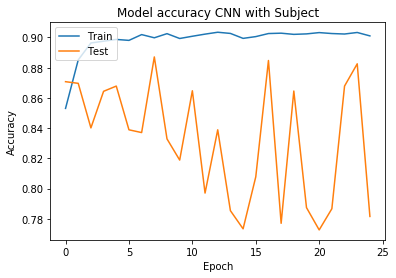

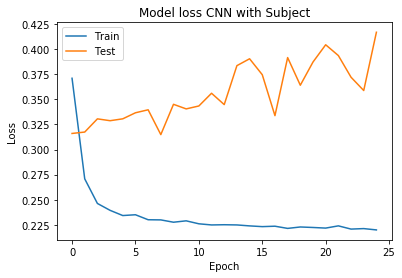

In [28]:
plt.plot(history_cnn_2.history['acc'])
plt.plot(history_cnn_2.history['val_acc'])
plt.title('Model accuracy CNN with Subject')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history_cnn_2.history['loss'])
plt.plot(history_cnn_2.history['val_loss'])
plt.title('Model loss CNN with Subject')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Long Short Term Memory

In [29]:
# load LSTM Neural Network
# we have seen that the accuracy is way worse using a bigger value for the maximum email length -> set max_length to 70 for the LSTM
#max_length = 70
%run LSTM.ipynb

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 70, 100)           1000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 22        
Total params: 1,081,432
Trainable params: 1,081,432
Non-trainable params: 0
_________________________________________________________________
None
Train on 12813 samples, validate on 5492 samples
Epoch 1/25


12813/12813 [==============================] - ETA: 19:42 - loss: 0.6959 - acc: 0.18 - ETA: 10:48 - loss: 0.6892 - acc: 0.51 - ETA: 7:39 - loss: 0.6825 - acc: 0.6250 - ETA: 6:03 - loss: 0.6755 - acc: 0.683 - ETA: 5:00 - loss: 0.6672 - acc: 0.725 - ETA: 4:41 - loss: 0.6647 - acc: 0.724 - ETA: 4:15 - loss: 0.6542 - acc: 0.750 - ETA: 4:00 - loss: 0.6473 - acc: 0.757 - ETA: 3:47 - loss: 0.6359 - acc: 0.772 - ETA: 3:30 - loss: 0.6269 - acc: 0.778 - ETA: 3:17 - loss: 0.6200 - acc: 0.778 - ETA: 3:06 - loss: 0.6060 - acc: 0.785 - ETA: 2:56 - loss: 0.5983 - acc: 0.786 - ETA: 2:48 - loss: 0.5917 - acc: 0.787 - ETA: 2:41 - loss: 0.5931 - acc: 0.786 - ETA: 2:34 - loss: 0.5833 - acc: 0.790 - ETA: 2:29 - loss: 0.5838 - acc: 0.787 - ETA: 2:24 - loss: 0.5807 - acc: 0.787 - ETA: 2:19 - loss: 0.5714 - acc: 0.791 - ETA: 2:15 - loss: 0.5663 - acc: 0.793 - ETA: 2:11 - loss: 0.5592 - acc: 0.797 - ETA: 2:07 - loss: 0.5544 - acc: 0.799 - ETA: 2:03 - loss: 0.5556 - acc: 0.796 - ETA: 1:59 - loss: 0.5512 - acc: 

12813/12813 [==============================] - ETA: 52s - loss: 0.4649 - acc: 0.82 - ETA: 49s - loss: 0.4542 - acc: 0.83 - ETA: 1:07 - loss: 0.4640 - acc: 0.828 - ETA: 1:03 - loss: 0.4796 - acc: 0.816 - ETA: 1:03 - loss: 0.4979 - acc: 0.803 - ETA: 1:02 - loss: 0.4991 - acc: 0.802 - ETA: 1:02 - loss: 0.4903 - acc: 0.808 - ETA: 1:02 - loss: 0.4781 - acc: 0.816 - ETA: 1:00 - loss: 0.4966 - acc: 0.803 - ETA: 1:01 - loss: 0.4952 - acc: 0.804 - ETA: 1:01 - loss: 0.4857 - acc: 0.811 - ETA: 1:01 - loss: 0.4679 - acc: 0.822 - ETA: 1:02 - loss: 0.4653 - acc: 0.824 - ETA: 1:03 - loss: 0.4721 - acc: 0.820 - ETA: 1:04 - loss: 0.4712 - acc: 0.820 - ETA: 1:06 - loss: 0.4803 - acc: 0.815 - ETA: 1:08 - loss: 0.4760 - acc: 0.818 - ETA: 1:09 - loss: 0.4637 - acc: 0.825 - ETA: 1:09 - loss: 0.4607 - acc: 0.827 - ETA: 1:10 - loss: 0.4567 - acc: 0.829 - ETA: 1:08 - loss: 0.4582 - acc: 0.828 - ETA: 1:07 - loss: 0.4546 - acc: 0.831 - ETA: 1:06 - loss: 0.4525 - acc: 0.832 - ETA: 1:05 - loss: 0.4517 - acc: 0.832

12813/12813 [==============================] - ETA: 42s - loss: 0.4617 - acc: 0.82 - ETA: 53s - loss: 0.4833 - acc: 0.81 - ETA: 1:02 - loss: 0.4757 - acc: 0.817 - ETA: 1:15 - loss: 0.4831 - acc: 0.812 - ETA: 1:15 - loss: 0.5103 - acc: 0.793 - ETA: 1:10 - loss: 0.5170 - acc: 0.789 - ETA: 1:07 - loss: 0.5153 - acc: 0.790 - ETA: 1:04 - loss: 0.4946 - acc: 0.804 - ETA: 1:18 - loss: 0.4982 - acc: 0.802 - ETA: 1:25 - loss: 0.4967 - acc: 0.803 - ETA: 1:25 - loss: 0.4974 - acc: 0.802 - ETA: 1:21 - loss: 0.4906 - acc: 0.807 - ETA: 1:19 - loss: 0.4865 - acc: 0.810 - ETA: 1:16 - loss: 0.4781 - acc: 0.815 - ETA: 1:14 - loss: 0.4784 - acc: 0.815 - ETA: 1:12 - loss: 0.4862 - acc: 0.810 - ETA: 1:10 - loss: 0.4902 - acc: 0.807 - ETA: 1:08 - loss: 0.4885 - acc: 0.809 - ETA: 1:07 - loss: 0.4920 - acc: 0.806 - ETA: 1:06 - loss: 0.4880 - acc: 0.809 - ETA: 1:05 - loss: 0.4866 - acc: 0.810 - ETA: 1:04 - loss: 0.4885 - acc: 0.808 - ETA: 1:03 - loss: 0.4893 - acc: 0.808 - ETA: 1:02 - loss: 0.4871 - acc: 0.809

12813/12813 [==============================] - ETA: 47s - loss: 0.3934 - acc: 0.87 - ETA: 45s - loss: 0.4380 - acc: 0.84 - ETA: 47s - loss: 0.4529 - acc: 0.83 - ETA: 46s - loss: 0.4892 - acc: 0.80 - ETA: 46s - loss: 0.4694 - acc: 0.82 - ETA: 46s - loss: 0.4832 - acc: 0.81 - ETA: 46s - loss: 0.4865 - acc: 0.81 - ETA: 46s - loss: 0.4831 - acc: 0.81 - ETA: 45s - loss: 0.4779 - acc: 0.81 - ETA: 45s - loss: 0.4737 - acc: 0.81 - ETA: 45s - loss: 0.4660 - acc: 0.82 - ETA: 45s - loss: 0.4634 - acc: 0.82 - ETA: 44s - loss: 0.4668 - acc: 0.82 - ETA: 44s - loss: 0.4732 - acc: 0.81 - ETA: 43s - loss: 0.4755 - acc: 0.81 - ETA: 43s - loss: 0.4744 - acc: 0.81 - ETA: 43s - loss: 0.4707 - acc: 0.82 - ETA: 42s - loss: 0.4660 - acc: 0.82 - ETA: 42s - loss: 0.4694 - acc: 0.82 - ETA: 42s - loss: 0.4689 - acc: 0.82 - ETA: 42s - loss: 0.4719 - acc: 0.81 - ETA: 44s - loss: 0.4791 - acc: 0.81 - ETA: 46s - loss: 0.4814 - acc: 0.81 - ETA: 48s - loss: 0.4814 - acc: 0.81 - ETA: 48s - loss: 0.4796 - acc: 0.81 - ETA

12813/12813 [==============================] - ETA: 47s - loss: 0.5883 - acc: 0.73 - ETA: 48s - loss: 0.5570 - acc: 0.75 - ETA: 48s - loss: 0.5465 - acc: 0.76 - ETA: 48s - loss: 0.5361 - acc: 0.77 - ETA: 48s - loss: 0.5340 - acc: 0.77 - ETA: 48s - loss: 0.5257 - acc: 0.78 - ETA: 48s - loss: 0.5227 - acc: 0.78 - ETA: 47s - loss: 0.5127 - acc: 0.79 - ETA: 48s - loss: 0.5141 - acc: 0.78 - ETA: 47s - loss: 0.5174 - acc: 0.78 - ETA: 47s - loss: 0.5201 - acc: 0.78 - ETA: 47s - loss: 0.5118 - acc: 0.79 - ETA: 46s - loss: 0.5112 - acc: 0.79 - ETA: 46s - loss: 0.5092 - acc: 0.79 - ETA: 46s - loss: 0.5061 - acc: 0.79 - ETA: 46s - loss: 0.5060 - acc: 0.79 - ETA: 45s - loss: 0.5034 - acc: 0.79 - ETA: 45s - loss: 0.5022 - acc: 0.79 - ETA: 45s - loss: 0.5035 - acc: 0.79 - ETA: 44s - loss: 0.5002 - acc: 0.80 - ETA: 44s - loss: 0.4983 - acc: 0.80 - ETA: 44s - loss: 0.5007 - acc: 0.79 - ETA: 43s - loss: 0.4969 - acc: 0.80 - ETA: 43s - loss: 0.4954 - acc: 0.80 - ETA: 43s - loss: 0.4949 - acc: 0.80 - ETA

12813/12813 [==============================] - ETA: 48s - loss: 0.3465 - acc: 0.90 - ETA: 49s - loss: 0.4259 - acc: 0.85 - ETA: 48s - loss: 0.4220 - acc: 0.85 - ETA: 49s - loss: 0.4429 - acc: 0.83 - ETA: 49s - loss: 0.4647 - acc: 0.82 - ETA: 48s - loss: 0.4561 - acc: 0.83 - ETA: 48s - loss: 0.4566 - acc: 0.83 - ETA: 48s - loss: 0.4598 - acc: 0.82 - ETA: 48s - loss: 0.4624 - acc: 0.82 - ETA: 48s - loss: 0.4550 - acc: 0.83 - ETA: 47s - loss: 0.4468 - acc: 0.83 - ETA: 47s - loss: 0.4498 - acc: 0.83 - ETA: 47s - loss: 0.4487 - acc: 0.83 - ETA: 47s - loss: 0.4406 - acc: 0.84 - ETA: 46s - loss: 0.4435 - acc: 0.83 - ETA: 46s - loss: 0.4493 - acc: 0.83 - ETA: 46s - loss: 0.4498 - acc: 0.83 - ETA: 46s - loss: 0.4489 - acc: 0.83 - ETA: 51s - loss: 0.4536 - acc: 0.83 - ETA: 52s - loss: 0.4461 - acc: 0.83 - ETA: 52s - loss: 0.4492 - acc: 0.83 - ETA: 51s - loss: 0.4485 - acc: 0.83 - ETA: 51s - loss: 0.4513 - acc: 0.83 - ETA: 50s - loss: 0.4505 - acc: 0.83 - ETA: 50s - loss: 0.4519 - acc: 0.83 - ETA

12813/12813 [==============================] - ETA: 48s - loss: 0.5877 - acc: 0.73 - ETA: 50s - loss: 0.5464 - acc: 0.76 - ETA: 50s - loss: 0.5394 - acc: 0.77 - ETA: 50s - loss: 0.5260 - acc: 0.78 - ETA: 49s - loss: 0.5141 - acc: 0.79 - ETA: 51s - loss: 0.5160 - acc: 0.78 - ETA: 50s - loss: 0.5118 - acc: 0.79 - ETA: 49s - loss: 0.4990 - acc: 0.80 - ETA: 49s - loss: 0.4997 - acc: 0.80 - ETA: 48s - loss: 0.4944 - acc: 0.80 - ETA: 48s - loss: 0.4936 - acc: 0.80 - ETA: 48s - loss: 0.4912 - acc: 0.80 - ETA: 48s - loss: 0.4891 - acc: 0.81 - ETA: 47s - loss: 0.4812 - acc: 0.81 - ETA: 47s - loss: 0.4785 - acc: 0.81 - ETA: 47s - loss: 0.4760 - acc: 0.81 - ETA: 46s - loss: 0.4804 - acc: 0.81 - ETA: 46s - loss: 0.4818 - acc: 0.81 - ETA: 46s - loss: 0.4769 - acc: 0.81 - ETA: 46s - loss: 0.4772 - acc: 0.81 - ETA: 45s - loss: 0.4786 - acc: 0.81 - ETA: 45s - loss: 0.4811 - acc: 0.81 - ETA: 45s - loss: 0.4834 - acc: 0.81 - ETA: 44s - loss: 0.4824 - acc: 0.81 - ETA: 44s - loss: 0.4814 - acc: 0.81 - ETA

12813/12813 [==============================] - ETA: 54s - loss: 0.4589 - acc: 0.82 - ETA: 53s - loss: 0.5218 - acc: 0.78 - ETA: 54s - loss: 0.5176 - acc: 0.79 - ETA: 53s - loss: 0.4967 - acc: 0.80 - ETA: 53s - loss: 0.4941 - acc: 0.80 - ETA: 52s - loss: 0.4964 - acc: 0.80 - ETA: 51s - loss: 0.4875 - acc: 0.81 - ETA: 51s - loss: 0.4900 - acc: 0.80 - ETA: 51s - loss: 0.4893 - acc: 0.80 - ETA: 51s - loss: 0.4862 - acc: 0.81 - ETA: 51s - loss: 0.4859 - acc: 0.81 - ETA: 50s - loss: 0.4778 - acc: 0.81 - ETA: 50s - loss: 0.4727 - acc: 0.81 - ETA: 49s - loss: 0.4802 - acc: 0.81 - ETA: 49s - loss: 0.4772 - acc: 0.81 - ETA: 49s - loss: 0.4776 - acc: 0.81 - ETA: 48s - loss: 0.4834 - acc: 0.81 - ETA: 48s - loss: 0.4769 - acc: 0.81 - ETA: 47s - loss: 0.4759 - acc: 0.81 - ETA: 47s - loss: 0.4751 - acc: 0.81 - ETA: 47s - loss: 0.4788 - acc: 0.81 - ETA: 47s - loss: 0.4790 - acc: 0.81 - ETA: 47s - loss: 0.4791 - acc: 0.81 - ETA: 46s - loss: 0.4793 - acc: 0.81 - ETA: 46s - loss: 0.4757 - acc: 0.81 - ETA

12813/12813 [==============================] - ETA: 53s - loss: 0.4222 - acc: 0.85 - ETA: 52s - loss: 0.4223 - acc: 0.85 - ETA: 52s - loss: 0.4567 - acc: 0.83 - ETA: 51s - loss: 0.4584 - acc: 0.83 - ETA: 59s - loss: 0.4719 - acc: 0.82 - ETA: 1:12 - loss: 0.4635 - acc: 0.828 - ETA: 1:18 - loss: 0.4724 - acc: 0.821 - ETA: 1:14 - loss: 0.4658 - acc: 0.826 - ETA: 1:11 - loss: 0.4536 - acc: 0.835 - ETA: 1:10 - loss: 0.4565 - acc: 0.832 - ETA: 1:07 - loss: 0.4509 - acc: 0.836 - ETA: 1:06 - loss: 0.4573 - acc: 0.832 - ETA: 1:04 - loss: 0.4557 - acc: 0.832 - ETA: 1:03 - loss: 0.4693 - acc: 0.823 - ETA: 1:01 - loss: 0.4795 - acc: 0.816 - ETA: 1:00 - loss: 0.4783 - acc: 0.817 - ETA: 59s - loss: 0.4799 - acc: 0.816 - ETA: 59s - loss: 0.4788 - acc: 0.81 - ETA: 58s - loss: 0.4777 - acc: 0.81 - ETA: 57s - loss: 0.4733 - acc: 0.82 - ETA: 56s - loss: 0.4715 - acc: 0.82 - ETA: 55s - loss: 0.4742 - acc: 0.81 - ETA: 55s - loss: 0.4725 - acc: 0.82 - ETA: 54s - loss: 0.4759 - acc: 0.81 - ETA: 54s - loss: 0

12813/12813 [==============================] - ETA: 51s - loss: 0.5916 - acc: 0.73 - ETA: 51s - loss: 0.5375 - acc: 0.77 - ETA: 1:09 - loss: 0.4847 - acc: 0.812 - ETA: 1:28 - loss: 0.4586 - acc: 0.832 - ETA: 1:31 - loss: 0.4554 - acc: 0.834 - ETA: 1:24 - loss: 0.4671 - acc: 0.825 - ETA: 1:19 - loss: 0.4725 - acc: 0.821 - ETA: 1:16 - loss: 0.4739 - acc: 0.820 - ETA: 1:13 - loss: 0.4704 - acc: 0.822 - ETA: 1:11 - loss: 0.4611 - acc: 0.829 - ETA: 1:09 - loss: 0.4593 - acc: 0.831 - ETA: 1:08 - loss: 0.4594 - acc: 0.830 - ETA: 1:06 - loss: 0.4562 - acc: 0.832 - ETA: 1:05 - loss: 0.4564 - acc: 0.832 - ETA: 1:04 - loss: 0.4567 - acc: 0.832 - ETA: 1:03 - loss: 0.4568 - acc: 0.832 - ETA: 1:02 - loss: 0.4681 - acc: 0.824 - ETA: 1:01 - loss: 0.4649 - acc: 0.826 - ETA: 1:00 - loss: 0.4709 - acc: 0.822 - ETA: 59s - loss: 0.4739 - acc: 0.820 - ETA: 58s - loss: 0.4743 - acc: 0.81 - ETA: 57s - loss: 0.4790 - acc: 0.81 - ETA: 57s - loss: 0.4741 - acc: 0.82 - ETA: 56s - loss: 0.4734 - acc: 0.82 - ETA: 5

12813/12813 [==============================] - ETA: 1:22 - loss: 0.4600 - acc: 0.828 - ETA: 1:49 - loss: 0.4487 - acc: 0.835 - ETA: 2:01 - loss: 0.4600 - acc: 0.828 - ETA: 1:45 - loss: 0.4713 - acc: 0.820 - ETA: 1:36 - loss: 0.4509 - acc: 0.834 - ETA: 1:29 - loss: 0.4638 - acc: 0.825 - ETA: 1:24 - loss: 0.4468 - acc: 0.837 - ETA: 1:20 - loss: 0.4455 - acc: 0.837 - ETA: 1:19 - loss: 0.4340 - acc: 0.845 - ETA: 1:16 - loss: 0.4389 - acc: 0.842 - ETA: 1:13 - loss: 0.4407 - acc: 0.840 - ETA: 1:12 - loss: 0.4463 - acc: 0.837 - ETA: 1:10 - loss: 0.4416 - acc: 0.840 - ETA: 1:08 - loss: 0.4446 - acc: 0.838 - ETA: 1:07 - loss: 0.4439 - acc: 0.838 - ETA: 1:06 - loss: 0.4432 - acc: 0.838 - ETA: 1:04 - loss: 0.4487 - acc: 0.835 - ETA: 1:03 - loss: 0.4635 - acc: 0.826 - ETA: 1:03 - loss: 0.4619 - acc: 0.827 - ETA: 1:02 - loss: 0.4580 - acc: 0.829 - ETA: 1:01 - loss: 0.4628 - acc: 0.826 - ETA: 1:00 - loss: 0.4672 - acc: 0.823 - ETA: 59s - loss: 0.4647 - acc: 0.825 - ETA: 58s - loss: 0.4655 - acc: 0.8

12813/12813 [==============================] - ETA: 57s - loss: 0.5730 - acc: 0.75 - ETA: 57s - loss: 0.5392 - acc: 0.77 - ETA: 57s - loss: 0.5050 - acc: 0.79 - ETA: 57s - loss: 0.4994 - acc: 0.80 - ETA: 57s - loss: 0.4960 - acc: 0.80 - ETA: 57s - loss: 0.5016 - acc: 0.79 - ETA: 58s - loss: 0.4922 - acc: 0.80 - ETA: 57s - loss: 0.4940 - acc: 0.80 - ETA: 57s - loss: 0.4875 - acc: 0.80 - ETA: 56s - loss: 0.4846 - acc: 0.81 - ETA: 56s - loss: 0.4975 - acc: 0.80 - ETA: 56s - loss: 0.4963 - acc: 0.80 - ETA: 56s - loss: 0.5025 - acc: 0.79 - ETA: 55s - loss: 0.4994 - acc: 0.80 - ETA: 55s - loss: 0.4936 - acc: 0.80 - ETA: 55s - loss: 0.4900 - acc: 0.80 - ETA: 54s - loss: 0.4923 - acc: 0.80 - ETA: 54s - loss: 0.4918 - acc: 0.80 - ETA: 54s - loss: 0.4937 - acc: 0.80 - ETA: 53s - loss: 0.4909 - acc: 0.80 - ETA: 53s - loss: 0.4916 - acc: 0.80 - ETA: 53s - loss: 0.4891 - acc: 0.80 - ETA: 52s - loss: 0.4878 - acc: 0.80 - ETA: 52s - loss: 0.4866 - acc: 0.80 - ETA: 52s - loss: 0.4856 - acc: 0.81 - ETA

12813/12813 [==============================] - ETA: 1:01 - loss: 0.3860 - acc: 0.890 - ETA: 1:01 - loss: 0.4456 - acc: 0.843 - ETA: 1:01 - loss: 0.4312 - acc: 0.854 - ETA: 1:01 - loss: 0.4392 - acc: 0.847 - ETA: 1:00 - loss: 0.4438 - acc: 0.843 - ETA: 1:00 - loss: 0.4612 - acc: 0.830 - ETA: 1:00 - loss: 0.4611 - acc: 0.830 - ETA: 59s - loss: 0.4722 - acc: 0.822 - ETA: 58s - loss: 0.4758 - acc: 0.81 - ETA: 58s - loss: 0.4788 - acc: 0.81 - ETA: 58s - loss: 0.4750 - acc: 0.81 - ETA: 57s - loss: 0.4794 - acc: 0.81 - ETA: 57s - loss: 0.4833 - acc: 0.81 - ETA: 56s - loss: 0.4832 - acc: 0.81 - ETA: 56s - loss: 0.4847 - acc: 0.81 - ETA: 56s - loss: 0.4890 - acc: 0.80 - ETA: 56s - loss: 0.4913 - acc: 0.80 - ETA: 55s - loss: 0.4908 - acc: 0.80 - ETA: 55s - loss: 0.4868 - acc: 0.81 - ETA: 55s - loss: 0.4865 - acc: 0.81 - ETA: 54s - loss: 0.4864 - acc: 0.81 - ETA: 54s - loss: 0.4851 - acc: 0.81 - ETA: 53s - loss: 0.4860 - acc: 0.81 - ETA: 53s - loss: 0.4888 - acc: 0.80 - ETA: 53s - loss: 0.4858 - 

12813/12813 [==============================] - ETA: 1:02 - loss: 0.5534 - acc: 0.765 - ETA: 59s - loss: 0.5882 - acc: 0.742 - ETA: 1:00 - loss: 0.5838 - acc: 0.744 - ETA: 1:04 - loss: 0.5415 - acc: 0.773 - ETA: 1:06 - loss: 0.5207 - acc: 0.787 - ETA: 1:05 - loss: 0.5069 - acc: 0.796 - ETA: 1:15 - loss: 0.5193 - acc: 0.787 - ETA: 1:12 - loss: 0.5120 - acc: 0.793 - ETA: 1:12 - loss: 0.5015 - acc: 0.800 - ETA: 1:15 - loss: 0.5084 - acc: 0.795 - ETA: 1:14 - loss: 0.5120 - acc: 0.792 - ETA: 1:13 - loss: 0.5078 - acc: 0.795 - ETA: 1:12 - loss: 0.5059 - acc: 0.796 - ETA: 1:11 - loss: 0.4997 - acc: 0.801 - ETA: 1:10 - loss: 0.5029 - acc: 0.799 - ETA: 1:09 - loss: 0.5043 - acc: 0.797 - ETA: 1:09 - loss: 0.5069 - acc: 0.796 - ETA: 1:08 - loss: 0.5020 - acc: 0.799 - ETA: 1:08 - loss: 0.5044 - acc: 0.797 - ETA: 1:10 - loss: 0.5087 - acc: 0.794 - ETA: 1:10 - loss: 0.5055 - acc: 0.796 - ETA: 1:09 - loss: 0.5026 - acc: 0.799 - ETA: 1:08 - loss: 0.5026 - acc: 0.798 - ETA: 1:07 - loss: 0.5010 - acc: 0.

12813/12813 [==============================] - ETA: 1:06 - loss: 0.4835 - acc: 0.812 - ETA: 1:08 - loss: 0.4833 - acc: 0.812 - ETA: 1:05 - loss: 0.4467 - acc: 0.838 - ETA: 1:03 - loss: 0.4836 - acc: 0.812 - ETA: 1:02 - loss: 0.4563 - acc: 0.831 - ETA: 1:02 - loss: 0.4454 - acc: 0.838 - ETA: 1:01 - loss: 0.4674 - acc: 0.823 - ETA: 1:01 - loss: 0.4663 - acc: 0.824 - ETA: 1:00 - loss: 0.4655 - acc: 0.824 - ETA: 1:00 - loss: 0.4625 - acc: 0.826 - ETA: 1:00 - loss: 0.4599 - acc: 0.828 - ETA: 59s - loss: 0.4701 - acc: 0.821 - ETA: 59s - loss: 0.4768 - acc: 0.81 - ETA: 59s - loss: 0.4702 - acc: 0.82 - ETA: 58s - loss: 0.4645 - acc: 0.82 - ETA: 58s - loss: 0.4642 - acc: 0.82 - ETA: 58s - loss: 0.4639 - acc: 0.82 - ETA: 57s - loss: 0.4692 - acc: 0.82 - ETA: 57s - loss: 0.4713 - acc: 0.82 - ETA: 57s - loss: 0.4719 - acc: 0.82 - ETA: 56s - loss: 0.4725 - acc: 0.81 - ETA: 56s - loss: 0.4719 - acc: 0.82 - ETA: 55s - loss: 0.4745 - acc: 0.81 - ETA: 55s - loss: 0.4728 - acc: 0.81 - ETA: 55s - loss: 0

12813/12813 [==============================] - ETA: 1:02 - loss: 0.3601 - acc: 0.890 - ETA: 1:02 - loss: 0.4467 - acc: 0.835 - ETA: 1:03 - loss: 0.4591 - acc: 0.828 - ETA: 1:03 - loss: 0.4653 - acc: 0.824 - ETA: 1:09 - loss: 0.4590 - acc: 0.828 - ETA: 1:20 - loss: 0.4839 - acc: 0.812 - ETA: 1:28 - loss: 0.4804 - acc: 0.814 - ETA: 1:25 - loss: 0.4869 - acc: 0.810 - ETA: 1:22 - loss: 0.4893 - acc: 0.809 - ETA: 1:20 - loss: 0.4887 - acc: 0.809 - ETA: 1:17 - loss: 0.4881 - acc: 0.809 - ETA: 1:16 - loss: 0.4817 - acc: 0.813 - ETA: 1:15 - loss: 0.4818 - acc: 0.813 - ETA: 1:13 - loss: 0.4869 - acc: 0.810 - ETA: 1:12 - loss: 0.4867 - acc: 0.810 - ETA: 1:11 - loss: 0.4864 - acc: 0.810 - ETA: 1:10 - loss: 0.4835 - acc: 0.812 - ETA: 1:09 - loss: 0.4924 - acc: 0.806 - ETA: 1:08 - loss: 0.4919 - acc: 0.806 - ETA: 1:07 - loss: 0.4869 - acc: 0.810 - ETA: 1:06 - loss: 0.4888 - acc: 0.808 - ETA: 1:05 - loss: 0.4855 - acc: 0.811 - ETA: 1:05 - loss: 0.4854 - acc: 0.811 - ETA: 1:04 - loss: 0.4862 - acc: 0

12813/12813 [==============================] - ETA: 1:02 - loss: 0.4337 - acc: 0.843 - ETA: 1:02 - loss: 0.4080 - acc: 0.859 - ETA: 1:03 - loss: 0.4251 - acc: 0.849 - ETA: 1:05 - loss: 0.4272 - acc: 0.847 - ETA: 1:04 - loss: 0.4284 - acc: 0.846 - ETA: 1:05 - loss: 0.4337 - acc: 0.843 - ETA: 1:05 - loss: 0.4221 - acc: 0.850 - ETA: 1:04 - loss: 0.4304 - acc: 0.845 - ETA: 1:04 - loss: 0.4338 - acc: 0.843 - ETA: 1:04 - loss: 0.4393 - acc: 0.840 - ETA: 1:03 - loss: 0.4388 - acc: 0.840 - ETA: 1:03 - loss: 0.4338 - acc: 0.843 - ETA: 1:02 - loss: 0.4422 - acc: 0.838 - ETA: 1:02 - loss: 0.4338 - acc: 0.843 - ETA: 1:01 - loss: 0.4356 - acc: 0.842 - ETA: 1:01 - loss: 0.4389 - acc: 0.840 - ETA: 1:00 - loss: 0.4370 - acc: 0.841 - ETA: 1:00 - loss: 0.4353 - acc: 0.842 - ETA: 59s - loss: 0.4395 - acc: 0.840 - ETA: 59s - loss: 0.4352 - acc: 0.84 - ETA: 1:03 - loss: 0.4338 - acc: 0.843 - ETA: 1:03 - loss: 0.4362 - acc: 0.842 - ETA: 1:07 - loss: 0.4361 - acc: 0.842 - ETA: 1:06 - loss: 0.4405 - acc: 0.83

12813/12813 [==============================] - ETA: 1:01 - loss: 0.4589 - acc: 0.828 - ETA: 1:05 - loss: 0.4464 - acc: 0.835 - ETA: 1:08 - loss: 0.4673 - acc: 0.822 - ETA: 1:08 - loss: 0.5093 - acc: 0.796 - ETA: 1:08 - loss: 0.4992 - acc: 0.803 - ETA: 1:08 - loss: 0.4966 - acc: 0.804 - ETA: 1:07 - loss: 0.5090 - acc: 0.796 - ETA: 1:06 - loss: 0.4904 - acc: 0.808 - ETA: 1:06 - loss: 0.4760 - acc: 0.817 - ETA: 1:05 - loss: 0.4890 - acc: 0.809 - ETA: 1:05 - loss: 0.4973 - acc: 0.804 - ETA: 1:05 - loss: 0.5062 - acc: 0.798 - ETA: 1:04 - loss: 0.5081 - acc: 0.796 - ETA: 1:03 - loss: 0.5046 - acc: 0.799 - ETA: 1:03 - loss: 0.5031 - acc: 0.800 - ETA: 1:03 - loss: 0.4975 - acc: 0.803 - ETA: 1:02 - loss: 0.4940 - acc: 0.806 - ETA: 1:02 - loss: 0.4946 - acc: 0.805 - ETA: 1:01 - loss: 0.4975 - acc: 0.803 - ETA: 1:01 - loss: 0.4968 - acc: 0.803 - ETA: 1:01 - loss: 0.4897 - acc: 0.808 - ETA: 1:00 - loss: 0.4904 - acc: 0.808 - ETA: 1:00 - loss: 0.4930 - acc: 0.806 - ETA: 59s - loss: 0.4954 - acc: 0.

12813/12813 [==============================] - ETA: 1:02 - loss: 0.4830 - acc: 0.812 - ETA: 1:07 - loss: 0.5046 - acc: 0.796 - ETA: 1:06 - loss: 0.5331 - acc: 0.776 - ETA: 1:07 - loss: 0.5577 - acc: 0.757 - ETA: 1:06 - loss: 0.5555 - acc: 0.759 - ETA: 1:07 - loss: 0.5505 - acc: 0.763 - ETA: 1:08 - loss: 0.5266 - acc: 0.781 - ETA: 1:08 - loss: 0.5340 - acc: 0.775 - ETA: 1:07 - loss: 0.5286 - acc: 0.779 - ETA: 1:07 - loss: 0.5223 - acc: 0.784 - ETA: 1:07 - loss: 0.5226 - acc: 0.784 - ETA: 1:06 - loss: 0.5146 - acc: 0.790 - ETA: 1:06 - loss: 0.5003 - acc: 0.801 - ETA: 1:05 - loss: 0.5021 - acc: 0.800 - ETA: 1:04 - loss: 0.4996 - acc: 0.802 - ETA: 1:04 - loss: 0.5025 - acc: 0.799 - ETA: 1:04 - loss: 0.4991 - acc: 0.802 - ETA: 1:03 - loss: 0.4915 - acc: 0.808 - ETA: 1:03 - loss: 0.4954 - acc: 0.805 - ETA: 1:02 - loss: 0.4896 - acc: 0.809 - ETA: 1:02 - loss: 0.4913 - acc: 0.808 - ETA: 1:01 - loss: 0.4920 - acc: 0.807 - ETA: 1:01 - loss: 0.4935 - acc: 0.806 - ETA: 1:01 - loss: 0.4967 - acc: 0

12813/12813 [==============================] - ETA: 1:00 - loss: 0.5284 - acc: 0.781 - ETA: 1:03 - loss: 0.5854 - acc: 0.742 - ETA: 1:05 - loss: 0.5512 - acc: 0.765 - ETA: 1:05 - loss: 0.5453 - acc: 0.769 - ETA: 1:05 - loss: 0.5283 - acc: 0.781 - ETA: 1:04 - loss: 0.5428 - acc: 0.770 - ETA: 1:05 - loss: 0.5217 - acc: 0.785 - ETA: 1:05 - loss: 0.5142 - acc: 0.791 - ETA: 1:06 - loss: 0.5059 - acc: 0.796 - ETA: 1:06 - loss: 0.4949 - acc: 0.804 - ETA: 1:05 - loss: 0.4859 - acc: 0.811 - ETA: 1:05 - loss: 0.4748 - acc: 0.819 - ETA: 1:04 - loss: 0.4737 - acc: 0.819 - ETA: 1:04 - loss: 0.4727 - acc: 0.820 - ETA: 1:03 - loss: 0.4749 - acc: 0.818 - ETA: 1:03 - loss: 0.4711 - acc: 0.821 - ETA: 1:02 - loss: 0.4664 - acc: 0.824 - ETA: 1:02 - loss: 0.4647 - acc: 0.825 - ETA: 1:02 - loss: 0.4645 - acc: 0.825 - ETA: 1:01 - loss: 0.4630 - acc: 0.826 - ETA: 1:01 - loss: 0.4628 - acc: 0.826 - ETA: 1:01 - loss: 0.4681 - acc: 0.823 - ETA: 1:00 - loss: 0.4709 - acc: 0.821 - ETA: 1:00 - loss: 0.4663 - acc: 0

12813/12813 [==============================] - ETA: 1:05 - loss: 0.5540 - acc: 0.765 - ETA: 1:06 - loss: 0.5420 - acc: 0.773 - ETA: 1:07 - loss: 0.4909 - acc: 0.807 - ETA: 1:08 - loss: 0.4654 - acc: 0.824 - ETA: 1:07 - loss: 0.4642 - acc: 0.825 - ETA: 1:06 - loss: 0.4672 - acc: 0.822 - ETA: 1:07 - loss: 0.4627 - acc: 0.825 - ETA: 1:06 - loss: 0.4711 - acc: 0.820 - ETA: 1:06 - loss: 0.4698 - acc: 0.821 - ETA: 1:06 - loss: 0.4758 - acc: 0.817 - ETA: 1:06 - loss: 0.4935 - acc: 0.805 - ETA: 1:05 - loss: 0.4906 - acc: 0.807 - ETA: 1:05 - loss: 0.4954 - acc: 0.804 - ETA: 1:05 - loss: 0.4912 - acc: 0.806 - ETA: 1:05 - loss: 0.4830 - acc: 0.812 - ETA: 1:05 - loss: 0.4772 - acc: 0.816 - ETA: 1:04 - loss: 0.4775 - acc: 0.816 - ETA: 1:04 - loss: 0.4791 - acc: 0.815 - ETA: 1:04 - loss: 0.4817 - acc: 0.813 - ETA: 1:03 - loss: 0.4840 - acc: 0.811 - ETA: 1:04 - loss: 0.4818 - acc: 0.813 - ETA: 1:03 - loss: 0.4818 - acc: 0.813 - ETA: 1:03 - loss: 0.4759 - acc: 0.817 - ETA: 1:03 - loss: 0.4733 - acc: 0

12813/12813 [==============================] - ETA: 2:35 - loss: 0.5734 - acc: 0.750 - ETA: 1:54 - loss: 0.5166 - acc: 0.789 - ETA: 1:41 - loss: 0.5052 - acc: 0.796 - ETA: 1:35 - loss: 0.5343 - acc: 0.777 - ETA: 1:31 - loss: 0.5332 - acc: 0.778 - ETA: 1:27 - loss: 0.5132 - acc: 0.791 - ETA: 1:26 - loss: 0.5022 - acc: 0.799 - ETA: 1:25 - loss: 0.5143 - acc: 0.791 - ETA: 1:24 - loss: 0.5108 - acc: 0.793 - ETA: 1:26 - loss: 0.5010 - acc: 0.800 - ETA: 1:24 - loss: 0.5120 - acc: 0.792 - ETA: 1:22 - loss: 0.5095 - acc: 0.794 - ETA: 1:24 - loss: 0.5057 - acc: 0.796 - ETA: 1:23 - loss: 0.5123 - acc: 0.792 - ETA: 1:22 - loss: 0.5149 - acc: 0.790 - ETA: 1:23 - loss: 0.5157 - acc: 0.790 - ETA: 1:21 - loss: 0.5177 - acc: 0.788 - ETA: 1:20 - loss: 0.5096 - acc: 0.794 - ETA: 1:20 - loss: 0.5093 - acc: 0.794 - ETA: 1:19 - loss: 0.5113 - acc: 0.793 - ETA: 1:17 - loss: 0.5089 - acc: 0.794 - ETA: 1:17 - loss: 0.5097 - acc: 0.794 - ETA: 1:16 - loss: 0.5086 - acc: 0.794 - ETA: 1:15 - loss: 0.5039 - acc: 0

12813/12813 [==============================] - ETA: 1:07 - loss: 0.4366 - acc: 0.843 - ETA: 1:10 - loss: 0.4481 - acc: 0.835 - ETA: 1:14 - loss: 0.4596 - acc: 0.828 - ETA: 1:13 - loss: 0.4769 - acc: 0.816 - ETA: 1:12 - loss: 0.4965 - acc: 0.803 - ETA: 1:11 - loss: 0.4942 - acc: 0.804 - ETA: 1:11 - loss: 0.4958 - acc: 0.803 - ETA: 1:11 - loss: 0.4798 - acc: 0.814 - ETA: 1:11 - loss: 0.4903 - acc: 0.807 - ETA: 1:10 - loss: 0.4941 - acc: 0.804 - ETA: 1:09 - loss: 0.4993 - acc: 0.801 - ETA: 1:09 - loss: 0.4941 - acc: 0.804 - ETA: 1:08 - loss: 0.4932 - acc: 0.805 - ETA: 1:08 - loss: 0.4844 - acc: 0.811 - ETA: 1:07 - loss: 0.4828 - acc: 0.812 - ETA: 1:07 - loss: 0.4842 - acc: 0.811 - ETA: 1:07 - loss: 0.4894 - acc: 0.807 - ETA: 1:06 - loss: 0.4890 - acc: 0.808 - ETA: 1:06 - loss: 0.4958 - acc: 0.803 - ETA: 1:06 - loss: 0.4918 - acc: 0.806 - ETA: 1:06 - loss: 0.4956 - acc: 0.803 - ETA: 1:05 - loss: 0.4971 - acc: 0.802 - ETA: 1:05 - loss: 0.4965 - acc: 0.803 - ETA: 1:08 - loss: 0.4950 - acc: 0

12813/12813 [==============================] - ETA: 1:07 - loss: 0.5075 - acc: 0.796 - ETA: 1:12 - loss: 0.5075 - acc: 0.796 - ETA: 1:11 - loss: 0.5156 - acc: 0.791 - ETA: 1:14 - loss: 0.5196 - acc: 0.789 - ETA: 1:14 - loss: 0.5123 - acc: 0.793 - ETA: 1:13 - loss: 0.5034 - acc: 0.799 - ETA: 1:12 - loss: 0.5176 - acc: 0.790 - ETA: 1:13 - loss: 0.5162 - acc: 0.791 - ETA: 1:12 - loss: 0.5046 - acc: 0.798 - ETA: 1:12 - loss: 0.5024 - acc: 0.800 - ETA: 1:11 - loss: 0.4985 - acc: 0.802 - ETA: 1:11 - loss: 0.5011 - acc: 0.800 - ETA: 1:10 - loss: 0.5050 - acc: 0.798 - ETA: 1:11 - loss: 0.5034 - acc: 0.799 - ETA: 1:15 - loss: 0.4974 - acc: 0.803 - ETA: 1:19 - loss: 0.4937 - acc: 0.805 - ETA: 1:18 - loss: 0.4890 - acc: 0.808 - ETA: 1:18 - loss: 0.4874 - acc: 0.809 - ETA: 1:17 - loss: 0.4919 - acc: 0.806 - ETA: 1:16 - loss: 0.4926 - acc: 0.806 - ETA: 1:17 - loss: 0.4921 - acc: 0.806 - ETA: 1:16 - loss: 0.4927 - acc: 0.806 - ETA: 1:16 - loss: 0.4982 - acc: 0.802 - ETA: 1:15 - loss: 0.4975 - acc: 0

12813/12813 [==============================] - ETA: 2:20 - loss: 0.4084 - acc: 0.859 - ETA: 1:44 - loss: 0.4846 - acc: 0.812 - ETA: 1:37 - loss: 0.5016 - acc: 0.802 - ETA: 1:31 - loss: 0.5037 - acc: 0.800 - ETA: 1:27 - loss: 0.4897 - acc: 0.809 - ETA: 1:25 - loss: 0.4888 - acc: 0.809 - ETA: 1:23 - loss: 0.4882 - acc: 0.810 - ETA: 1:22 - loss: 0.4814 - acc: 0.814 - ETA: 1:21 - loss: 0.4928 - acc: 0.807 - ETA: 1:19 - loss: 0.4944 - acc: 0.806 - ETA: 1:18 - loss: 0.4822 - acc: 0.813 - ETA: 1:17 - loss: 0.4761 - acc: 0.817 - ETA: 1:16 - loss: 0.4938 - acc: 0.806 - ETA: 1:15 - loss: 0.4982 - acc: 0.803 - ETA: 1:14 - loss: 0.4924 - acc: 0.807 - ETA: 1:14 - loss: 0.4903 - acc: 0.808 - ETA: 1:13 - loss: 0.4913 - acc: 0.807 - ETA: 1:12 - loss: 0.4855 - acc: 0.811 - ETA: 1:12 - loss: 0.4879 - acc: 0.810 - ETA: 1:11 - loss: 0.4876 - acc: 0.810 - ETA: 1:10 - loss: 0.4840 - acc: 0.812 - ETA: 1:10 - loss: 0.4840 - acc: 0.812 - ETA: 1:09 - loss: 0.4829 - acc: 0.813 - ETA: 1:08 - loss: 0.4800 - acc: 0

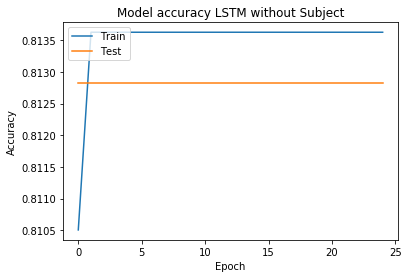

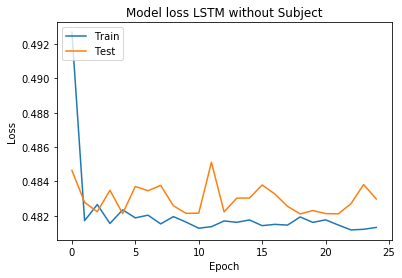

In [30]:
plt.plot(history_lstm_1.history['acc'])
plt.plot(history_lstm_1.history['val_acc'])
plt.title('Model accuracy LSTM without Subject')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history_lstm_1.history['loss'])
plt.plot(history_lstm_1.history['val_loss'])
plt.title('Model loss LSTM without Subject')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
# the accuracy doesn't change when incorporating the subject of the email -> use those for all following analyses
trainX_ws = np.vstack(trainX_ws)
#model = KerasClassifier(build_fn = create_lstm_model, batch_size=64, epochs = 1)
history_lstm_2 = model_lstm.fit(trainX_ws, y_train1, epochs=25, batch_size=64, validation_data=(testX_ws , y_test1), verbose=1)

Train on 12813 samples, validate on 5492 samples
Epoch 1/25
12813/12813 [==============================] - ETA: 1:19 - loss: 0.4408 - acc: 0.843 - ETA: 1:15 - loss: 0.4728 - acc: 0.820 - ETA: 1:14 - loss: 0.4691 - acc: 0.822 - ETA: 1:14 - loss: 0.5049 - acc: 0.796 - ETA: 1:13 - loss: 0.5048 - acc: 0.796 - ETA: 1:12 - loss: 0.5084 - acc: 0.794 - ETA: 1:13 - loss: 0.5079 - acc: 0.794 - ETA: 1:13 - loss: 0.5155 - acc: 0.789 - ETA: 1:12 - loss: 0.5119 - acc: 0.791 - ETA: 1:21 - loss: 0.4920 - acc: 0.806 - ETA: 1:25 - loss: 0.4951 - acc: 0.804 - ETA: 1:23 - loss: 0.4959 - acc: 0.803 - ETA: 1:22 - loss: 0.4916 - acc: 0.806 - ETA: 1:21 - loss: 0.4926 - acc: 0.805 - ETA: 1:20 - loss: 0.4847 - acc: 0.811 - ETA: 1:19 - loss: 0.4832 - acc: 0.812 - ETA: 1:18 - loss: 0.4793 - acc: 0.815 - ETA: 1:17 - loss: 0.4832 - acc: 0.812 - ETA: 1:16 - loss: 0.4797 - acc: 0.815 - ETA: 1:15 - loss: 0.4798 - acc: 0.814 - ETA: 1:14 - loss: 0.4799 - acc: 0.814 - ETA: 1:14 - loss: 0.4738 - acc: 0.818 - ETA: 1:13 - l

12813/12813 [==============================] - ETA: 1:32 - loss: 0.3335 - acc: 0.906 - ETA: 1:25 - loss: 0.3837 - acc: 0.875 - ETA: 1:20 - loss: 0.4171 - acc: 0.854 - ETA: 1:27 - loss: 0.4464 - acc: 0.835 - ETA: 1:25 - loss: 0.4739 - acc: 0.818 - ETA: 1:33 - loss: 0.4839 - acc: 0.812 - ETA: 1:32 - loss: 0.4874 - acc: 0.810 - ETA: 1:30 - loss: 0.4838 - acc: 0.812 - ETA: 1:27 - loss: 0.4946 - acc: 0.805 - ETA: 1:27 - loss: 0.4910 - acc: 0.807 - ETA: 1:25 - loss: 0.4903 - acc: 0.808 - ETA: 1:23 - loss: 0.4916 - acc: 0.807 - ETA: 1:22 - loss: 0.4891 - acc: 0.808 - ETA: 1:21 - loss: 0.4803 - acc: 0.814 - ETA: 1:20 - loss: 0.4789 - acc: 0.815 - ETA: 1:19 - loss: 0.4719 - acc: 0.820 - ETA: 1:18 - loss: 0.4725 - acc: 0.819 - ETA: 1:17 - loss: 0.4744 - acc: 0.818 - ETA: 1:16 - loss: 0.4760 - acc: 0.817 - ETA: 1:15 - loss: 0.4729 - acc: 0.819 - ETA: 1:15 - loss: 0.4711 - acc: 0.820 - ETA: 1:14 - loss: 0.4706 - acc: 0.821 - ETA: 1:13 - loss: 0.4721 - acc: 0.820 - ETA: 1:13 - loss: 0.4706 - acc: 0

12813/12813 [==============================] - ETA: 1:09 - loss: 0.4828 - acc: 0.812 - ETA: 1:11 - loss: 0.4590 - acc: 0.828 - ETA: 1:25 - loss: 0.5066 - acc: 0.796 - ETA: 1:54 - loss: 0.4829 - acc: 0.812 - ETA: 1:47 - loss: 0.4734 - acc: 0.818 - ETA: 1:41 - loss: 0.4907 - acc: 0.807 - ETA: 1:37 - loss: 0.4761 - acc: 0.817 - ETA: 1:33 - loss: 0.4681 - acc: 0.822 - ETA: 1:31 - loss: 0.4671 - acc: 0.822 - ETA: 1:29 - loss: 0.4616 - acc: 0.826 - ETA: 1:27 - loss: 0.4678 - acc: 0.822 - ETA: 1:25 - loss: 0.4710 - acc: 0.820 - ETA: 1:24 - loss: 0.4738 - acc: 0.818 - ETA: 1:23 - loss: 0.4693 - acc: 0.821 - ETA: 1:22 - loss: 0.4797 - acc: 0.814 - ETA: 1:21 - loss: 0.4813 - acc: 0.813 - ETA: 1:20 - loss: 0.4897 - acc: 0.807 - ETA: 1:19 - loss: 0.4841 - acc: 0.811 - ETA: 1:18 - loss: 0.4816 - acc: 0.813 - ETA: 1:17 - loss: 0.4770 - acc: 0.816 - ETA: 1:17 - loss: 0.4817 - acc: 0.813 - ETA: 1:16 - loss: 0.4807 - acc: 0.813 - ETA: 1:15 - loss: 0.4808 - acc: 0.813 - ETA: 1:14 - loss: 0.4847 - acc: 0

12813/12813 [==============================] - ETA: 1:12 - loss: 0.4827 - acc: 0.812 - ETA: 1:13 - loss: 0.5177 - acc: 0.789 - ETA: 1:14 - loss: 0.5215 - acc: 0.786 - ETA: 1:16 - loss: 0.5060 - acc: 0.796 - ETA: 1:16 - loss: 0.5105 - acc: 0.793 - ETA: 1:18 - loss: 0.5135 - acc: 0.791 - ETA: 1:18 - loss: 0.5026 - acc: 0.799 - ETA: 1:17 - loss: 0.4860 - acc: 0.810 - ETA: 1:17 - loss: 0.4906 - acc: 0.807 - ETA: 1:16 - loss: 0.4966 - acc: 0.803 - ETA: 1:15 - loss: 0.5014 - acc: 0.799 - ETA: 1:15 - loss: 0.4980 - acc: 0.802 - ETA: 1:16 - loss: 0.4900 - acc: 0.807 - ETA: 1:15 - loss: 0.4879 - acc: 0.809 - ETA: 1:15 - loss: 0.4845 - acc: 0.811 - ETA: 1:14 - loss: 0.4761 - acc: 0.817 - ETA: 1:13 - loss: 0.4791 - acc: 0.815 - ETA: 1:13 - loss: 0.4768 - acc: 0.816 - ETA: 1:12 - loss: 0.4735 - acc: 0.819 - ETA: 1:12 - loss: 0.4785 - acc: 0.815 - ETA: 1:11 - loss: 0.4787 - acc: 0.815 - ETA: 1:15 - loss: 0.4779 - acc: 0.816 - ETA: 1:17 - loss: 0.4741 - acc: 0.818 - ETA: 1:16 - loss: 0.4725 - acc: 0

12813/12813 [==============================] - ETA: 1:20 - loss: 0.4611 - acc: 0.828 - ETA: 1:18 - loss: 0.4721 - acc: 0.820 - ETA: 1:18 - loss: 0.4687 - acc: 0.822 - ETA: 1:18 - loss: 0.4777 - acc: 0.816 - ETA: 1:17 - loss: 0.4873 - acc: 0.809 - ETA: 1:18 - loss: 0.5112 - acc: 0.791 - ETA: 1:17 - loss: 0.5162 - acc: 0.787 - ETA: 1:17 - loss: 0.5071 - acc: 0.794 - ETA: 1:16 - loss: 0.5136 - acc: 0.789 - ETA: 1:15 - loss: 0.5270 - acc: 0.779 - ETA: 1:16 - loss: 0.5141 - acc: 0.789 - ETA: 1:15 - loss: 0.5083 - acc: 0.794 - ETA: 1:14 - loss: 0.5096 - acc: 0.793 - ETA: 1:14 - loss: 0.5122 - acc: 0.791 - ETA: 1:13 - loss: 0.5091 - acc: 0.793 - ETA: 1:13 - loss: 0.5052 - acc: 0.796 - ETA: 1:13 - loss: 0.5075 - acc: 0.795 - ETA: 1:12 - loss: 0.5052 - acc: 0.796 - ETA: 1:12 - loss: 0.5041 - acc: 0.797 - ETA: 1:11 - loss: 0.5032 - acc: 0.798 - ETA: 1:11 - loss: 0.5023 - acc: 0.799 - ETA: 1:10 - loss: 0.5052 - acc: 0.796 - ETA: 1:10 - loss: 0.5035 - acc: 0.798 - ETA: 1:09 - loss: 0.5018 - acc: 0

12813/12813 [==============================] - ETA: 1:10 - loss: 0.4607 - acc: 0.828 - ETA: 1:13 - loss: 0.4168 - acc: 0.859 - ETA: 1:13 - loss: 0.4388 - acc: 0.843 - ETA: 1:14 - loss: 0.4608 - acc: 0.828 - ETA: 1:15 - loss: 0.4388 - acc: 0.843 - ETA: 1:15 - loss: 0.4388 - acc: 0.843 - ETA: 1:17 - loss: 0.4514 - acc: 0.834 - ETA: 1:17 - loss: 0.4526 - acc: 0.834 - ETA: 1:17 - loss: 0.4534 - acc: 0.833 - ETA: 1:17 - loss: 0.4541 - acc: 0.832 - ETA: 1:16 - loss: 0.4526 - acc: 0.833 - ETA: 1:16 - loss: 0.4551 - acc: 0.832 - ETA: 1:18 - loss: 0.4625 - acc: 0.826 - ETA: 1:26 - loss: 0.4704 - acc: 0.821 - ETA: 1:25 - loss: 0.4743 - acc: 0.818 - ETA: 1:24 - loss: 0.4734 - acc: 0.819 - ETA: 1:23 - loss: 0.4739 - acc: 0.818 - ETA: 1:22 - loss: 0.4833 - acc: 0.812 - ETA: 1:21 - loss: 0.4832 - acc: 0.812 - ETA: 1:20 - loss: 0.4787 - acc: 0.815 - ETA: 1:20 - loss: 0.4746 - acc: 0.818 - ETA: 1:19 - loss: 0.4801 - acc: 0.814 - ETA: 1:18 - loss: 0.4802 - acc: 0.814 - ETA: 1:17 - loss: 0.4793 - acc: 0

12813/12813 [==============================] - ETA: 1:09 - loss: 0.5272 - acc: 0.781 - ETA: 1:17 - loss: 0.5050 - acc: 0.796 - ETA: 1:17 - loss: 0.5124 - acc: 0.791 - ETA: 1:19 - loss: 0.4938 - acc: 0.804 - ETA: 1:19 - loss: 0.4604 - acc: 0.828 - ETA: 1:18 - loss: 0.4529 - acc: 0.833 - ETA: 1:19 - loss: 0.4475 - acc: 0.837 - ETA: 1:19 - loss: 0.4519 - acc: 0.834 - ETA: 1:18 - loss: 0.4426 - acc: 0.840 - ETA: 1:17 - loss: 0.4581 - acc: 0.829 - ETA: 1:17 - loss: 0.4604 - acc: 0.828 - ETA: 1:17 - loss: 0.4564 - acc: 0.830 - ETA: 1:16 - loss: 0.4548 - acc: 0.831 - ETA: 1:16 - loss: 0.4602 - acc: 0.828 - ETA: 1:16 - loss: 0.4617 - acc: 0.827 - ETA: 1:15 - loss: 0.4630 - acc: 0.826 - ETA: 1:15 - loss: 0.4726 - acc: 0.819 - ETA: 1:15 - loss: 0.4692 - acc: 0.822 - ETA: 1:14 - loss: 0.4750 - acc: 0.818 - ETA: 1:14 - loss: 0.4742 - acc: 0.818 - ETA: 1:13 - loss: 0.4746 - acc: 0.818 - ETA: 1:18 - loss: 0.4782 - acc: 0.816 - ETA: 1:20 - loss: 0.4855 - acc: 0.811 - ETA: 1:19 - loss: 0.4806 - acc: 0

12813/12813 [==============================] - ETA: 1:20 - loss: 0.4151 - acc: 0.859 - ETA: 1:21 - loss: 0.4037 - acc: 0.867 - ETA: 1:21 - loss: 0.4300 - acc: 0.849 - ETA: 1:19 - loss: 0.4375 - acc: 0.843 - ETA: 1:21 - loss: 0.4511 - acc: 0.834 - ETA: 1:21 - loss: 0.4830 - acc: 0.812 - ETA: 1:21 - loss: 0.4699 - acc: 0.821 - ETA: 1:22 - loss: 0.4600 - acc: 0.828 - ETA: 1:21 - loss: 0.4523 - acc: 0.833 - ETA: 1:21 - loss: 0.4553 - acc: 0.831 - ETA: 1:20 - loss: 0.4557 - acc: 0.831 - ETA: 1:20 - loss: 0.4580 - acc: 0.829 - ETA: 1:20 - loss: 0.4526 - acc: 0.832 - ETA: 1:19 - loss: 0.4565 - acc: 0.830 - ETA: 1:19 - loss: 0.4614 - acc: 0.827 - ETA: 1:18 - loss: 0.4568 - acc: 0.830 - ETA: 1:17 - loss: 0.4569 - acc: 0.830 - ETA: 1:17 - loss: 0.4597 - acc: 0.828 - ETA: 1:17 - loss: 0.4521 - acc: 0.833 - ETA: 1:16 - loss: 0.4536 - acc: 0.832 - ETA: 1:16 - loss: 0.4492 - acc: 0.834 - ETA: 1:15 - loss: 0.4486 - acc: 0.835 - ETA: 1:15 - loss: 0.4479 - acc: 0.835 - ETA: 1:14 - loss: 0.4494 - acc: 0

12813/12813 [==============================] - ETA: 1:13 - loss: 0.5738 - acc: 0.750 - ETA: 1:17 - loss: 0.5853 - acc: 0.742 - ETA: 1:20 - loss: 0.5510 - acc: 0.765 - ETA: 1:21 - loss: 0.5453 - acc: 0.769 - ETA: 1:22 - loss: 0.5055 - acc: 0.796 - ETA: 1:22 - loss: 0.5017 - acc: 0.799 - ETA: 1:22 - loss: 0.5022 - acc: 0.799 - ETA: 1:21 - loss: 0.5055 - acc: 0.796 - ETA: 1:21 - loss: 0.5029 - acc: 0.798 - ETA: 1:21 - loss: 0.4963 - acc: 0.803 - ETA: 1:21 - loss: 0.4930 - acc: 0.805 - ETA: 1:21 - loss: 0.4826 - acc: 0.812 - ETA: 1:20 - loss: 0.4791 - acc: 0.814 - ETA: 1:20 - loss: 0.4728 - acc: 0.819 - ETA: 1:19 - loss: 0.4688 - acc: 0.821 - ETA: 1:19 - loss: 0.4609 - acc: 0.827 - ETA: 1:18 - loss: 0.4691 - acc: 0.821 - ETA: 1:18 - loss: 0.4804 - acc: 0.814 - ETA: 1:17 - loss: 0.4806 - acc: 0.814 - ETA: 1:17 - loss: 0.4866 - acc: 0.810 - ETA: 1:16 - loss: 0.4932 - acc: 0.805 - ETA: 1:16 - loss: 0.4948 - acc: 0.804 - ETA: 1:15 - loss: 0.4913 - acc: 0.807 - ETA: 1:15 - loss: 0.4919 - acc: 0

12813/12813 [==============================] - ETA: 1:36 - loss: 0.3869 - acc: 0.875 - ETA: 1:32 - loss: 0.4711 - acc: 0.820 - ETA: 1:35 - loss: 0.4751 - acc: 0.817 - ETA: 1:46 - loss: 0.4529 - acc: 0.832 - ETA: 1:42 - loss: 0.4735 - acc: 0.818 - ETA: 1:55 - loss: 0.4992 - acc: 0.802 - ETA: 1:51 - loss: 0.4763 - acc: 0.817 - ETA: 1:48 - loss: 0.4711 - acc: 0.820 - ETA: 1:45 - loss: 0.4778 - acc: 0.816 - ETA: 1:43 - loss: 0.4879 - acc: 0.809 - ETA: 1:41 - loss: 0.4918 - acc: 0.806 - ETA: 1:39 - loss: 0.4851 - acc: 0.811 - ETA: 1:37 - loss: 0.4904 - acc: 0.807 - ETA: 1:41 - loss: 0.4881 - acc: 0.809 - ETA: 1:44 - loss: 0.4815 - acc: 0.813 - ETA: 1:43 - loss: 0.4801 - acc: 0.814 - ETA: 1:41 - loss: 0.4844 - acc: 0.811 - ETA: 1:39 - loss: 0.4830 - acc: 0.812 - ETA: 1:37 - loss: 0.4781 - acc: 0.815 - ETA: 1:36 - loss: 0.4830 - acc: 0.812 - ETA: 1:34 - loss: 0.4818 - acc: 0.813 - ETA: 1:34 - loss: 0.4829 - acc: 0.812 - ETA: 1:32 - loss: 0.4859 - acc: 0.810 - ETA: 1:31 - loss: 0.4877 - acc: 0

12813/12813 [==============================] - ETA: 1:16 - loss: 0.4826 - acc: 0.812 - ETA: 1:30 - loss: 0.4252 - acc: 0.851 - ETA: 1:31 - loss: 0.4290 - acc: 0.849 - ETA: 1:31 - loss: 0.4424 - acc: 0.839 - ETA: 1:31 - loss: 0.4504 - acc: 0.834 - ETA: 1:29 - loss: 0.4674 - acc: 0.822 - ETA: 1:30 - loss: 0.4596 - acc: 0.828 - ETA: 1:45 - loss: 0.4596 - acc: 0.828 - ETA: 1:43 - loss: 0.4596 - acc: 0.828 - ETA: 1:41 - loss: 0.4735 - acc: 0.818 - ETA: 1:39 - loss: 0.4722 - acc: 0.819 - ETA: 1:38 - loss: 0.4809 - acc: 0.813 - ETA: 1:36 - loss: 0.4846 - acc: 0.811 - ETA: 1:35 - loss: 0.4745 - acc: 0.818 - ETA: 1:34 - loss: 0.4751 - acc: 0.817 - ETA: 1:33 - loss: 0.4741 - acc: 0.818 - ETA: 1:31 - loss: 0.4732 - acc: 0.818 - ETA: 1:30 - loss: 0.4776 - acc: 0.816 - ETA: 1:30 - loss: 0.4730 - acc: 0.819 - ETA: 1:29 - loss: 0.4769 - acc: 0.816 - ETA: 1:28 - loss: 0.4761 - acc: 0.817 - ETA: 1:27 - loss: 0.4754 - acc: 0.817 - ETA: 1:26 - loss: 0.4747 - acc: 0.817 - ETA: 1:25 - loss: 0.4789 - acc: 0

12813/12813 [==============================] - ETA: 1:17 - loss: 0.5302 - acc: 0.781 - ETA: 1:22 - loss: 0.4474 - acc: 0.835 - ETA: 1:23 - loss: 0.4828 - acc: 0.812 - ETA: 1:24 - loss: 0.4946 - acc: 0.804 - ETA: 1:24 - loss: 0.4734 - acc: 0.818 - ETA: 1:25 - loss: 0.4593 - acc: 0.828 - ETA: 1:26 - loss: 0.4828 - acc: 0.812 - ETA: 1:25 - loss: 0.4945 - acc: 0.804 - ETA: 1:26 - loss: 0.5061 - acc: 0.796 - ETA: 1:25 - loss: 0.5037 - acc: 0.798 - ETA: 1:25 - loss: 0.5101 - acc: 0.794 - ETA: 1:25 - loss: 0.5116 - acc: 0.793 - ETA: 1:24 - loss: 0.5094 - acc: 0.794 - ETA: 1:24 - loss: 0.5091 - acc: 0.794 - ETA: 1:23 - loss: 0.5162 - acc: 0.789 - ETA: 1:23 - loss: 0.5154 - acc: 0.790 - ETA: 1:22 - loss: 0.5135 - acc: 0.791 - ETA: 1:22 - loss: 0.5083 - acc: 0.795 - ETA: 1:21 - loss: 0.5013 - acc: 0.800 - ETA: 1:23 - loss: 0.4983 - acc: 0.802 - ETA: 1:24 - loss: 0.4996 - acc: 0.801 - ETA: 1:23 - loss: 0.4950 - acc: 0.804 - ETA: 1:23 - loss: 0.4907 - acc: 0.807 - ETA: 1:22 - loss: 0.4859 - acc: 0

12813/12813 [==============================] - ETA: 1:19 - loss: 0.4342 - acc: 0.843 - ETA: 1:24 - loss: 0.4961 - acc: 0.804 - ETA: 1:25 - loss: 0.5251 - acc: 0.786 - ETA: 1:28 - loss: 0.5085 - acc: 0.796 - ETA: 1:28 - loss: 0.4936 - acc: 0.806 - ETA: 1:29 - loss: 0.4837 - acc: 0.812 - ETA: 1:29 - loss: 0.4907 - acc: 0.808 - ETA: 1:29 - loss: 0.4991 - acc: 0.802 - ETA: 1:29 - loss: 0.4973 - acc: 0.803 - ETA: 1:29 - loss: 0.4910 - acc: 0.807 - ETA: 1:29 - loss: 0.4793 - acc: 0.815 - ETA: 1:29 - loss: 0.4877 - acc: 0.809 - ETA: 1:28 - loss: 0.4855 - acc: 0.811 - ETA: 1:28 - loss: 0.4836 - acc: 0.812 - ETA: 1:29 - loss: 0.4787 - acc: 0.815 - ETA: 1:31 - loss: 0.4775 - acc: 0.816 - ETA: 1:35 - loss: 0.4821 - acc: 0.813 - ETA: 1:36 - loss: 0.4781 - acc: 0.816 - ETA: 1:35 - loss: 0.4847 - acc: 0.811 - ETA: 1:34 - loss: 0.4810 - acc: 0.814 - ETA: 1:33 - loss: 0.4777 - acc: 0.816 - ETA: 1:32 - loss: 0.4779 - acc: 0.816 - ETA: 1:31 - loss: 0.4771 - acc: 0.816 - ETA: 1:31 - loss: 0.4803 - acc: 0

12813/12813 [==============================] - ETA: 1:25 - loss: 0.3897 - acc: 0.875 - ETA: 1:29 - loss: 0.4362 - acc: 0.843 - ETA: 1:29 - loss: 0.4516 - acc: 0.833 - ETA: 1:29 - loss: 0.4943 - acc: 0.804 - ETA: 1:29 - loss: 0.4966 - acc: 0.803 - ETA: 1:28 - loss: 0.4866 - acc: 0.809 - ETA: 1:32 - loss: 0.4761 - acc: 0.817 - ETA: 1:32 - loss: 0.4798 - acc: 0.814 - ETA: 1:30 - loss: 0.4878 - acc: 0.809 - ETA: 1:30 - loss: 0.4850 - acc: 0.810 - ETA: 1:29 - loss: 0.4743 - acc: 0.818 - ETA: 1:29 - loss: 0.4712 - acc: 0.820 - ETA: 1:29 - loss: 0.4649 - acc: 0.824 - ETA: 1:28 - loss: 0.4645 - acc: 0.824 - ETA: 1:27 - loss: 0.4689 - acc: 0.821 - ETA: 1:27 - loss: 0.4683 - acc: 0.822 - ETA: 1:26 - loss: 0.4691 - acc: 0.821 - ETA: 1:26 - loss: 0.4686 - acc: 0.822 - ETA: 1:25 - loss: 0.4693 - acc: 0.821 - ETA: 1:25 - loss: 0.4676 - acc: 0.822 - ETA: 1:24 - loss: 0.4683 - acc: 0.822 - ETA: 1:24 - loss: 0.4690 - acc: 0.821 - ETA: 1:23 - loss: 0.4696 - acc: 0.821 - ETA: 1:23 - loss: 0.4751 - acc: 0

12813/12813 [==============================] - ETA: 1:17 - loss: 0.4591 - acc: 0.828 - ETA: 1:23 - loss: 0.4947 - acc: 0.804 - ETA: 1:25 - loss: 0.4590 - acc: 0.828 - ETA: 1:29 - loss: 0.4471 - acc: 0.835 - ETA: 1:29 - loss: 0.4495 - acc: 0.834 - ETA: 1:29 - loss: 0.4350 - acc: 0.843 - ETA: 1:30 - loss: 0.4591 - acc: 0.828 - ETA: 1:36 - loss: 0.4773 - acc: 0.816 - ETA: 1:47 - loss: 0.4806 - acc: 0.814 - ETA: 1:46 - loss: 0.4832 - acc: 0.812 - ETA: 1:44 - loss: 0.4810 - acc: 0.813 - ETA: 1:43 - loss: 0.4752 - acc: 0.817 - ETA: 1:41 - loss: 0.4721 - acc: 0.819 - ETA: 1:40 - loss: 0.4729 - acc: 0.819 - ETA: 1:39 - loss: 0.4767 - acc: 0.816 - ETA: 1:38 - loss: 0.4816 - acc: 0.813 - ETA: 1:37 - loss: 0.4887 - acc: 0.808 - ETA: 1:36 - loss: 0.4936 - acc: 0.805 - ETA: 1:34 - loss: 0.4967 - acc: 0.803 - ETA: 1:33 - loss: 0.4949 - acc: 0.804 - ETA: 1:33 - loss: 0.4910 - acc: 0.807 - ETA: 1:32 - loss: 0.4906 - acc: 0.807 - ETA: 1:31 - loss: 0.4962 - acc: 0.803 - ETA: 1:30 - loss: 0.4975 - acc: 0

12813/12813 [==============================] - ETA: 1:24 - loss: 0.5519 - acc: 0.765 - ETA: 1:29 - loss: 0.4827 - acc: 0.812 - ETA: 1:32 - loss: 0.4827 - acc: 0.812 - ETA: 1:35 - loss: 0.4826 - acc: 0.812 - ETA: 1:34 - loss: 0.4780 - acc: 0.815 - ETA: 1:34 - loss: 0.4826 - acc: 0.812 - ETA: 1:35 - loss: 0.4761 - acc: 0.817 - ETA: 1:35 - loss: 0.4740 - acc: 0.818 - ETA: 1:34 - loss: 0.4750 - acc: 0.817 - ETA: 1:34 - loss: 0.4849 - acc: 0.810 - ETA: 1:33 - loss: 0.4701 - acc: 0.821 - ETA: 1:35 - loss: 0.4788 - acc: 0.815 - ETA: 1:41 - loss: 0.4826 - acc: 0.812 - ETA: 1:42 - loss: 0.4777 - acc: 0.815 - ETA: 1:41 - loss: 0.4719 - acc: 0.819 - ETA: 1:40 - loss: 0.4755 - acc: 0.817 - ETA: 1:38 - loss: 0.4813 - acc: 0.813 - ETA: 1:37 - loss: 0.4878 - acc: 0.809 - ETA: 1:36 - loss: 0.4875 - acc: 0.809 - ETA: 1:35 - loss: 0.4895 - acc: 0.807 - ETA: 1:35 - loss: 0.4870 - acc: 0.809 - ETA: 1:34 - loss: 0.4879 - acc: 0.808 - ETA: 1:33 - loss: 0.4906 - acc: 0.807 - ETA: 1:32 - loss: 0.4903 - acc: 0

12813/12813 [==============================] - ETA: 1:25 - loss: 0.5272 - acc: 0.781 - ETA: 1:29 - loss: 0.5606 - acc: 0.757 - ETA: 1:31 - loss: 0.5421 - acc: 0.770 - ETA: 1:31 - loss: 0.5328 - acc: 0.777 - ETA: 1:33 - loss: 0.5272 - acc: 0.781 - ETA: 1:32 - loss: 0.5346 - acc: 0.776 - ETA: 1:31 - loss: 0.5145 - acc: 0.790 - ETA: 1:32 - loss: 0.5299 - acc: 0.779 - ETA: 1:32 - loss: 0.5296 - acc: 0.779 - ETA: 1:32 - loss: 0.5469 - acc: 0.767 - ETA: 1:32 - loss: 0.5431 - acc: 0.769 - ETA: 1:32 - loss: 0.5453 - acc: 0.768 - ETA: 1:32 - loss: 0.5438 - acc: 0.769 - ETA: 1:31 - loss: 0.5395 - acc: 0.772 - ETA: 1:31 - loss: 0.5358 - acc: 0.775 - ETA: 1:31 - loss: 0.5299 - acc: 0.779 - ETA: 1:30 - loss: 0.5210 - acc: 0.785 - ETA: 1:29 - loss: 0.5166 - acc: 0.789 - ETA: 1:34 - loss: 0.5105 - acc: 0.793 - ETA: 1:36 - loss: 0.5070 - acc: 0.796 - ETA: 1:35 - loss: 0.5079 - acc: 0.795 - ETA: 1:34 - loss: 0.5039 - acc: 0.798 - ETA: 1:33 - loss: 0.5095 - acc: 0.794 - ETA: 1:33 - loss: 0.5075 - acc: 0

12813/12813 [==============================] - ETA: 1:29 - loss: 0.5921 - acc: 0.734 - ETA: 1:33 - loss: 0.5051 - acc: 0.796 - ETA: 1:34 - loss: 0.5050 - acc: 0.796 - ETA: 1:36 - loss: 0.5049 - acc: 0.796 - ETA: 1:36 - loss: 0.4878 - acc: 0.809 - ETA: 1:36 - loss: 0.4728 - acc: 0.820 - ETA: 1:36 - loss: 0.4835 - acc: 0.812 - ETA: 1:36 - loss: 0.4888 - acc: 0.808 - ETA: 1:36 - loss: 0.4834 - acc: 0.812 - ETA: 1:35 - loss: 0.4856 - acc: 0.810 - ETA: 1:34 - loss: 0.4892 - acc: 0.808 - ETA: 1:35 - loss: 0.4888 - acc: 0.808 - ETA: 1:34 - loss: 0.4850 - acc: 0.811 - ETA: 1:33 - loss: 0.4818 - acc: 0.813 - ETA: 1:33 - loss: 0.4776 - acc: 0.816 - ETA: 1:32 - loss: 0.4834 - acc: 0.812 - ETA: 1:32 - loss: 0.4795 - acc: 0.815 - ETA: 1:32 - loss: 0.4809 - acc: 0.814 - ETA: 1:31 - loss: 0.4891 - acc: 0.808 - ETA: 1:31 - loss: 0.4888 - acc: 0.808 - ETA: 1:38 - loss: 0.4864 - acc: 0.810 - ETA: 1:37 - loss: 0.4912 - acc: 0.806 - ETA: 1:36 - loss: 0.4918 - acc: 0.806 - ETA: 1:36 - loss: 0.4878 - acc: 0

12813/12813 [==============================] - ETA: 1:24 - loss: 0.3939 - acc: 0.875 - ETA: 1:31 - loss: 0.4494 - acc: 0.835 - ETA: 1:35 - loss: 0.4458 - acc: 0.838 - ETA: 1:37 - loss: 0.4716 - acc: 0.820 - ETA: 1:38 - loss: 0.4915 - acc: 0.806 - ETA: 1:38 - loss: 0.4864 - acc: 0.809 - ETA: 1:38 - loss: 0.4922 - acc: 0.805 - ETA: 1:38 - loss: 0.4773 - acc: 0.816 - ETA: 1:37 - loss: 0.4852 - acc: 0.810 - ETA: 1:36 - loss: 0.4740 - acc: 0.818 - ETA: 1:36 - loss: 0.4788 - acc: 0.815 - ETA: 1:35 - loss: 0.4700 - acc: 0.821 - ETA: 1:35 - loss: 0.4710 - acc: 0.820 - ETA: 1:34 - loss: 0.4813 - acc: 0.813 - ETA: 1:34 - loss: 0.4873 - acc: 0.809 - ETA: 1:34 - loss: 0.4940 - acc: 0.804 - ETA: 1:33 - loss: 0.4920 - acc: 0.806 - ETA: 1:36 - loss: 0.4866 - acc: 0.809 - ETA: 1:41 - loss: 0.4887 - acc: 0.808 - ETA: 1:40 - loss: 0.4851 - acc: 0.810 - ETA: 1:39 - loss: 0.4840 - acc: 0.811 - ETA: 1:38 - loss: 0.4919 - acc: 0.806 - ETA: 1:37 - loss: 0.4954 - acc: 0.803 - ETA: 1:36 - loss: 0.4976 - acc: 0

12813/12813 [==============================] - ETA: 1:34 - loss: 0.4367 - acc: 0.843 - ETA: 1:35 - loss: 0.4596 - acc: 0.828 - ETA: 1:38 - loss: 0.4978 - acc: 0.802 - ETA: 1:38 - loss: 0.5340 - acc: 0.777 - ETA: 1:38 - loss: 0.4919 - acc: 0.806 - ETA: 1:39 - loss: 0.5017 - acc: 0.799 - ETA: 1:38 - loss: 0.4828 - acc: 0.812 - ETA: 1:38 - loss: 0.4800 - acc: 0.814 - ETA: 1:38 - loss: 0.4702 - acc: 0.821 - ETA: 1:38 - loss: 0.4647 - acc: 0.825 - ETA: 1:37 - loss: 0.4601 - acc: 0.828 - ETA: 1:37 - loss: 0.4601 - acc: 0.828 - ETA: 1:42 - loss: 0.4618 - acc: 0.826 - ETA: 1:45 - loss: 0.4715 - acc: 0.820 - ETA: 1:44 - loss: 0.4753 - acc: 0.817 - ETA: 1:43 - loss: 0.4758 - acc: 0.817 - ETA: 1:42 - loss: 0.4707 - acc: 0.820 - ETA: 1:42 - loss: 0.4727 - acc: 0.819 - ETA: 1:41 - loss: 0.4757 - acc: 0.817 - ETA: 1:40 - loss: 0.4853 - acc: 0.810 - ETA: 1:39 - loss: 0.4862 - acc: 0.810 - ETA: 1:38 - loss: 0.4861 - acc: 0.810 - ETA: 1:37 - loss: 0.4859 - acc: 0.810 - ETA: 1:37 - loss: 0.4896 - acc: 0

12813/12813 [==============================] - ETA: 2:14 - loss: 0.5285 - acc: 0.781 - ETA: 2:10 - loss: 0.5515 - acc: 0.765 - ETA: 2:27 - loss: 0.5821 - acc: 0.744 - ETA: 2:16 - loss: 0.5858 - acc: 0.742 - ETA: 2:29 - loss: 0.5652 - acc: 0.756 - ETA: 2:28 - loss: 0.5552 - acc: 0.763 - ETA: 2:22 - loss: 0.5448 - acc: 0.770 - ETA: 2:16 - loss: 0.5315 - acc: 0.779 - ETA: 2:12 - loss: 0.5459 - acc: 0.769 - ETA: 2:08 - loss: 0.5351 - acc: 0.776 - ETA: 2:05 - loss: 0.5364 - acc: 0.775 - ETA: 2:02 - loss: 0.5374 - acc: 0.774 - ETA: 1:59 - loss: 0.5332 - acc: 0.777 - ETA: 1:57 - loss: 0.5343 - acc: 0.776 - ETA: 1:55 - loss: 0.5395 - acc: 0.772 - ETA: 1:54 - loss: 0.5293 - acc: 0.780 - ETA: 1:52 - loss: 0.5178 - acc: 0.788 - ETA: 1:50 - loss: 0.5183 - acc: 0.788 - ETA: 1:49 - loss: 0.5131 - acc: 0.791 - ETA: 1:47 - loss: 0.5126 - acc: 0.792 - ETA: 1:47 - loss: 0.5061 - acc: 0.796 - ETA: 1:45 - loss: 0.5031 - acc: 0.799 - ETA: 1:44 - loss: 0.5004 - acc: 0.801 - ETA: 1:43 - loss: 0.4997 - acc: 0

12813/12813 [==============================] - ETA: 1:33 - loss: 0.4364 - acc: 0.843 - ETA: 1:37 - loss: 0.4595 - acc: 0.828 - ETA: 1:39 - loss: 0.4983 - acc: 0.802 - ETA: 1:40 - loss: 0.4885 - acc: 0.808 - ETA: 1:40 - loss: 0.5061 - acc: 0.796 - ETA: 1:47 - loss: 0.5022 - acc: 0.799 - ETA: 1:46 - loss: 0.4927 - acc: 0.805 - ETA: 1:46 - loss: 0.5002 - acc: 0.800 - ETA: 1:46 - loss: 0.4905 - acc: 0.807 - ETA: 1:47 - loss: 0.4874 - acc: 0.809 - ETA: 1:47 - loss: 0.4827 - acc: 0.812 - ETA: 1:46 - loss: 0.4807 - acc: 0.813 - ETA: 1:45 - loss: 0.4755 - acc: 0.817 - ETA: 1:44 - loss: 0.4844 - acc: 0.811 - ETA: 1:43 - loss: 0.4796 - acc: 0.814 - ETA: 1:42 - loss: 0.4856 - acc: 0.810 - ETA: 1:41 - loss: 0.4910 - acc: 0.807 - ETA: 1:45 - loss: 0.4892 - acc: 0.808 - ETA: 1:46 - loss: 0.4877 - acc: 0.809 - ETA: 1:45 - loss: 0.4839 - acc: 0.811 - ETA: 1:44 - loss: 0.4827 - acc: 0.812 - ETA: 1:43 - loss: 0.4849 - acc: 0.811 - ETA: 1:42 - loss: 0.4827 - acc: 0.812 - ETA: 1:41 - loss: 0.4808 - acc: 0

12813/12813 [==============================] - ETA: 1:29 - loss: 0.4591 - acc: 0.828 - ETA: 1:32 - loss: 0.4709 - acc: 0.820 - ETA: 1:35 - loss: 0.4905 - acc: 0.807 - ETA: 1:41 - loss: 0.4768 - acc: 0.816 - ETA: 1:42 - loss: 0.4920 - acc: 0.806 - ETA: 1:42 - loss: 0.5099 - acc: 0.794 - ETA: 1:51 - loss: 0.5193 - acc: 0.787 - ETA: 1:55 - loss: 0.5032 - acc: 0.798 - ETA: 1:53 - loss: 0.5213 - acc: 0.786 - ETA: 1:53 - loss: 0.5106 - acc: 0.793 - ETA: 1:51 - loss: 0.5101 - acc: 0.794 - ETA: 1:50 - loss: 0.5022 - acc: 0.799 - ETA: 1:49 - loss: 0.4920 - acc: 0.806 - ETA: 1:48 - loss: 0.4914 - acc: 0.806 - ETA: 1:47 - loss: 0.4803 - acc: 0.814 - ETA: 1:46 - loss: 0.4804 - acc: 0.814 - ETA: 1:45 - loss: 0.4806 - acc: 0.814 - ETA: 1:44 - loss: 0.4807 - acc: 0.814 - ETA: 1:43 - loss: 0.4856 - acc: 0.810 - ETA: 1:42 - loss: 0.4843 - acc: 0.811 - ETA: 1:41 - loss: 0.4788 - acc: 0.815 - ETA: 1:41 - loss: 0.4789 - acc: 0.815 - ETA: 1:40 - loss: 0.4781 - acc: 0.815 - ETA: 1:39 - loss: 0.4773 - acc: 0

12813/12813 [==============================] - ETA: 1:36 - loss: 0.3886 - acc: 0.875 - ETA: 1:41 - loss: 0.4239 - acc: 0.851 - ETA: 1:43 - loss: 0.4435 - acc: 0.838 - ETA: 1:43 - loss: 0.4300 - acc: 0.847 - ETA: 1:44 - loss: 0.4313 - acc: 0.846 - ETA: 1:44 - loss: 0.4437 - acc: 0.838 - ETA: 1:45 - loss: 0.4526 - acc: 0.832 - ETA: 1:44 - loss: 0.4390 - acc: 0.841 - ETA: 1:44 - loss: 0.4412 - acc: 0.840 - ETA: 1:43 - loss: 0.4500 - acc: 0.834 - ETA: 1:43 - loss: 0.4530 - acc: 0.832 - ETA: 1:43 - loss: 0.4555 - acc: 0.830 - ETA: 1:42 - loss: 0.4540 - acc: 0.831 - ETA: 1:42 - loss: 0.4560 - acc: 0.830 - ETA: 1:41 - loss: 0.4531 - acc: 0.832 - ETA: 1:40 - loss: 0.4579 - acc: 0.829 - ETA: 1:42 - loss: 0.4539 - acc: 0.831 - ETA: 1:46 - loss: 0.4503 - acc: 0.834 - ETA: 1:45 - loss: 0.4520 - acc: 0.833 - ETA: 1:44 - loss: 0.4547 - acc: 0.831 - ETA: 1:44 - loss: 0.4616 - acc: 0.826 - ETA: 1:43 - loss: 0.4647 - acc: 0.824 - ETA: 1:42 - loss: 0.4666 - acc: 0.823 - ETA: 1:41 - loss: 0.4653 - acc: 0

12813/12813 [==============================] - ETA: 1:58 - loss: 0.3924 - acc: 0.875 - ETA: 2:38 - loss: 0.4150 - acc: 0.859 - ETA: 2:36 - loss: 0.4224 - acc: 0.854 - ETA: 2:28 - loss: 0.4375 - acc: 0.843 - ETA: 2:18 - loss: 0.4420 - acc: 0.840 - ETA: 2:13 - loss: 0.4411 - acc: 0.841 - ETA: 2:09 - loss: 0.4471 - acc: 0.837 - ETA: 2:06 - loss: 0.4544 - acc: 0.832 - ETA: 2:03 - loss: 0.4422 - acc: 0.840 - ETA: 2:01 - loss: 0.4485 - acc: 0.835 - ETA: 1:59 - loss: 0.4537 - acc: 0.832 - ETA: 1:57 - loss: 0.4581 - acc: 0.829 - ETA: 1:56 - loss: 0.4653 - acc: 0.824 - ETA: 1:54 - loss: 0.4682 - acc: 0.822 - ETA: 1:53 - loss: 0.4723 - acc: 0.819 - ETA: 1:51 - loss: 0.4686 - acc: 0.822 - ETA: 1:50 - loss: 0.4667 - acc: 0.823 - ETA: 1:49 - loss: 0.4637 - acc: 0.825 - ETA: 1:48 - loss: 0.4671 - acc: 0.823 - ETA: 1:47 - loss: 0.4644 - acc: 0.825 - ETA: 1:46 - loss: 0.4597 - acc: 0.828 - ETA: 1:45 - loss: 0.4586 - acc: 0.828 - ETA: 1:44 - loss: 0.4586 - acc: 0.828 - ETA: 1:43 - loss: 0.4567 - acc: 0

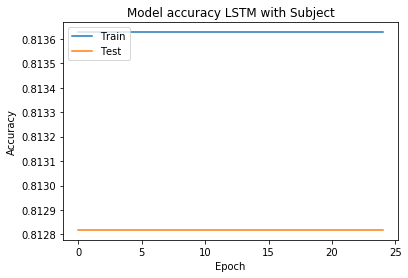

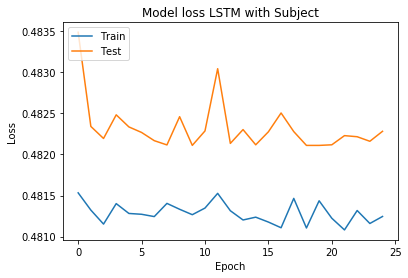

In [32]:
plt.plot(history_lstm_2.history['acc'])
plt.plot(history_lstm_2.history['val_acc'])
plt.title('Model accuracy LSTM with Subject')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history_lstm_2.history['loss'])
plt.plot(history_lstm_2.history['val_loss'])
plt.title('Model loss LSTM with Subject')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

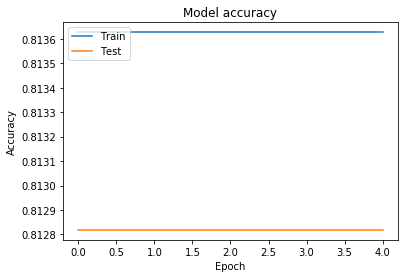

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

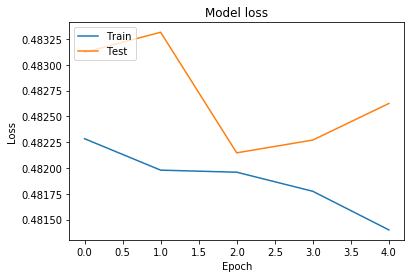

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Example Email:

In [10]:
print(y_test[101])
print(X_test[101])

1
LinkedIn Learn how social selling empowers a salesperson to transition from hard selling to smart selling. The Art of Social Selling with Sales Navigator Transition from hard selling to smart selling Download eBook David, Social selling transforms the way selling has been traditionally approached. Just like Facebook brought the real-world social experience to digital, social selling brings the sales function to the digital world. It makes the evolution of the sales role to align it with changing times.LinkedIn acts as a catalyst in this evolution by introducing a tool that is not only an extension of its most widely used, global professional network, but also a platform where sharing content and developing thought leadership is extensively endowed. This unique combination makes Sales Navigator a powerhouse on social selling and empowers a salesperson with all the requisite capabilities to make the transition from "hard selling" to "smart selling." In this eBook, you'll learn: The com

In [14]:
idx = 101
test_email = X_test[idx]

Prediction CNN:

In [15]:
pred_cnn = class_names[int(round(predict_cnn([test_email])[0,1]))]
alternative_cnn =  class_names[1 - int(round(predict_cnn([test_email])[0,1]))]
print('Probability(Phishing) in the CNN =', predict_cnn([test_email])[0,1])
print('Prediction CNN: %s' % pred_cnn)
print('True class: %s' % class_names[y_test[idx]])

Probability(Phishing) in the CNN = 0.616482
Prediction CNN: Phishing
True class: Phishing


Prediction LSTM:

In [16]:
pred_lstm = class_names[int(round(predict_lstm([test_email])[0,1]))]
alternative_lstm =  class_names[1 - int(round(predict_lstm([test_email])[0,1]))]
print('Probability(Phishing) in the LSTM Neural Network =', predict_lstm([test_email])[0,1])
print('Prediction LSTM: %s' % pred_lstm)
print('True class: %s' % class_names[y_test[idx]])

Probability(Phishing) in the LSTM Neural Network = 0.17827056
Prediction LSTM: Spam
True class: Phishing


Results Anchor Explanations

In [17]:
explanation_anchor_cnn = explainer_anchor_cnn.explain(test_email, threshold=0.4,use_unk=True)

In [18]:
print(explanation_anchor_cnn)

{'names': ['LinkedIn'], 'precision': 1.0, 'coverage': 0.4949, 'raw': {'feature': [0], 'mean': [1.0], 'precision': [1.0], 'coverage': [0.4949], 'examples': [{'covered': array([['LinkedIn Learn UNK social selling empowers a salesperson to UNK UNK UNK selling to UNK UNK . The UNK of UNK Selling UNK UNK Navigator UNK UNK UNK UNK UNK smart UNK UNK UNK UNK UNK UNK selling UNK UNK way UNK UNK been traditionally UNK UNK UNK UNK Facebook brought UNK real UNK world UNK experience UNK digital , social selling UNK the sales UNK to the digital UNK . UNK UNK UNK UNK UNK the UNK role to UNK it UNK UNK UNK UNK UNK acts UNK UNK UNK in this evolution UNK introducing a tool UNK is not UNK UNK UNK of its most widely used , global UNK UNK , UNK UNK UNK UNK where UNK content UNK developing UNK leadership UNK extensively endowed . This unique UNK UNK Sales Navigator a powerhouse on UNK selling UNK empowers a UNK with UNK UNK requisite UNK to UNK the UNK UNK " UNK selling UNK UNK UNK UNK selling . " UNK UNK e

      dtype='<U1832'), 'covered_false': array([], shape=(0, 1), dtype='<U1832'), 'uncovered_true': array([], dtype=float64), 'uncovered_false': array([], dtype=float64)}], 'all_precision': 0, 'num_preds': 1000001, 'names': ['LinkedIn'], 'positions': [0], 'instance': 'LinkedIn Learn how social selling empowers a salesperson to transition from hard selling to smart selling. The Art of Social Selling with Sales Navigator Transition from hard selling to smart selling Download eBook David, Social selling transforms the way selling has been traditionally approached. Just like Facebook brought the real-world social experience to digital, social selling brings the sales function to the digital world. It makes the evolution of the sales role to align it with changing times.LinkedIn acts as a catalyst in this evolution by introducing a tool that is not only an extension of its most widely used, global professional network, but also a platform where sharing content and developing thought leadersh

In [19]:
print('Anchor: %s' % (' AND '.join(explanation_anchor_cnn['names'])))
print('Precision: %.2f' % explanation_anchor_cnn['precision'])
print('\nExamples where anchor applies and model predicts %s:' % pred_cnn)
print('\n'.join([x[0] for x in explanation_anchor_cnn['raw']['examples'][-1]['covered_true']]))
print('\nExamples where anchor applies and model predicts %s:' % alternative_cnn)
print('\n'.join([x[0] for x in explanation_anchor_cnn['raw']['examples'][-1]['covered_false']]))

Anchor: LinkedIn
Precision: 1.00

Examples where anchor applies and model predicts Phishing:
LinkedIn Learn UNK social selling UNK a salesperson to transition UNK UNK UNK UNK smart selling . UNK Art UNK UNK UNK UNK Sales Navigator UNK UNK UNK UNK UNK UNK selling Download eBook UNK UNK Social selling UNK the way UNK has UNK traditionally approached . Just UNK Facebook brought UNK UNK UNK world social UNK to digital , social selling brings UNK sales function to UNK UNK world UNK UNK UNK the evolution of UNK UNK UNK to UNK UNK UNK changing UNK UNK LinkedIn acts UNK a catalyst UNK this evolution UNK UNK UNK tool that is UNK UNK UNK UNK UNK its UNK widely used UNK UNK professional UNK UNK but UNK UNK UNK UNK sharing UNK UNK developing thought UNK is UNK UNK UNK UNK unique UNK makes UNK Navigator a powerhouse UNK social selling UNK empowers UNK salesperson UNK all UNK requisite capabilities to make the UNK from UNK UNK selling UNK UNK UNK UNK selling UNK " UNK UNK UNK UNK you UNK UNK : The U

LinkedIn Learn how UNK selling UNK UNK salesperson UNK UNK UNK hard selling UNK UNK UNK . The UNK UNK UNK Selling UNK Sales UNK Transition from UNK selling to smart selling UNK eBook UNK , Social UNK transforms UNK UNK selling has been UNK UNK UNK UNK like UNK brought UNK real UNK UNK social experience to digital UNK social UNK UNK UNK sales function to UNK UNK world . It UNK the evolution of UNK sales UNK to UNK it with UNK times UNK LinkedIn UNK as UNK catalyst in UNK UNK UNK introducing a UNK UNK UNK not only UNK UNK UNK UNK most widely used , global professional UNK , UNK UNK UNK platform where sharing content UNK developing thought UNK UNK UNK endowed . UNK UNK combination UNK Sales Navigator UNK UNK UNK UNK UNK and empowers UNK salesperson UNK all the requisite UNK to UNK UNK transition from UNK UNK UNK UNK UNK " smart UNK . " In UNK eBook , UNK 'll UNK UNK UNK common pitfalls UNK professionals encoutner with social UNK The UNK of UNK UNK Selling " UNK Sales Navigator UNK PTC pio

In [20]:
explanation_anchor_lstm = explainer_anchor_lstm.explain(test_email, threshold=0.4,use_unk=True)

In [21]:
print(explanation_anchor_lstm)

{'names': [], 'precision': 1.0, 'coverage': 1, 'raw': {'feature': [], 'mean': [], 'precision': [], 'coverage': [], 'examples': [], 'all_precision': 1.0, 'num_preds': 101, 'names': [], 'positions': [], 'instance': 'LinkedIn Learn how social selling empowers a salesperson to transition from hard selling to smart selling. The Art of Social Selling with Sales Navigator Transition from hard selling to smart selling Download eBook David, Social selling transforms the way selling has been traditionally approached. Just like Facebook brought the real-world social experience to digital, social selling brings the sales function to the digital world. It makes the evolution of the sales role to align it with changing times.LinkedIn acts as a catalyst in this evolution by introducing a tool that is not only an extension of its most widely used, global professional network, but also a platform where sharing content and developing thought leadership is extensively endowed. This unique combination mak

In [22]:
print('Anchor: %s' % (' AND '.join(explanation_anchor_lstm['names'])))
print('Precision: %.2f' % explanation_anchor_lstm['precision'])
print('\nExamples where anchor applies and model predicts %s:' % pred_lstm)
print('\n'.join([x[0] for x in explanation_anchor_lstm['raw']['examples'][-1]['covered_true']]))
print('\nExamples where anchor applies and model predicts %s:' % alternative_lstm)
print('\n'.join([x[0] for x in explanation_anchor_lstm['raw']['examples'][-1]['covered_false']]))

Anchor: 
Precision: 1.00

Examples where anchor applies and model predicts Spam:


IndexError: list index out of range

Results Lime Explainer

CNN:

In [23]:
explanation_lime_cnn = explainer_lime.explain_instance(test_email, predict_cnn, num_features=6)
explanation_lime_cnn.as_list()
explanation_lime_cnn.show_in_notebook(text=True)

In [24]:
explanation_lime_lstm = explainer_lime.explain_instance(test_email, predict_lstm, num_features=6)
explanation_lime_lstm.as_list()
explanation_lime_lstm.show_in_notebook(text=True)

In [25]:
attrib_data = trainX[:200]
explainer = shap.DeepExplainer(model_lstm, attrib_data)
num_explanations = 20
shap_vals = explainer.shap_values(testX[:num_explanations])
# https://towardsdatascience.com/explain-nlp-models-with-lime-shap-5c5a9f84d59b

Instructions for updating:
Use `tf.cast` instead.


In [26]:
explainer1 = shap.DeepExplainer (model_lstm, trainX[:100])
shap_values = explainer1.shap_values(testX[:10])

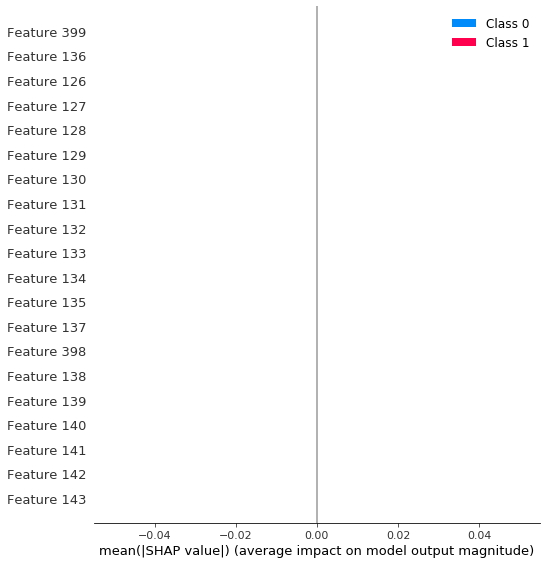

In [27]:
shap.summary_plot(shap_values)

In [7]:
trainX = np.vstack(trainX)
model = KerasClassifier(build_fn = create_lstm_model, batch_size=64, epochs = 1)

In [ ]:
epochs = [1,2]
batch_size = [48,64]
param_grid = dict(epochs=epochs, batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid = param_grid, n_jobs=1)
grid_result = grid.fit(trainX,y_train1)

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 1,081,432
Trainable params: 1,081,432
Non-trainable params: 0
_________________________________________________________________
None



Epoch 1/1





4271/4271 [==============================] - ETA: 56 - ETA: 39 - ETA: 32 - ETA: 27 - ETA: 24 - ETA: 22 - ETA: 21 - ETA: 20 - ETA: 19 - ETA: 18

_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 1,081,432
Trainable params: 1,081,432
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
4271/4271 [==============================] - ETA: 1: - ETA: 1: - ETA: 45s - ETA: 37 - ETA: 32 - ETA: 29 - ETA: 26 - ETA: 25 - ETA: 23 - ETA: 22 - ETA: 21 - ETA: 20 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - E

4271/4271 [==============================] - ETA: 1: - ETA: 45s - ETA: 35 - ETA: 29 - ETA: 26 - ETA: 24 - ETA: 22 - ETA: 21 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 15 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 18s 4ms/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Emb

4271/4271 [==============================] - ETA: 1: - ETA: 1: - ETA: 48s - ETA: 39 - ETA: 33 - ETA: 30 - ETA: 27 - ETA: 25 - ETA: 23 - ETA: 22 - ETA: 21 - ETA: 20 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 18 - ETA: 20 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 18s 4ms/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Emb

4271/4271 [==============================] - ETA: 3: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 57s - ETA: 50 - ETA: 45 - ETA: 41 - ETA: 38 - ETA: 35 - ETA: 33 - ETA: 31 - ETA: 30 - ETA: 28 - ETA: 27 - ETA: 26 - ETA: 25 - ETA: 24 - ETA: 23 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 23s 5ms/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #  

4271/4271 [==============================] - ETA: 3: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 58s - ETA: 52 - ETA: 47 - ETA: 43 - ETA: 40 - ETA: 38 - ETA: 36 - ETA: 34 - ETA: 32 - ETA: 31 - ETA: 29 - ETA: 28 - ETA: 27 - ETA: 26 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 25s 6ms/step
_________________________________________________________________
Layer (type)                 Output Shape              Param

4271/4271 [==============================] - ETA: 3: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 50 - ETA: 43 - ETA: 39 - ETA: 35 - ETA: 32 - ETA: 31 - ETA: 29 - ETA: 28 - ETA: 26 - ETA: 25 - ETA: 23 - ETA: 22 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 23s 5ms/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 400, 100)          1000000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               80400     
__

8542/8542 [==============================] - ETA: 44:30 - loss: 0.6799 - acc: 0.89 - ETA: 25:18 - loss: 0.6704 - acc: 0.82 - ETA: 18:56 - loss: 0.6538 - acc: 0.83 - ETA: 15:46 - loss: 0.6350 - acc: 0.84 - ETA: 13:47 - loss: 0.6176 - acc: 0.84 - ETA: 12:48 - loss: 0.5958 - acc: 0.85 - ETA: 12:54 - loss: 0.5833 - acc: 0.84 - ETA: 12:45 - loss: 0.5639 - acc: 0.84 - ETA: 12:50 - loss: 0.5433 - acc: 0.85 - ETA: 12:13 - loss: 0.5324 - acc: 0.85 - ETA: 11:43 - loss: 0.5403 - acc: 0.84 - ETA: 11:18 - loss: 0.5340 - acc: 0.84 - ETA: 10:50 - loss: 0.5373 - acc: 0.84 - ETA: 10:43 - loss: 0.5380 - acc: 0.83 - ETA: 10:24 - loss: 0.5392 - acc: 0.83 - ETA: 10:11 - loss: 0.5344 - acc: 0.83 - ETA: 9:54 - loss: 0.5272 - acc: 0.8355 - ETA: 9:35 - loss: 0.5291 - acc: 0.830 - ETA: 9:20 - loss: 0.5291 - acc: 0.828 - ETA: 9:04 - loss: 0.5364 - acc: 0.818 - ETA: 8:51 - loss: 0.5363 - acc: 0.817 - ETA: 8:38 - loss: 0.5323 - acc: 0.819 - ETA: 8:26 - loss: 0.5306 - acc: 0.820 - ETA: 8:16 - loss: 0.5284 - acc: 0.

8542/8542 [==============================] - ETA: 42:36 - loss: 0.6903 - acc: 0.78 - ETA: 24:43 - loss: 0.6841 - acc: 0.77 - ETA: 19:22 - loss: 0.6729 - acc: 0.81 - ETA: 16:18 - loss: 0.6672 - acc: 0.80 - ETA: 14:34 - loss: 0.6590 - acc: 0.81 - ETA: 13:15 - loss: 0.6496 - acc: 0.81 - ETA: 13:13 - loss: 0.6499 - acc: 0.79 - ETA: 12:50 - loss: 0.6419 - acc: 0.79 - ETA: 12:20 - loss: 0.6291 - acc: 0.79 - ETA: 12:10 - loss: 0.6257 - acc: 0.79 - ETA: 11:54 - loss: 0.6119 - acc: 0.79 - ETA: 11:24 - loss: 0.6185 - acc: 0.78 - ETA: 11:01 - loss: 0.6062 - acc: 0.78 - ETA: 11:10 - loss: 0.5957 - acc: 0.79 - ETA: 10:50 - loss: 0.5802 - acc: 0.79 - ETA: 10:30 - loss: 0.5726 - acc: 0.79 - ETA: 10:16 - loss: 0.5690 - acc: 0.79 - ETA: 10:02 - loss: 0.5572 - acc: 0.80 - ETA: 9:46 - loss: 0.5478 - acc: 0.8084 - ETA: 9:31 - loss: 0.5463 - acc: 0.807 - ETA: 9:22 - loss: 0.5437 - acc: 0.808 - ETA: 9:10 - loss: 0.5362 - acc: 0.811 - ETA: 8:57 - loss: 0.5294 - acc: 0.813 - ETA: 8:45 - loss: 0.5299 - acc: 0.

8542/8542 [==============================] - ETA: 49:35 - loss: 0.6957 - acc: 0.20 - ETA: 29:21 - loss: 0.6941 - acc: 0.51 - ETA: 22:39 - loss: 0.6935 - acc: 0.57 - ETA: 19:21 - loss: 0.6930 - acc: 0.62 - ETA: 17:54 - loss: 0.6924 - acc: 0.66 - ETA: 17:50 - loss: 0.6911 - acc: 0.69 - ETA: 16:27 - loss: 0.6890 - acc: 0.71 - ETA: 15:32 - loss: 0.6869 - acc: 0.72 - ETA: 14:43 - loss: 0.6831 - acc: 0.73 - ETA: 13:52 - loss: 0.6800 - acc: 0.74 - ETA: 13:12 - loss: 0.6773 - acc: 0.74 - ETA: 12:42 - loss: 0.6710 - acc: 0.75 - ETA: 12:12 - loss: 0.6644 - acc: 0.75 - ETA: 11:47 - loss: 0.6592 - acc: 0.76 - ETA: 11:49 - loss: 0.6501 - acc: 0.76 - ETA: 12:21 - loss: 0.6433 - acc: 0.76 - ETA: 12:24 - loss: 0.6352 - acc: 0.77 - ETA: 12:02 - loss: 0.6193 - acc: 0.77 - ETA: 11:46 - loss: 0.6201 - acc: 0.77 - ETA: 11:31 - loss: 0.6083 - acc: 0.78 - ETA: 11:18 - loss: 0.6096 - acc: 0.78 - ETA: 11:00 - loss: 0.5992 - acc: 0.78 - ETA: 10:43 - loss: 0.5938 - acc: 0.78 - ETA: 10:28 - loss: 0.5924 - acc: 0.

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,stdev, param in zip(means,stds,params):
    print("%f (%f) with %r" % (mean,stdev, param))